In [1]:
import nltk
import pandas as pd
from nltk.corpus import stopwords  # Importing Natural Language Toolkit
from nltk.stem import WordNetLemmatizer

In [2]:
df=pd.read_csv(r'C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\hCOVID_COMBINE.CSV',header=None,names=["created_at","text","screen_name","location"])
#np.random.seed(0)

In [3]:
df.head(20)

created_at                                               text  \
0   29-01-2022 18:53  b'@MsMagazine \nFor #ValentinesDay during #Cov...   
1   29-01-2022 18:53  b'Will today\xe2\x80\x99s truckers protest on ...   
2   29-01-2022 18:53  b'@bust_magazine \nFor #ValentinesDay during #...   
3   29-01-2022 18:52  b'@audreymagazine \nFor #ValentinesDay during ...   
4   29-01-2022 18:52              b'@APreudent No kissing #coronavirus'   
5   29-01-2022 18:52  b'@thedailybeast \nFor #ValentinesDay during #...   
6   29-01-2022 18:52  b'#Deaths Due to #Omicron Higher Than From #De...   
7   29-01-2022 18:51  b'@TheWeek \nFor #ValentinesDay during #Covid:...   
8   29-01-2022 18:51  b'@VanityFair \nFor #ValentinesDay during #Cov...   
9   29-01-2022 18:50  b'@The_Rumpus \nFor #ValentinesDay during #Cov...   
10  29-01-2022 18:50  b'@UtneReader \nFor #ValentinesDay during #Cov...   
11  29-01-2022 18:49  b'@MotherJones \nFor #ValentinesDay during #Co...   
12  29-01-2022 18:48  b'@CPHO_Canada @JustinTrudeau #CoronaVirus #Co...   
13  29-01-2022 18:48  b'Another loss due to  the principle of ignora...   
14  29-01-2022 18:48  b'@MotherEarthNews \nFor #ValentinesDay during...   
15  29-01-2022 18:48  b'@TheOnion \nFor #ValentinesDay during #Covid...   
16  29-01-2022 18:47  b'#virus Links to CORONAVIRUS VACCINES #corona...   
17  29-01-2022 18:47  b'@mental_floss \nFor #ValentinesDay during #C...   
18  29-01-2022 18:47  b'Charges: Nurses made $1.5 million off fake v...   
19  29-01-2022 18:47  b'Eff you Justin - Canada has had enough #Conv...   

          screen_name                        location  
0   b'RobertBarrows3'        b'San Mateo, California'  
1        b'bobmackin'      b'North Vancouver, Canada'  
2   b'RobertBarrows3'                             NaN  
3   b'RobertBarrows3'        b'San Mateo, California'  
4        b'Rahulklyt'                             NaN  
5   b'RobertBarrows3'        b'San Mateo, California'  
6   b'MacalusoJoseph'                             NaN  
7   b'RobertBarrows3'                             b''  
8   b'RobertBarrows3'                             NaN  
9   b'RobertBarrows3'        b'San Mateo, California'  
10  b'RobertBarrows3'                             NaN  
11  b'RobertBarrows3'  b'New Orleans, LA; Boerne, TX'  
12       b'lensfocus'                             NaN  
13          b'RJMrim'        b'San Mateo, California'  
14  b'RobertBarrows3'                             NaN  
15  b'RobertBarrows3'        b'San Mateo, California'  
16        b'SptsGuy1'                             NaN  
17  b'RobertBarrows3'        b'San Mateo, California'  
18        b'infodiva'                             NaN  
19    b'StockNirvana'        b'San Mateo, California'

In [4]:
df.shape

(8910, 4)

In [5]:

    df['text'] = df['text'].astype(str).str.replace('http\S+|www.\S+', '', case=False)  # Removing URL's from data set
df ['text']= df['text'].str.replace('RT ', '', case=False)  # Removing the phrase 'RT" from all strings
df['text'] = df['text'].str.replace('[^\w\s]', ' ')  # Removing any punctuation
#df['text'] = df['text'].str.replace('[' 'b]','')
#df['text'] = df['text'].str.replace('[x[a-z]]','')
df ['text']= df['text'].str.replace('\r\n', ' ')  # Removing '\r\n' which is present in some strings
df['text'] = df['text'].str.replace('\d+', '').str.lower().str.strip()  # Removing numbers, capitalisation and white space


C:\Users\DELL\AppData\Local\Temp/ipykernel_10580/1243268230.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].astype(str).str.replace('http\S+|www.\S+', '', case=False)  # Removing URL's from data set
C:\Users\DELL\AppData\Local\Temp/ipykernel_10580/1243268230.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^\w\s]', ' ')  # Removing any punctuation
C:\Users\DELL\AppData\Local\Temp/ipykernel_10580/1243268230.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('\d+', '').str.lower().str.strip()  # Removing numbers, capitalisation and white space


In [6]:
df.head(30)

created_at                                               text  \
0   29-01-2022 18:53  b  msmagazine  nfor  valentinesday during  cov...   
1   29-01-2022 18:53  b will today xe x xs truckers protest on parli...   
2   29-01-2022 18:53  b  bust_magazine  nfor  valentinesday during  ...   
3   29-01-2022 18:52  b  audreymagazine  nfor  valentinesday during ...   
4   29-01-2022 18:52               b  apreudent no kissing  coronavirus   
5   29-01-2022 18:52  b  thedailybeast  nfor  valentinesday during  ...   
6   29-01-2022 18:52  b  deaths due to  omicron higher than from  de...   
7   29-01-2022 18:51  b  theweek  nfor  valentinesday during  covid ...   
8   29-01-2022 18:51  b  vanityfair  nfor  valentinesday during  cov...   
9   29-01-2022 18:50  b  the_rumpus  nfor  valentinesday during  cov...   
10  29-01-2022 18:50  b  utnereader  nfor  valentinesday during  cov...   
11  29-01-2022 18:49  b  motherjones  nfor  valentinesday during  co...   
12  29-01-2022 18:48  b  cpho_canada  justintrudeau  coronavirus  co...   
13  29-01-2022 18:48  b another loss due to  the principle of ignora...   
14  29-01-2022 18:48  b  motherearthnews  nfor  valentinesday during...   
15  29-01-2022 18:48  b  theonion  nfor  valentinesday during  covid...   
16  29-01-2022 18:47  b  virus links to coronavirus vaccines  corona...   
17  29-01-2022 18:47  b  mental_floss  nfor  valentinesday during  c...   
18  29-01-2022 18:47  b charges  nurses made    million off fake vac...   
19  29-01-2022 18:47  b eff you justin   canada has had enough  conv...   
20  29-01-2022 18:47  b  usweekly  nfor  valentinesday during  covid...   
21  29-01-2022 18:47  b cases           ndeaths          nrecovered ...   
22  29-01-2022 18:46  b  okmagazine  nfor  valentinesday during  cov...   
23  29-01-2022 18:46  b  star_news  nfor  valentinesday during  covi...   
24  29-01-2022 18:46  b  natenquirer  nfor  valentinesday during  co...   
25  29-01-2022 18:45  b  nro  nfor  valentinesday during  covid  n r...   
26  29-01-2022 18:45  b  commentary  nfor  valentinesday during  cov...   
27  29-01-2022 18:44  b  commonwealmag  nfor  valentinesday during  ...   
28  29-01-2022 18:43  b about   passengers travel through the dhaka ...   
29  29-01-2022 18:43  b  newsbusters  nfor  valentinesday during  co...   

          screen_name                        location  
0   b'RobertBarrows3'        b'San Mateo, California'  
1        b'bobmackin'      b'North Vancouver, Canada'  
2   b'RobertBarrows3'                             NaN  
3   b'RobertBarrows3'        b'San Mateo, California'  
4        b'Rahulklyt'                             NaN  
5   b'RobertBarrows3'        b'San Mateo, California'  
6   b'MacalusoJoseph'                             NaN  
7   b'RobertBarrows3'                             b''  
8   b'RobertBarrows3'                             NaN  
9   b'RobertBarrows3'        b'San Mateo, California'  
10  b'RobertBarrows3'                             NaN  
11  b'RobertBarrows3'  b'New Orleans, LA; Boerne, TX'  
12       b'lensfocus'                             NaN  
13          b'RJMrim'        b'San Mateo, California'  
14  b'RobertBarrows3'                             NaN  
15  b'RobertBarrows3'        b'San Mateo, California'  
16        b'SptsGuy1'                             NaN  
17  b'RobertBarrows3'        b'San Mateo, California'  
18        b'infodiva'                             NaN  
19    b'StockNirvana'        b'San Mateo, California'  
20  b'RobertBarrows3'                             NaN  
21  b'_covid_19_bot_'        b'San Mateo, California'  
22  b'RobertBarrows3'                             NaN  
23  b'RobertBarrows3'      b'Whitby, Ontario, Canada'  
24  b'RobertBarrows3'                             NaN  
25  b'RobertBarrows3'                             b''  
26  b'RobertBarrows3'                             NaN  
27  b'RobertBarrows3'        b'San Mateo, California'  
28    b'DhakaTribune'                             NaN  
29  

In [7]:
 nltk.download('stopwords')  # Downloading stop words
#stop = set(stopwords.words('english'))  # Selecting English stop words
#df['text'] = df['text'] .apply(lambda x: [item for item in x if item not in stop])  # Removing stop words from each string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
df.shape[0]

8910

In [9]:
df['text'][10]

'b  utnereader  nfor  valentinesday during  covid  n roses are red nviolets are blue  ni got the vaccines nhow about you   xe x xa'

In [10]:
lemmatizer = WordNetLemmatizer()
for i in range(df.shape[0]):
    words=nltk.word_tokenize(df['text'][i])
    words = [lemmatizer.lemmatize(w, pos='a') for w in words if w not in set(stopwords.words("english")) ]
    df['text'][i]=' '.join(words)

In [11]:
df['text'][10]

'b utnereader nfor valentinesday covid n roses red nviolets blue ni got vaccines nhow xe x xa'

In [12]:
df.head(10)

created_at                                               text  \
0  29-01-2022 18:53  b msmagazine nfor valentinesday covid n roses ...   
1  29-01-2022 18:53  b today xe x xs truckers protest parliament hi...   
2  29-01-2022 18:53  b bust_magazine nfor valentinesday covid n ros...   
3  29-01-2022 18:52  b audreymagazine nfor valentinesday covid n ro...   
4  29-01-2022 18:52                    b apreudent kissing coronavirus   
5  29-01-2022 18:52  b thedailybeast nfor valentinesday covid n ros...   
6  29-01-2022 18:52  b deaths due omicron high delta n n cdcgov nih...   
7  29-01-2022 18:51  b theweek nfor valentinesday covid n roses red...   
8  29-01-2022 18:51  b vanityfair nfor valentinesday covid n roses ...   
9  29-01-2022 18:50  b the_rumpus nfor valentinesday covid n roses ...   

         screen_name                    location  
0  b'RobertBarrows3'    b'San Mateo, California'  
1       b'bobmackin'  b'North Vancouver, Canada'  
2  b'RobertBarrows3'                         NaN  
3  b'RobertBarrows3'    b'San Mateo, California'  
4       b'Rahulklyt'                         NaN  
5  b'RobertBarrows3'    b'San Mateo, California'  
6  b'MacalusoJoseph'                         NaN  
7  b'RobertBarrows3'                         b''  
8  b'RobertBarrows3'                         NaN  
9  b'RobertBarrows3'    b'San Mateo, California'

In [13]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

from textblob import TextBlob

import re

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

import os

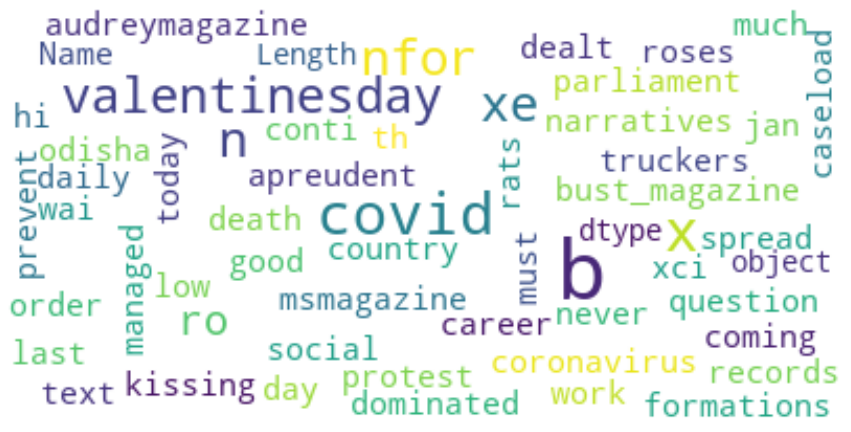

In [14]:
#wordcloud after preprocessing and removing stopwords
def show_wordcloud(data , title = None):
    wordcloud = WordCloud(background_color='white',stopwords=stopwords,max_words=200,max_font_size=40).generate(str(data))
  
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(df['text'])

In [15]:
df.shape

(8910, 4)

In [16]:
df.isna().sum
tweet=df.copy()

In [17]:
tweet.head()

created_at                                               text  \
0  29-01-2022 18:53  b msmagazine nfor valentinesday covid n roses ...   
1  29-01-2022 18:53  b today xe x xs truckers protest parliament hi...   
2  29-01-2022 18:53  b bust_magazine nfor valentinesday covid n ros...   
3  29-01-2022 18:52  b audreymagazine nfor valentinesday covid n ro...   
4  29-01-2022 18:52                    b apreudent kissing coronavirus   

         screen_name                    location  
0  b'RobertBarrows3'    b'San Mateo, California'  
1       b'bobmackin'  b'North Vancouver, Canada'  
2  b'RobertBarrows3'                         NaN  
3  b'RobertBarrows3'    b'San Mateo, California'  
4       b'Rahulklyt'                         NaN

In [18]:
tweet['sentiment'] = ' '
tweet['polarity'] = None
for i,tweets in enumerate(tweet.text) :
    blob = TextBlob(tweets)
    tweet['polarity'][i] = blob.sentiment.polarity
    if blob.sentiment.polarity > 0 :
        tweet['sentiment'][i] = 'positive'
    elif blob.sentiment.polarity < 0 :
        tweet['sentiment'][i] = 'negative'
    else :
        tweet['sentiment'][i] = 'neutral'
tweet.head()

created_at                                               text  \
0  29-01-2022 18:53  b msmagazine nfor valentinesday covid n roses ...   
1  29-01-2022 18:53  b today xe x xs truckers protest parliament hi...   
2  29-01-2022 18:53  b bust_magazine nfor valentinesday covid n ros...   
3  29-01-2022 18:52  b audreymagazine nfor valentinesday covid n ro...   
4  29-01-2022 18:52                    b apreudent kissing coronavirus   

         screen_name                    location sentiment polarity  
0  b'RobertBarrows3'    b'San Mateo, California'   neutral      0.0  
1       b'bobmackin'  b'North Vancouver, Canada'   neutral      0.0  
2  b'RobertBarrows3'                         NaN   neutral      0.0  
3  b'RobertBarrows3'    b'San Mateo, California'   neutral      0.0  
4       b'Rahulklyt'                         NaN   neutral      0.0

In [19]:
tweet['sentiment'].value_counts()

neutral     4075
positive    3409
negative    1426
Name: sentiment, dtype: int64

In [20]:
sentiment_df = pd.DataFrame(tweet, columns=[ "text","polarity","sentiment"])

sentiment_df.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID_COMBINE pol sent.csv")

In [21]:

sentiment_df.head(10)

text polarity sentiment
0  b msmagazine nfor valentinesday covid n roses ...      0.0   neutral
1  b today xe x xs truckers protest parliament hi...      0.0   neutral
2  b bust_magazine nfor valentinesday covid n ros...      0.0   neutral
3  b audreymagazine nfor valentinesday covid n ro...      0.0   neutral
4                    b apreudent kissing coronavirus      0.0   neutral
5  b thedailybeast nfor valentinesday covid n ros...      0.0   neutral
6  b deaths due omicron high delta n n cdcgov nih...   0.0175  positive
7  b theweek nfor valentinesday covid n roses red...      0.0   neutral
8  b vanityfair nfor valentinesday covid n roses ...      0.0   neutral
9  b the_rumpus nfor valentinesday covid n roses ...      0.0   neutral

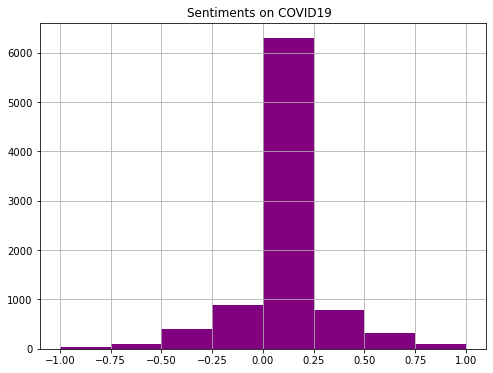

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
tweet['polarity'].hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments on COVID19  ")
plt.show()

In [23]:
#feature extraction(only feature)
y=tweet['sentiment'].values
y.shape

(8910,)

In [24]:
x=tweet['text'].values
x.shape

(8910,)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
y_test.shape

(7128,)
(7128,)
(1782,)


(1782,)

neutral     4075
positive    3409
negative    1426
Name: sentiment, dtype: int64


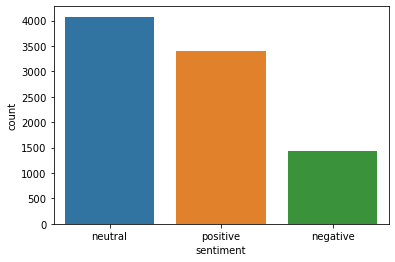

In [27]:
print(tweet.sentiment.value_counts())
sns.countplot(x='sentiment', data = tweet);

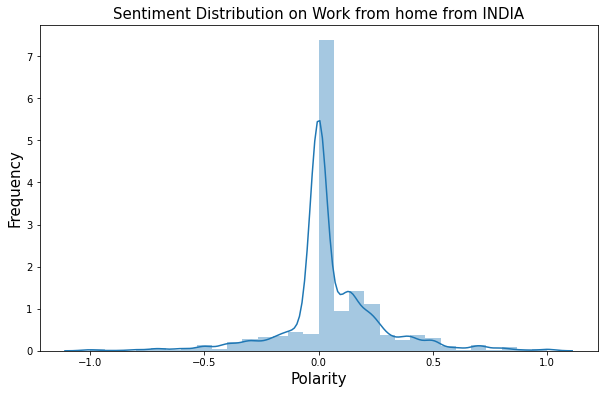

In [28]:
plt.figure(figsize=(10,6))
sns.distplot(tweet['polarity'], bins=30)
plt.title('Sentiment Distribution on Work from home from INDIA',size = 15)
plt.xlabel('Polarity',size = 15)
plt.ylabel('Frequency',size = 15)
plt.show();

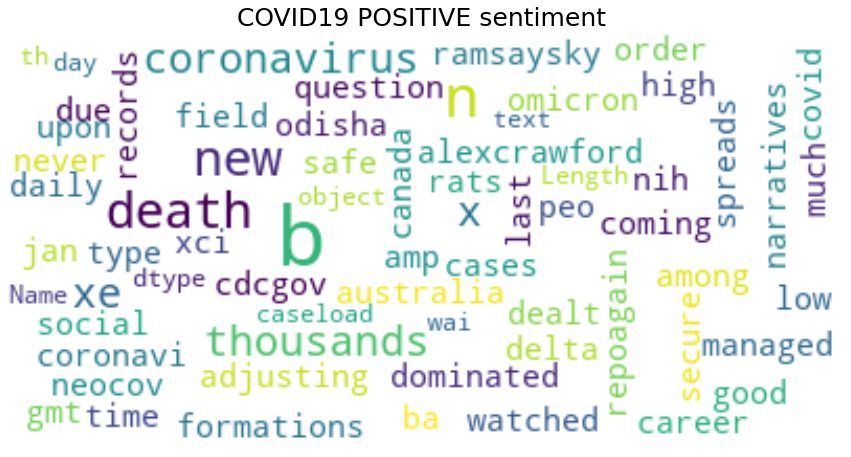

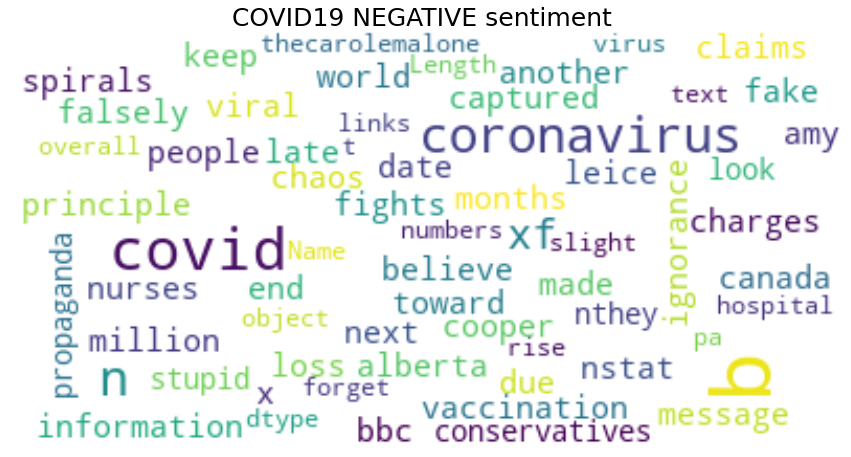

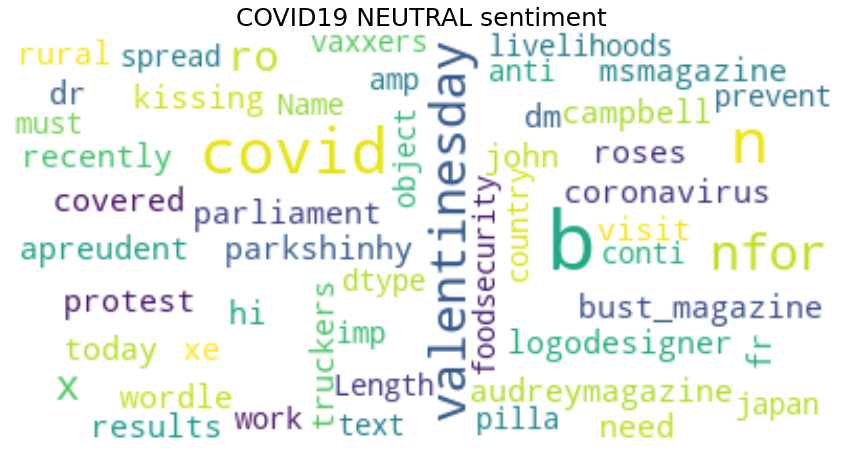

In [29]:
#wordcount with sentiment
pos = tweet['text'][tweet['sentiment'] == 'positive']
show_wordcloud(pos , 'COVID19 POSITIVE sentiment ')

neg = tweet['text'][tweet['sentiment'] == 'negative']
show_wordcloud(neg , 'COVID19 NEGATIVE sentiment ')

neutral = tweet['text'][tweet['sentiment'] == 'neutral']
show_wordcloud(neutral , 'COVID19 NEUTRAL sentiment ')

In [30]:
count = pd.DataFrame(tweet.groupby('sentiment').sum())
count

created_at  \
sentiment                                                      
negative   29-01-2022 18:4829-01-2022 18:4729-01-2022 18:...   
neutral    29-01-2022 18:5329-01-2022 18:5329-01-2022 18:...   
positive   29-01-2022 18:5229-01-2022 18:4129-01-2022 18:...   

                                                        text  \
sentiment                                                      
negative   b another loss due principle ignorance n nstat...   
neutral    b msmagazine nfor valentinesday covid n roses ...   
positive   b deaths due omicron high delta n n cdcgov nih...   

                                                 screen_name  \
sentiment                                                      
negative   b'RJMrim'b'infodiva'b'_HowManyTimes'b'EricStof...   
neutral    b'RobertBarrows3'b'bobmackin'b'RobertBarrows3'...   
positive   b'MacalusoJoseph'b'Pankajkhariar'b'jamesvginge...   

                                                    location    polarity  
sentiment                                                                 
negative   b'San Mateo, California'b'San Mateo, Californi... -354.640741  
neutral    b'San Mateo, California'b'North Vancouver, Can...    0.000000  
positive   b'San Francisco, California'b'San Mateo, Calif...  817.136790

In [31]:
words = []
words = [word for i in tweet.text for word in i.split()]

In [32]:
words

['b',
 'msmagazine',
 'nfor',
 'valentinesday',
 'covid',
 'n',
 'roses',
 'red',
 'nviolets',
 'blue',
 'ni',
 'got',
 'vaccines',
 'nhow',
 'xe',
 'x',
 'xa',
 'b',
 'today',
 'xe',
 'x',
 'xs',
 'truckers',
 'protest',
 'parliament',
 'hill',
 'become',
 'canada',
 'xe',
 'x',
 'xs',
 'answer',
 'sturgis',
 'superspreader',
 'sans',
 'smash',
 'mo',
 'xe',
 'x',
 'xa',
 'b',
 'bust_magazine',
 'nfor',
 'valentinesday',
 'covid',
 'n',
 'roses',
 'red',
 'nviolets',
 'blue',
 'ni',
 'got',
 'vaccines',
 'nhow',
 'xe',
 'x',
 'xa',
 'b',
 'audreymagazine',
 'nfor',
 'valentinesday',
 'covid',
 'n',
 'roses',
 'red',
 'nviolets',
 'blue',
 'ni',
 'got',
 'vaccines',
 'nhow',
 'yo',
 'xe',
 'x',
 'xa',
 'b',
 'apreudent',
 'kissing',
 'coronavirus',
 'b',
 'thedailybeast',
 'nfor',
 'valentinesday',
 'covid',
 'n',
 'roses',
 'red',
 'nviolets',
 'blue',
 'ni',
 'got',
 'vaccines',
 'nhow',
 'xe',
 'x',
 'xa',
 'b',
 'deaths',
 'due',
 'omicron',
 'high',
 'delta',
 'n',
 'n',
 'cdcgov'

In [33]:
freq = Counter(words).most_common(30)
freq = pd.DataFrame(freq)
freq.columns = ['word', 'frequency']
freq.head(20)

word  frequency
0             x      10905
1            xe       9359
2             b       8972
3            xa       7934
4         covid       6365
5             n       5888
6            xf       3229
7         cases       1466
8   coronavirus       1443
9           new       1253
10           xb        856
11       deaths        605
12           xd        543
13          amp        518
14       people        464
15     vaccines        456
16      omicron        443
17     pandemic        423
18          got        406
19           xs        388

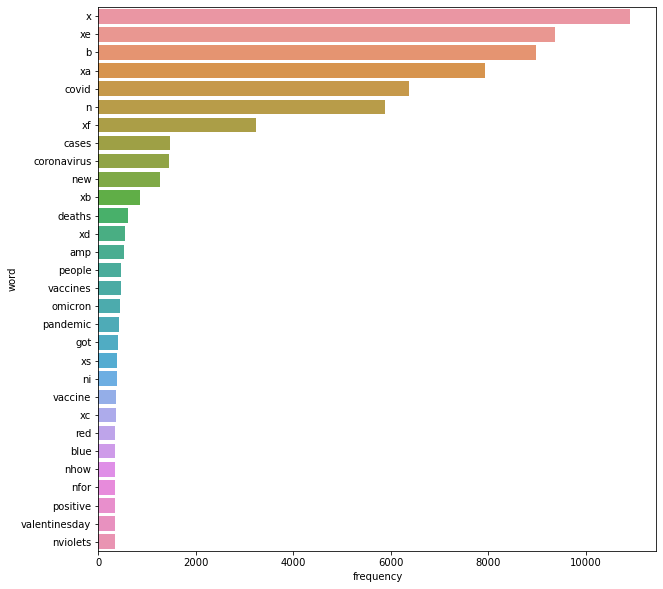

In [34]:
plt.figure(figsize = (10, 10))
sns.barplot(y="word", x="frequency",data=freq);

In [35]:
tweet.to_csv(r'C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19_Final_sent_analysis.csv',index=False)

In [36]:
sentiment_df.head()

text polarity sentiment
0  b msmagazine nfor valentinesday covid n roses ...      0.0   neutral
1  b today xe x xs truckers protest parliament hi...      0.0   neutral
2  b bust_magazine nfor valentinesday covid n ros...      0.0   neutral
3  b audreymagazine nfor valentinesday covid n ro...      0.0   neutral
4                    b apreudent kissing coronavirus      0.0   neutral

In [37]:
sentiment_df.describe()

text  polarity sentiment
count                                               8910    8910.0      8910
unique                                              8141     680.0         3
top     b new covid data pm est coronavirus covid covid_       0.0   neutral
freq                                                  29    4075.0      4075

In [38]:
sentiment_df.groupby('sentiment').size()

sentiment
negative    1426
neutral     4075
positive    3409
dtype: int64

In [39]:
print(sentiment_df.groupby('polarity').size())

polarity
-1.000    19
-0.900     2
-0.900     2
-0.875     1
-0.800    16
          ..
 0.850     8
 0.850     1
 0.900    11
 0.950     1
 1.000    27
Length: 680, dtype: int64


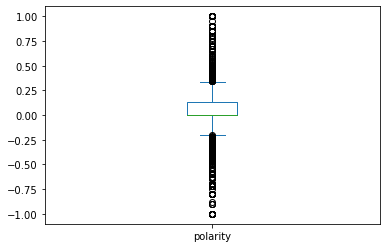

In [40]:
import matplotlib.pyplot as plt
sentiment_df.plot(kind='box', subplots=True, layout=(1,1), sharex=False, sharey=False)
plt.show()

In [41]:
clo=['sentiment','polarity','text']
dataset2=sentiment_df.reindex(columns=clo)
#dataset2.head()
dataset2[:10]

sentiment polarity                                               text
0   neutral      0.0  b msmagazine nfor valentinesday covid n roses ...
1   neutral      0.0  b today xe x xs truckers protest parliament hi...
2   neutral      0.0  b bust_magazine nfor valentinesday covid n ros...
3   neutral      0.0  b audreymagazine nfor valentinesday covid n ro...
4   neutral      0.0                    b apreudent kissing coronavirus
5   neutral      0.0  b thedailybeast nfor valentinesday covid n ros...
6  positive   0.0175  b deaths due omicron high delta n n cdcgov nih...
7   neutral      0.0  b theweek nfor valentinesday covid n roses red...
8   neutral      0.0  b vanityfair nfor valentinesday covid n roses ...
9   neutral      0.0  b the_rumpus nfor valentinesday covid n roses ...

In [42]:
dataset2.describe()#dataset2.hist()
#plt.show()

sentiment  polarity                                              text
count       8910    8910.0                                              8910
unique         3     680.0                                              8141
top      neutral       0.0  b new covid data pm est coronavirus covid covid_
freq        4075    4075.0                                                29

In [43]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'text'})

In [44]:
df1.head()

text
0  b covid gujarat reported new cases deaths last...
1  b new cases bhutan n n gmt coronavirus coronav...
2  b water cannon tear gas used covid protests br...
3  b theweek nfor valentinesday covid n roses red...
4  b news sad n n ixbuzztv ixbuzz city tnews n n ...

In [45]:
df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})
df_train=pd.concat([df1,df2],axis=1)

In [46]:
df_train.head()

text sentiment
0  b covid gujarat reported new cases deaths last...  positive
1  b new cases bhutan n n gmt coronavirus coronav...  positive
2  b water cannon tear gas used covid protests br...   neutral
3  b theweek nfor valentinesday covid n roses red...   neutral
4  b news sad n n ixbuzztv ixbuzz city tnews n n ...   neutral

In [47]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'text'})

In [48]:
df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'sentiment'})
df_test=pd.concat([df3,df4],axis=1)

In [49]:
df_test.head()

text sentiment
0  b covid meghalaya reports new covid cases reco...  positive
1  b qr ed n nmade cd octanerender photoshop nmor...  positive
2  b tomfitton oann carrying live great speeches ...   neutral
3  b many k cases fully vaccinated many got one d...   neutral
4  b libsoftiktok us nno way norm xf xf xa x xf x...   neutral

In [50]:
import string
string.punctuation
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""  
  for i in text:     
    if i not in string.punctuation:
      ans+=i    
  return ans

In [51]:
#storing the puntuation free text in a new column called clean_msg
df_train['text']= df_train['text'].apply(lambda x:remove_punctuation(x))
df_test['text']= df_test['text'].apply(lambda x:remove_punctuation(x))

In [52]:
df_train.head()
#punctuations are removed from news column in train dataset

text sentiment
0  b covid gujarat reported new cases deaths last...  positive
1  b new cases bhutan n n gmt coronavirus coronav...  positive
2  b water cannon tear gas used covid protests br...   neutral
3  b theweek nfor valentinesday covid n roses red...   neutral
4  b news sad n n ixbuzztv ixbuzz city tnews n n ...   neutral

In [53]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [55]:
from collections import defaultdict
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [56]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].text:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

Sentence after removing stopwords: ['b', 'covid', 'gujarat', 'reported', 'new', 'cases', 'deaths', 'last', 'hours', 'active', 'cases', 'n', 'ntotal', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'cases', 'bhutan', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'realdoctormike', 'said', 'many', 'times', 'fever', 'helps', 'amp', 'xe', 'x', 'xt', 'know', 'think', 'chest', 'compressions', 'instead', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'narrative', 'collapsing', 'nlisten', 'someone', 'originally', 'fell', 'hook', 'line', 'sinker', 'n', 'told', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sue', 'keep', 'employees', 'long', 'employees', 'hostage', 'excellent', 'quote', 'anot', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rare', 'cases', 'coronavirus', 'vaccines', 'may', 'cause', 'longcovid', 'xe', 'x', 'xlike', 'symptoms']
Sentence after removing

Sentence after removing stopwords: ['b', 'voters', 'trump', 'counties', 'far', 'likely', 'die', 'covid']
Sentence after removing stopwords: ['b', 'global', 'situation', 'january', 'n', 'confirmed', 'cases', 'n', 'deaths', 'cases', 'n', 'recovered', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'covid', 'data', 'est', 'coronavirus', 'covid', 'covid']
Sentence after removing stopwords: ['b', 'delhi', 'reports', 'new', 'covid', 'cases', 'recoveries', 'deaths', 'last', 'hours', 'n', 'nactive', 'cases', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xcsocial', 'cohesion', 'erosion', 'xe', 'x', 'xd', 'fast', 'growing', 'threat', 'planet', 'since', 'covid', 'crisis', 'struck', 'according', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'total', 'people', 'tested', 'positive', 'virus', 'parliament', 'house', 'complex', 'far', 'people', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'krisp', 'highly', 'effective', 'noise',

Sentence after removing stopwords: ['b', 'million', 'ontarians', 'received', 'booster', 'dose', 'covid', 'vaccine', 'n', 'nmixing', 'vaccines', 'safe', 'effecti', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'goa', 'reports', 'covid', 'deaths', 'last', 'hours', 'year', 'old', 'male', 'cunchelim', 'co', 'morbidities', 'succum', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'update', 'cuttack', 'district', 'jan', 'nout', 'new', 'cases', 'declared', 'state', 'cuttack', 'district', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'update', 'n', 'january', 'novel', 'coronavirus', 'cases', 'malta', 'n', 'total', 'cases', 'n', 'new', 'cases', 'n', 'active', 'cases', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'uk', 'partners', 'signal', 'island', 'expect', 'high', 'volumes', 'british', 'summer', 'holiday', 'seekers', 'cyprus', 'tourism', 'sta', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'cases', 'kazakhstan', 

Sentence after removing stopwords: ['b', 'new', 'cases', 'new', 'deaths', 'greece', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'chaosinmycoumy', 'son', 'steroids', 'due', 'lung', 'condition', 'rarely', 'leaves', 'house', 'due', 'covid', 'po', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'cases', 'new', 'deaths', 'germany', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'attn', 'americans', 'living', 'disabilities', 'amp', 'chronicillness', 'loved', 'ones', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'ximportant', 'pwd', 'video', 'dialogue', 'ab', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yes', 'open', 'get', 'free', 'home', 'estimate', 'staa', 'flooringinstallation', 'project', 'today', 'learn', 'safety', 'pr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'oil', 'slicked', 'rayong',

Sentence after removing stopwords: ['b', 'kimreynoldsia', 'adamgreggia', 'iowagop', 'wipe', 'whole', 'generation', 'iowans', 'coronavirus', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'taggartheidi', 'completely', 'right', 'still', 'promoted', 'germ', 'theory', 'covid', 'real', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'active', 'covid', 'cases', 'northmacedonia', 'omicron', 'spreading', 'fast', 'n']
Sentence after removing stopwords: ['b', 'good', 'morning', 'afternoon', 'evening', 'everyone', 'n', 'inform', 'entertain', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'poignant', 'thread', 'showing', 'real', 'life', 'consequences', 'covid', 'policy', 'children', 'amp', 'families']
Sentence after removing stopwords: ['b', 'believe', 'leaders', 'responsibility', 'endthepandemic', 'join', 'global', 'week', 'action', 'tackle', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'cases', 'covid', 'toronto', 'yesterday', 'o

Sentence after removing stopwords: ['b', 'note', 'covid', 'vaccination', 'clinic', 'today', 'raytheon', 'west', 'main', 'rd', 'portsmouth', 'make', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'best', 'wishes', 'speedy', 'recovery', 'covid']
Sentence after removing stopwords: ['b', 'new', 'covid', 'data', 'est', 'coronavirus', 'covid', 'covid']
Sentence after removing stopwords: ['b', 'new', 'covid', 'data', 'pm', 'est', 'coronavirus', 'covid', 'covid']
Sentence after removing stopwords: ['b', 'deaths', 'due', 'omicron', 'high', 'delta', 'n', 'n', 'cdcgov', 'nih', 'thelancetinfdis', 'cdcncezid', 'infectdisnews', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wfs', 'caught', 'covid', 'primary', 'school', 'work', 'friday', 'head', 'celebrating', 'news', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'outline', 'sanitary', 'measures', 'appointment', 'send', 'friendly', 'reminders', 'n', 'nread', 'full', 'article', 'prepar', 'xe', 'x', 'xa']
Sentence aft

Sentence after removing stopwords: ['b', 'susanmasten', 'icymi', 'eua', 'submitted', 'children', 'ages', 'using', 'traditional', 'safe', 'non', 'mrna', 'vaccine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'real', 'virus', 'real', 'virus', 'covidian', 'wants', 'lock', 'us', 'force', 'us', 'wear', 'masks', 'coer', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'cases', 'eswatini', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'gujarat', 'records', 'deaths', 'last', 'hours', 'new', 'covid', 'cases', 'n', 'n']
Sentence after removing stopwords: ['b', 'bootrevolution', 'clairelum', 'thomasdolphin', 'sure', 'whether', 'uk', 'us', 'either', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'levels', 'boston', 'area', 'sewage', 'xe', 'x', 'xs', 'shown', 'one', 'best', 'leading', 'indicators', 'infection', 'trends']
Sentence after removing stopwords: ['b', 

Sentence after removing stopwords: ['b', 'great', 'thread', 'misses', 'pawhere', 'potus', 'remain', 'focused', 'growing', 'corp', 'oligarch', 'wealth', 'costs', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'things', 'antivaxx', 'ers', 'think', 'cure', 'covid', 'n', 'nbleach', 'bright', 'lights', 'blood', 'jesus', 'horse', 'dewormer', 'sea', 'k', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'china', 'ban', 'eating', 'bats', 'xf', 'xf', 'xa', 'xandtv', 'neocov', 'chinese', 'scientists', 'warn', 'new', 'kind', 'coronavirus', 'bats', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'joni', 'mitchell', 'remove', 'songs', 'spotify', 'solidarity', 'neil', 'young', 'stance', 'covid', 'misinformation', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'karnataka', 'cumulatively', 'tested', 'samples', 'rtpcr', 'others', 'jan', 'amp', 'tested', 'positive', 'pa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'newly', 'discovered', 'co

Sentence after removing stopwords: ['b', 'daily', 'new', 'cases', 'cross', 'k', 'karnataka', 'today', 'n', 'xe', 'x', 'xbenew', 'cases', 'state', 'n', 'xe', 'x', 'xbenew', 'cases', 'b', 'lore', 'n', 'xe', 'x', 'xbepositivity', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'biorxivpreprint', 'novel', 'xe', 'x', 'xcprime', 'spike', 'xe', 'x', 'xd', 'vaccine', 'strategy', 'leverages', 'existing', 'immunity', 'generated', 'primary', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'cases', 'new', 'deaths', 'bangladesh', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'joni', 'mitchell', 'joining', 'neil', 'young', 'protest', 'spotify', 'platform', 'hosting', 'joe', 'rogan', 'whose', 'podcast', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bjpindia', 'respected', 'sir', 'husband', 'death', 'covid', 'local', 'municipality', 'even', 'ready', 'xe', 'x', 'xa']
Sentence

Sentence after removing stopwords: ['b', 'hey', 'new', 'york', 'one', 'low', 'positivity', 'rate', 'since', 'december', 'let', 'xe', 'x', 'xs', 'keep', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'let', 'us', 'see', 'good', 'pius', 'christians', 'respond', 'popefrancis', 'coronavirus']
Sentence after removing stopwords: ['b', 'department', 'health', 'confirmed', 'five', 'people', 'died', 'northern', 'ireland', 'contracting', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'watched', 'dontlookup', 'way', 'see', 'responded', 'covid', 'pretty', 'accurate', 'respond', 'end', 'times']
Sentence after removing stopwords: ['b', 'telangana', 'healthminister', 'harishrao', 'inspected', 'doortodoor', 'feversurvey', 'patancheru', 'near', 'hyderabad', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vice', 'president', 'mvenkaiahnaidu', 'tests', 'positive', 'covid', 'n']
Sentence after removing stopwords: ['b', 'lexpress', 'new', 'light', 'hope', 

Sentence after removing stopwords: ['b', 'vice', 'president', 'naidu', 'tests', 'covid', 'n', 'nvice', 'president', 'venkaiahnaidu', 'tested', 'positive', 'covid', 'sunday', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'live', 'rally', 'march', 'covid', 'vaccine', 'mandate', 'takes', 'place', 'dc', 'via', 'youtube', 'auspol', 'covid']
Sentence after removing stopwords: ['b', 'ontario', 'covid', 'case', 'data', 'today', 'january', 'n', 'new', 'cases', 'n', 'recoveries', 'n', 'deaths', 'n', 'active', 'c', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cpho', 'canada', 'covid', 'forecasting', 'tidy', 'time', 'series', 'fable', 'ensemble', 'amp', 'judgmental', 'forecasts', 'error', 'distrib', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'double', 'vaccinated', 'places', 'testing', 'positive', 'covid', 'often', 'unvaccinated', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'zealand', 'pm', 'postpones', 'wedding', 'announcing', 'new', '

Sentence after removing stopwords: ['b', 'drop', 'number', 'critical', 'cases', 'saudiarabia', 'proves', 'covid', 'vaccines', 'effectiveness', 'spokesman', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ahmedabad', 'least', 'new', 'slots', 'available', 'amp', 'n', 'ncovishield', 'ndose', 'ndose', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jan', 'jan', 'five', 'local', 'confirmed', 'cases', 'four', 'asymptomatic', 'cases', 'reported', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'andhrapradesh', 'reports', 'new', 'covid', 'cases', 'recoveries', 'deaths', 'last', 'hours', 'n', 'nactive', 'cases', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ruptly', 'live', 'stream', 'brussel', 'bruxelles', 'n', 'nno', 'covid', 'vaccination', 'n', 'freedom', 'liberte', 'vrijheid', 'n', 'ndo', 'harm', 'ta', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pakistani', 'think', 'must', 'stop', 'supporting', 'china', 'virus', 'policy', 'nthe', 

Sentence after removing stopwords: ['b', 'covid', 'symptoms', 'still', 'testing', 'positive', 'infectious']
Sentence after removing stopwords: ['b', 'abhishekaitc', 'respected', 'sir', 'goi', 'bjp', 'busy', 'winning', 'state', 'assembly', 'elections', 'first', 'half', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'large', 'study', 'shows', 'moderna', 'covid', 'vaccine', 'offers', 'protection', 'hospitalizations', 'death', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'available', 'review', 'immunotherapy', 'covid', 'international', 'group', 'researchers', 'slight', 'dutch', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'data', 'reporting', 'oklahoma', 'inconsistent', 'best', 'entire', 'pandemic', 'covid', 'deaths', 'last', 'week', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'meditating', 'great', 'way', 'clearing', 'mind', 'slowing', 'hearate', 'xf', 'xf', 'x', 'xc', 'n', 'n', 'covid', 'coronavirus']
Sentence after removing stopwords: [

Sentence after removing stopwords: ['b', 'fisayodairo', 'henryconyekuru', 'ngsupereagles', 'qualityquadry', 'covid', 'real', 'oh', 'meddlesomeness', 'p', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'attn', 'americans', 'living', 'disabilities', 'amp', 'chronicillness', 'loved', 'ones', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'ximportant', 'pwd', 'video', 'dialogue', 'ab', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'please', 'read', 'thread', 'xe', 'x', 'xa', 'joyannreid', 'nails', 'nthank', 'joy', 'imo', 'articulated', 'current', 'situation', 'perfectly', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'isolated', 'others', 'nif', 'try', 'keep', 'others', 'safe', 'n', 'india']
Sentence after removing stopwords: ['b', 'drinks', 'giant', 'diageonews', 'reported', 'increase', 'first', 'half', 'sales', 'consumers', 'bought', 'high', 'end', 'spirit', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'long', 'great', 'article', 'covid']


Sentence after removing stopwords: ['b', 'new', 'cases', 'gibraltar', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'india', 'logs', 'lakh', 'new', 'covid', 'cases', 'deaths', 'n', 'n', 'india', 'healthministry', 'icmr', 'coronavirus', 'covid', 'corona', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'design', 'beautiful', 'things', 'together', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xb', 'like', 'covid', 'lockdowns']
Sentence after removing stopwords: ['b', 'neocov', 'neocov', 'kind', 'coronavirus', 'threat', 'humans', 'mutates', 'research', 'shown', 'n', 'n']
Sentence after removing stopwords: ['b', 'omicron', 'mild', 'mild', 'delta', 'aggressive', 'virulent', 'strain', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mandatory', 'vaccinations', 'n', 'coercive', 'manipulation', 'n', 'n', 'xf', 'xf', 'x', 'xbgreen', 'zones', 'coming', 'town', 'near', 'n', 'n', 'gt', 

Sentence after removing stopwords: ['b', 'bidmartcanada', 'wionews', 'new', 'beginning', 'saturday', 'january', 'dhs', 'require', 'non', 'u', 'individuals', 'xe', 'x', 'xafseeking', 'enter', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tested', 'positive', 'covid', 'th', 'jan', 'complete', 'isolation', 'days', 'today', 'another', 'pcr', 'test', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'going', 'xe', 'x', 'xve', 'obviously', 'watched', 'many', 'apocalyptic', 'movies', 'backtowork', 'covid', 'backtotheoffice', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'busy', 'responding', 'job', 'challenges', 'covid', 'bristol', 'amp', 'gloucester', 'provide', 'n', 'n', 'xf', 'xf', 'x', 'xafree', 'job', 'advi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'cases', 'new', 'deaths', 'germany', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'update', 'newly', 'de

Sentence after removing stopwords: ['b', 'pls', 'avoid', 'panic', 'around', 'coronavirus', 'n', 'claimed', 'new', 'virus', 'called', 'neocov', 'discovered', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'epi', 'week', 'number', 'new', 'covid', 'confirmed', 'rcases', 'decreased', 'r', 'reported', 'wk', 'n', 'nour', 'weekl', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'excuse', 'face', 'caught', 'covid', 'xe', 'x', 'xs', 'tough', 'sweetheahas', 'making', 'sure', 'xe', 'x', 'xm', 'okay', 'xf', 'xf', 'x', 'x', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mobile', 'phone', 'wireless', 'technology', 'wifi', 'reached', 'xe', 'x', 'xs', 'saturation', 'point', 'crossed', 'safe', 'limits', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'cases', 'namibia', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'total', 'confirmed', 'covid', 'cases', 'county', '

Sentence after removing stopwords: ['b', 'almost', 'would', 'true', 'another', 'public', 'health', 'crisis', 'gun', 'violence', 'fact', 'predates', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'cases', 'new', 'deaths', 'portugal', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'omicron', 'responsible', 'percent', 'new', 'covid', 'infections', 'nepal']
Sentence after removing stopwords: ['b', 'would', 'love', 'see', 'someone', 'sue', 'skynews', 'bastards', 'fear', 'mongering', 'covid', 'last', 'years', 'along', 'w', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xm', 'also', 'worried', 'idea', 'avoiding', 'incidental', 'admission', 'covid', 'positive', 'asy', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'franceen', 'new', 'light', 'hope', 'awakened', 'horizon', 'world', 'emerges', 'pandemic', 'shelby', 'xe', 'x', 'xa']
Sentence after removing st

Sentence after removing stopwords: ['b', 'could', 'rare', 'example', 'government', 'efficiency', 'action', 'time', 'crisis', 'n', 'n', 'freecovidtests', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'canada', 'top', 'doctor', 'said', 'late', 'wave', 'covid', 'driven', 'omicron', 'variant', 'may', 'reached', 'peak', 'b', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'conservative', 'target', 'race', 'factor', 'covid', 'treatment']
Sentence after removing stopwords: ['b', 'spectator', 'frasernelson', 'simmons', 'great', 'article', 'analysis', 'scientists', 'modellers', 'fallible', 'also', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wuhan', 'scientists', 'warn', 'new', 'coronavirus', 'neocov', 'high', 'death', 'infection', 'rate', 'n', 'neocov', 'wear', 'mask', 'safe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'cases', 'new', 'deaths', 'argentina', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'c

Sentence after removing stopwords: ['b', 'covid', 'changed', 'way', 'life', 'n', 'npeople', 'improved', 'sense', 'humor', 'become', 'quite', 'creative', 'wh', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'russia', 'reports', 'new', 'coronavirus', 'cases', 'big', 'one', 'day', 'increase', 'record', 'new', 'deaths', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'scientists', 'china', 'xe', 'x', 'xs', 'wuhan', 'covid', 'virus', 'first', 'discovered', 'warned', 'new', 'type', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'even', 'bothered', 'write', 'decent', 'caption', 'one', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'x', 'x', 'n', 'ntags', 'covid', 'covid', 'coronavirus', 'omicron', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'shamezladhani', 'infectprevent', 'let', 'also', 'clear', 'kids', 'small', 'probability', 'catching', 'severe', 'covid', 'anyways']
Sentence after removing stopwords: ['b', 'true', 'leader

Sentence after removing stopwords: ['b', 'fridays', 'mean', 'xe', 'x', 'xnotable', 'quotables', 'xe', 'x', 'x', 'xe', 'x', 'xspecial', 'report', 'xe', 'x', 'x', 'week', 'xe', 'x', 'xs', 'best', 'bits']
Sentence after removing stopwords: ['b', 'new', 'covid', 'research', 'available', 'nread', 'newly', 'added', 'articles', 'related', 'covid', 'scholars', 'portal', 'journals', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'supply', 'chains', 'collapse', 'australian', 'government', 'policies', 'created', 'situation', 'much', 'per', 'cent', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'covid', 'data', 'est', 'coronavirus', 'covid', 'covid']
Sentence after removing stopwords: ['b', 'pakistan', 'government', 'saturday', 'announced', 'free', 'booster', 'shots', 'covid', 'vaccines', 'people', 'seeking', 'travel', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'thanks', 'sharing', 'boneafide', 'shows', 'importance', 'rapid', 'testing', 'xe', 'xac', 'x',

Sentence after removing stopwords: ['b', 'right', 'time', 'reopen', 'schools', 'india', 'nknow', 'views', 'children', 'parents', 'amp', 'experts', 'reop', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'isms', 'president', 'elect', 'dr', 'clarence', 'brown', 'speaks', 'wqpt', 'covid', 'burnout', 'health', 'misinformation', 'telehealth', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'visitgreecegr', 'new', 'light', 'hope', 'awakened', 'horizon', 'world', 'emerges', 'pandemic', 'shelby', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'france', 'reports', 'new', 'coronavirus', 'cases', 'covid']
Sentence after removing stopwords: ['b', 'new', 'record', 'coronavirus', 'cases', 'reported', 'err', 'news', 'coronavirus']
Sentence after removing stopwords: ['b', 'personally', 'think', 'abstention', 'played', 'real', 'role', 'today', 'saw', 'elderly', 'people', 'civic', 'duty', 'des', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hypocrisy', 'biden'

Sentence after removing stopwords: ['b', 'omicron', 'mild', 'variant', 'one', 'believe', 'neocov', 'would', 'lethal', 'googly', 'coronavirus']
Sentence after removing stopwords: ['b', 'allyson', 'new', 'beginning', 'saturday', 'january', 'dhs', 'require', 'non', 'u', 'individuals', 'xe', 'x', 'xafseeking', 'enter', 'u', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'coronavirus', 'xf', 'xf', 'xa', 'xa', 'covid', 'repo', 'xf', 'xf', 'x', 'x', 'january', 'n', 'xf', 'xf', 'x', 'xba', 'xf', 'xf', 'x', 'xb', 'usa', 'xe', 'xe', 'xa', 'xef', 'xb', 'xf', 'deaths', 'confirmed', 'cases', 'n', 'xf', 'xf', 'x', 'xab', 'xf', 'xf', 'x', 'xb', 'fr', 'xe', 'xe', 'xa', 'xef', 'xb', 'xf', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vice', 'president', 'venkaiah', 'naidu', 'tested', 'covid', 'positive', 'xc', 'xatoday']
Sentence after removing stopwords: ['b', 'may', 'get', 'reinfected', 'omicron', 'within', 'months', 'first', 'infection', 'omicron', 'n', 'n', 'top', 'us', 'phy

Sentence after removing stopwords: ['b', 'total', 'confirmed', 'covid', 'cases', 'county', 'nj', 'covid', 'insights', 'analytics', 'team', 'usafacts', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'n', 'nthe', 'original', 'duck', 'tape', 'brand', 'x', 'yd', 'silver', 'duct', 'tape', 'n', 'n']
Sentence after removing stopwords: ['b', 'maharashtra', 'covid', 'updates', 'today', 'n', 'n', 'new', 'cases', 'reported', 'state', 'today', 'n', 'nstate', 'tally', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'high', 'learning', 'lv', 'xe', 'x', 'xa', 'interview', 'ethan', 'russo', 'n', 'n', 'among', 'concepts', 'cannabis', 'based', 'treatment', 'head', 'lice', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hearing', 'covid', 'outbreak', 'bluetigresses', 'camp', 'n', 'n', 'far', 'according', 'sources', 'includes', 'pl', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'breaking', 'xf', 'xf', 'xa', 'xa', 'neocov', 'die', 'wuhan', 'scientists', 'warn', 

Sentence after removing stopwords: ['b', 'ne', 'delhi', 'least', 'new', 'slots', 'available', 'amp', 'n', 'ncovishield', 'ndose', 'ndose', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'late', 'new', 'years', 'resolution', 'start', 'let', 'us', 'provide', 'free', 'suppoto', 'achieve', 'new', 'ye', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'live', 'himachalpradesh', 'reported', 'new', 'covid', 'cases', 'recoveries', 'two', 'deaths', 'last', 'hours', 'act', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'cases', 'new', 'deaths', 'germany', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'uk', 'n', 'non', 'january', 'new', 'cases', 'deaths', 'days', 'positive', 'test', 'reported', 'uk', 'n', 'nour', 'data', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'total', 'confirmed', 'covid', 'cases', 'county', 'hi', 'covid', 'insights', 'analytics', 'team', 'usafa

Sentence after removing stopwords: ['b', 'telangana', 'new', 'covid', 'cases', 'n', 'nth', 'jan', 'nth', 'jan', 'nth', 'jan', 'nth', 'j', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'public', 'health', 'ontario', 'late', 'data', 'covid', 'cases', 'incl', 'available']
Sentence after removing stopwords: ['b', 'two', 'different', 'types', 'covid', 'tests', 'available', 'knowsley', 'residents', 'n', 'n', 'xe', 'x', 'xb', 'xef', 'xb', 'xfif', 'symptoms', 'ta', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'lessonslitery', 'breitbartnews', 'sure', 'major', 'failures', 'fauci', 'niaid', 'cdc', 'n', 'denial', 'proven', 'early', 'treatments', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'cases', 'timor', 'leste', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'ianas', 'gopchairwoman', 'thank', 'leaving', 'ranks', 'independent', 'voters', 'welcome', 'gqp', 'xe', 'x', 'xa']

Sentence after removing stopwords: ['b', 'coronavirus', 'medicalresearch', 'us', 'scientists', 'develop', 'cheap', 'smartphone', 'based', 'test', 'kit', 'covid', 'test', 'ne', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'djokovic', 'got', 'sent', 'back', 'home', 'ausopen', 'lol', 'djokernole', 'ngood', 'watch', 'omicron', 'n']
Sentence after removing stopwords: ['b', 'new', 'cases', 'new', 'deaths', 'canada', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'week', 'sheffield', 'new', 'confirmed', 'cases', 'covid', 'decrease', 'previous', 'week', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'kremlinrussiae', 'dear', 'kremlinrussiae', 'true', 'less', 'people', 'ur', 'country', 'coronavirus', 'somethin', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nyc', 'residents', 'old', 'get', 'covidvaccine', 'booster', 'shot', 'boost', 'immunity', 'covid', 'n', 'nche', 'xe',

Sentence after removing stopwords: ['b', 'covid', 'positive', 'cases', 'gone', 'large', 'numbers', 'guwahati', 'several', 'residents', 'struggling', 'deal', 'wit', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'warriorfijian', 'julieloizou', 'chrischirp', 'mean', 'like', 'civilized', 'health', 'conscious', 'country', 'portugal', 'n', 'covid']
Sentence after removing stopwords: ['b', 'wonderful', 'never', 'thought', 'see', 'london', 'look', 'like', 'people', 'fighting', 'freedom', 'city', 'pol', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'economy', 'france', 'grew', 'fast', 'pace', 'since', 'last', 'year', 'official', 'data', 'showed', 'enjoying', 'strong', 'rebound', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nine', 'hamster', 'samples', 'tested', 'positive', 'covid', 'hong', 'kong', 'n']
Sentence after removing stopwords: ['b', 'doubt', 'virus', 'chaos', 'end', 'eventually', 'biden', 'try', 'take', 'full', 'credit', 'lies', 'liar', 'bidenisal

Sentence after removing stopwords: ['b', 'one', 'favourite', 'purchases', 'lockdown', 'fire', 'pit', 'kid', 'entertaining', 'af', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'cases', 'new', 'deaths', 'south', 'africa', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'covid', 'covid', 'coviduk', 'coviduk', 'n', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'update', 'saturday', 'nd', 'january', 'n', 'xf', 'xf', 'x', 'x', 'new', 'cases', 'n', 'xf', 'xf', 'x', 'xb', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'xe', 'x', 'xve', 'gone', 'far', 'time', 'freshly', 'ground', 'coffee', 'xe', 'x', 'xproper', 'coffee', 'xe', 'x', 'x', 'tonight', 'xe', 'x', 'xs', 'shift', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'glad', 'xe', 'x', 'xt', 'teach', 'va', 'would', 'refuse', 'teach', 'student', 'wear', 'mask', 'governorva', 'te', 'xe', 'x', 'xa']
Sentence after removing

Sentence after removing stopwords: ['b', 'joni', 'mitchell', 'following', 'neil', 'young', 'removing', 'music', 'spotify', 'canadian', 'born', 'singer', 'songwriters', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'help', 'advanced', 'machine', 'learning', 'technique', 'researchers', 'brownuniversity', 'suggest', 'strategies', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mumbai', 'reports', 'new', 'covid', 'cases', 'recoveries', 'deaths', 'last', 'hours', 'n', 'nactive', 'cases', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'brilliant', 'conversation', 'cdcdirector', 'amp', 'leaders', 'multiple', 'groups', 'working', 'w', 'peoplelivingwithdisabilities', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'honourable', 'vice', 'president', 'mvenkaiahnaidu', 'garu', 'tests', 'positive', 'covid', 'wishing', 'speedy', 'recovery', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'omicron', 'covid', 'cdc', 'mild', 'omicron', 'started', 'c

Sentence after removing stopwords: ['b', 'breakingnews', 'n', 'ncases', 'stealth', 'omicron', 'subvariant', 'confirmed', 'northeast', 'states', 'reports', 'n', 'n', 'omicronvariant', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'omicron', 'variant', 'new', 'symptom', 'discovered', 'may', 'attack', 'ears', 'n', 'n', 'covid', 'health', 'n', 'n']
Sentence after removing stopwords: ['b', 'covid', 'hk', 'n', 'n', 'total', 'people', 'tested', 'positive', 'virus', 'parliament', 'house', 'complex', 'far', 'n', 'n', 'people', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'could', 'become', 'endemic', 'certain', 'parameters', 'met', 'dr', 'anthony', 'fauci', 'top', 'white', 'hous', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'case', 'new', 'high', 'covid', 'south', 'korea', 'n', 'southkorea', 'xe', 'xb', 'x', 'xe', 'xb', 'x', 'xe', 'xb', 'xb', 'xe', 'xb', 'xab', 'xe', 'xb', 'xa', 'xe', 'xb', 'xb', 'xe', 'xb', 'x', 'xe', 'xb', 'x', 'xe', 'xb', 'x', 

Sentence after removing stopwords: ['b', 'update', 'pakistan', 'covid', 'cases', 'sunday', 'n', 'xe', 'x', 'x', 'n', 'xe', 'x', 'xa', 'confirmed', 'n', 'xe', 'x', 'xa', 'active', 'n', 'xe', 'x', 'xa', 'deaths', 'n', 'xe', 'x', 'xa', 'recovered', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'cases', 'coronavirus', 'covid', 'recoveries', 'deaths', 'recorded', 'xc', 'xain', 'last', 'hours', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'gujarat', 'hours', 'vaccinated', 'persons', 'first', 'dose', 'second', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'findings', 'demonstrate', 'pdms', 'based', 'passive', 'samplers', 'may', 'serve', 'useful', 'exposure', 'assessment', 'tool', 'airbo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vax', 'stopped', 'vaccines', 'got', 'several', 'years', 'ago', 'fine', 'without', 'got', 'flu', 'col', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'healthyoklahoma', 'thanks', 'textin

Sentence after removing stopwords: ['b', 'lolamotz', 'fair', 'testing', 'since', 'reopened', 'june', 'required', 'complete', 'online', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'leh', 'total', 'number', 'active', 'covid', 'positive', 'cases', 'crossed', 'mark', 'positive', 'cases', 'yesterday', 'total', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'protesters', 'streets', 'situation', 'pretty', 'calm', 'damage', 'police', 'vans', 'pretty', 'much', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'total', 'confirmed', 'covid', 'cases', 'county', 'ia', 'covid', 'insights', 'analytics', 'team', 'usafacts', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'health', 'workers', 'many', 'countries', 'fed', 'government', 'failure', 'stop', 'covid', 'purposely', 'avo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'man', 'proving', 'worth', 'bat', 'xf', 'xf', 'x', 'xaa', 'take', 'bow', 'cricket', 'crickettwitter', 'ipl', 'savindia', 'bc

Sentence after removing stopwords: ['b', 'covid', 'complete', 'thought', 'given', 'school', 'reopening', 'decision', 'says', 'maharashtra', 'minister', 'n', 'n', 'covid', 'maharashtra', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'much', 'want', 'septum', 'pierced', 'grateful', 'nose', 'piercings', 'xe', 'x', 'xve', 'gone', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'talkradio', 'ticerichard', 'thatsmanderley', 'wow', 'n', 'n', 'headteachers', 'staff', 'actually', 'pupils', 'simply', 'trying', 'k', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vice', 'president', 'india', 'tests', 'positive', 'covid']
Sentence after removing stopwords: ['b', 'new', 'covid', 'data', 'est', 'coronavirus', 'covid', 'covid']
Sentence after removing stopwords: ['b', 'new', 'covid', 'data', 'pm', 'est', 'coronavirus', 'covid', 'covid']
Sentence after removing stopwords: ['b', 'time', 'vaccine', 'mandates', 'even', 'low', 'rate', 'covid', 'shots', 'kids', 'exper

Sentence after removing stopwords: ['b', 'breaking', 'hawaii', 'records', 'new', 'coronavirus', 'related', 'deaths', 'additional', 'infections', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'protect', 'amp', 'loved', 'ones', 'coronavirus', 'n', 'n', 'covid', 'covid', 'coronavirus', 'stayhomestaysafe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xcamerica', 'strong', 'year', 'ago', 'today', 'economy', 'xe', 'x', 'xt', 'way', 'back', 'xe', 'x', 'xs', 'getting', 'strong', 'xe', 'x', 'xd', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'cases', 'new', 'deaths', 'japan', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'everyone', 'years', 'age', 'old', 'eligible', 'get', 'covid', 'vaccination', 'details', 'walk', 'bookable', 'vacc', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'government', 'long', 'asking', 'people', 'work', 'home', 'n

Sentence after removing stopwords: ['b', 'need', 'covid', 'secure', 'contractor', 'clean', 'check', 'refrigeration', 'system', 'ensure', 'system', 'safe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'uk', 'jan', 'n', 'xf', 'xf', 'x', 'xaf', 'xef', 'xb', 'xf', 'deaths', 'within', 'days', 'positive', 'test', 'coronavirus', 'reported', 'jan', 'n', 'n', 'xf', 'xf', 'x', 'xbe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xt', 'many', 'people', 'last', 'winter', 'xe', 'x', 'xs', 'storm', 'failure', 'keep', 'texans', 'warm', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get', 'people', 'trying', 'make', 'issue', 'nothing', 'many', 'truckers', 'affected', 'ne', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xb', 'x', 'individuals', 'tested', 'positive', 'covid', 'tests', 'conducted', 'federal', 'capital', 'n', 'n', 'xf', 'xf', 'xb', 'xpositivity', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get

Sentence after removing stopwords: ['b', 'record', 'new', 'covid', 'coronavirus', 'incidences', 'reported', 'japan', 'n', 'n', 'sarscov', 'asia', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pfizer', 'ceo', 'virus', 'eradicated', 'live', 'alongside', 'via', 'arutzheb', 'covid']
Sentence after removing stopwords: ['b', 'vice', 'president', 'mvenkaiahnaidu', 'tested', 'positive', 'covid', 'isolated', 'home', 'n', 'ntrack', 'updates', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'japan', 'hit', 'covid', 'cases', 'day', 'first', 'time', 'n', 'nthere', 'uptick', 'ba', 'many', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'francetoday', 'new', 'light', 'hope', 'awakened', 'horizon', 'world', 'emerges', 'pandemic', 'shelby', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cute', 'black', 'cats', 'paws', 'pattern', 'premium', 'face', 'mask', 'cats', 'paws', 'covid', 'facemasks', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwor

Sentence after removing stopwords: ['b', 'figures', 'released', 'beijing', 'show', 'people', 'linked', 'winterolympics', 'tested', 'positive', 'coronavirus', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mumbai', 'recorded', 'new', 'covid', 'cases', 'last', 'hours', 'active', 'cases', 'stands']
Sentence after removing stopwords: ['b', 'right', 'xe', 'xc', 'xa', 'xf', 'xf', 'xf', 'xbe', 'drstacymd', 'walkout', 'protest', 'dcps', 'pedsperspective', 'pandemicparenting', 'letslearnsafe', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xb', 'x', 'covid', 'numbers', 'xf', 'xf', 'xb', 'x', 'n', 'xe', 'xd', 'x', 'xef', 'xb', 'xf', 'high', 'double', 'digit', 'death', 'since', 'august', 'xe', 'xd', 'x', 'xef', 'xb', 'xf', 'n', 'covid', 'pune', 'mask', 'amp', 'maintain', 'cab', 'amp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rapid', 'covid', 'tests', 'accurate', 'scientists', 'hope', 'improve', 'mgodoyh', 'via', 'nprhealth']
Sentence 

Sentence after removing stopwords: ['b', 'vice', 'president', 'venkaiah', 'naidu', 'tested', 'positive', 'covid']
Sentence after removing stopwords: ['b', 'family', 'safety', 'keep', 'covid', 'safe', 'january', 'continually', 'adjust', 'mask', 'xc', 'xt', 'fit', 'proper', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hearing', 'much', 'people', 'intensive', 'care', 'unvaccinated', 'xf', 'xf', 'x', 'x', 'n', 'n', 'nhsnw', 'covidvaccine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'covid', 'variant', 'xe', 'x', 'xcomnicron', 'xe', 'x', 'xd', 'discovered', 'south', 'africa', 'njavid', 'said', 'adding', 'variant', 'identified', 'south', 'africa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'covid', 'data', 'pm', 'est', 'coronavirus', 'covid', 'covid']
Sentence after removing stopwords: ['b', 'access', 'real', 'facts', 'obstetrics', 'experts', 'critical', 'enable', 'pregnant', 'women', 'make', 'informed', 'choices', 'abou', 'xe', 'x', 

Sentence after removing stopwords: ['b', 'first', 'dose', 'progress', 'xf', 'xf', 'x', 'x', 'n', 'xe', 'xac', 'xb', 'xe', 'xac', 'xb', 'xe', 'xac', 'xb', 'xe', 'xac', 'xb', 'xe', 'xac', 'xb', 'xe', 'xac', 'xb', 'xe', 'xac', 'xb', 'xe', 'xac', 'xb', 'xe', 'xac', 'xb', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'n', 'n', 'nsecond', 'dose', 'progress', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'n', 'xe', 'xac', 'xb', 'xe', 'xac', 'xb', 'xe', 'xac', 'xb', 'xe', 'xac', 'xb', 'xe', 'xac', 'xb', 'xe', 'xac', 'xb', 'xe', 'xac', 'xb', 'xe', 'xac', 'xb', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'standupforchildren', 'stand', 'much', 'stoptheshot', 'covid', 'survival', 'rate', 'nobody', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'omicron', 'variant', 'covid', 'xe', 'x', 'xchang', 'around', 'xe', 'x', 'xd', 'delta', 'variant', 'way', 'top', 'keral', 'xe', 'x', 'xa']
Sentence 

Sentence after removing stopwords: ['b', 'years', 'minutes', 'covid', 'ncheers', 'good', 'time', 'n', 'pfizer', 'astrazeneca', 'markmcgowanmp', 'scottmorrisonmp', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'successful', 'strategies', 'police', 'state', 'stay', 'covid', 'free', 'written', 'western', 'journalist', 'stuck', 'china', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hard', 'right', 'brought', 'dept', 'headspace', 'reclamation', 'propaganda', 'good', 'friday', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'telangana', 'sees', 'new', 'covid', 'cases', 'omicron', 'amp', 'delta', 'variant', 'deaths', 'reported', 'jan', 'total', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'many', 'exposed', 'relentless', 'doom', 'amp', 'gloom', 'tall', 'tales', 'ravages', 'long', 'covid', 'doctors', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'loudobbs', 'xe', 'x', 'xs', 'basically', 'super', 'spreader', 'covid', 'party', 'ant

Sentence after removing stopwords: ['b', 'adaptative', 'immunity', 'conferred', 'cell', 'response', 'sars', 'cov', 'infection', 'strains', 'may', 'effective', 'redu', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ncdcgov', 'ncdcgov', 'epi', 'week', 'number', 'new', 'covid', 'confirmed', 'cases', 'decreased', 'reported', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wow', 'refreshing', 'imagine', 'borisjohnson', 'ncancelling', 'wedding', 'likely', 'would', 'make', 'us', 'pay', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'let', 'xe', 'x', 'xs', 'ride', 'endorphin', 'hit', 'brought', 'us', 'ashbarty', 'get', 'living', 'best', 'lives', 'mo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tested', 'positive', 'life', 'today', 'came', 'contact', 'stay', 'relaxed', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'total', 'confirmed', 'covid', 'cases', 'county', 'md', 'covid', 'insights', 'analytics', 'team', 'usafacts', 'xe', 'x', 

Sentence after removing stopwords: ['b', 'even', 'though', 'sickness', 'god', 'good', 'cleaning', 'schoolwork', 'going', 'finish', 'covid']
Sentence after removing stopwords: ['b', 'new', 'covid', 'variant', 'spreading', 'like', 'wildfire', 'across', 'britain', 'scandinavia', 'n', 'n', 'confirmed', 'cases', 'uk', 'far', 'b', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'medicine', 'jan', 'universoag', 'n', 'coronavirus', 'covid', 'pandemic', 'n', 'world', 'amp', 'top', 'total', 'cases', 'update']
Sentence after removing stopwords: ['b', 'together', 'strengthen', 'fight', 'covid', 'pandemic', 'encouraging', 'near', 'dear', 'ones', 'get', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'indiafightscorona', 'rajasthan', 'nrd', 'jan', 'covid', 'pm', 'bulletin', 'n', 'nplz', 'keep', 'maskup', 'xf', 'xf', 'x', 'xb', 'amp', 'staysafe', 'n', 'n', 'positive', 'case', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'teachers', 'secondary', 'schools', 'worki

Sentence after removing stopwords: ['b', 'coronavirus', 'covid', 'covid', 'sarscov', 'covidworld', 'nweekly', 'confirmed', 'covid', 'cases', 'ncovid', 'dashboard', 'desktop', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'fact', 'evidence', 'current', 'outbreak', 'eating', 'garlic', 'protected', 'people', 'new', 'coronav', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'maryland', 'covid', 'race', 'cases', 'continue', 'decline', 'deaths', 'still', 'rise', 'many', 'per', 'capita', 'wor', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'panoramic', 'study', 'investigating', 'new', 'covid', 'antiviral', 'treatments', 'looking', 'tested', 'positive', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'riodejaneiro', 'world', 'famous', 'carnival', 'festivities', 'postponed', 'late', 'april', 'end', 'february', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'new', 'cases', 'categories', 'one', 'two', 'n', 'n', 'thesun', 'thesu

Sentence after removing stopwords: ['b', 'whole', 'thread', 'xf', 'xf', 'xe', 'xaf', 'n', 'covid', 'covid', 'omicron', 'capitalism']
Sentence after removing stopwords: ['b', 'trust', 'governments', 'covid', 'strategy', 'upholds', 'vaxpass', 'checks', 'time', 'fine', 'lettin', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'every', 'one', 'us', 'played', 'keep', 'cool', 'propaganda', 'n', 'n', 'n', 'nshaq', 'sale', 'peter', 'frampto', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'omicron', 'drives', 'u', 'covid', 'death', 'toll', 'high', 'fall', 'xe', 'x', 'xs', 'delta', 'wave', 'n', 'n', 'covid', 'coronavirus', 'vaccine', 'vaccineswork', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'days', 'assam', 'sunday', 'reported', 'high', 'recoveries', 'covid', 'patients', 'new', 'positive', 'cases', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'zealand', 'prime', 'minister', 'jacinda', 'ardern', 'cancelled', 'wedding', 'due', 'new', 'covid

Sentence after removing stopwords: ['b', 'xe', 'x', 'xs', 'uk', 'data', 'showing', 'high', 'hospitalizations', 'covid', 'kids', 'xe', 'x', 'xa', 'see', 'across', 'world', 'utah', 'fo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'omicron', 'mild', 'n', 'nthis', 'huge', 'overreaction', 'n', 'n', 'covid', 'newzealand']
Sentence after removing stopwords: ['b', 'mcteagle', 'last', 'thing', 'kary', 'mullis', 'noble', 'prize', 'biochemist', 'inventor', 'pcr', 'tests', 'used', 'today', 'years', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'raj', 'govt', 'releases', 'fresh', 'guidelines', 'relaxations', 'n', 'nread', 'n', 'n', 'rajasthan', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dolo', 'funny', 'meme', 'nabhi', 'india', 'may', 'dolo', 'chal', 'raha', 'hei', 'n', 'xf', 'xf', 'x', 'x', 'brahmmanandam', 'fogg', 'comedy', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'corona', 'new', 'guidelines', 'issued', 'coronavirus', 'coronavi

Sentence after removing stopwords: ['b', 'question', 'cnn', 'jechristensen', 'covered', 'covaxin', 'covaxin', 'whole', 'inactivated', 'virion', 'vaccine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'covid', 'data', 'est', 'coronavirus', 'covid', 'covid']
Sentence after removing stopwords: ['b', 'new', 'cases', 'kenya', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'ireland', 'ireland', 'covid', 'data', 'hub', 'n', 'nireland', 'reported', 'new', 'confirmed', 'cases', 'coronavirus', 'covid', 'nda', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'cases', 'new', 'death', 'luxembourg', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'design', 'modern', 'professional', 'logo', 'design', 'norder', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'neil', 'young', 'brands', 'backlash', 

Sentence after removing stopwords: ['b', 'anti', 'vaxx', 'rally', 'live', 'controversial', 'doctor', 'robemalone', 'speak', 'vaccine', 'mandate', 'opponents', 'gather', 'dc', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'indiana', 'coronavirus', 'cases', 'rd', 'ever', 'includes', 'delayed', 'reports', 'early', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'karnataka', 'reports', 'new', 'covid', 'cases', 'recoveries', 'deaths', 'last', 'hours', 'n', 'nactive', 'cases', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'far', 'much', 'ambiguity', 'covid', 'world', 'leadership', 'mask', 'mask', 'cases', 'going', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'taking', 'care', 'mind', 'xf', 'xf', 'x', 'xad', 'xf', 'xf', 'xa', 'x', 'well', 'body', 'really', 'important', 'self', 'isolating', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'version', 'tweeted', 'nicknamed', 'alpha', 'variant', 'intriguingly', 'punchmagazine

Sentence after removing stopwords: ['b', 'whitehouse', 'prosumersoft', 'potus', 'cdcgov', 'xf', 'xf', 'x', 'xba', 'xf', 'xf', 'x', 'xb', 'united', 'states', 'n', 'n', 'xf', 'xf', 'xa', 'x', 'free', 'n', 'n', 'xe', 'xc', 'x', 'st', 'covid', 'vaccine', 'shot', 'n', 'xe', 'xc', 'x', 'nd', 'covid', 'vacci', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dc', 'vaccine', 'mandate', 'protests', 'live', 'speeches', 'n', 'n', 'defeatthemandates', 'novaccinemandate', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'every', 'one', 'us', 'played', 'keep', 'cool', 'propaganda', 'shaq', 'sale', 'peter', 'frampton', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'total', 'confirmed', 'covid', 'cases', 'county', 'mt', 'covid', 'insights', 'analytics', 'team', 'usafacts', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'total', 'confirmed', 'covid', 'cases', 'county', 'mn', 'covid', 'insights', 'analytics', 'team', 'usafacts', 'xe', 'x', 'xa']
Sentence after r

Sentence after removing stopwords: ['b', 'every', 'one', 'us', 'played', 'keep', 'cool', 'propaganda', 'n', 'n', 'n', 'nrickey', 'henderson', 'infrastructure', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pregnant', 'wait', 'giving', 'birth', 'get', 'covid', 'vaccination', 'xf', 'xf', 'xa', 'xb', 'n', 'nthe', 'vaccine', 'best', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'awakenindiamvmt', 'throw', 'predicted', 'long', 'ago', 'learn', 'live', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'study', 'brazil', 'shown', 'heterologous', 'boosting', 'sinovac', 'coronavac', 'vaccination', 'generated', 'good', 'immu', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'great', 'summary', 'omicron', 'research', 'xe', 'x', 'xcthere', 'xe', 'x', 'xs', 'lot', 'written', 'omicron', 'xe', 'x', 'xs', 'sharp', 'case', 'descent', 'seen', 'xe', 'x', 'xat', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'patrickharris', 'erinotoole', 'apri

Sentence after removing stopwords: ['b', 'india', 'reports', 'new', 'covid', 'cases', 'deaths', 'recoveries', 'last', 'hours', 'n', 'ndaily', 'positivi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'believe', 'leaders', 'responsibility', 'endthepandemic', 'join', 'global', 'week', 'action', 'tackle', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'delhi', 'reports', 'new', 'covid', 'cases', 'recoveries', 'deaths', 'last', 'hours', 'act', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'whole', 'world', 'needs', 'two', 'things', 'n', 'king', 'kohli', 'st', 'century', 'imvkohli', 'n', 'end', 'covid', 'n', 'n', 'kingkohli', 'bcci', 'century', 'savind', 'covid']
Sentence after removing stopwords: ['b', 'illinois', 'global', 'covid', 'pandemic', 'surge', 'hospital', 'icus', 'full', 'covid', 'deaths', 'january', 'man', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'many', 'children', 'zimbabwe', 'risk', 'dropping', 'school', 'due', 'povert

In [57]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].text:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

Sentence after removing stopwords: ['b', 'covid', 'pandemic', 'difficult', 'amp', 'important', 'prioritize', 'wellbeing', 'tips', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wrong', 'people', 'nz', 'oz', 'never', 'appealing', 'jesus', 'chance', 'going', 'god', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nostalgia', 'every', 'glass', 'mailonsunday', 'thinking', 'back', 'past', 'fruit', 'phenol', 'quantification', 'experiments', 'n', 'nmore', 'excuse', 'f', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'neocov', 'variant', 'dangerous', 'coronavirus', 'variant', 'nresearchers', 'wuhan', 'university', 'publis', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'beijing', 'tests', 'million', 'coronavirus', 'winter', 'olympics', 'loom', 'late', 'covid', 'updates', 'n', 'n', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xba', 'russia', 'breaks', 'case', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cloth', 'face', 'masks', 'useless', '

Sentence after removing stopwords: ['b', 'expected', 'crossed', 'street', 'moving', 'n', 'brussel', 'bruxelles', 'eu', 'europe', 'europeanunion', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pray', 'japan', 'nour', 'ambassador', 'corrupt', 'n', 'cannabis', 'eat', 'prevent', 'covid', 'cancer', 'nixon', 'thc', 'cbg', 'cbn', 'da', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ldonahuehjelle', 'denisedewald', 'longcovid', 'inconvenient', 'truth', 'fit', 'letitrip', 'narrative', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mophqatar', 'announced', 'late', 'covid', 'figures', 'qatar', 'check', 'xf', 'xf', 'x', 'x', 'n', 'iloveqatar', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'little', 'americans', 'get', 'protection', 'covid', 'scottgottliebmd', 'gives', 'us', 'late', 'time', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'latvia', 'prolongs', 'entry', 'rules', 'eu', 'schengen', 'countries', 'due', 'covid', 'n', 'n', '

Sentence after removing stopwords: ['b', 'oh', 'ffs', 'ontariocovid', 'remember', 'march', 'chief', 'medical', 'officer', 'professor', 'chriswhitty', 'said', 'long', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'theipaper', 'paulwaugh', 'wonder', 'impact', 'wide', 'public', 'businesses', 'go', 'ahead', 'mass', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'former', 'pm', 'abeshinzo', 'xe', 'x', 'xt', 'visit', 'india', 'december', 'due', 'caa', 'protests', 'successor', 'suga', 'also', 'xe', 'x', 'xt', 'co', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cruise', 'cruise', 'covid', 'causing', 'many', 'reasons', 'make', 'travel', 'plans', 'rcl', 'desperately', 'dis', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mums', 'high', 'risk', 'getting', 'ill', 'covid', 'n', 'npregnant', 'women', 'families', 'getvaccinated', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'corona', 'info', 'germany', 'nnew', 'cases', 'ntoday', 'recov

Sentence after removing stopwords: ['b', 'want', 'put', 'healthcareworkers', 'tired', 'talking', 'covid', 'patients', 'always', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'lesgillon', 'davidkurten', 'really', 'aware', 'going', 'lesgillon', 'least', 'mention', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'damn', 'queue', 'covid', 'testing', 'long']
Sentence after removing stopwords: ['b', 'staof', 'terrible', 'time', 'skill', 'wilson', 'one', 'first', 'lieutenants', 'promoted', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'us', 'coronavirus', 'deaths', 'reported', 'us', 'past', 'week', 'death', 'every', 'seconds', 'n', 'n', 'coronavirus']
Sentence after removing stopwords: ['b', 'sadly', 'xf', 'xf', 'x', 'xa', 'dhsc', 'repothe', 'death', 'another', 'child', 'covid', 'little', 'boy', 'n', 'nengland', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wtf', 'milwaukee', 'increase', 'omicronvarient', 'coronavirus', 'transmission', 'mon

Sentence after removing stopwords: ['b', 'quebec', 'continues', 'covid', 'death', 'rates', 'twice', 'national', 'average', 'n', 'neven', 'different', 'provinci', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'see', 'hypocrisy', 'arvindkejriwal', 'spent', 'crore', 'money', 'advertisment', 'build', 'image', 'amid', 'covid', 'pandem', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'disabled', 'vulnerable', 'forced', 'stay', 'home', 'covid', 'measures', 'abandoned', 'disabledgreens']
Sentence after removing stopwords: ['b', 'mn', 'beijing', 'xe', 'x', 'xs', 'fengtai', 'district', 'tested', 'covid', 'end', 'sunday', 'handful', 'cases', 'tied', 'cold', 'storage', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'please', 'make', 'thedemocrats', 'stoptheinsanity', 'illegals', 'entering', 'unvaxxed', 'amp', 'sick', 'truckers', 'etc', 'refu', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'interested', 'staying', 'current', 'late', 'covid', 'infectious

Sentence after removing stopwords: ['b', 'three', 'ambulances', 'reasi', 'district', 'flagged', 'cmo', 'office', 'criticalcare', 'pandemic', 'due', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xs', 'time', 'address', 'negative', 'effects', 'remote', 'schooling', 'amp', 'lockdown', 'children', 'xe', 'x', 'xs', 'time', 'nuanced', 'discuss', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pregnancy', 'complications', 'common', 'women', 'infected', 'covid', 'near', 'end', 'pregnancy', 'compared', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'medicare', 'federal', 'insurance', 'system', 'million', 'old', 'disabled', 'americans', 'included', 'federa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ludhiana', 'punjab', 'witnessed', 'eleven', 'covid', 'deaths', 'less', 'cases']
Sentence after removing stopwords: ['b', 'dogera', 'average', 'age', 'person', 'dies', 'country', 'england', 'covid', 'years', 'old', 'n', 'nthe', 'average', 

Sentence after removing stopwords: ['b', 'fda', 'authorized', 'three', 'vaccines', 'several', 'treatments', 'including', 'monoclonal', 'antibodies', 'small', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nj', 'covid', 'think', 'state', 'governor', 'administration', 'problem', 'math', 'n', 'nwhy', 'doesnt', 'single', 'reporter', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'perceived', 'competing', 'reality', 'adobe', 'style', 'environmental', 'rules', 'local', 'grocery', 'store', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'late', 'covid', 'variant', 'times', 'contagious', 'omicron', 'already', 'circulating', 'almost', 'half', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rally', 'covid', 'measures', 'green', 'passports', 'belgium', 'turned', 'riots', 'people', 'take', 'part', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'uttar', 'pradesh', 'assembly', 'elections', 'yogi', 'adityanath', 'slams', 'congress', 'sp', 'bsp', 

Sentence after removing stopwords: ['b', 'kawasakikr', 'agreed', 'omicron', 'deadly', 'killer', 'massdisablingevent', 'yet', 'hospital', 'cases', 'clinically', 'define', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'omicron', 'fucking', 'peste', 'quiere', 'irse', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xf', 'xbb', 'xe', 'x', 'xd', 'xe', 'x', 'x', 'xef', 'xb', 'xf']
Sentence after removing stopwords: ['b', 'eve', 'moron', 'parade', 'anti', 'vaccine', 'mandate', 'march', 'dc', 'today', 'guy', 'dc', 'metro', 'red', 'line', 'near', 'noma', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'throat', 'fire', 'migraine', 'kicked', 'today', 'chest', 'tight', 'making', 'throat', 'humore', 'cause', 'need', 'breathe', 'deep', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'costa', 'rica', 'reached', 'grim', 'milestone', 'friday', 'reaching', 'new', 'cases', 'covid', 'according', 'ministry', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'th', 'july

Sentence after removing stopwords: ['b', 'jobpreference', 'aprogrammerbot', 'tired', 'doomscrolling', 'covid', 'want', 'make', 'productive', 'contribution', 'instead', 'jo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'pandemic', 'corrupt', 'politicians', 'bureaucrats']
Sentence after removing stopwords: ['b', 'late', 'statistics', 'coronavirus', 'fatalities', 'revealed', 'uk', 'currently', 'high', 'per', 'capita', 'dea', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'trader', 'joes', 'smoked', 'chicken', 'tenders', 'gt', 'food', 'stayathome', 'stayhome', 'treats', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'viral', 'message', 'falsely', 'claims', 'canada', 'alberta', 'province', 'lifted', 'lockdown', 'measures', 'covid', 'denialist', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'partygate', 'rumbles', 'meanwhile', 'covid', 'continues', 'causing', 'major', 'grief', 'children', 'families', 'teachers', 'xe', 'x', 'xa']
Senten

Sentence after removing stopwords: ['b', 'emzdalfsen', 'silentanb', 'tigressellie', 'tired', 'doomscrolling', 'covid', 'want', 'make', 'productive', 'contribution', 'inste', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dr', 'nancy', 'messonnier', 'shares', 'long', 'term', 'sustained', 'investments', 'public', 'health', 'key', 'preventing', 'respondin', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xb', 'new', 'cases', 'administered', 'tests', 'n', 'xf', 'xf', 'x', 'xb', 'positivity', 'rate', 'daily', 'past', 'day', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'illness', 'xe', 'x', 'xs', 'big', 'deal', 'life', 'threatening', 'immunocompromised', 'otherwise', 'vulnerable', 'high', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'unvaccinated', 'coming', 'xe', 'x', 'xa', 'run', 'covid', 'covidiots', 'xe', 'x', 'xt', 'waist', 'n', 'home', 'test', 'losers', 'stay', 'home', 'dc', 'xe', 'x', 'xa']
Sentence after removing stopw

Sentence after removing stopwords: ['b', 'least', 'dozen', 'indian', 'players', 'tested', 'positive', 'afc', 'rules', 'stands', 'home', 'team', 'withdraw', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'facethenation', 'managed', 'find', 'black', 'woman', 'says', 'sending', 'tests', 'masks', 'waste', 'money', 'wh', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dangerous', 'omicron', 'xe', 'x', 'xs', 'still', 'dangerous', 'disease', 'xe', 'x', 'x', 'covid']
Sentence after removing stopwords: ['b', 'phones', 'mummy', 'tell', 'panic', 'buy', 'everything', 'secret', 'pa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pope', 'says', 'fake', 'news', 'disinformation', 'covid', 'human', 'rights', 'violation', 'sightmagazine', 'popefrancis', 'vatican', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'help', 'slow', 'spread', 'covid', 'identify', 'risk', 'cases', 'sooner', 'self', 'reporting', 'symptoms', 'daily', 'even', 'xe', 'x', 'xa']
Sentence 

Sentence after removing stopwords: ['b', 'crazy', 'days', 'xe', 'x', 'x', 'fun', 'anti', 'vaxxers', 'spread', 'covid', 'xe', 'x', 'x', 'steps', 'politicans', 'antivaxxers', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'n', 'nsony', 'ubp', 'xm', 'streaming', 'k', 'ultra', 'hd', 'blu', 'ray', 'player', 'hdmi', 'cable', 'black', 'n', 'n']
Sentence after removing stopwords: ['b', 'cp', 'xe', 'x', 'xs', 'sad', 'giving', 'away', 'prizes', 'take', 'covid', 'vaccine', 'shows', 'ineffective', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'three', 'ambulances', 'reasi', 'district', 'flagged', 'cmo', 'office', 'criticalcare', 'pandemic', 'due', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'either', 'way', 'civility', 'dead', 'stages', 'supermarkets', 'hospitals', 'covid', 'stress', 'bringing', 'absolu', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'received', 'delivery', 'lots', 'pink', 'ffp', 'masks', 'sussexucu', 'members', 'today', 'l

Sentence after removing stopwords: ['b', 'imurhucklbrrry', 'everyone', 'know', 'received', 'covid', 'jab', 'super', 'sick', 'least', 'week', 'jab', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'want', 'risk', 'international', 'travel', 'bad', 'wave', 'covid', 'ok', 'nyou', 'want', 'risk', 'travel', 'kids', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'late', 'coronavirus', 'updates', 'jordan', 'covid', 'statistical', 'repoin', 'jordan', 'xf', 'xf', 'xc', 'x', 'details', 'via', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bjpbengal', 'respected', 'sir', 'please', 'forget', 'hospital', 'beds', 'oxygen', 'etc', 'april', 'wb', 'single', 'covid', 'h', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nstletters', 'key', 'lies', 'managing', 'r', 'r', 'naught', 'must', 'kept', 'figure', 'means', 'numb', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'utahsenategop', 'utahhousereps', 'govcox', 'never', 'listen', 'people', 'xe', 'x', '

Sentence after removing stopwords: ['b', 'sweden', 'decides', 'recommending', 'covid', 'vaccines', 'kids', 'aged', 'arguing', 'benefits', 'outweigh', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'one', 'five', 'year', 'kid', 'know', 'says', 'ive', 'friends', 'feel', 'boring', 'play', 'family', 'cruel', 'covid', 'xf', 'xf', 'x', 'xad', 'xf', 'xf', 'x', 'xad', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'fordnation', 'coronavirus', 'paidsickleave', 'stepping', 'dead', 'bodies', 'order', 'thing', 'satisfy', 'e', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'xae', 'xf', 'xf', 'x', 'xb', 'following', 'several', 'positive', 'cases', 'covid', 'india', 'failed', 'name', 'required', 'minimum', 'players', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hard', 'left', 'brought', 'dept', 'headspace', 'reclamation', 'propaganda', 'n', 'n', 'n', 'ndan', 'dakich', 'r', 'xe', 'x', 'xa']
Sentence after removing st

Sentence after removing stopwords: ['b', 'another', 'coronavirus', 'cases', 'reported', 'today', 'n', 'nand', 'sadly', 'covid', 'deaths', 'reported', 'within', 'day', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dnc', 'control', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'n', 'n', 'xf', 'xf', 'xa', 'xaf', 'increase', 'drugs', 'n', 'xf', 'xf', 'xa', 'xaf', 'increase', 'crime', 'ny', 'amp', 'ca', 'n', 'xf', 'xf', 'xa', 'xaf', 'increase', 'inflation', 'n', 'xf', 'xf', 'xa', 'xaf', 'empty', 'shelves', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'covid', 'variant', 'spreading', 'like', 'wildfire', 'across', 'uk', 'scandinavia', 'ba', 'xe', 'x', 'xstealth', 'xe', 'x', 'x', 'mutation', 'half', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'continue', 'care', 'amp', 'friends', 'w', 'myeloma', 'tiresome', 'days', 'covid', 'n', 'ni', 'hate', 'myeloma']
Sentence after removing stopwords: ['b', 'earthaffairs', 'tired', 'doomscro

Sentence after removing stopwords: ['b', 'absolutely', 'amazes', 'people', 'hysterical', 'covid', 'becomes', 'talking', 'point', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jackiebarbosa', 'average', 'age', 'person', 'dies', 'country', 'england', 'covid', 'years', 'old', 'n', 'nthe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'xe', 'x', 'xckarens', 'xe', 'x', 'xd', 'type', 'bad', 'antivaxxers', 'believe', 'c', 'jabs', 'designed', 'depopulate', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'endemic', 'dangerous', 'false', 'narrative', 'n', 'nthe', 'us', 'accounts', 'cases', 'globally', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'ntwitter', 'sentiment', 'jan', 'n', 'xe', 'x', 'x', 'positive', 'xe', 'x', 'x', 'negative', 'xe', 'x', 'x', 'neutral', 'n', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 

Sentence after removing stopwords: ['b', 'via', 'disclosetv', 'new', 'antifa', 'black', 'bloc', 'attacked', 'police', 'government', 'buildings', 'brussles', 'point', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'definitely', 'wrong', 'side', 'nall', 'nefarious', 'roads', 'lead', 'back', 'wef', 'n', 'covid', 'newzealand', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'n', 'nmd', 'sports', 'combo', 'game', 'table', 'pool', 'hockey', 'foosball', 'accessories', 'included', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'trader', 'joes', 'chicken', 'breast', 'wraps', 'gt', 'food', 'stayathome', 'stayhome', 'treats', 'yummies']
Sentence after removing stopwords: ['b', 'virus', 'surges', 'u', 'colleges', 'worry', 'mental', 'health', 'crisis', 'college', 'mentalhealthcrisis']
Sentence after removing stopwords: ['b', 'covid', 'vaccine', 'turns', 'monkey']
Sentence after removing stopwords: ['b', 'n', 'nsamsung', 'xe', 'x', 'xa', 'xc', 'x', 'xc', 'xb', 'odysse

Sentence after removing stopwords: ['b', 'outdated', 'cannabis', 'regulations', 'holding', 'back', 'covid', 'research', 'n', 'n', 'covid', 'cannabis']
Sentence after removing stopwords: ['b', 'gop', 'gop', 'leaders', 'complicit', 'coordinated', 'failed', 'coup', 'donaldtrump', 'wh', 'keep', 'power', 'jan', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'according', 'scientist', 'novel', 'coronavirus', 'behind', 'covid', 'sars', 'cov', 'continued', 'detected', 'year', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'scientists', 'health', 'leaders', 'warn', 'xe', 'x', 'xreal', 'danger', 'xe', 'x', 'x', 'england', 'xe', 'x', 'xs', 'covid', 'restrictions', 'end', 'n', 'n', 'day', 'average', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sure', 'bad', 'transferred', 'south', 'korean', 'prison', 'camp', 'spending', 'month', 'uk', 'forget', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'difficult', 'times', 'let', 'cooperate', 'work', 'toget

Sentence after removing stopwords: ['b', 'hey', 'foreign', 'visitors', 'let', 'go', 'party', 'hollywood', 'wear', 'masks', 'pretend', 'covid', 'happening', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'coronavirus', 'covid', 'covid', 'sarscov', 'covidworld', 'ncovid', 'dashboard', 'mobile', 'nby', 'center', 'systems', 'scien', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'zoeharcombe', 'heais', 'heavy', 'covid', 'shown', 'completely', 'turned', 'world', 'upside']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xcwhen', 'european', 'govts', 'amp', 'leaders', 'claim', 'leadership', 'globalhealth', 'xe', 'x', 'xa', 'merely', 'seek', 'photo', 'ops', 'boost', 'im', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'world', 'wide', 'covid', 'deaths', 'march', 'jan', 'n', 'na', 'momentum', 'indicator', 'trends', 'n', 'nthe', 'secular', 'downtrend', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'three', 'ambulances', 'reasi', 'district', 'flag

Sentence after removing stopwords: ['b', 'gravitas', 'wuhan', 'scientists', 'flag', 'deadly', 'coronavirus', 'via', 'youtube']
Sentence after removing stopwords: ['b', 'pakistani', 'communities', 'least', 'likely', 'covid', 'boosterjab', 'according', 'nhsuk', 'data', 'non', 'indus', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'united', 'kingdom', 'people', 'long', 'wear', 'masks', 'public', 'present', 'proof', 'covid', 'vaccination', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'fischbachmn', 'lot', 'vulnerable', 'people', 'xe', 'x', 'xre', 'alive', 'breathing', 'ca', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'exchange', 'folks', 'long', 'haul', 'people', 'xe', 'x', 'xt', 'seem', 'u', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'someone', 'explain', 'logic', 'behind', 'requiring', 'unvaxxed', 'get', 'pcrtests', 'vaccinated', 'carry', 'amp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'firhadhakim', 'respected', 'sir

Sentence after removing stopwords: ['b', 'elhopkins', 'binitakane', 'yes', 'xe', 'x', 'xt', 'get', 'head', 'round', 'xf', 'xf', 'x', 'x', 'nif', 'acknowledge', 'significance', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'liberals', 'get', 'mad', 'people', 'beat', 'covid', 'without', 'inoculated', 'unknown', 'trial', 'experimen', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hasanthehun', 'quad', 'boosted', 'drinking', 'hydroxychloquine', 'ivermectin', 'onnit', 'smoothies', 'everyday', 'covid', 'desantis', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'three', 'ambulances', 'reasi', 'district', 'flagged', 'cmo', 'office', 'criticalcare', 'pandemic', 'due', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'treatment', 'single', 'dose', 'subcutaneous', 'casirivimab', 'imdevimab', 'antibody', 'combination', 'compared', 'place', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xccan', 'pop', 'mask', 'please', 'xe', 'x', 'x

Sentence after removing stopwords: ['b', 'juliegrizzy', 'woke', 'nap', 'watched', 'minutes', 'prev', 'game', 'thinking', 'live', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'corona', 'info', 'germany', 'nnew', 'cases', 'ntoday', 'recovery', 'ntoday', 'deaths', 'ntotal', 'active', 'cases', 'ntota', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'late', 'emj', 'daily', 'newsletter', 'covid']
Sentence after removing stopwords: ['b', 'longcovid', 'coronavirus', 'long', 'covid', 'study', 'finds', 'abnormality', 'lungs', 'could', 'explain', 'breathlessness', 'findings', 'rai', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'keep', 'repeating', 'long', 'time', 'used', 'excuse', 'line', 'dont', 'look', 'im', 'army', 'accountant', 'duh', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'notaliamateo', 'average', 'age', 'person', 'dies', 'country', 'england', 'covid', 'years', 'old', 'n', 'nthe', 'av', 'xe', 'x', 'xa']
Sentence after removing

In [58]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].text:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

Sentence after removing stopwords: ['b', 'water', 'cannon', 'tear', 'gas', 'used', 'covid', 'protests', 'brussels']
Sentence after removing stopwords: ['b', 'theweek', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'n', 'nan', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'news', 'sad', 'n', 'n', 'ixbuzztv', 'ixbuzz', 'city', 'tnews', 'n', 'n', 'news', 'covid', 'india', 'instagram', 'love', 'follow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'coronavirus', 'vaccine', 'created', 'back', 'vaccines']
Sentence after removing stopwords: ['b', 'shares', 'everyone', 'like', 'retweet', 'amp', 'follow', 'time', 'take', 'back', 'country', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 

Sentence after removing stopwords: ['b', 'n', 'nsnow', 'joe', 'meltesb', 'calcium', 'chloride', 'ice', 'melt', 'blend', 'pound', 'n', 'n']
Sentence after removing stopwords: ['b', 'neutralization', 'omicron', 'undetectable', 'participants', 'received', 'two', 'dose', 'regimen', 'coronavac', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'health', 'minister', 'donnellystephen', 'says', 'plans', 'reduce', 'three', 'month', 'waiting', 'period', 'getting', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'another', 'covid', 'deaths', 'la', 'county', 'today', 'according', 'lapublichealth', 'remains', 'lagging', 'indicator', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'thing', 'always', 'thought', 'necessary', 'person', 'bra', 'shopping', 'tried', 'nordstrom', 'bloomingdales', 'po', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pune', 'district', 'adds', 'covid', 'cases', 'n', 'n', 'n', 'n', 'get', 'epaper', 'daily', 'whatsapp', 'click', 'xe', '

Sentence after removing stopwords: ['b', 'bnodesk', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'n', 'nan', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'massive', 'clash', 'demonstrators', 'police', 'ends', 'parc', 'du', 'cinquantenaire', 'covid', 'brussels', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'design', 'concept', 'nfor', 'awareness', 'get', 'vaccine', 'covid', 'using', 'spiderman', 'hulk', 'superman', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'emotional', 'wellbeing', 'covid', 'pandemic', 'thurs', 'p', 'mentalhealthmatters', 'tweetiatrician', 'xe', 'x', 'xa', 'maineaap', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'n', 'nmuscle', 'rack', 'w', 'x', 'x', 'h', 'shelf', 'steel', 'freestanding', 'shelves', 'silver', 'vein', 'n', 'n']
Sentence after removing stopwords: ['b', 'cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncomplete', 'xe', 'x', 'xa']
Sent

Sentence after removing stopwords: ['b', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'n', 'xf', 'xf', 'x', 'x', 'doses', 'administered', 'n', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'fully', 'vaccinated', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'kids', 'vaxed', 'xe', 'xd', 'xa', 'xef', 'xb', 'xf', 'xf', 'xf', 'x', 'xaa', 'xf', 'xf', 'xf', 'xbb', 'xf', 'xf', 'x', 'xd', 'xf', 'xf', 'xa', 'xb', 'covid']
Sentence after removing stopwords: ['b', 'lawrence', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'n', 'na', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'altimpo', 'talking', 'rise', 'covid', 'puertorico', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xb']
Sentence after removing stopwords: ['b', 'cosmopo

Sentence after removing stopwords: ['b', 'nobody', 'ever', 'said', 'vaccines', 'would', 'end', 'pandemic', 'vaccines', 'would', 'prevent', 'getting', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'croatian', 'mep', 'mislav', 'kolaku', 'xc', 'xai', 'xc', 'x', 'tells', 'french', 'president', 'emmanuel', 'macron', 'murdering', 'citizens', 'mandatory', 'v', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'christian', 'compassion', 'age', 'covid', 'xf', 'xf', 'x', 'xac', 'xf', 'xf', 'x', 'x', 'word', 'pontifex', 'please']
Sentence after removing stopwords: ['b', 'jan', 'delhi', 'covid', 'update', 'n', 'nactive', 'cases', 'xf', 'xf', 'x', 'xbd', 'n', 'xf', 'xf', 'x', 'xtpr', 'tests', 'xf', 'xf', 'x', 'xbb', 'ndeaths', 'n', 'saphd']
Sentence after removing stopwords: ['b', 'science', 'xe', 'x', 'xt', 'care', 'believe', 'n', 'n', 'coronavirus', 'vaccines']
Sentence after removing stopwords: ['b', 'indonesia', 'covid', 'vax', 'administered', 'current', 'rate', 'mv

Sentence after removing stopwords: ['b', 'experts', 'says', 'vaccines', 'working', 'well', 'n', 'covid', 'covid', 'omicron', 'omicronvarient', 'n']
Sentence after removing stopwords: ['b', 'automated', 'n', 'n', 'covid', 'india', 'data', 'jan', 'ist', 'n', 'ncases', 'nactive', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'virus', 'links', 'anti', 'vaxxers', 'antivaxxers', 'vaccines', 'coronavirus', 'covid', 'pandemic', 'gopispropandemic', 'foxnews', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'afsana', 'khan', 'visits', 'devoleena', 'bhattacharjee', 'hospital', 'bb', 'injury', 'sends', 'prayers', 'nbits', 'news', 'india', 'news', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xb', 'lgnd', 'face', 'mask', 'xf', 'xf', 'x', 'xb', 'n', 'nsave', 'nall', 'colors', 'stock', 'n', 'one', 'size', 'fits', 'n', 'facemask', 'covid', 'mask', 'staysafe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'forget', 'breathe', 'xf', 'xf', '

Sentence after removing stopwords: ['b', 'abhishekaitc', 'respected', 'sir', 'x', 'persons', 'died', 'covid', 'pgs', 'x', 'corpses', 'get', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'year', 'xe', 'x', 'xs', 'covid', 'vaccination', 'program', 'funded', 'ph', 'n', 'n', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'newsbreak', 'n', 'n', 'brussels', 'water', 'cannon', 'teargas', 'covid', 'protests', 'brussels', 'n', 'pakustv', 'nyc', 'globalhealth', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xt', 'forget', 'sunday', 'test', 'results', 'shared', 'via', 'link', 'sent', 'home', 'sunday', 'text', 'message', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'neocov', 'joined', 'delta', 'omicron', 'n', 'n', 'neocov', 'n', 'covidvariant', 'n', 'wuhan', 'n', 'coronavirus', 'n', 'corona']
Sentence after removing stopwords: ['b', 'post', 'covid', 'meal', 'sunday', 'roast', 'xf', 'xf', 'xa', 'xa', 'yorkshire', 'pudding', 'gravy'

Sentence after removing stopwords: ['b', 'panvel', 'municipal', 'corporation', 'n', 'nrd', 'january', 'covid', 'report', 'n', 'nnew', 'cases', 'nrecovered', 'ndeath', 'n', 'ntotal', 'pat', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'comments', 'show', 'tide', 'turning', 'people', 'starting', 'question', 'covid']
Sentence after removing stopwords: ['b', 'incidence', 'venous', 'thromboembolic', 'events', 'covid', 'patients', 'hospital', 'discharge', 'systematic', 'review', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jeanjean', 'livestream', 'washington', 'dc', 'anti', 'covid', 'vaccine', 'mandate', 'n', 'gt', 'gt']
Sentence after removing stopwords: ['b', 'elizavetaka', 'mattva', 'madisonbatts', 'thank', 'n', 'ni', 'appreciate', 'canadian', 'healthcare', 'covid', 'times', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xe', 'covid', 'tracking', 'project', 'collects', 'information', 'different', 'data', 'sources', 'consult', 'coron

Sentence after removing stopwords: ['b', 'nervous', 'system', 'consequences', 'covid', 'longcovid', 'covid']
Sentence after removing stopwords: ['b', 'continued', 'flagging', 'things', 'directives', 'go', 'covid', 'web', 'information', 'source', 'pointing', 'independen', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'cases', 'reported', 'today', 'tamilnadu']
Sentence after removing stopwords: ['b', 'partyoatsuk', 'nicksleon', 'geebee', 'tomgribbin', 'fiddling', 'covid', 'stats', 'one', 'dies', 'h', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccinations', 'nhs', 'staff', 'covid', 'coronavirus', 'vaccination']
Sentence after removing stopwords: ['b', 'american', 'citizens', 'died', 'trumpflu', 'aka', 'covid', 'pandemic', 'gopdeathcult', 'covidiot', 'trumpvirus', 'sai', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'unitedarabemirates', 'covid', 'vax', 'administered', 'current', 'rate', 'kvax', 'day', 'already', 'adminis', 'xe', 'x', 'xa']

Sentence after removing stopwords: ['b', 'amitaryamd', 'recipe', 'n', 'nmass', 'disabling', 'disaster', 'eugenics', 'ableism', 'apartheid', 'genocide', 'n', 'n', 'xf', 'xf', 'x', 'x', 'xef', 'xb', 'xf', 'hon', 'canadianpm', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'abhishekaitc', 'respected', 'sir', 'even', 'population', 'used', 'masks', 'maintained', 'distancing', 'public', 'plac', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'montenegro', 'k', 'covid', 'vax', 'administered', 'current', 'rate', 'vax', 'day', 'pace', 'enough', 'dos', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'update', 'ramban', 'district', 'rd', 'january', 'diprrambandic', 'rambanpolice', 'dcramban', 'diprjk', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'waxwingmag', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'lloydhardy', 'akin',

Sentence after removing stopwords: ['b', 'glamourmag', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'notice', 'liverpool', 'xe', 'x', 'xs', 'hospitality', 'leisure', 'amp', 'accommodation', 'businesses', 'invited', 'submit', 'applications', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'welldone', 'dcislamabad', 'hamzashafqaat', 'mobilizing', 'people', 'follow', 'covid', 'sops', 'islamabad']
Sentence after removing stopwords: ['b', 'quiet', 'saturday', 'blog', 'diary', 'lockdown', 'lockdowndiary', 'coronavirus']
Sentence after removing stopwords: ['b', 'jan', 'coronavirus', 'covid', 'pandemic', 'n', 'world', 'trends', 'update']
Sentence after removing stopwords: ['b', 'pfizer', 'data', 'shows', 'pfizer', 'xe', 'x', 'xs', 'covid', 'vaccine', 'inoculations', 'cause', 'illness', 'prevents']
Sentence after removing stopwords: ['b', 'millions', 'decided'

Sentence after removing stopwords: ['b', 'covid', 'deaths', 'ohio', 'passes', 'georgia', 'list', 'usa', 'territories', 'states', 'coronavirus', 'deaths', 'covid', 'xe', 'x', 'xbc']
Sentence after removing stopwords: ['b', 'federal', 'mask', 'mandate', 'intended', 'reduce', 'risk', 'spreading', 'covid', 'planes', 'none', 'us', 'c', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'remdesevir', 'shows', 'trend', 'towards', 'mortality', 'reduction', 'elderly', 'hospitalized', 'covid', 'canadian', 'pts', 'p', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'planning', 'patient', 'experience', 'covid', 'endemic', 'world', 'hosptials', 'covid', 'endemic', 'marketing', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'risk', 'rapid', 'evolutionary', 'escape', 'biomedical', 'interventions', 'targeting', 'sars', 'cov', 'spike', 'protein', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'recipe', 'auto', 'immune', 'disease', 'included', 'jab', 'covidiot', 't

Sentence after removing stopwords: ['b', 'spoiling', 'career', 'visa', 'holders', 'kishida', 'celebrating', 'achievement', 'stopjapanban', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nmxs', 'investment', 'newsletter', 'healthcare', 'covid', 'bitcoin', 'crypto', 'blockchain', 'wsj', 'nytimes', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'literally', 'living', 'unsatisfying', 'told', 'history', 'united', 'states', 'biden', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'figured', 'doctors', 'quoted', 'nonsensical', 'article', 'even', 'reading', 'article', 'xe', 'x', 'xclet', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'investigation', 'borisjohnson', 'independent', 'suegray', 'essentially', 'works', 'johnson', 'n', 'njust', 'sa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'calmatters', 'xe', 'x', 'xc', 'xe', 'x', 'xa', 'people', 'keep', 'masks', 'covid', 'airborne', 'infectious', 'respiratory', 'particles', 'xe', 'x', '

Sentence after removing stopwords: ['b', 'cdcgov', 'cdcenvironment', 'according', 'virginia', 'law', 'school', 'boards', 'required', 'follow', 'cdcgov', 'guidance', 'regarding', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vintageanchor', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wishing', 'honourable', 'vice', 'president', 'shri', 'mvenkaiahnaidu', 'garu', 'speedy', 'recovery', 'covid', 'get', 'well', 'soon', 'sir', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'kentucky', 'florida', 'ohio', 'texas', 'mississippi', 'alabama', 'georgia', 'covid', 'deserves', 'reproductive', 'rights', 'women', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'massive', 'international', 'demonstration', 'brussels', 'restrictions', 'freedoms', 'health', 'passes', 'belgium', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'peterdaou', 'joe

Sentence after removing stopwords: ['b', 'meowandyawn', 'know', 'take', 'iodine', 'supplement', 'every', 'day', 'years', 'yet', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'iran', 'health', 'ministry', 'announced', 'sunday', 'ntotal', 'number', 'covid', 'patients', 'recovered', 'ntotal', 'number', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'uk', 'music', 'industry', 'welcomes', 'extended', 'covid', 'supposchemes', 'continues', 'call', 'government', 'backed', 'insurance', 'n', 'nm', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'participants', 'needed', 'online', 'survey', 'n', 'ntopic', 'uk', 'university', 'student', 'drug', 'use', 'impact', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xa', 'xf', 'xf', 'x', 'xad', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'x', 'x', 'xe', 'x', 'xd', 'xe', 'x', 'x', 'xef', 'xb', 'xft', 'l', 'week', 'swiss', 'population', 'infected', 'covid', 'one', 'seven', 'suffer', 'xe', 'x', 'x

Sentence after removing stopwords: ['b', 'cnn', 'getting', 'people', 'back', 'work', 'jobs', 'creation', 'labor', 'participation', 'rate', 'indicator', 'people', 'die', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'existing', 'omicron', 'driven', 'wave', 'covid', 'pandemic', 'likely', 'peak', 'next', 'days', 'february', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'detaill', 'n']
Sentence after removing stopwords: ['b', 'go', 'drink', 'piss', 'magats', 'n', 'n', 'karenrodgers', 'n', 'throwrogan', 'n', 'qaaron', 'n', 'aaronrodgers', 'n', 'ivermectin', 'n', 'covid', 'n', 'ers', 'n', 'nfl']
Sentence after removing stopwords: ['b', 'get', 'vaccinations', 'cvs', 'without', 'script', 'yet', 'doctor', 'script', 'ivermectin', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'southkorea', 'covid', 'vax', 'administered', 'current', 'rate', 'kvax', 'day', 'already', 'administered', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'week', 'xe', 

Sentence after removing stopwords: ['b', 'covids', 'uk', 'xf', 'xf', 'xe', 'x', 'xf', 'xf', 'xe', 'x', 'covid', 'covid', 'facemask']
Sentence after removing stopwords: ['b', 'public', 'health', 'expert', 'health', 'care', 'provider', 'concerned', 'individual', 'sign', 'letter', 'asking', 'ample', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'harms', 'even', 'kill', 'covid', 'causes', 'permanent', 'sequelae', 'organdamage', 'braindamage', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'xe', 'x', 'xcrights', 'xe', 'x', 'xd', 'xe', 'x', 'xdright', 'xe', 'x', 'xd', 'place', 'unmasked', 'crowd', 'well', 'meaning', 'gullible', 'folks', 'xe', 'x', 'xcright', 'xe', 'x', 'xd', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'paddytmurray', 'orlatinsley', 'xe', 'x', 'xm', 'paddy', 'sensible', 'people', 'boosted', 'omicron', 'numbers', 'set', 'co', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vp', 'masks', 'stop', 'spread', 'covid'

Sentence after removing stopwords: ['b', 'tomorrow', 'join', 'hub', 'hamiltonny', 'discussion', 'larisa', 'ortiz', 'challenges', 'brought', 'upon', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'maddow', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'n', 'nand', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'escwa', 'yearinreview', 'n', 'nsovereign', 'debt', 'middle', 'income', 'countries', 'arab', 'region', 'increased', 'bi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'must', 'congratulate', 'bcci', 'keeping', 'word', 'playing', 'series', 'rather', 'running', 'away', 'like', 'countries', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pack', 'dino', 'xf', 'xf', 'x', 'xac', 'xf', 'xf', 'x', 'xa', 'n', 'n', 'xf', 'xf', 'x', 'xb', 'mask', 'works', 'xf', 'xf', 'x', 'xaglasses', 'wearers', 'n', 'n', 'sales', 'covid', 'sundaylockdown', 'covid', 'giveaways', 'xe', 'x', 'xa']
Senten

Sentence after removing stopwords: ['b', 'thiz', 'covidisnotover', 'covidisairborne', 'wearamask', 'covid', 'coronavirus', 'coronavirusupdate']
Sentence after removing stopwords: ['b', 'screw', 'barbers', 'saying', 'everyone', 'covid', 'prison', 'amp', 'xe', 'x', 'xre', 'xe', 'x', 'xcscum', 'xe', 'x', 'xd', 'spreading', 'coronavirus', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sajidjavid', 'banker', 'without', 'degree', 'medicine', 'making', 'covid', 'life', 'death', 'decisions', 'nbut', 'health', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'happening', 'c', 'stopthemandate', 'covid', 'covidindia', 'omicron', 'omicronvirus', 'omicronvarient', 'doctors', 'acros', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'infection', 'rates', 'australia', 'gone', 'among', 'low', 'world', 'close', 'hig', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'finn', 'wolfhard', 'girlfriend', 'elsie', 'richter', 'announced', 'covid', 'january', 'th

Sentence after removing stopwords: ['b', 'shearsmanbooks', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccine', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yrs', 'amp', 'covid', 'entered', 'xf', 'xf', 'xf', 'xadespite', 'everything', 'power', 'protect', 'amp', 'community', 'kno', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jimmydore', 'joerogan', 'comorbidity', 'means', 'simultaneous', 'presence', 'diseases', 'covid', 'c', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'canada', 'truckers', 'xe', 'x', 'x', 'vaccine', 'protest', 'spirals', 'calls', 'repeal', 'public', 'health', 'rules', 'n', 'n', 'coronavirus', 'news', 'n', 'n']
Sentence after removing stopwords: ['b', 'neocov', 'potential', 'danger', 'humans', 'requires', 'study', 'window', 'news', 'n', 'n', 'geneva', 'chinese', 'coronavirus']
Sentence after removing stopwords: ['b', 'coronavirus', 'deaths', 'state', 'jan', 'pm', 'et', 'n', '

Sentence after removing stopwords: ['b', 'lenza', 'ethicalskeptic', 'b', 'c', 'intend', 'deceive', 'rather', 'reality', 'xe', 'x', 'xs', 'politically', 'risky', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ba', 'covid', 'coronavirus', 'omicron', 'variant', 'rapidly', 'spreading', 'n', 'n', 'sarscov', 'mutants', 'transmission', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'state', 'govt', 'extended', 'closure', 'schools', 'colleges', 'till', 'february']
Sentence after removing stopwords: ['b', 'ukraine', 'reports', 'record', 'covid', 'daily', 'cases', 'health', 'ministry', 'n', 'nfollow', 'updates', 'coronavirus']
Sentence after removing stopwords: ['b', 'covidimpact', 'xe', 'x', 'xcin', 'pandemic', 'broke', 'like', 'everything', 'else', 'experiencing', 'intimacy', 'forging', 'rel', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'switzerland', 'announced', 'reduce', 'validity', 'vaccinations', 'months', 'nine', 'months', 'februa', 'xe', 'x'

Sentence after removing stopwords: ['b', 'voguemagazine', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'psychologists', 'unijena', 'study', 'acceptance', 'coronavirus', 'measures', 'paof', 'international', 'network', 'read', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'finland', 'sweden', 'like', 'two', 'berries', 'n', 'n', 'covid', 'blooming', 'yet', 'called', 'experts', 'sarscov', 'deni', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vmnews', 'n', 'n', 'xf', 'xf', 'x', 'xbhealth', 'minister', 'says', 'plans', 'shorten', 'time', 'covid', 'recovery', 'receivin', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cbse', 'aapse', 'itne', 'log', 'puch', 'rhe', 'h', 'kya', 'kr', 'rhi', 'ho', 'aap', 'please', 'term', 'ko', 'online', 'mode', 'kro', 'abhi', 'faisla', 'lo', 'xf', 'xf', 'x', 'xf', 'xf', 'xf', 'xf', 'xbb', 'xe', 'x', 'xa']
Se

Sentence after removing stopwords: ['b', 'ivp', 'technology', 'source', 'hope', 'relieve', 'protection', 'every', 'individual', 'pandemic', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'coronavirus', 'covid', 'covid', 'sarscov', 'covidworld', 'nsars', 'cov', 'omicron', 'variant', 'nthis', 'page', 'last', 'edited', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'n', 'npowerspa', 'setting', 'luxury', 'way', 'shower', 'combo', 'shower', 'head', 'handheld', 'chrome', 'n', 'n']
Sentence after removing stopwords: ['b', 'coronavirus', 'covid', 'data']
Sentence after removing stopwords: ['b', 'proof', 'mask', 'restrictions', 'xe', 'x', 'xt', 'anything', 'stop', 'covid', 'get', 'life', 'stop', 'misinforma', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'last', 'hours', 'tests', 'conducted', 'ministry', 'said', 'death', 'toll', 'case', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'batcityreview', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 're

Sentence after removing stopwords: ['b', 'form', 'gaslighting', 'spike', 'protein', 'drugs', 'pushed', 'bigpharma', 'globalpowerelite', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'musclefitness', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'yo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'breakingnews', 'n', 'nindia', 'registerd', 'covid', 'cases', 'amp', 'death', 'n', 'ntotal', 'cases', 'registered', 'last', 'day', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'breakingnews', 'antifa', 'clashes', 'police', 'brussels', 'protests', 'health', 'passes', 'lockdown', 'turned', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'continued', 'research', 'intensified', 'surveillance', 'amp', 'onehealth', 'investigations', 'needed', 'determine', 'animal', 'human', 'tr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mc', 'gt', 'covid', 'coronavirus', 'worldwide', 'data']


Sentence after removing stopwords: ['b', 'vaccination', 'centers', 'open', 'n', 'covid', 'coronavirus', 'srilanka', 'deltavariant', 'vaccinationdrivesl', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'namibia', 'k', 'covid', 'vax', 'administered', 'current', 'rate', 'vax', 'day', 'pace', 'enough', 'doses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'clickbait', 'covid', 'article', 'article', 'experts', 'say', 'xe', 'x', 'xt', 'know']
Sentence after removing stopwords: ['b', 'bloomsburypub', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cyberattacks', 'healthcare', 'facilities', 'increased', 'since', 'beginning', 'pandemic', 'n', 'nwatch', 'francibosco', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'harpersbazaarus', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe',

Sentence after removing stopwords: ['b', 'get', 'observed', 'treating', 'covid', 'biden', 'solution', 'healthcare', 'delivery']
Sentence after removing stopwords: ['b', 'stuck', 'quarantine', 'feels', 'like', 'day', 'build', 'car', 'boxes', 'ironi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'since', 'staof', 'pandemic', 'americans', 'died', 'covid', 'deaths', 'worldwide', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'apapsychiatric', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'yo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'eighthorder', 'momhornsnhalos', 'johnnyjoey', 'dbongino', 'foxnews', 'kenpaxtontx', 'well', 'response', 'unconscionable', 'nyo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ons', 'ukhsa', 'child', 'covid', 'hospital', 'admissions', 'n', 'n', 'coronavirus', 'covid', 'sarscov']
Sentence after removing stopwords: ['b', 'doses', 'covid', 'vaccine'

Sentence after removing stopwords: ['b', 'wearmask', 'observe', 'covid', 'sops']
Sentence after removing stopwords: ['b', 'nicecomms', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncompleted', 'cas', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sanfrancisco', 'usa', 'visaphoto', 'visa', 'xphoto', 'covid', 'nwanna', 'get', 'immigrant', 'visa', 'usa', 'nurse', 'hea', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'alexvtunzelmann', 'trishgreenhalgh', 'british', 'state', 'media', 'organs', 'manufacturing', 'public', 'consent', 'ending', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rabiasquared', 'unvaxxed', 'times', 'likely', 'hospitalized', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'leadership', 'looks', 'like', 'jacindaardern', 'walks', 'talk', 'amid'

Sentence after removing stopwords: ['b', 'bahrain', 'covid', 'vax', 'administered', 'current', 'rate', 'kvax', 'day', 'pace', 'enough', 'doses', 'f', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cdhkedition', 'china', 'infected', 'world', 'chinavirus', 'coronavirus', 'chinaglobalthreat', 'freehongkong', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'like', 'coronavirus', 'xf', 'xf', 'x', 'x', 'n', 'nit', 'infects', 'every', 'person', 'without', 'judging', 'race', 'religion', 'caste', 'culture', 'country', 'gend', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tamilnadu', 'covid', 'january', 'n', 'n', 'xe', 'x', 'xa', 'tn', 'n', 'n', 'xe', 'x', 'xa', 'total', 'cases', 'n', 'n', 'xe', 'x', 'xa', 'today', 'discharged', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'medicine', 'jan', 'universoag', 'n', 'coronavirus', 'covid', 'pandemic', 'n', 'argentina', 'cases', 'update']
Sentence after removing stopwords: ['b', 'wishing', 'honourable', '

Sentence after removing stopwords: ['b', 'another', 'hipe', 'wuhan', 'xf', 'xf', 'x', 'xab', 'officialncoc', 'covid', 'neocov', 'coviduk', 'coronavirus']
Sentence after removing stopwords: ['b', 'couple', 'reunited', 'winnipeg', 'care', 'home', 'separated', 'covid']
Sentence after removing stopwords: ['b', 'total', 'deaths', 'total', 'deaths', 'sweden', 'europe', 'coronavirus', 'covid', 'data']
Sentence after removing stopwords: ['b', 'bbcworld', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'n', 'na', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'wales', 'could', 'recruit', 'non', 'jabbed', 'english', 'nhs', 'staff', 'going', 'make', 'vaccinations', 'mandatory', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'aymanmsnbc', 'garychambersjr', 'aymanm', 'cannabis', 'white', 'christians', 'xe', 'x', 'xctree', 'life', 'xe', 'x', 'xd', 'nutrients', 'god', 'heals', 'w', 'food', 'xe', 'x', 'xa']
Sent

Sentence after removing stopwords: ['b', 'people', 'depression', 'symptoms', 'likely', 'believe', 'covid', 'vaccine', 'misinformation', 'rutgerscomminfo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'watch', 'health', 'minister', 'says', 'plans', 'reduce', 'wait', 'time', 'covid', 'receive', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bengaluru', 'covid', 'update', 'today', 'nit', 'includes', 'n', 'xf', 'xf', 'xa', 'xa', 'data', 'n', 'xf', 'xf', 'xa', 'xa', 'news', 'n', 'xf', 'xf', 'xa', 'xa', 'trend', 'n', 'xf', 'xf', 'xa', 'xa', 'distribution']
Sentence after removing stopwords: ['b', 'atriabooks', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'icymi', 'episode', 'nmorgasenradio', 'amp', 'nickwriteswords', 'talk', 'stephenasmith', 'said', 'covid', 'almost', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'prior', 'covid', 'roma

Sentence after removing stopwords: ['b', 'understand', 'possible', 'endings', 'covid', 'epidemic', 'must', 'look', 'elsewhere', 'neat', 'pattern', 'beginning', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'pandemic', 'reached', 'iraq', 'march', 'massive', 'challenge', 'health', 'system', 'numbers', 'st', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'urgent', 'appeal', 'presidency', 'transitional', 'council', 'fevers', 'coronavirus', 'mutated', 'spread', 'b', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'meallyann', 'alanbixter', 'jxlawler', 'rels', 'lindajoh', 'manjusrii', 'covid', 'deaths', 'federally', 'regulated', 'nursing', 'hom', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'nagain']
Sentence after removing stopwords: ['b', 'guardian', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'n', 'na', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'c

Sentence after removing stopwords: ['b', 'ontario', 'xe', 'x', 'xs', 'transit', 'systems', 'faring', 'omicron', 'tvo', 'covidontario', 'hsr', 'omicron', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vn', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'n', 'nand', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xa', 'xcan', 'behavioural', 'science', 'inform', 'policymakers', 'people', 'reactions', 'covid', 'pandemic', 'li', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'san', 'mateo', 'county', 'school', 'districts', 'remain', 'vigilant', 'hopeful', 'covid', 'cases', 'drop', 'local', 'news', 'coronavirus', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'geniuses', 'exist', 'xf', 'xf', 'x', 'x', 'covidtesting', 'covid', 'coronavirus']
Sentence after removing stopwords: ['b', 'emilyetillett', 'facethenation', 'scottgottliebmd', 'icymi', 'eua', 'submitted', 'children', 'a

Sentence after removing stopwords: ['b', 'drshamamohd', 'amitshah', 'ecisveep', 'xe', 'xb', 'xa', 'xe', 'xb', 'xbf', 'xe', 'xb', 'xa', 'xe', 'xb', 'x', 'xe', 'xb', 'x', 'xe', 'xb', 'x', 'xe', 'xb', 'xbe', 'xe', 'xb', 'xae', 'xe', 'xb', 'xbe', 'xe', 'xb', 'xb', 'xe', 'xb', 'x', 'xe', 'xb', 'xb', 'xe', 'xb', 'xb', 'xe', 'xb', 'x', 'xe', 'xb', 'x', 'xe', 'xb', 'xb', 'xe', 'xb', 'x', 'xe', 'xb', 'xb', 'xe', 'xb', 'xb', 'xe', 'xb', 'xbe', 'xe', 'xb', 'x', 'xe', 'xb', 'xbf', 'xe', 'xb', 'xa', 'xe', 'xb', 'x', 'xf', 'xf', 'x', 'x', 'n', 'nwhat', 'karnataka', 'lop', 'siddaramaiah', 'amp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'currently', 'candidates', 'nout', 'candidates', 'phase', 'n', 'coronavirus', 'covid', 'covid', 'vaccine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jeffc', 'sophiayogi', 'uk', 'died', 'covid', 'week', 'within', 'days', 'govt', 'figure', 'amp', 'within', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cases', 'ndeaths', 'nre

Sentence after removing stopwords: ['b', 'tear', 'gas', 'flies', 'covid', 'demo', 'brussels', 'belgium', 'n', 'nfull', 'story']
Sentence after removing stopwords: ['b', 'covid', 'vaccines', 'work', 'nquadruple', 'vaxed', 'israel', 'breaks', 'world', 'record', 'coronavirus', 'cases', 'n', 'omicron', 'coronavirus', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'need', 'worried', 'neocov', 'study', 'sparked', 'talk', 'actually', 'say', 'break', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'omicron', 'n', 'mtosterholm', 'covidwatch', 'drericding', 'erictopol', 'n', 'scottgottliebmd', 'covidcanada', 'n', 'cdcgov', 'nytimes', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'listentosurrahalrehman', 'qalandarbababukhari', 'coronavirus', 'coronavirusupdates', 'corona', 'coviduk', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rajasthan', 'coronaupdate', 'n', 'n', 'covid', 'cases', 'reported', 'n', 'jaipur', 'n', 'corona', 'relate

Sentence after removing stopwords: ['b', 'covid', 'taught']
Sentence after removing stopwords: ['b', 'presume', 'everybody', 'understands', 'fully', 'vaccinated', 'people', 'unvaccinated', 'people', 'spreading', 'covid', 'pret', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'couple', 'reunited', 'winnipeg', 'care', 'home', 'separated', 'covid']
Sentence after removing stopwords: ['b', 'people', 'used', 'get', 'scared', 'someone', 'put', 'mask', 'walking', 'store', 'get', 'scared', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'houseandhome', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'poland', 'covid', 'vax', 'administered', 'current', 'rate', 'kvax', 'day', 'pace', 'enough', 'doses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xa', 'xasome', 'personal', 'news', 'xf', 'xf', 'x', 'x', 'n', 'nafter', 'months', 'fcdog

Sentence after removing stopwords: ['b', 'covid', 'coronavirus', 'pandemic', 'nlast', 'updated', 'jan', 'gmt', 'n', 'usa', 'india', 'brazil', 'russia', 'france', 'uk', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'omicron', 'crests', 'booster', 'shots', 'keeping', 'americans', 'hospitals', 'nytimes', 'rpts', 'extra', 'covid', 'vaccine', 'doses', 'se', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'people', 'awake', 'xe', 'x', 'xt', 'allow', 'slimy', 'elites', 'dictate', 'life', 'time', 'testify', 'secgov', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'information', 'covid', 'testing', 'program', 'please', 'visit']
Sentence after removing stopwords: ['b', 'cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncompleted', 'ca', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'truckers', 'want', 'ottawa', 'xe', 'x', 'xt', 'give', 'covidcanada', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'aaronrodgers', 'big', 'loser', 'freedo

Sentence after removing stopwords: ['b', 'county', 'sees', 'covid', 'deaths', 'school', 'district', 'reporting', 'change', 'news', 'coronavirus', 'kids', 'children', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'research', 'aaron', 'rodgers', 'still', 'chokes', 'playoffs', 'aaronrodgers', 'nfl', 'covid']
Sentence after removing stopwords: ['b', 'onchercules', 'mucho', 'covid', 'coronavirus']
Sentence after removing stopwords: ['b', 'around', 'two', 'thirds', 'symptoms', 'reported', 'following', 'covid', 'vaccines', 'likely', 'caused', 'nocebo', 'effect', 'rathe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'vaccine', 'deadline', 'nhs', 'staff', 'set', 'pushed', 'back', 'n', 'nthe', 'deadline', 'health', 'workers', 'covid', 'vaccin', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'woman', 'kicked', 'plane', 'demands', 'million', 'nlocal', 'media', 'reported', 'thursday', 'lawsuit', 'documented', 'mediora', 'clay', 'xe', 'x', 'xa']
Sentence 

Sentence after removing stopwords: ['b', 'course', 'aaronrogers', 'covid', 'research', 'graduated', 'uc', 'berkeley', 'degree', 'molecular', 'b', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'working', 'milan', 'detected', 'china', 'ordered', 'masks', 'went', 'vacation', 'mid', 'feb', 'italy', 'beca', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'one', 'reason', 'need', 'work', 'together', 'stop', 'covid', 'need', 'vaccine', 'cut', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'times']
Sentence after removing stopwords: ['b', 'coronavirus', 'xe', 'x', 'x', 'eritrea', 'announcement', 'ministry', 'health', 'january', 'hawelti', 'africa', 'eritrea', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wishing', 'honourable', 'vice', 'president', 'shri', 'mvenkaiahnaidu', 'garu', 'speedy', 'recovery', 'covid', 'get', 'well', 'soon', 'sir', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'n', 'nhp', 'aio', 'celeron', 'whit

Sentence after removing stopwords: ['b', 'covid', 'set', 'freee']
Sentence after removing stopwords: ['b', 'tkelce', 'catch', 'omicron', 'covid', 'gobills', 'billsmafia']
Sentence after removing stopwords: ['b', 'ordered', 'tuesday', 'received', 'saturday', 'thats', 'progress', 'xf', 'xf', 'x', 'xc', 'xf', 'xf', 'xf', 'xbd', 'n', 'n', 'bidenharris', 'bidensamerica', 'covid', 'covid']
Sentence after removing stopwords: ['b', 'n', 'npaw', 'patrol', 'transforming', 'ultimate', 'city', 'movie', 'tower', 'ages', 'n', 'n']
Sentence after removing stopwords: ['b', 'cdcgov', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'n', 'nand', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'completed', 'survey', 'yet', 'xe', 'x', 'xre', 'trying', 'identify', 'impact', 'covid', 'imd', 'community', 'n', 'nplea', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'press', 'photo', 'n', 'n', 'n', 'n', 'video', 'panorama', 'immers

Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'todayincovid', 'pmpmagtoday', 'n', 'n', 'xf', 'xf', 'xf', 'xa', 'covid', 'uk', 'hospitals', 'jan', 'unchanged', 'n', 'xe', 'x', 'xaaadmissions', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'n', 'xe', 'x', 'xaapatients', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ktrtrs', 'permanent', 'staff', 'nurses', 'covid', 'anm', 'asha', 'workers', 'salary', 'gaving', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'buzz', 'like', 'battery', 'covid', 'survivors', 'share', 'fizzing', 'vibration', 'sensations', 'n', 'via', 'todayshow']
Sentence after removing stopwords: ['b', 'covid', 'cause', 'hypertension']
Sentence after removing stopwords: ['b', 'coronavirusgoo', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'elliescarolina', 'hornyantifa', 'erictopol', 'sciencemagazine', 'spudichserena', 'oooitspl

Sentence after removing stopwords: ['b', 'according', 'official', 'data', 'record', 'number', 'infected', 'covid', 'among', 'tested', 'n', 'nmore', 'info']
Sentence after removing stopwords: ['b', 'florida', 'department', 'health', 'announced', 'monoclonal', 'antibody', 'treatment', 'sites', 'shut', 'fda', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'n', 'nfirst', 'alebrk', 'scob', 'smoke', 'carbon', 'monoxide', 'co', 'detector', 'v', 'battery', 'n', 'n']
Sentence after removing stopwords: ['b', 'nkosinm', 'thembinjapha', 'venussrsa', 'check', 'please', 'music', 'video', 'dope', 'official', 'video', 'n', 'youtube', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rapid', 'test', 'kits', 'xe', 'x', 'xbc', 'xef', 'xb', 'xf', 'navailable', 'abbott', 'panbio', 'amp', 'artron', 'brands', 'xf', 'xf', 'xa', 'xa', 'n', 'box', 'contains', 'individually', 'packaged', 'tes', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'icymi', 'parents', 'help', 'protect', 'c

Sentence after removing stopwords: ['b', 'covid', 'updates', 'us', 'covid']
Sentence after removing stopwords: ['b', 'amersongwriter', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'yo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'jan', 'n', 'nlocal', 'daily', 'reported', 'cases', 'yesterday', 'xe', 'x', 'xs', 'figs', 'n', 'n', 'rbwm', 'n', 'bracknell', 'f', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'welshveganrach', 'declanhoare', 'bbcnews', 'bbc', 'told', 'mention', 'n', 'nb', 'word', 'brexit', 'nc', 'word', 'covid', 'n', 'nwhats', 'next']
Sentence after removing stopwords: ['b', 'read', 'daily', 'reflection', 'use', 'home', 'today', 'jesus', 'said', 'vine', 'coronavirus', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'coronavirus', 'covid', 'data']
Sentence after removing stopwords: ['b', 'theonion', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviole

Sentence after removing stopwords: ['b', 'hsi', 'federal', 'partners', 'continue', 'disrupt', 'covid', 'vaccine', 'fraud', 'ongoing', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'low', 'back', 'pain', 'multi', 'disciplinary', 'symptom', 'nneeds', 'thorough', 'assessment', 'instead', 'self', 'treatment', 'n', 'medtwitter', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'home', 'based', 'covid', 'numbers', 'rise', 'n', 'ndetails', 'srilanka', 'covid', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'accusing', 'trussliz', 'covid', 'superspreader', 'well', 'delusional', 'self', 'aggrandising', 'opportunist', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'russia', 'ongoing', 'demographic', 'woes', 'exacerbated', 'pandemic', 'rosstat', 'figures', 'showing', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'canada', 'eliminates', 'covid', 'testing', 'requirements', 'indian', 'n', 'canada', 'india', 'xe', 'x', 'xa']
Sentence aft

Sentence after removing stopwords: ['b', 'jan', 'covid', 'information', 'xf', 'xf', 'x', 'x', 'n', 'covid', 'covid', 'covid', 'coronavirus', 'corona', 'omicron', 'vaccine', 'vaccinemandate']
Sentence after removing stopwords: ['b', 'delhi', 'covid', 'cases', 'fall', 'mark', 'days', 'n']
Sentence after removing stopwords: ['b', 'india', 'reports', 'lakh', 'covid', 'cases', 'fatalities', 'coronavirus', 'covid', 'covidvaccine', 'india', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'travel', 'bans', 'response', 'omicron', 'harmful', 'policy', 'covid', 'via', 'kevinmd']
Sentence after removing stopwords: ['b', 'covid', 'cryptocurrency', 'sign', 'cause', 'ish', 'stays', 'rising', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'vaccine', 'update', 'daily', 'figures', 'total', 'number', 'covid', 'booster', 'amp', 'third', 'doses', 'given', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'group', 'university', 'professors', 'experts', 'different', 'dis

Sentence after removing stopwords: ['b', 'total', 'lie', 'protesting', 'mandates', 'canada', 'covid']
Sentence after removing stopwords: ['b', 'glimpse', 'homeschooling', 'day', 'xf', 'xf', 'xc', 'xb', 'n', 'tazamachhsacademy', 'homeschooling', 'mompreneur', 'israelite', 'toddler', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'update', 'delhi', 'reports', 'covid', 'cases', 'last', 'hrs', 'vs', 'cases', 'yesterday', 'n', 'ntotal', 'deaths', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'crazyhorselitjo', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncompleted', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jimsciutto', 'n', 'n', 'aaronrodgers', 'n', 'n', 'djokernole', 'n', 'n', 'covid', 'covid', 'getvaccinated', 'getvaccinatednow', 'xe', 'x', 'xa']
Sentence after remo

Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xb', 'tackling', 'covid', 'n', 'xf', 'xf', 'x', 'xb', 'transforming', 'global', 'financial', 'system', 'n', 'xe', 'x', 'xbb', 'xef', 'xb', 'xf', 'taking', 'urgent', 'climateaction', 'n', 'xf', 'xf', 'x', 'xa', 'xef', 'xb', 'xf', 'building', 'sustainable', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'notes', 'covid', 'covidtesting', 'mysteryillness', 'evali', 'outbreak', 'n', 'sarscovtimeline']
Sentence after removing stopwords: ['b', 'newzealand', 'prime', 'minister', 'jacindaardern', 'gone', 'self', 'isolation', 'tuesday', 'deemed', 'close', 'c', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bestcm', 'covid', 'waves', 'continue', 'come', 'shivsena', 'wave', 'n', 'nshivsena', 'virus', 'nnoted']
Sentence after removing stopwords: ['b', 'elite', 'athletes', 'xe', 'x', 'xt', 'want', 'coronavirus', 'vaccine', 'covid', 'washington', 'washingtonpost']
Sentence after removing stopwords: ['b', 'department', '

Sentence after removing stopwords: ['b', 'imf', 'warns', 'china', 'cost', 'covid', 'lockdowns', 'covid', 'covid']
Sentence after removing stopwords: ['b', 'australia', 'covid', 'vax', 'administered', 'current', 'rate', 'kvax', 'day', 'pace', 'enough', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bjpbengal', 'respected', 'sir', 'x', 'persons', 'died', 'covid', 'pgs', 'x', 'corpses', 'get', 'c', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'evcoopaloop', 'system', 'encourage', 'parents', 'guardians', 'teachers', 'self', 'repohere', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'health', 'ministry', 'said', 'saturday', 'saudiarabia', 'recorded', 'coronavirus', 'cases', 'bringing', 'total', 'number', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nimhd', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'n', 'nand', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'n', 'ntc

Sentence after removing stopwords: ['b', 'think', 'xe', 'x', 'xre', 'wee', 'bit', 'volunteering', 'covid', 'antibody', 'test', 'govuk', 'blood', 'dri', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nickwilliams', 'testing', 'people', 'symptoms', 'accomplish', 'logic', 'covid', 'mandates']
Sentence after removing stopwords: ['b', 'varying', 'covid', 'restrictions', 'make', 'planning', 'european', 'ski', 'holiday', 'tricky']
Sentence after removing stopwords: ['b', 'covid', 'big', 'load', 'rubbish', 'ever', 'read', 'bretweinstein', 'n', 'joerogan']
Sentence after removing stopwords: ['b', 'cadmhc', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'n', 'nand', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'n', 'nnerf', 'elite', 'commander', 'rd', 'includes', 'official', 'nerf', 'elite', 'darts', 'ages', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'boston', 'athlete', 'news', 'beginning', 'tom

Sentence after removing stopwords: ['b', 'xe', 'xa', 'x', 'xef', 'xb', 'xf', 'e', 'r', 'e', 'u', 'l', 'xe', 'xa', 'x', 'xef', 'xb', 'xf', 'n', 'ntaking', 'lateral', 'flow', 'tests', 'regularly', 'symptoms', 'helps', 'stop', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'kids', 'still', 'access', 'covid', 'vaccines', 'let', 'change', 'covid', 'immunizeunders', 'vaccineswork']
Sentence after removing stopwords: ['b', 'lexjurgen', 'abc', 'one', 'vaccinated', 'dine', 'los', 'angeles', 'coronavirus']
Sentence after removing stopwords: ['b', 'decided', 'account', 'bible', 'bashes', 'confib', 'narrative', 'bot', 'account', 'reason', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'apreudent', 'kissing', 'coronavirus']
Sentence after removing stopwords: ['b', 'sunday', 'covid', 'megathread', 'stats', 'news', 'one', 'xf', 'xf', 'xa', 'xb', 'n', 'ni', 'trying', 'track', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'irony', 'lincoln', 'memorial', 'today', 'xe', 

Sentence after removing stopwords: ['b', 'ontario', 'january', 'numbers', 'released', 'ministry', 'health', 'show', 'health', 'officials', 'administered', 'vaccin', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'anguished', 'know', 'respected', 'vice', 'president', 'thiru', 'mvenkaiahnaidu', 'affected', 'covid', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'fact', 'check', 'ministers', 'stop', 'schools', 'keeping', 'masks', 'place', 'nno', 'xe', 'x', 'xt', 'n', 'nplease', 'share', 'n', 'n', 'edutwitter', 'edchat', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'lapublichealth', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'yo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ons', 'ukhsa', 'child', 'covid', 'hospital', 'admissions', 'n', 'n', 'coronavirus', 'covid', 'sarscov']
Sentence after removing stopwords: ['b', 'gma', 'nfor', 'valentinesday', 'covid', 'n', 'roses', '

Sentence after removing stopwords: ['b', 'blood', 'clotting', 'thrombosis', 'amp', 'covid', 'q', 'amp', 'session', 'dr', 'snehal', 'dixit', 'fellow', 'ct', 'surgery', 'pulmonologist', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tamilnadu', 'covid', 'january', 'n', 'n', 'xe', 'x', 'xa', 'tn', 'n', 'n', 'xe', 'x', 'xa', 'total', 'cases', 'n', 'n', 'xe', 'x', 'xa', 'today', 'discharged', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'womansworldus', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'remember', 'covid', 'covid', 'coronavirus']
Sentence after removing stopwords: ['b', 'pcornwell', 'freakin', 'covid', 'xf', 'xf', 'x', 'x']
Sentence after removing stopwords: ['b', 'rcmpgrcpolice', 'stop', 'truckersforfreedom', 'spreading', 'disease', 'across', 'canada', 'amp', 'risking', 'lives', 'workers', 'ci', 'xe', 'x', 'xa']
Sentence after removin

Sentence after removing stopwords: ['b', 'third', 'dose', 'covid', 'vaccine', 'xe', 'xc', 'x', 'xf', 'xf', 'x', 'x']
Sentence after removing stopwords: ['b', 'australian', 'national', 'review', 'japan', 'drops', 'vaxxine', 'mandates', 'places', 'myocarditis', 'warning', 'label', 'covid']
Sentence after removing stopwords: ['b', 'natvasilyeva', 'pavlovauliana', 'distraction', 'scourge', 'killing', 'thousands', 'russians', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'omicronvariant', 'covid', 'virus', 'color', 'blind', 'n', 'nit', 'sure', 'looks', 'look', 'infects', 'us', 'n', 'nit', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xve', 'joined', 'oneintheuk', 'xef', 'xb', 'xf', 'xe', 'x', 'xa', 'xef', 'xb', 'xf', 'xe', 'x', 'xa', 'xef', 'xb', 'xf', 'xe', 'x', 'xa', 'xef', 'xb', 'xf', 'xe', 'x', 'xa', 'xef', 'xb', 'xf', 'xe', 'x', 'xa', 'xef', 'xb', 'xf', 'xe', 'x', 'xa', 'others', 'call', 'borisjohnson', 'amp', 'fcdo', 'make', 'year', 'xe', '

Sentence after removing stopwords: ['b', 'u', 'cwc', 'vasu', 'vats', 'hamstring', 'injury', 'aaradhya', 'yadav', 'replaces', 'coronavirus', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mississippi', 'house', 'passed', 'bill', 'saying', 'government', 'entities', 'could', 'withhold', 'services', 'refuse', 'jobs', 'pe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'andhrapradesh', 'reports', 'covid', 'cases', 'today', 'recoveries', 'deaths']
Sentence after removing stopwords: ['b', 'valentinesday', 'covid', 'n', 'nroses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccine', 'nhow', 'n', 'nand', 'vent', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'hrs', 'weekly', 'lockdown', 'friday', 'p', 'continue', 'govt', 'namid', 'surge', 'covid', 'cases', 'government', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rhinopoetry', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 

Sentence after removing stopwords: ['b', 'people', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'n', 'nand', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'read', 'daily', 'reflection', 'use', 'home', 'today', 'jesus', 'said', 'resurrection', 'life', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'newssa', 'stalwaabout', 'beliefs', 'stay', 'home', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'swflpatriot', 'criminals', 'fearless', 'dont', 'expect', 'survivors', 'covid', 'gates', 'fauci', 'bigpharma', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'patients', 'recover', 'amp', 'discharged', 'hospital', 'raising', 'total', 'number', 'recoveries', 'sl', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'virus', 'spreads', 'opportunities', 'change', 'mutate', 'covid', 'vaccines', 'boosters', 'reduce', 'spr', 'xe', 'x', 'xa']
Sentence after removing stopwor

Sentence after removing stopwords: ['b', 'place', 'onion', 'garlic', 'front', 'air', 'vent', 'house', 'xe', 'x', 'xll', 'remove', 'coronavirus', 'h', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'infection', 'cases', 'increase', 'kuwait', 'n', 'n', 'kuwait', 'coronavirus', 'n', 'n']
Sentence after removing stopwords: ['b', 'coronavirus', 'covid', 'covid', 'sarscov', 'covidworld', 'nstatistics', 'research', 'n', 'nshowing', 'publica', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hmenews', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'n', 'na', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cases', 'monroe', 'county', 'since', 'one', 'recovered', 'may', 'well', 'give', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'thehealthy', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after r

Sentence after removing stopwords: ['b', 'flatironbooks', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sunburntterrace', 'aiff', 'debacle', 'afc', 'women', 'asian', 'cup', 'blame', 'question', 'foresight', 'r', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid']
Sentence after removing stopwords: ['b', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'n', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'n', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe',

Sentence after removing stopwords: ['b', 'pro', 'mandate', 'gim', 'minutes', 'change', 'mind', 'n', 'sundaymorning', 'covid', 'getvaccinatednow', 'buzzsprout']
Sentence after removing stopwords: ['b', 'nation', 'ireland', 'freedom', 'day', 'n', 'nk', 'covid', 'cases', 'per', 'day', 'still', 'pop', 'lt', 'million', 'n', 'nbut', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'even', 'lefitist', 'liberal', 'starting', 'believethescience', 'covid', 'liberals', 'theleft', 'billmaher', 'hbo', 'bariweiss', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'evening', 'brief', 'mathrubhumi', 'english', 'january', 'n', 'kerala', 'keralanews', 'actressassaultcase', 'dileep', 'police', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'andrewoverload', 'monker', 'heycoyoyo', 'jefforstad', 'kirstinosgood', 'dawgsontop', 'claytravis', 'n', 'dunno', 'xe', 'x', 'xcpropaga', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jimmykimmel', 'nfor', 'valentinesday', 'cov

Sentence after removing stopwords: ['b', 'indiafightscorona', 'ramban', 'district', 'jammuandkashmir', 'continues', 'fight', 'covid', 'coronapositive', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'silurians', 'threaten', 'pull', 'future', 'tech', 'covid', 'accusations', 'like', 'retweet', 'coronavirus']
Sentence after removing stopwords: ['b', 'tinglesby', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'trifectablog', 'another', 'side', 'effect', 'covid', 'brain', 'damage', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x']
Sentence after removing stopwords: ['b', 'wash', 'hands', 'xe', 'x', 'xs', 'virus', 'n', 'n', 'brewit', 'uae', 'sharjah', 'dubai', 'abudhabi', 'covid', 'washinghands', 'sanitzation', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bariweiss', 'logic', 'billmaher', 'covid', 'subjective', 'non', 'scientific', 'emotional', 'unwise', '

Sentence after removing stopwords: ['b', 'coronavirus', 'cases', 'country', 'jan', 'pm', 'et', 'n', 'ntop', 'n', 'n', 'usa', 'n', 'ind', 'n', 'bra', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'leadership', 'looks', 'like', 'covid']
Sentence after removing stopwords: ['b', 'canadian', 'trucker', 'convoy', 'needs', 'help', 'n', 'vaccinezvousbordel', 'coronamaatregelen', 'covid', 'boostervaccinatie']
Sentence after removing stopwords: ['b', 'world', 'look', 'like', 'days', 'years', 'post', 'pandemic', 'n', 'n', 'covid', 'covid']
Sentence after removing stopwords: ['b', 'doses', 'covid', 'vaccine', 'administered', 'eligible', 'persons', 'telangana', 'sunday', 'doses', 'giv', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'immediate', 'release', 'mono', 'county', 'portal', 'hosts', 'home', 'covid', 'test', 'reporting', 'tool', 'n', 'npress', 'release', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'state', 'govt', 'extended', 'closure', 'school

Sentence after removing stopwords: ['b', 'people', 'protesting', 'covid', 'passes', 'mandatory', 'vaccination', 'among', 'employees', 'national', 'health', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'seconds', 'midnight', 'n', 'n', 'climatechange', 'doomsdayclock', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'covid', 'vitemadosedevaccin', 'messi', 'n', 'fr', 'st', 'dose', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'n', 'xe', 'x', 'xba', 'peoples', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'girl', 'born', 'health', 'centre', 'dabra', 'around', 'km', 'gwalior', 'district', 'headquarter', 'chief', 'medical', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ivanklass', '

Sentence after removing stopwords: ['b', 'man', 'gets', 'prison', 'sentence', 'selling', 'chinese', 'masks', 'made', 'taiwan', 'madeinchina', 'madeintaiwan', 'covid', 'covid']
Sentence after removing stopwords: ['b', 'self', 'care', 'linked', 'low', 'covid', 'related', 'distress']
Sentence after removing stopwords: ['b', 'amermedicalassn', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'drove', 'poudreschools', 'students', 'jv', 'wrestling', 'event', 'loveland', 'hs', 'saturday', 'superspreader', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'telanganafeversurvey', 'shows', 'lakhs', 'people', 'fever', 'covid', 'like', 'symptoms']
Sentence after removing stopwords: ['b', 'poll', 'polls', 'xe', 'x', 'x', 'think', 'russia', 'invade', 'ukraine', 'n', 'n', 'voted', 'yes', 'please', 'state', 'country', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'co

In [59]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

In [60]:
df_positive.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19_unigrampositive.csv",mode='w',index=False,header=False)
df_negative.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19_unigramnegative.csv",mode='w',index=False,header=False)
df_neutral.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19_unigramneutral.csv",mode='w',index=False,header=False)

In [61]:
df_positive.shape

(7045, 2)

In [62]:
df_negative.shape

(4542, 2)

In [63]:
df_neutral.shape

(8978, 2)

In [64]:
df_positive.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19_unigram_combine.csv",mode='a',index=False,header=False)
df_negative.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19_unigram_combine.csv",mode='a',index=False,header=False)
df_neutral.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19_unigram_combine.csv",mode='a',index=False,header=False)

In [65]:
df3=pd.read_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19_unigram_combine.csv",header=None,names=["unigram","repetation"])
#np.random.seed(0))
df3.head()

unigram  repetation
0  unigram  repetation
1  unigram  repetation
2  unigram  repetation
3      NaN        3051
4        e        2728

In [66]:
df3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19_unigram_combine.csv",index=False)

In [67]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

In [68]:
df3.shape

(82573, 2)

In [69]:
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

In [70]:
nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]

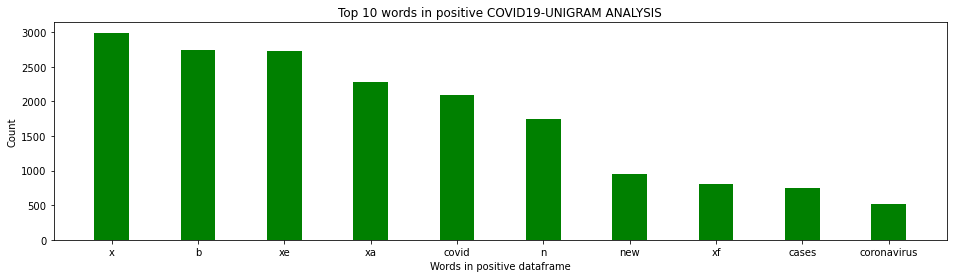

In [71]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive COVID19-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

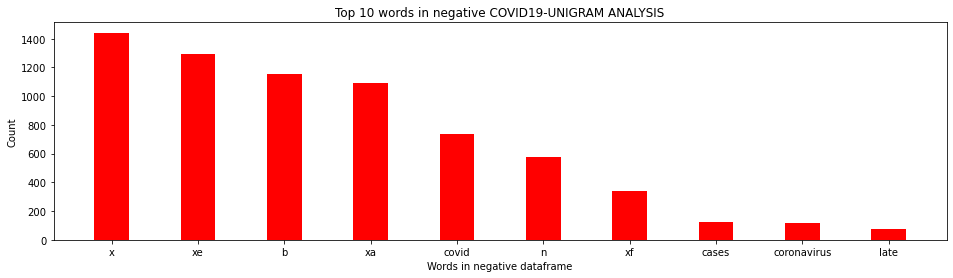

In [72]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative COVID19-UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

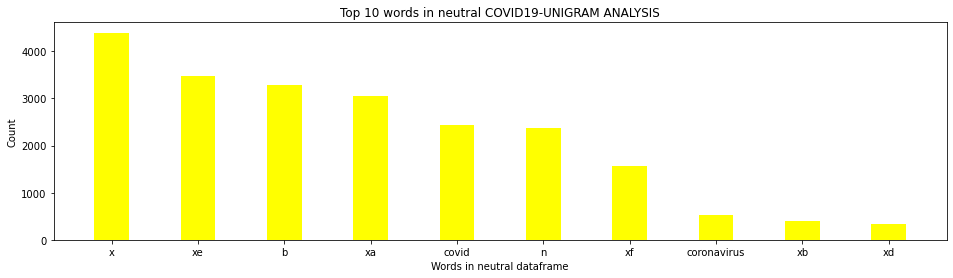

In [73]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral COVID19-UNIGRAM ANALYSIS")
plt.savefig("neutral-unigram.png")
plt.show()

In [74]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [75]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].text:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1

Sentence after removing stopwords: ['b', 'covid', 'gujarat', 'reported', 'new', 'cases', 'deaths', 'last', 'hours', 'active', 'cases', 'n', 'ntotal', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'cases', 'bhutan', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'realdoctormike', 'said', 'many', 'times', 'fever', 'helps', 'amp', 'xe', 'x', 'xt', 'know', 'think', 'chest', 'compressions', 'instead', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'narrative', 'collapsing', 'nlisten', 'someone', 'originally', 'fell', 'hook', 'line', 'sinker', 'n', 'told', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sue', 'keep', 'employees', 'long', 'employees', 'hostage', 'excellent', 'quote', 'anot', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rare', 'cases', 'coronavirus', 'vaccines', 'may', 'cause', 'longcovid', 'xe', 'x', 'xlike', 'symptoms']
Sentence after removing

Sentence after removing stopwords: ['b', 'omicron', 'less', 'severe', 'people', 'ending', 'hospital', 'dying', 'true', 'everyone', 'w', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'live', 'bihar', 'reported', 'new', 'cases', 'two', 'deaths', 'last', 'hours', 'active', 'cases', 'state', 'stand', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'numbers', 'game', 'people', 'infected', 'equals', 'people', 'hospitalised', 'mostly', 'people', 'severely', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'slovenia', 'sets', 'new', 'daily', 'record', 'covid', 'infections', 'n', 'n', 'new', 'cases', 'last', 'sunday', 'number', 'n', 'deaths']
Sentence after removing stopwords: ['b', 'vice', 'president', 'venkaiah', 'naidu', 'tests', 'covid', 'positive', 'goes', 'self', 'isolation', 'n', 'mvenkaiahnaidu', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'still', 'important', 'story', 'world', 'impact', 'supply', 'chains', 'energy

Sentence after removing stopwords: ['b', 'new', 'dr', 'bonnie', 'henry', 'adriandix', 'mark', 'second', 'anniversary', 'first', 'documented', 'case', 'coronavirus', 'f', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'listen', 'bilingual', 'live', 'phone', 'programme', 'covid', 'fm', 'gold', 'channel', 'pm', 'n', 'n', 'xe', 'x', 'xa', 'ask', 'questions', 'expe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'million', 'ontarians', 'received', 'booster', 'dose', 'covid', 'vaccine', 'n', 'nmixing', 'vaccines', 'safe', 'effecti', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'goa', 'reports', 'covid', 'deaths', 'last', 'hours', 'year', 'old', 'male', 'cunchelim', 'co', 'morbidities', 'succum', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'update', 'cuttack', 'district', 'jan', 'nout', 'new', 'cases', 'declared', 'state', 'cuttack', 'district', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'update', 'n', 'january', 'novel

Sentence after removing stopwords: ['b', 'new', 'cases', 'new', 'deaths', 'greece', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'chaosinmycoumy', 'son', 'steroids', 'due', 'lung', 'condition', 'rarely', 'leaves', 'house', 'due', 'covid', 'po', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'cases', 'new', 'deaths', 'germany', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'attn', 'americans', 'living', 'disabilities', 'amp', 'chronicillness', 'loved', 'ones', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'ximportant', 'pwd', 'video', 'dialogue', 'ab', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yes', 'open', 'get', 'free', 'home', 'estimate', 'staa', 'flooringinstallation', 'project', 'today', 'learn', 'safety', 'pr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'oil', 'slicked', 'rayong',

Sentence after removing stopwords: ['b', 'delhi', 'sunday', 'reported', 'new', 'covid', 'cases', 'positivity', 'rate', 'declined', 'per', 'cent', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sanchezcastejon', 'impression', 'leaders', 'found', 'great', 'pastime', 'distract', 'attention', 'major', 'err', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'cases', 'kiribati', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'taiwan', 'sunday', 'reported', 'new', 'covid', 'cases', 'consisting', 'local', 'imported', 'cases', 'island', 'diseas', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'delhi', 'reports', 'new', 'covid', 'cases', 'recoveries', 'deaths', 'last', 'hours', 'nthe', 'number', 'active', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nearly', 'quarter', 'ambulance', 'calls', 'non', 'essential', 'covid', 'tightens', 'grip', 'please', 'think',

Sentence after removing stopwords: ['b', 'outline', 'sanitary', 'measures', 'appointment', 'send', 'friendly', 'reminders', 'n', 'nread', 'full', 'article', 'prepar', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'goes', 'without', 'saying', 'days', 'conservatives', 'seem', 'synonymous', 'white', 'collar', 'fraud', 'n', 'nso', 'much', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'staa', 'new', 'roaring', 'twenties', 'n', 'n', 'wapo', 'bloomberg', 'wsj', 'cnbc', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vintage', 'large', 'russian', 'matryoshkas', 'nesting', 'dolls', 'babushka', 'doll', 'matryoshkas', 'freeshipping', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xa', 'xa', 'important', 'personal', 'thread', 'covid', 'deniers']
Sentence after removing stopwords: ['b', 'russia', 'reports', 'new', 'coronavirus', 'cases', 'big', 'one', 'day', 'increase', 'record', 'new', 'deaths', 'covid', 'xe', 'x', 'xa']
Sentence 

Sentence after removing stopwords: ['b', 'bootrevolution', 'clairelum', 'thomasdolphin', 'sure', 'whether', 'uk', 'us', 'either', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'levels', 'boston', 'area', 'sewage', 'xe', 'x', 'xs', 'shown', 'one', 'best', 'leading', 'indicators', 'infection', 'trends']
Sentence after removing stopwords: ['b', 'initial', 'period', 'n', 'let', 'ask', 'people', 'apply', 'important', 'simple', 'health', 'tips', 'commitment', 'n', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'long', 'people', 'covid', 'may', 'remain', 'contagious', 'according', 'best', 'available', 'data']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xcthe', 'case', 'masks', 'xe', 'x', 'xd', 'period', 'masks', 'etc', 'made', 'sense', 'good', 'info', 'amp', 'understanding', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'breaking', 'xf', 'xf', 'xa', 'xa', 'vice', 'president', 'venkaiahnaidu', 'tests', 'covid', 'positive']
Sentence afte

Sentence after removing stopwords: ['b', 'new', 'covid', 'data', 'pm', 'est', 'coronavirus', 'covid', 'covid']
Sentence after removing stopwords: ['b', 'newsale', 'delhi', 'reports', 'new', 'covid', 'cases', 'recoveries', 'deaths', 'last', 'hours', 'ani', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'afc', 'confirmed', 'women', 'asiancup', 'india', 'match', 'chinese', 'taipei', 'india', 'called', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'great', 'thread', 'misses', 'pawhere', 'potus', 'remain', 'focused', 'growing', 'corp', 'oligarch', 'wealth', 'costs', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'things', 'antivaxx', 'ers', 'think', 'cure', 'covid', 'n', 'nbleach', 'bright', 'lights', 'blood', 'jesus', 'horse', 'dewormer', 'sea', 'k', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'china', 'ban', 'eating', 'bats', 'xf', 'xf', 'xa', 'xandtv', 'neocov', 'chinese', 'scientists', 'warn', 'new', 'kind', 'coronavirus', 'bats', 'xe', 'x

Sentence after removing stopwords: ['b', 'people', 'waking', 'reality', 'gqp', 'spreading', 'covid', 'intentionally', 'n', 'nthat', 'good', 'thing', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'line', 'cabinet', 'decision', 'based', 'law', 'regarding', 'infectious', 'diseases', 'competent', 'author', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'icddrb', 'please', 'consider', 'shutdown', 'social', 'gathering', 'spreading', 'covid', 'lot', 'making', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'beware', 'covid', 'revisionists', 'tell', 'last', 'months', 'great', 'mistake', 'yes', 'mistakes', 'made', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'daily', 'new', 'cases', 'cross', 'k', 'karnataka', 'today', 'n', 'xe', 'x', 'xbenew', 'cases', 'state', 'n', 'xe', 'x', 'xbenew', 'cases', 'b', 'lore', 'n', 'xe', 'x', 'xbepositivity', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'biorxivpreprint', 'novel', 'xe', 'x', 'xcprime', 's

Sentence after removing stopwords: ['b', 'check', 'video', 'case', 'study', 'child', 'contracted', 'covid', 'developed', 'severe', 'symptoms', 'n', 'n', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'effect', 'covid', 'adolescents', 'adhd', 'fared', 'badly', 'surprisingly']
Sentence after removing stopwords: ['b', 'total', 'confirmed', 'covid', 'cases', 'county', 'mt', 'covid', 'insights', 'analytics', 'team', 'usafacts', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'health', 'coronavirus', 'covid', 'omicron', 'deaths', 'xe', 'x', 'x', 'gt', 'omicron', 'caused', 'high', 'increase', 'u', 'daily', 'death', 'count', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'good', 'counter', 'remedies', 'covid', 'home', 'remedies', 'natural', 'remedies', 'covid', 'coronavirus', 'corona', 'natural', 'remedies']
Sentence after removing stopwords: ['b', 'today', 'update', 'covid', 'trends', 'indonesia', 'last', 'days', 'n', 'new', 'cases', 'increase', 'fold'

Sentence after removing stopwords: ['b', 'saffiyakhan', 'love', 'emigrate', 'new', 'zealand', 'right', 'move', 'country', 'seems', 'embody', 'honest', 'demo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cuts', 'covid', 'isolation', 'times', 'good', 'idea', 'lindageddes', 'weighs', 'pros', 'cons', 'releasing', 'people', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'abcnews', 'coronavirus', 'think', 'repoabout', 'number', 'people', 'currently', 'icu', 'mostly', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ne', 'delhi', 'least', 'new', 'slots', 'available', 'amp', 'n', 'ncovishield', 'ndose', 'ndose', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'large', 'backlog', 'coucases', 'due', 'covid', 'created', 'lack', 'couspace']
Sentence after removing stopwords: ['b', 'cottongurumarketrepo', 'covid', 'agriculture', 'textiles', 'icac', 'ica', 'nindia', 'xc', 'xafarm', 'exports', 'xc', 'xaare', 'growing', 'consistently', 'xe', 'x', 'xa']
Sen

Sentence after removing stopwords: ['b', 'pakistani', 'think', 'must', 'stop', 'supporting', 'china', 'virus', 'policy', 'nthe', 'coronavirus', 'launched', 'wuhan', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'good', 'morning', 'toronto', 'forget', 'face', 'coverings', 'mandatory', 'ttc', 'masks', 'cover', 'nose', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pm', 'january', 'department', 'health', 'cordillera', 'reports', 'recoveries', 'new', 'cases', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'good', 'please', 'make', 'public', 'n', 'n', 'healthvermont', 'access', 'wastewater', 'data', 'said', 'katie', 'w', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xc', 'xf', 'thrown', 'track', 'comes', 'meeting', 'many', 'sdgs', 'including', 'sdg', 'poverty', 'due', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'total', 'confirmed', 'covid', 'cases', 'county', 'covid', 'insights', 'analytics', 'team', 'usafacts', 'xe'

Sentence after removing stopwords: ['b', 'new', 'cases', 'new', 'deaths', 'slovakia', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'quint', 'fit', 'xc', 'xahas', 'xc', 'xadebunked', 'xc', 'xathis', 'misinformation', 'circulating', 'social', 'media', 'xe', 'x', 'x', 'neither', 'neocov', 'new', 'virus', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'rd', 'wave', 'india', 'hit', 'peak', 'cities', 'majorly', 'hit', 'virus', 'cities', 'c', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'one', 'employees', 'knowingly', 'came', 'work', 'covid', 'infected', 'several', 'people', 'thanks', 'cdcgov', 'covid']
Sentence after removing stopwords: ['b', 'new', 'coronavirus', 'cases', 'today', 'n', 'lives', 'lost', 'n', 'johnsonout', 'notfittogovern', 'covid', 'johnsonthecorruptpm', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'positive', 'cases', 'reported', 'today', 

Sentence after removing stopwords: ['b', 'bangladesh', 'covid', 'pandemic', 'continued', 'upward', 'trend', 'sample', 'positivity', 'rate', 'touching', 'high', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'brazil', 'reports', 'record', 'high', 'cases', 'coronavirus', 'n', 'n', 'politics', 'brazil', 'brazilianpolitics', 'coronavirus', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'maharashtra', 'reports', 'new', 'coronavirus', 'cases', 'cases', 'today', 'active', 'cases', 'state', 'rise', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'leparisien', 'new', 'light', 'hope', 'awakened', 'horizon', 'world', 'emerges', 'pandemic', 'shelby', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'teachers', 'federation', 'says', 'wished', 'students', 'including', 'primary', 'school', 'would', 'required', 'wea', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'alberta', 'premier', 'jkenney', 'says', 'early', 'signs', 'province', 'xe', '

Sentence after removing stopwords: ['b', 'best', 'analysis', 'sir', 'xf', 'xf', 'x', 'xf', 'xf', 'xf', 'xf', 'xbb', 'nkeep', 'going', 'xf', 'xf', 'x', 'xd', 'xf', 'xf', 'xf', 'xbb', 'ndear', 'friends', 'know', 'covid', 'cases', 'details', 'follow', 'xe', 'xc', 'xc', 'xf', 'xf', 'xf', 'xbb', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'covid', 'variant', 'spreading', 'like', 'wildfire', 'across', 'uk', 'denmark', 'norway', 'sweden', 'india', 'signapore', 'n', 'nba', 'xe', 'x', 'xste', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'us', 'great', 'amp', 'wonderful', 'blah', 'blah', 'nwe', 'leading', 'world', 'covid', 'deaths', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'whitehouse', 'prosumersoft', 'potus', 'xf', 'xf', 'x', 'xba', 'xf', 'xf', 'x', 'xb', 'united', 'states', 'n', 'n', 'xf', 'xf', 'xa', 'x', 'free', 'n', 'n', 'xe', 'xc', 'x', 'st', 'covid', 'vaccine', 'shot', 'n', 'xe', 'xc', 'x', 'nd', 'covid', 'vaccine', 'shot', 'xe', 'x', 'x

Sentence after removing stopwords: ['b', 'radio', 'adele', 'new', 'light', 'hope', 'awakened', 'horizon', 'world', 'emerges', 'pandemic', 'shel', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'prof', 'dr', 'vikas', 'bhatia', 'special', 'programme', 'total', 'health', 'dd', 'news', 'based', 'prevention', 'precautions', 'fro', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'drtoddlee', 'cmaj', 'intensivebot', 'nice', 'findings', 'remdesivir', 'n', 'bad', 'useful', 'icu', 'covid', 'pts', 'n', 'pretty', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bidmartcanada', 'wionews', 'new', 'beginning', 'saturday', 'january', 'dhs', 'require', 'non', 'u', 'individuals', 'xe', 'x', 'xafseeking', 'enter', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tested', 'positive', 'covid', 'th', 'jan', 'complete', 'isolation', 'days', 'today', 'another', 'pcr', 'test', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'going', 'xe', 'x', 'xve', 'obviousl

Sentence after removing stopwords: ['b', 'vice', 'president', 'venkaiah', 'naidu', 'tested', 'positive', 'covid', 'n', 'mvenkaiahnaidu', 'covid']
Sentence after removing stopwords: ['b', 'current', 'situation', 'winchester', 'uk', 'via', 'zoeapp', 'acceptable', 'amp', 'justified', 'r', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'quarter', 'day', 'coronavirus', 'stats', 'n', 'confirmed', 'n', 'fatalities', 'n', 'recovered', 'n', 'total', 'fatality', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'doctor', 'react', 'corona', 'variants', 'rajini', 'style', 'xf', 'xf', 'x', 'xe', 'n', 'rajinikanth', 'n', 'covid', 'trending', 'style', 'funny', 'comedy', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pfizer', 'remember', 'lord', 'proclaimed', 'give', 'thanks', 'accepting', 'faith', 'worshipping', 'none', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'routes', 'super', 'immunity', 'covid', 'via', 'debugliesnews', 'health', 'healthcare', 'xe', 

Sentence after removing stopwords: ['b', 'new', 'cases', 'new', 'deaths', 'portugal', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'omicron', 'responsible', 'percent', 'new', 'covid', 'infections', 'nepal']
Sentence after removing stopwords: ['b', 'would', 'love', 'see', 'someone', 'sue', 'skynews', 'bastards', 'fear', 'mongering', 'covid', 'last', 'years', 'along', 'w', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xm', 'also', 'worried', 'idea', 'avoiding', 'incidental', 'admission', 'covid', 'positive', 'asy', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'franceen', 'new', 'light', 'hope', 'awakened', 'horizon', 'world', 'emerges', 'pandemic', 'shelby', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'uk', 'jan', 'n', 'xf', 'xf', 'xa', 'xa', 'deaths', 'due', 'covid', 'reported', 'across', 'uk', 'last', 'days', 'high', 'number', 'xe', 'x', 'xa']
Sen

Sentence after removing stopwords: ['b', 'could', 'xe', 'x', 'xall', 'send', 'healing', 'thoughts', 'good', 'juju', 'prayers', 'yr', 'old', 'granddaughter', 'xe', 'x', 'xs', 'way', 'please', 'autumn', 'grand', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'according', 'cdc', 'individuals', 'hospitalized', 'us', 'covid', 'tuesday', 'high', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'instant', 'replay', 'pharmative', 'live', 'prevalence', 'covid', 'long', 'term', 'complications', 'l']
Sentence after removing stopwords: ['b', 'u', 'territories', 'final', 'covid', 'data', 'saturday', 'n', 'ntotal', 'confirmed', 'cases', 'reached', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ireland', 'thinks', 'covid', 'right']
Sentence after removing stopwords: ['b', 'new', 'cases', 'covid', 'death', 'patients', 'discharges', 'amp', 'vaccinated', 'karnataka', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'parisreview', 'new', 'light', 'hope', 'awakened

Sentence after removing stopwords: ['b', 'even', 'bothered', 'write', 'decent', 'caption', 'one', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'x', 'x', 'n', 'ntags', 'covid', 'covid', 'coronavirus', 'omicron', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'shamezladhani', 'infectprevent', 'let', 'also', 'clear', 'kids', 'small', 'probability', 'catching', 'severe', 'covid', 'anyways']
Sentence after removing stopwords: ['b', 'true', 'leader', 'leads', 'example', 'nabsolute', 'honour', 'working', 'dynamic', 'leadership', 'excell', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'offers', 'break', 'cloud', 'gendered', 'determinants', 'impacts', 'health', 'emergencies', 'global', 'health', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'himachalpradesh', 'xe', 'x', 'x', 'new', 'covid', 'cases', 'recoveries', 'amp', 'deaths', 'reported', 'state', 'today', 'till', 'pm', 'active', 'case', 'xe', 'x', 'xa']
Sentence after removing stopw

Sentence after removing stopwords: ['b', 'covid', 'raj', 'govt', 'releases', 'fresh', 'guidelines', 'relaxations', 'n', 'n', 'n', 'n', 'rajasthan', 'rajasthannews', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'total', 'confirmed', 'covid', 'cases', 'county', 'covid', 'insights', 'analytics', 'team', 'usafacts', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'happened', 'day', 'exactly', 'years', 'ago', 'n', 'ni', 'strong', 'knowledge', 'sanskrit', 'language', 'due', 'family', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'classy', 'tennis', 'balls', 'pattern', 'sports', 'premium', 'face', 'mask', 'tennis', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'piersmorgan', 'great', 'initiative', 'good', 'yet', 'let', 'xe', 'x', 'xs', 'repodeaths', 'due', 'covid', 'among', 'vaccinated', 'vs', 'unvaccinated', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'right', 'time', 'hosting', 'important', 'event', 'covid', 'cases', 'increasesly'

Sentence after removing stopwords: ['b', 'health', 'chiefs', 'revealed', 'officially', 'monitoring', 'new', 'version', 'covid', 'xe', 'x', 'x', 'nicknamed', 'xe', 'x', 'xcst', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'biharfightscorona', 'nupdate', 'day', 'n', 'xe', 'xe', 'xa', 'xef', 'xb', 'xf', 'covid', 'cases', 'reported', 'far', 'nd', 'jan', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'cases', 'new', 'deaths', 'azerbaijan', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'agreed', 'let', 'xe', 'x', 'xs', 'go', 'made', 'great', 'strides', 'pt', 'asked', 'referral', 'ot', 'earl', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'coronavirus', 'ends', 'maskoff', 'song', 'whole', 'world', 'yall', 'finally', 'understand', 'ca', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'breakthrough', 'covid', 'infections', 'spur', 'strong', 'antibody', 'responses'

Sentence after removing stopwords: ['b', 'ocdcontrial', 'resumes', 'tomorrow', 'amid', 'another', 'large', 'covid', 'outbreak', 'ottawa', 'jail', 'click', 'image', 'learn', 'mor', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'rona', 'anthem', 'performed', 'torture', 'beats', 'dropped', 'legacy', 'roq', 'n', 'hiphop', 'covid', 'maskup', 'podcast', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sometimes', 'something', 'nice', 'somebody', 'else', 'best', 'way', 'feel', 'good', 'xf', 'xf', 'x', 'xad', 'n', 'n', 'covid', 'sarscov', 'ncov', 'hcov']
Sentence after removing stopwords: ['b', 'inoculated', 'catching', 'coronavirus', 'soon', 'appears', 'low', 'likelihood', 'developing', 'long', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'cases', 'new', 'deaths', 'iran', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'total', 'confirmed', 'covid', 'cases', 'county',

Sentence after removing stopwords: ['b', 'new', 'covid', 'data', 'est', 'coronavirus', 'covid', 'covid']
Sentence after removing stopwords: ['b', 'n', 'ncore', 'pacific', 'kitchen', 'buddy', 'stool', 'ages', 'safe', 'lbs', 'n', 'n']
Sentence after removing stopwords: ['b', 'clear', 'insights', 'covid', 'omicron', 'dr', 'megan', 'ranney', 'emergency', 'physician', 'amp', 'dean', 'school', 'public', 'health', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'total', 'confirmed', 'covid', 'cases', 'county', 'ga', 'covid', 'insights', 'analytics', 'team', 'usafacts', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'beware', 'scam', 'covid', 'pass', 'texts', 'threatening', 'fine', 'xe', 'x', 'xt', 'click', 'link', 'block', 'number', 'repoit', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'help', 'keep', 'friends', 'family', 'safe', 'taking', 'rapid', 'covid', 'test', 'meeting', 'others', 'free', 'quick', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b'

Sentence after removing stopwords: ['b', 'says', 'new', 'covid', 'variant', 'neocov', 'n', 'n', 'coronavirus', 'neocovvariant', 'covidindia', 'covid', 'indianews', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'free', 'covid', 'testing', 'january', 'occurring', 'statewide', 'pop', 'sites', 'cabell', 'doddridge', 'fayette', 'greenbrier', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vice', 'president', 'venkaiah', 'naidu', 'tested', 'covid', 'positive', 'today']
Sentence after removing stopwords: ['b', 'ekathimerini', 'new', 'light', 'hope', 'awakened', 'horizon', 'world', 'emerges', 'pandemic', 'shelby', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'saturday', 'night', 'live', 'xe', 'x', 'xs', 'macgruber', 'hilariously', 'takes', 'covid', 'misinformation', 'snl', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'globally', 'xf', 'xf', 'xc', 'x', 'n', 'new', 'cases', 'covid', 'xe', 'x', 'xbc', 'confirmed', 'yesterday', 'n', 'xe', '

Sentence after removing stopwords: ['b', 'anyone', 'else', 'wondering', 'many', 'xe', 'x', 'xcanti', 'vaxxer', 'protesters', 'xe', 'x', 'xd', 'actually', 'vaccinated', 'could', 'cre', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'wave', 'vaccinated', 'willingly', 'unvaccinated', 'antivaxxers', 'covid', 'fourthwave', 'deltavariant', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cyberfucking', 'n', 'mr', 'motivator', 'n', 'n', 'mrmotivator', 'n', 'n', 'covid', 'buildalifeyoulove', 'believe', 'love', 'blackhistorymonth', 'life']
Sentence after removing stopwords: ['b', 'coronavirus', 'covid', 'covid', 'sarscov', 'covidworld', 'n', 'minutes', 'early']
Sentence after removing stopwords: ['b', 'total', 'confirmed', 'covid', 'cases', 'county', 'ct', 'covid', 'insights', 'analytics', 'team', 'usafacts', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ahmedabad', 'least', 'new', 'slots', 'available', 'amp', 'n', 'ncovishield', 'ndose', 'ndose', 'xe'

Sentence after removing stopwords: ['b', 'kosovo', 'reports', 'new', 'covid', 'cases', 'sunday', 'n']
Sentence after removing stopwords: ['b', 'good', 'morning', 'late', 'numbers', 'covid', 'arizona', 'detailed', 'breakdowns', 'week', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'trader', 'joes', 'natural', 'treats', 'peanut', 'gt', 'food', 'stayathome', 'stayhome', 'treats', 'yummies']
Sentence after removing stopwords: ['b', 'real', 'image', 'lung', 'covid', 'patient', 'died', 'coronavirus', 'severity', 'nit', 'taken', 'new', 'techn', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'beijing', 'via', 'reuters', 'tonymunroe', 'n', 'n', 'beijing', 'olympics', 'organisers', 'said', 'sunday', 'confirmed', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ne', 'delhi', 'least', 'new', 'slots', 'available', 'amp', 'n', 'ncovishield', 'ndose', 'ndose', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'fires', 'lit', 'shopfronts', 'attacked', 'p

Sentence after removing stopwords: ['b', 'n', 'n', 'couple', 'kissing', 'th', 'eback', 'store', 'think', 'covid', 'going', 'ignore', 'love', 'get', 'room', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'grab', 'stylish', 'new', 'face', 'mask', 'cool', 'looking', 'clothing', 'right', 'xe', 'x', 'x', 'covid', 'tshirt', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'covid', 'cases', 'today', 'n', 'covid', 'covidmalaysia', 'n']
Sentence after removing stopwords: ['b', 'greenswelfares', 'gurmeetramrahim', 'good', 'job', 'volunteers', 'xe', 'xd', 'xa', 'n', 'vaccination', 'coronavirus']
Sentence after removing stopwords: ['b', 'england', 'covid', 'vaccinepassports', 'realize', 'government', 'plans', 'track', 'track', 'right']
Sentence after removing stopwords: ['b', 'newsupdate', 'xf', 'xf', 'xa', 'xa', 'nsome', 'members', 'indian', 'women', 'football', 'team', 'tested', 'positive', 'covid', 'tonight', 'match', 'betwe', 'xe', 'x', 'xa']
Sentence after removing 

Sentence after removing stopwords: ['b', 'xe', 'x', 'xb', 'xef', 'xb', 'xf', 'health', 'ministry', 'mzgovpl', 'announced', 'new', 'confirmed', 'covid', 'infections', 'poland', 'increasing', 'tot', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yep', 'covid', 'cases', 'increase', 'virginia', 'surprise', 'elect', 'member', 'gopdeathcult', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'serbia', 'covid', 'tested', 'positive', 'new', 'confirmed', 'patients']
Sentence after removing stopwords: ['b', 'lakh', 'fresh', 'covid', 'cases', 'india', 'deaths', 'hours', 'covid', 'coronavirus', 'covidupdate', 'corona', 'freshcases']
Sentence after removing stopwords: ['b', 'might', 'make', 'complete', 'sense', 'year', 'old', 'soubry', 'jab', 'xe', 'x', 'xbenefits', 'outweigh', 'risks', 'basis', 'xe', 'x', 'x', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'add', 'existing', 'data', 'covid', 'xe', 'xac', 'x', 'xef', 'xb', 'xf', 'preeclampsia', 'risk', 'counsel', 'pre

Sentence after removing stopwords: ['b', 'oh', 'ffs', 'justpersnickety', 'remember', 'realdonaldtrump', 'said', 'going', 'tremendous', 'suicides', 'k', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'omicron', 'mild', 'xe', 'x', 'xs', 'last', 'variant', 'xe', 'x', 'xll', 'see', 'therefore', 'xe', 'x', 'xs', 'important', 'reduce', 'transmission', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'home', 'kaleidoscope', 'n', 'nlooking', 'new', 'pillow', 'cushion', 'nlots', 'detail', 'pattern', 'n', 'ngreat', 'homedecor', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'delhi', 'reports', 'new', 'covid', 'cases', 'recoveries', 'deaths', 'last', 'hours', 'n', 'nactive', 'cases', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'government', 'allowed', 'relaxations', 'also', 'emphasised', 'following', 'covid', 'appropriate', 'behaviour', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'today', 'covid', 'xf', 'xf', 'xa', 'xa', 'jan', 'n', 'xf',

Sentence after removing stopwords: ['b', 'truthful', 'statement', 'future', 'covid', 'fauci', 'today', 'know', 'xf', 'xf', 'x', 'xae', 'thisweekabc']
Sentence after removing stopwords: ['b', 'beingjwood', 'know', 'works', 'contain', 'covid', 'nsome', 'people', 'xe', 'x', 'xt', 'consistently', 'apply']
Sentence after removing stopwords: ['b', 'media', 'bulletin', 'status', 'positive', 'cases', 'covid', 'telangana', 'n', 'dated', 'pm', 'n', 'telanganahealth', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'update', 'new', 'cases', 'coronavirus', 'confirmed', 'citizens', 'recovered', 'n']
Sentence after removing stopwords: ['b', 'really', 'looks', 'like', 'coronavirus', 'nbut', 'nose', 'like', 'neocov', 'n', 'covid', 'wuhan']
Sentence after removing stopwords: ['b', 'coronavirus', 'covid', 'covid', 'sarscov', 'covidworld', 'ndaily', 'new', 'confirmed', 'covid', 'cases', 'per', 'million', 'people', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hi', 'looking', '

Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xe', 'end', 'pandemic', 'near', 'consult', 'coronavirus', 'cases', 'country', 'n', 'n', 'xf', 'xf', 'xc', 'x']
Sentence after removing stopwords: ['b', 'large', 'protest', 'vaccine', 'passports', 'central', 'stockholm', 'capital', 'sweden', 'n', 'n', 'xe', 'xbe', 'x', 'xe', 'x', 'xe', 'xe', 'x', 'xab', 'xe', 'xb', 'x', 'n', 'xe', 'x', 'xab', 'xe', 'xb', 'x', 'xe', 'xa', 'xa', 'xe', 'xb', 'xa', 'xe', 'xae', 'xba', 'n', 'ccpvirus', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'think', 'wise', 'covid', 'positive', 'individuals', 'job', 'workplace', 'especially', 'hospitals', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'whole', 'time', 'none', 'family', 'covid', 'one', 'big', 'lump', 'somewhere', 'even', 'littl', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'total', 'confirmed', 'covid', 'cases', 'county', 'mi', 'covid', 'insights', 'analytics', 'team', 'usafacts', 'xe', 'x', 'xa']
Sentence a

Sentence after removing stopwords: ['b', 'romney', 'tests', 'positive', 'coronavirus', 'romney', 'tests', 'positive', 'coronavirus']
Sentence after removing stopwords: ['b', 'new', 'covid', 'data', 'pm', 'est', 'coronavirus', 'covid', 'covid']
Sentence after removing stopwords: ['b', 'abhishekaitc', 'respected', 'sir', 'come', 'may', 'one', 'ever', 'able', 'write', 'historical', 'failures', 'pm', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'bill', 'maher', 'says', 'americans', 'obediently', 'follow', 'doctors', 'advice', 'n', 'n', 'covid', 'n', 'n']
Sentence after removing stopwords: ['b', 'gujarat', 'reports', 'fresh', 'covid', 'cases', 'recoveries', 'deaths', 'last', 'hours', 'n', 'nactive', 'cases', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'research', 'available', 'researchgate', 'ict', 'industry', 'bigdata', 'bigdataanalytics', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xa', 'xalatest', 'uk', 'covid', 'data', 'xf',

Sentence after removing stopwords: ['b', 'faucifallacy', 'soon', 'able', 'drink', 'urine', 'vax', 'boost', 'full', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'total', 'confirmed', 'covid', 'cases', 'county', 'ia', 'covid', 'insights', 'analytics', 'team', 'usafacts', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'mexico', 'asking', 'national', 'guard', 'members', 'state', 'employees', 'volunteer', 'substitute', 'teachers', 'keep', 'schools', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ultraviolet', 'light', 'disinfection', 'wand', 'xe', 'x', 'x', 'kills', 'viruses', 'bacteria', 'rtplz', 'covid', 'xe', 'x', 'xbc', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sndl', 'covid', 'cannabisculture', 'n', 'n', 'garygensler', 'company', 'working', 'honest', 'people', 'trying', 'find', 'natural', 'cure', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'exports', 'korea', 'free', 'trade', 'zones', 'hit', 'time', 'high',

Sentence after removing stopwords: ['b', 'covidvaccine', 'significantly', 'reduces', 'burden', 'covid', 'bringing', 'chance', 'severe', 'consequenc', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'many', 'countries', 'indopacific', 'struggle', 'meet', 'vaccination', 'targets', 'india', 'could', 'spearhead', 'vaccine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'good', 'health', 'care', 'means', 'secure', 'ems', 'system', 'within', 'cherokee', 'nation', 'n', 'n', 'xe', 'xe', 'xa', 'xef', 'xb', 'xf']
Sentence after removing stopwords: ['b', 'n', 'nwhirlpool', 'cu', 'ft', 'high', 'efficiency', 'white', 'top', 'load', 'washing', 'machine', 'quick', 'wash', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'scientists', 'racing', 'develop', 'covid', 'antivirals', 'n', 'nthe', 'first', 'crop', 'antivirals', 'sarscov', 'pro', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'breakingnews', 'clashes', 'erupt', 'near', 'european', 'institutions', 'bru

Sentence after removing stopwords: ['b', 'andhrapradesh', 'reports', 'new', 'covid', 'cases', 'sunday', 'taking', 'cumulative', 'caseload']
Sentence after removing stopwords: ['b', 'wow', 'n', 'n', 'headteachers', 'staff', 'actually', 'pupils', 'simply', 'trying', 'keep', 'safe', 'possible', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'uttarpradesh', 'recorded', 'slight', 'fall', 'new', 'covid', 'cases', 'people', 'testing', 'positive', 'today', 'n', 'n']
Sentence after removing stopwords: ['b', 'bengaluru', 'covid', 'count', 'n', 'n', 'bengaluru', 'sunday', 'recorded', 'new', 'covid', 'cases', 'n', 'nactive', 'cases', 'city', 'stand', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'taking', 'account', 'send', 'symptomless', 'possibly', 'positive', 'child', 'school', 'tomorrow', 'day', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'north', 'delhi', 'least', 'new', 'slots', 'available', 'amp', 'n', 'ncovishield', 'ndose', 'nd', 'xe', 'x', 'xa']
Sente

Sentence after removing stopwords: ['b', 'time', 'covid', 'delta', 'omicron', 'spread', 'fast', 'nbut', 'nyet', 'maximum', 'us', 'concious', 'follow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'cases', 'new', 'deaths', 'mauritania', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'delta', 'wuham', 'doubt', 'ni', 'blame', 'af', 'every', 'day', 'nthey', 'done', 'much', 'harm', 'whole', 'wide', 'world', 'n', 'china', 'n', 'covid', 'n', 'covid']
Sentence after removing stopwords: ['b', 'fresh', 'covid', 'cases', 'karnataka', 'last', 'hours', 'n', 'covid', 'coronavirus', 'karnataka']
Sentence after removing stopwords: ['b', 'chocolate', 'orange', 'loaf', 'cake', 'white', 'chocolate', 'chips', 'foodstagram', 'delicious', 'breadlover', 'cba', 'norwichfood', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'covid', 'data', 'pm', 'est', 'coronavirus', 'covid', 'covid']
Sentence a

Sentence after removing stopwords: ['b', 'safe', 'pregnant', 'lactating', 'women', 'take', 'covid', 'vaccination', 'expert', 'dr', 'rooma', 'sinha', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'navigate', 'new', 'normal', 'policy', 'changes', 'come', 'along', 'business', 'leaders', 'ensu', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vice', 'president', 'india', 'tests', 'positive', 'covid']
Sentence after removing stopwords: ['b', 'students', 'delhi', 'able', 'return', 'pre', 'covid', 'routine', 'delhi', 'return']
Sentence after removing stopwords: ['b', 'every', 'u', 'home', 'eligible', 'order', 'four', 'free', 'home', 'covid', 'tests', 'learn', 'order', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'coronavirus', 'india', 'adds', 'lakh', 'new', 'cases', 'deaths', 'hours', 'n', 'n', 'health', 'india', 'n', 'covid', 'n', 'therealtalkin', 'ndtv']
Sentence after removing stopwords: ['b', 'mkstalin', 'mvenkaiahnaidu', 'wishing', 'speedy', 'recovery

Sentence after removing stopwords: ['b', 'afc', 'women', 'xe', 'x', 'xs', 'asiancup', 'match', 'chinese', 'taipei', 'india', 'called', 'due', 'positive', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'study', 'reveals', 'alcoholic', 'drink', 'best', 'preventing', 'virus', 'covid', 'n']
Sentence after removing stopwords: ['b', 'coronavirus', 'covid', 'world', 'map', 'new', 'cases', 'per', 'million', 'citizens', 'n', 'n', 'nmore', 'insights', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'giggity', 'jrubinblogger', 'mediaite', 'tell', 'many', 'americans', 'willing', 'sacrifice', 'altar', 'mammo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'like', 'restrictions', 'educational', 'sectors', 'look', 'tourist', 'place', 'manali', 'people', 'co', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'zealand', 'pm', 'ardern', 'self', 'isolating', 'exposure', 'covid', 'positive', 'case', 'n', 'nfollow', 'updates', 'coronavirus', 'h', 'x

Sentence after removing stopwords: ['b', 'days', 'significant', 'number', 'people', 'infected', 'coronavirus', 'received', 'double', 'dose', 'vac', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'repandybiggsaz', 'huh', 'nhow', 'natural', 'immunity', 'fight', 'covid', 'catch', 'covid', 'acquire', 'n', 'nand', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'massachusetts', 'covid', 'cases', 'hospitalized', 'virus', 'test', 'positive', 'getting', 'treatment', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'egypt', 'xe', 'x', 'xs', 'health', 'ministry', 'coronavirus', 'new', 'cases', 'covid', 'fatalities', 'fully', 'recove', 'via', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'indiafightscorona', 'rajasthan', 'nrd', 'jan', 'covid', 'pm', 'bulletin', 'n', 'nplz', 'keep', 'maskup', 'xf', 'xf', 'x', 'xb', 'amp', 'staysafe', 'n', 'n', 'positive', 'case', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'newzealand', 'pmardern', '

Sentence after removing stopwords: ['b', 'dr', 'apj', 'abdul', 'kalam', 'technical', 'university', 'aktulucknow', 'postpone', 'first', 'second', 'year', 'semester', 'exams', 'march', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get', 'tested', 'last', 'week', 'exposed', 'twice', 'waiting', 'saw', 'thought', 'funny', 'poo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'exacerbated', 'dire', 'need', 'social', 'emotional', 'supports', 'schools', 'students', 'amp', 'teachers', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'delhi', 'sunday', 'reported', 'new', 'covid', 'cases', 'n', 'coronavirus', 'omicron', 'india', 'thirdwaveofcorona', 'theweek', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'cases', 'turks', 'caicos', 'islands', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'new', 'human', 'like', 'coronavirus', 'found', 'cats']
Sentence after

Sentence after removing stopwords: ['b', 'morarji', 'desai', 'national', 'institute', 'yoga', 'association', 'moa', 'conduct', 'live', 'yoga', 'amp', 'interactive', 'sessions', 'gu', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yup', 'believe', 'took', 'responsibility', 'action', 'clarify', 'xe', 'x', 'xt', 'like', 'fact', 'lied', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'cases', 'new', 'death', 'namibia', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'toadmeister', 'hardly', 'surprising', 'understood', 'information', 'circulating', 'covid', 'patients', 'requiring', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'joni', 'mitchell', 'joins', 'neil', 'young', 'protest', 'spotify', 'covid', 'disinformation', 'broadcasts', 'jonimitchell', 'spotify', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'got', 'infected', 'covid', 'n', 'nsevere', 'sore', 'thro

Sentence after removing stopwords: ['b', 'coronavirus', 'indoreupdate', 'covid', 'jan', 'n', 'tested', 'positive', 'friday', 'deaths', 'ntotal', 'ive', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'parc', 'du', 'cinquantenaire', 'mostly', 'cleared', 'arrests', 'troublemakers', 'seen', 'brussel', 'bruxelles', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'cases', 'new', 'deaths', 'montenegro', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'lax', 'mask', 'wearing', 'habits', 'make', 'omicron', 'jump', 'joy', 'choose', 'best', 'mask', 'wear', 'correctly', 'pro', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'let', 'see', 'got', 'right', 'first', 'weeks', 'ago', 'tucker', 'carlson', 'saying', 'covid', 'feminizes', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'welcome', 'new', 'world', 'religion', 'covid', 'nwo', 'xf', 'xf', 'xa', 'xae']
Sentence after rem

Sentence after removing stopwords: ['b', 'masks', 'help', 'prevent', 'spread', 'covid', 'worn', 'consistently', 'correctly', 'choose', 'mask', 'best', 'fit', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'cases', 'new', 'death', 'myanmar', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'new', 'jersey', 'covid', 'update', 'n', 'xe', 'xe', 'xa', 'xef', 'xb', 'xf', 'new', 'positive', 'pcr', 'tests', 'xc', 'xa', 'n', 'xe', 'xe', 'xa', 'xef', 'xb', 'xf', 'total', 'positive', 'pcr', 'tests', 'n', 'xe', 'xe', 'xa', 'xef', 'xb', 'xf', 'new', 'positive', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ghmc', 'reported', 'high', 'number', 'daily', 'cases', 'followed', 'medchalmalkajgiri', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'antivaxxers', 'say', 'jesus', 'protect', 'covid', 'many', 'carry', 'guns', 'protect', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: 

Sentence after removing stopwords: ['b', 'new', 'neocov', 'coronavirus', 'detected', 'bats', 'pose', 'threat', 'humans', 'say', 'n', 'n', 'covid', 'omicron', 'n']
Sentence after removing stopwords: ['b', 'meghalaya', 'reported', 'new', 'cases', 'today', 'people', 'recovered', 'last', 'hours', 'total', 'active', 'cases', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'drianweissman', 'drlindamd', 'evankirstel', 'nkagetsu', 'rstraxmd', 'friedbergeric', 'true', 'leader', 'womenempowerment', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'see', 'today', 'pm', 'et', 'covid', 'town', 'hall', 'register', 'join', 'us', 'live', 'facebo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'telling', 'people', 'important', 'health', 'issues', 'like', 'covid', 'obesity', 'futile', 'without', 'first', 'earning', 'tr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'working', 'healthcare', 'means', 'best', 'friend', 'ckd', 'worked', 'hours', 'uti', 'love', 'xf

Sentence after removing stopwords: ['b', 'dear', 'dads', 'n', 'ndo', 'everything', 'pwer', 'set', 'kid', 'success', 'invest', 'ask', 'help', 'ord', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yesterday', 'new', 'covid', 'cases', 'worldwide', 'amp', 'deaths', 'n', 'nfrance', 'reported', 'large', 'dai', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'imran', 'khan', 'admits', 'pakistan', 'facing', 'massive', 'inflation', 'attempts', 'link', 'global', 'phenomenon', 'economic', 'times', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'update', 'republic', 'ireland', 'reported', 'xc', 'xa', 'new', 'cases', 'covid', 'today', 'xc', 'xa', 'yesterday', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'humanity', 'days', 'numbered', 'virus', 'evolved', 'much', 'sleeves', 'n', 'n', 'pandemic', 'covid']
Sentence after removing stopwords: ['b', 'shutdown', 'educational', 'institutions', 'n', 'bangladesh', 'covid']
Sentence after removing stopwords: ['b',

Sentence after removing stopwords: ['b', 'need', 'universal', 'vaccine', 'cell', 'cross', 'reactivity', 'coronaviruses', 'broadly', 'recognized', 'cross', 'reactiv', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jeanrunrun', 'innovative', 'pediatrician', 'piloting', 'camdenschools', 'covid', 'interrupted', 'rollout', 'ho', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pierceck', 'drneilstone', 'yes', 'n', 'nif', 'could', 'put', 'whole', 'world', 'ffps', 'locked', 'everyone', 'could', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jameshamblin', 'earth', 'getting', 'hot', 'hot', 'alpine', 'ice', 'melting', 'atmospheric', 'climate', 'c', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xci', 'never', 'dealt', 'much', 'death', 'career', 'xe', 'x', 'xd', 'nurses', 'share', 'pandemic', 'experiences', 'drove', 'qui', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'israel', 'health', 'ministry', 'considering', 'getting', 'r

Sentence after removing stopwords: ['b', 'attn', 'americans', 'living', 'w', 'disabilities', 'amp', 'chronicillness', 'loved', 'ones', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'ximportant', 'pwd', 'video', 'dialogue', 'abou', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'covid', 'cases', 'recorded', 'mumbai', 'today', 'active', 'cases', 'n', 'n', 'coronavirus', 'coronavirusupdates', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'total', 'confirmed', 'covid', 'cases', 'county', 'dc', 'covid', 'insights', 'analytics', 'team', 'usafacts', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ok', 'n', 'ni', 'need', 'stylish', 'kn', 'kn', 'mask', 'n', 'nis', 'face', 'mask', 'offers', 'protection', 'also', 'looks', 'good', 'wearing', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'total', 'confirmed', 'covid', 'cases', 'county', 'ca', 'covid', 'insights', 'analytics', 'team', 'usafacts', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 

Sentence after removing stopwords: ['b', 'expeever', 'claimed', 'omicronvarient', 'mild', 'nthey', 'said', 'mild', 'nanyone', 'seen', 'delta', 'hospital', 'xf', 'xf', 'x', 'x', 'wo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'classy', 'navy', 'soccer', 'balls', 'pattern', 'sports', 'premium', 'face', 'mask', 'soccer', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'benegle', 'lol', 'wake', 'n', 'covid', 'donotcomply']
Sentence after removing stopwords: ['b', 'ajenglish', 'never', 'lose', 'face', 'laughing', 'countries', 'accepted', 'live', 'covid']
Sentence after removing stopwords: ['b', 'karnataka', 'reports', 'new', 'covid', 'cases', 'recoveries', 'deaths', 'last', 'hours', 'n', 'nactive', 'cases', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'elitist', 'plan', 'take', 'control', 'good', 'move', 'toward', 'robotic', 'automation', 'unemployment', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'good', 'morning', 'toronto', 'f

Sentence after removing stopwords: ['b', 'n', 'nsamsung', 'cu', 'ft', 'high', 'efficiency', 'platinum', 'front', 'load', 'washing', 'machine', 'steam', 'energy', 'star', 'white', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'new', 'restrictions', 'goa']
Sentence after removing stopwords: ['b', 'new', 'coronavirus', 'strain', 'discovered', 'via', 'bendedreality', 'n', 'n', 'coronavirus', 'variants', 'covid', 'virus', 'health', 'pandemic']
Sentence after removing stopwords: ['b', 'belgian', 'tennis', 'player', 'alison', 'van', 'uytvanck', 'said', 'tested', 'positive', 'covid', 'playing', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'told', 'nadhimzahawi', 'educationgovuk', 'seem', 'think', 'sajidjavid', 'dhscgovuk', 'right', 'saying', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'lindabauld', 'jasonleitch', 'scottish', 'covid', 'restrictions', 'largely', 'sensible', 'n', 'nin', 'pubs', 'amp', 'restaurant', 'xe', 'x', 'xa']
Sentence after re

In [76]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].text:
  for word in generate_N_grams(text,2):
    negativeValues2[word]+=1

Sentence after removing stopwords: ['b', 'covid', 'pandemic', 'difficult', 'amp', 'important', 'prioritize', 'wellbeing', 'tips', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wrong', 'people', 'nz', 'oz', 'never', 'appealing', 'jesus', 'chance', 'going', 'god', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nostalgia', 'every', 'glass', 'mailonsunday', 'thinking', 'back', 'past', 'fruit', 'phenol', 'quantification', 'experiments', 'n', 'nmore', 'excuse', 'f', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'neocov', 'variant', 'dangerous', 'coronavirus', 'variant', 'nresearchers', 'wuhan', 'university', 'publis', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'beijing', 'tests', 'million', 'coronavirus', 'winter', 'olympics', 'loom', 'late', 'covid', 'updates', 'n', 'n', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xba', 'russia', 'breaks', 'case', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cloth', 'face', 'masks', 'useless', '

Sentence after removing stopwords: ['b', 'j', 'amp', 'k', 'covid', 'update', 'n', 'n', 'new', 'positive', 'cases', 'amp', 'deaths', 'reported', 'past', 'hours', 'active', 'cases', 'rise', 'n', 'n', 'wearamask', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xb']
Sentence after removing stopwords: ['b', 'author', 'featured', 'sports', 'illustrated', 'ny', 'times', 'wall', 'street', 'journal', 'military', 'channel', 'discovery', 'channel', 'npr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'peterhratcliffe', 'average', 'age', 'person', 'dies', 'country', 'england', 'covid', 'years', 'old', 'n', 'nthe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tired', 'us', 'parents', 'doctors', 'say', 'kids', 'five', 'left', 'guardian', 'n', 'nfour', 'year', 'old', 'joanna', 'gilliki', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'realtimers', 'episode', 'bad', 'covid', 'takes', 'ever', 'hear', 'n', 'n', 'billmaher', 'ex

Sentence after removing stopwords: ['b', 'new', 'coronavirus', 'neocov', 'discovered', 'chinese', 'scientists', 'dangerous', 'xe', 'xa', 'xa', 'xe', 'xa', 'xbf', 'xe', 'xa', 'xaf', 'xe', 'xa', 'xb', 'xe', 'xa', 'x', 'xe', 'xa', 'xb', 'xe', 'xa', 'xb', 'xe', 'xa', 'xac', 'xe', 'xa', 'xa', 'xe', 'xa', 'xbc', 'xe', 'xa', 'xbe', 'xe', 'xa', 'x', 'xe', 'xa', 'xa', 'xe', 'xa', 'xb', 'xe', 'xa', 'xa', 'xe', 'xa', 'xbe', 'xe', 'xa', 'x', 'n', 'inkhabar', 'neocov', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'athletes', 'going', 'beijing', 'compete', 'winterolympics', 'years', 'sacrifice', 'could', 'go', 'waste', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'least', 'dozen', 'indian', 'players', 'tested', 'positive', 'afc', 'rules', 'suggest', 'home', 'team', 'withdraw', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'another', 'picture', 'coronavirus', 'disinformation', 'spewing', 'bad', 'actors', 'american', 'antisocial', 'media', 'co', 'xe', 'x', 'xa']
S

Sentence after removing stopwords: ['b', 'finland', 'decide', 'one', 'long', 'dies', 'covid']
Sentence after removing stopwords: ['b', 'covid', 'second', 'wave', 'india', 'rest', 'paof', 'world', 'job', 'losses', 'enormous', 'painful', 'enhanci', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'thanks', 'adage', 'updated', 'listicle', 'format', 'keeping', 'finger', 'pulse', 'late', 'trends', 'gt', 'one', 'featu', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'argentina', 'travel', 'covid', 'coronavirus', 'n', 'nargentines', 'residents', 'fully', 'vaccinated', 'covid', 'long', 'h', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vinodkrchaganti', 'pavanjourno', 'since', 'march', 'covid', 'ravaging', 'wide', 'world', 'someone', 'blind', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'gop', 'meanwhile', 'republican', 'policy', 'covid', 'killed', 'k', 'americans', 'soooooo', 'voteblue']
Sentence after removing stopwords: ['b', 'thetweetofgod', 'g

Sentence after removing stopwords: ['b', 'round', 'world', 'indus', 'post', 'n', 'n', 'theinduspost', 'thedailytip', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jkenney', 'u', 'mandate', 'announced', 'october', 'requires', 'essential', 'foreign', 'travelers', 'including', 'truck', 'drivers', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'uk', 'government', 'forced', 'release', 'covid', 'death', 'figures', 'freedom', 'information', 'request', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'children', 'socialcare', 'uk', 'gone', 'missing', 'lockdowns', 'n', 'n', 'sundaythought', 'sunday', 'thought', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'half', 'quebec', 'patients', 'hospitalized', 'xe', 'x', 'xwith', 'covid', 'xe', 'x', 'x', 'admitted', 'xe', 'x', 'xfor', 'covid', 'xe', 'x', 'x', 'isaac', 'teo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'kids', 'sent', 'home', 'school', 'daycare', 'due', 'covid', 'work', 'life', '

Sentence after removing stopwords: ['b', 'marcadella', 'staceycks', 'much', 'hate', 'qaaron', 'held', 'gb', 'hostage', 'preseason', 'lies', 'vaccinat', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'people', 'praying', 'get', 'covid', 'think', 'believing', 'jesus', 'protect', 'deadly', 'virus', 'ough', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'expiried', 'covid', 'vaccination', 'serious', 'allegation', 'needs', 'clarified', 'amp', 'take', 'necessary', 'legal', 'action', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'edwinmundt', 'bellelevesque', 'predict', 'n', 'n', 'npiss', 'jug', 'olympics', 'unfortunately', 'n', 'n', 'bbqanon', 'covidiots', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yet', 'st', 'nd', 'booster', 'jab', 'never', 'easy', 'get', 'vaccinated', 'n', 'nthere', 'lots', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wearamask', 'people', 'absent', 'reality', 'single', 'handedly', 'spreading', 'covi

Sentence after removing stopwords: ['b', 'dramatic', 'rise', 'use', 'antidepressants', 'cocaine', 'attica', 'covid', 'lockdown', 'study', 'shows', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'common', 'mistake', 'debate', 'establish', 'mutual', 'ground', 'one', 'thing', 'sides', 'agree', 'dis', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'remember', 'falun', 'gong', 'spent', 'heavily', 'pro', 'realdonaldtrump', 'facebook', 'adverts', 'last', 'year', 'coronavirus', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xs', 'always', 'refuse', 'wear', 'mask', 'throw', 'tantrum', 'grocery', 'store', 'long', 'lines', 'yo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wuhan', 'china', 'coronavirus', 'covid', 'one', 'country', 'destroyed', 'world', 'single', 'handedly', 'could', 'thin', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'coronavirus', 'began', 'spreading', 'around', 'world', 'remote', 'pacific', 'archipelago', 

Sentence after removing stopwords: ['b', 'sithpostsunday', 'n', 'ntrying', 'avoid', 'covid', 'years', 'late', 'stimulus', 'lockdown', 'tests', 'house', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'condemn', 'police', 'brutally', 'notice', 'belgium', 'belgiumfailedstate', 'covid']
Sentence after removing stopwords: ['b', 'covid', 'coronavirus', 'n', 'months', 'late', 'still', 'seen', 'nso']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xa', 'xaa', 'secondary', 'school', 'college', 'students', 'take', 'rapid', 'test', 'returning', 'classroom', 'n', 'n', 'xe', 'xe', 'xa', 'xef', 'xb', 'xf', 'gu', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hard', 'times', 'create', 'heroes', 'hard', 'times', 'hero', 'within', 'us', 'revealed', 'rob', 'riley', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'massive', 'subcutaneous', 'emphysema', 'critically', 'covid', 'ill', 'patients', 'compromise', 'ventilation', 'negative', 'pressur', 'xe', 'x', 'xa']
Sent

Sentence after removing stopwords: ['b', 'xe', 'x', 'xm', 'shocked', 'xf', 'xf', 'xa', 'xb', 'xf', 'xf', 'xf', 'xbb', 'xe', 'x', 'xd', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'covid', 'total', 'deaths', 'covid', 'much', 'low', 'reported', 'jimmydore']
Sentence after removing stopwords: ['b', 'curious', 'tale', 'hare', 'growth', 'tortoise', 'value', 'time', 'covid', 'according', 'ft', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ole', 'howardstern', 'xe', 'x', 'xt', 'always', 'like', 'lenin', 'called', 'usefulidiot', 'projects', 'hate', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'deplorable', 'selfish', 'ignorant', 'person', 'n', 'sarahpalinusa', 'n', 'n', 'covid', 'covid', 'coronavirus', 'omicron', 'sarahpalin', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nepal', 'india', 'relations', 'post', 'covid', 'period', 'slowly', 'returning', 'normal', 'border', 'opened', 'amp', 'cr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dear', 'cdc',

Sentence after removing stopwords: ['b', 'covid', 'crisis', 'devastating', 'impact', 'learning', 'amp', 'showed', 'education', 'must', 'transformed', 'address', 'tod', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xcthe', 'scarcity', 'testing', 'kits', 'posing', 'serious', 'problem', 'clinic', 'said', 'run', 'preliminary', 'antigen', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'illegally', 'without', 'photo', 'id', 'covid', 'vaccine', 'passport', 'board', 'plane', 'long', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'daily', 'covid', 'cases', 'odisha', 'dipped', 'sunday', 'test', 'positivity', 'rate', 'tpr', 'slipping', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mental', 'health', 'tips', 'people', 'home', 'isolation', 'n', 'nexpert', 'dr', 'kanan', 'khatau', 'clinical', 'psychologist', 'hypnotherapist', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'adriandix', 'watch', 'numbers', 'sky', 'rocket', 'due', 'm

Sentence after removing stopwords: ['b', 'low', 'rated', 'msnbc', 'obsessed', 'january', 'th', 'xe', 'x', 'xt', 'care', 'stories', 'impacting', 'real', 'americans', 'like', 'nypd', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tired', 'slightly', 'febrile', 'today', 'taken', 'painkillers', 'without', 'caffeine', 'hopes', 'sleep', 'properly', 'tonigh', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'late', 'worldwide', 'spread', 'coronavirus', 'n', 'n', 'healthnewsnextme', 'globalhealth', 'doctornextme', 'healthnews', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'coronavirus', 'covid', 'covid', 'sarscov', 'covidworld', 'ncovid', 'dashboard', 'mobile', 'nby', 'center', 'systems', 'scien', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'grim', 'reality', 'coronavirus', 'pandemic', 'iran', 'n', 'nmore', 'n']
Sentence after removing stopwords: ['b', 'think', 'bad', 'probably', 'covid', 'still', 'feeling', 'crappy', 'get', 'vaccinated', 'amp', 

Sentence after removing stopwords: ['b', 'well', 'played', 'xi', 'n', 'n', 'sick', 'covid', 'covid']
Sentence after removing stopwords: ['b', 'awash', 'information', 'campaigns', 'yes', 'like', 'propaganda', 'n', 'n', 'n', 'nrangers', 'dragrace', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'fuck', 'praetorians', 'everywhere', 'n', 'covid', 'brussels']
Sentence after removing stopwords: ['b', 'found', 'difficult', 'keep', 'quirks', 'covid', 'expeon', 'epidemiology', 'gave', 'complete', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'stugotz', 'think', 'stu', 'show', 'home', 'zoom', 'foreseeable', 'future', 'bad', 'mea', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jonnybowhunter', 'turnbullwhitby', 'alexwellstead', 'liberal', 'mp', 'knows', 'fake', 'pictures', 'videos', 'long', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'staying', 'home', 'sick', 'reduces', 'spread', 'covid', 'cdcgov', 'tips', 'home', 'isolation', 'covid', 'xe', 'x',

Sentence after removing stopwords: ['b', 'want', 'risk', 'international', 'travel', 'bad', 'wave', 'covid', 'ok', 'nyou', 'want', 'risk', 'travel', 'kids', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'late', 'coronavirus', 'updates', 'jordan', 'covid', 'statistical', 'repoin', 'jordan', 'xf', 'xf', 'xc', 'x', 'details', 'via', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bjpbengal', 'respected', 'sir', 'please', 'forget', 'hospital', 'beds', 'oxygen', 'etc', 'april', 'wb', 'single', 'covid', 'h', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nstletters', 'key', 'lies', 'managing', 'r', 'r', 'naught', 'must', 'kept', 'figure', 'means', 'numb', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'utahsenategop', 'utahhousereps', 'govcox', 'never', 'listen', 'people', 'xe', 'x', 'xve', 'never', 'cared', 'vulnerable', 'hist', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'billion', 'people', 'permanently', 'injected', 'worthless', 

Sentence after removing stopwords: ['b', 'sweden', 'decides', 'recommending', 'covid', 'vaccines', 'kids', 'aged', 'arguing', 'benefits', 'outweigh', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'one', 'five', 'year', 'kid', 'know', 'says', 'ive', 'friends', 'feel', 'boring', 'play', 'family', 'cruel', 'covid', 'xf', 'xf', 'x', 'xad', 'xf', 'xf', 'x', 'xad', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'fordnation', 'coronavirus', 'paidsickleave', 'stepping', 'dead', 'bodies', 'order', 'thing', 'satisfy', 'e', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'xae', 'xf', 'xf', 'x', 'xb', 'following', 'several', 'positive', 'cases', 'covid', 'india', 'failed', 'name', 'required', 'minimum', 'players', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hard', 'left', 'brought', 'dept', 'headspace', 'reclamation', 'propaganda', 'n', 'n', 'n', 'ndan', 'dakich', 'r', 'xe', 'x', 'xa']
Sentence after removing st

Sentence after removing stopwords: ['b', 'another', 'coronavirus', 'cases', 'reported', 'today', 'n', 'nand', 'sadly', 'covid', 'deaths', 'reported', 'within', 'day', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dnc', 'control', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'n', 'n', 'xf', 'xf', 'xa', 'xaf', 'increase', 'drugs', 'n', 'xf', 'xf', 'xa', 'xaf', 'increase', 'crime', 'ny', 'amp', 'ca', 'n', 'xf', 'xf', 'xa', 'xaf', 'increase', 'inflation', 'n', 'xf', 'xf', 'xa', 'xaf', 'empty', 'shelves', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'covid', 'variant', 'spreading', 'like', 'wildfire', 'across', 'uk', 'scandinavia', 'ba', 'xe', 'x', 'xstealth', 'xe', 'x', 'x', 'mutation', 'half', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'continue', 'care', 'amp', 'friends', 'w', 'myeloma', 'tiresome', 'days', 'covid', 'n', 'ni', 'hate', 'myeloma']
Sentence after removing stopwords: ['b', 'earthaffairs', 'tired', 'doomscro

Sentence after removing stopwords: ['b', 'covid', 'endemic', 'dangerous', 'false', 'narrative', 'n', 'nthe', 'us', 'accounts', 'cases', 'globally', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'ntwitter', 'sentiment', 'jan', 'n', 'xe', 'x', 'x', 'positive', 'xe', 'x', 'x', 'negative', 'xe', 'x', 'x', 'neutral', 'n', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x']
Sentence after removing stopwords: ['b', 'holy', 'crap', 'taught', 'well', 'covid']
Sentence after removing stopwords: ['b', 'blue', 'dog', 'news', 'skynews', 'n', 'new', 'zealand', 'prime', 'minister', 'jacinda', 'ardern', 'forced', 'postpone', 'wedding', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'desperate', 'saga', 'yes

Sentence after removing stopwords: ['b', 'three', 'ambulances', 'reasi', 'district', 'flagged', 'cmo', 'office', 'criticalcare', 'pandemic', 'due', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'today', 'one', 'deadly', 'reporting', 'days', 'simcoe', 'muskoka', 'xe', 'x', 'xs', 'covid', 'pandemic', 'history', 'n']
Sentence after removing stopwords: ['b', 'ireland', 'open', 'mean', 'pubs', 'open', 'n', 'n', 'restrictions', 'n', 'covid']
Sentence after removing stopwords: ['b', 'single', 'time', 'mention', 'deaths', 'covid', 'us', 'including', 'several', 'people', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'un', 'urges', 'taliban', 'provide', 'info', 'whereabouts', 'two', 'missing', 'women', 'activists', 'n', 'n', 'bangladesh', 'ranks', 'st', 'economi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'crazies', 'conspiracy', 'theorist', 'saying', 'something', 'like', 'almost', 'years', 'afraid', 'speak', 'xe', 'x', 'xa']
Sentence after removing stopwo

Sentence after removing stopwords: ['b', 'weird', 'never', 'lost', 'shit', 'myriad', 'problems', 'planet', 'xf', 'xf', 'xa', 'x', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'lastgreatact', 'nursekelsey', 'oconeecoschools', 'govkemp', 'cdcgov', 'vaccine', 'chickenpox', 'killed', 'americans', 'per', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'fradie', 'tired', 'doomscrolling', 'covid', 'want', 'make', 'productive', 'contribution', 'instead', 'join', 'global', 'communi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'americans', 'self', 'proclaimed', 'leaders', 'world', 'single', 'bad', 'response', 'pandemic', 'c', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'majority', 'canada', 'xe', 'x', 'xs', 'research', 'universities', 'pushed', 'classes', 'online', 'end', 'january', 'even', 'late', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'guess', 'xe', 'x', 'xt', 'surprise', 'xe', 'x', 'xa', 'time', 'leader', 'passing

Sentence after removing stopwords: ['b', 'woman', 'literally', 'makes', 'sick', 'xe', 'x', 'xs', 'fucking', 'lunatic', 'high', 'order', 'thank', 'god', 'xe', 'x', 'xt', 'live', 'thi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'afraid', 'emergence', 'contagious', 'mutation', 'coronavirus', 'bill', 'gates', 'answer', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'resoto', 'namecalling', 'either', 'know', 'n', 'found', 'n', 'lost', 'debate', 'n', 'n', 'idiot', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pandemic', 'weighed', 'heavily', 'children', 'xe', 'x', 'x', 'ways', 'lighten', 'load', 'xe', 'x', 'xs', 'experts', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'number', 'children', 'speech', 'disorders', 'increased', 'sharply', 'due', 'wearing', 'masks', 'four', 'times', 'befor', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'forgotten', 'action', 'covid', 'testing', 'never', 'used', 'protect', 'vulnerable', 'carec

Sentence after removing stopwords: ['b', 'corona', 'info', 'germany', 'nnew', 'cases', 'ntoday', 'recovery', 'ntoday', 'deaths', 'ntotal', 'active', 'cases', 'ntota', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'govrondesantis', 'disgusting', 'covid', 'removeron', 'tbtimes', 'orlandosentinel', 'miamiherald', 'sunsentinel']
Sentence after removing stopwords: ['b', 'genericgranola', 'marygambara', 'tired', 'doomscrolling', 'covid', 'want', 'make', 'productive', 'contribution', 'instead', 'joi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'namibia', 'recorded', 'increase', 'pct', 'tourists', 'arrivals', 'expects', 'slow', 'steady', 'recovery', 'amid', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'question', 'lidlgb', 'long', 'require', 'staff', 'wear', 'masks', 'single', 'member', 'staff', 'inverness', 'telfo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bad', 'news', 'indian', 'football', 'fans', 'indianfootball', 'afcasian

Sentence after removing stopwords: ['b', 'xe', 'x', 'xa', 'borisjohnson', 'xe', 'x', 'xa', 'xe', 'x', 'xt', 'give', 'xf', 'xf', 'x', 'xa', 'kids', 'teachers', 'vulnerable', 'catch', 'covid', 'result', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'failed', 'world', 'exposing', 'wuhan', 'national', 'institute', 'virology', 'source', 'pathogen', 'leak', 'cau', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'late', 'episode', 'notokpod', 'talk', 'covid', 'vaccination', 'rates', 'conversation', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'commentary', 'anti', 'vaccine', 'patients', 'vent', 'anger', 'health', 'care', 'workers', 'like', 'takes', 'toll', 'care', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'corona', 'info', 'usa', 'nnew', 'cases', 'ntoday', 'recovery', 'ntoday', 'deaths', 'ntotal', 'active', 'cases', 'ntotal', 'c', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'discipline', 'help', 'get', 'stay', 'focused', 'goals'

Sentence after removing stopwords: ['b', 'pulling', 'packers', 'last', 'night', 'xe', 'x', 'xanot', 'like', 'packers', 'knew', 'hard', 'core', 'left', 'woul', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xs', 'weird', 'stain', 'n', 'nfirst', 'mom', 'caught', 'covid', 'boosterdose', 'xe', 'x', 'xt', 'need', 'hospit', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'chess', 'player', 'refused', 'wear', 'mask', 'chose', 'forfeit', 'game', 'instead', 'covid']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'repothis', 'week', 'sad', 'blame', 'covid', 'increases', 'diabetes', 'prediabetes', 'healthcare', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'usa', 'failed', 'humanity', 'covid', 'response', 'avoid', 'paying', 'u', 'citizens', 'month', 'stay', 'home', 'like', 'othe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'watched', 'live', 'music', 'industry', 'fall', 'apaover', 'past', 'years', 'due', 'repercussions', 

In [77]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].text:
  for word in generate_N_grams(text,2):
    neutralValues2[word]+=1

Sentence after removing stopwords: ['b', 'water', 'cannon', 'tear', 'gas', 'used', 'covid', 'protests', 'brussels']
Sentence after removing stopwords: ['b', 'theweek', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'n', 'nan', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'news', 'sad', 'n', 'n', 'ixbuzztv', 'ixbuzz', 'city', 'tnews', 'n', 'n', 'news', 'covid', 'india', 'instagram', 'love', 'follow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'coronavirus', 'vaccine', 'created', 'back', 'vaccines']
Sentence after removing stopwords: ['b', 'shares', 'everyone', 'like', 'retweet', 'amp', 'follow', 'time', 'take', 'back', 'country', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 

Sentence after removing stopwords: ['b', 'nmxs', 'news', 'net', 'medical', 'labs', 'launched', 'healthcare', 'covid', 'bitcoin', 'crypto', 'blockchain', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'adele', 'makes', 'fans', 'xf', 'xf', 'xa', 'xa', 'n', 'ntry', 'app', 'xf', 'xf', 'x', 'xbd', 'n', 'nfor', 'apple', 'android', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'raghuramrajan', 'said', 'government', 'needs', 'prevent', 'k', 'shaped', 'recovery', 'economy', 'hit', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'fact', 'antibiotics', 'work', 'viruses', 'bacteria', 'coronavirus', 'moronavirus', 'covidiots', 'covid']
Sentence after removing stopwords: ['b', 'covid', 'uk', 'health', 'security', 'agency', 'double', 'vax', 'kills', 'immunity', 'future', 'covid', 'variants', 'types', 'v', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'senwhitehouse', 'iampoliticsgirl', 'forget', 'add', 'inadequate', 'workplace', 'protections', 'covid', 'fo

Sentence after removing stopwords: ['b', 'conservatives', 'removing', 'virtually', 'covid', 'restrictions', 'implicitly', 'announcing', 'pandemic', 'al', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'joyannreid', 'mefoxmi', 'left', 'amp', 'libertarian', 'folks', 'billmaher', 'bariweiss', 'robef', 'kennedy', 'jr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'started', 'filming', 'pandemic', 'pandemic', 'started', 'took', 'hold', 'acting', 'potential', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'billgates', 'creep']
Sentence after removing stopwords: ['b', 'know', 'xe', 'x', 'xcat', 'home', 'xe', 'x', 'xd', 'rapid', 'covid', 'test', 'reimbursements', 'set', 'per', 'test', 'pay', 'tes', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'coronavirus', 'death', 'toll', 'iran', 'surpassed', 'iranian', 'regime', 'banned', 'certified', 'vaccines', 'manipulated', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mini', 'bus', '

Sentence after removing stopwords: ['b', 'covid', 'israel', 'purchases', 'five', 'million', 'novavax', 'vaccines', 'nsee', 'coronavirus', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'consumer', 'n', 'gettoknowyourcustomersday', 'n', 'consumerbehavior', 'pets', 'holidays', 'travel', 'fitness', 'climatechange', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'risk', 'transmission', 'animals', 'remains', 'low', 'world', 'health', 'organization', 'said', 'possibility', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ucla', 'sources', 'joseph', 'ladapo', 'treat', 'covid', 'patients', 'covid', 'florida', 'corruption']
Sentence after removing stopwords: ['b', 'commentary', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', '

Sentence after removing stopwords: ['b', 'bbcdoctors', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cats', 'also', 'affected', 'covid', 'xe', 'x', 'xa', 'xf', 'xf', 'x', 'xb', 'covid', 'covid']
Sentence after removing stopwords: ['b', 'itsover', 'covid', 'signed', 'papers', 'xf', 'xf', 'xa', 'x', 'n', 'itsovermaybe']
Sentence after removing stopwords: ['b', 'coronavirus', 'eswatini', 'covid', 'daily', 'info', 'update', 'january', 'eswatinigovern', 'africa', 'eswatini', 'health', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nypost', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'n', 'nand', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'family', 'deaths', 'last', 'days', 'discovering', 'teaching', 'may', 'working', 'toward', 'yea', 'xe', 'x', 'xa']
Sentence after removing stopword

Sentence after removing stopwords: ['b', 'digital', 'health', 'tools', 'managing', 'noncommunicable', 'diseases', 'covid', 'pandemic', 'perspectives', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'maklelan', 'davealvord', 'danmccay', 'candicepierucci', 'xe', 'x', 'xre', 'gon', 'na', 'listen', 'orthopedist', 'upu', 'xf', 'xf', 'xa', 'xa', 'xe', 'x', 'xd', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'xf', 'xf', 'xa', 'xb', 'xe', 'x', 'xd', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'xf', 'xf', 'xa', 'xb', 'xe', 'x', 'xd', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'experts', 'says', 'vaccines', 'working', 'well', 'n', 'covid', 'covid', 'omicron', 'omicronvarient', 'n']
Sentence after removing stopwords: ['b', 'automated', 'n', 'n', 'covid', 'india', 'data', 'jan', 'ist', 'n', 'ncases', 'nactive', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'virus', 'links', 'anti', 'vaxxers', 'antivaxxers', 'vaccines', 'coronavirus', 'covid', 'p

Sentence after removing stopwords: ['b', 'since', 'staof', 'pandemic', 'americans', 'died', 'covid', 'deaths', 'worldwide', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'stay', 'informed', 'n', 'coronavirus', 'pandemic', 'n', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xb', 'xf', 'xf', 'x', 'xb', 'nworld', 'meter', 'manually', 'analyzes', 'validates', 'aggregates', 'data', 'fro', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccinated', 'spreading', 'covid', 'n', 'nthought', 'might', 'like', 'know']
Sentence after removing stopwords: ['b', 'tunisia', 'healthandmedicine', 'coronavirus', 'northafrica', 'tunisia', 'coronavirus', 'tataouine', 'records', 'death', 'infe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'motherearthnews', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cases', 'ndeaths', 'nrecovered'

Sentence after removing stopwords: ['b', 'jamainternalmed', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'today', 'covid', 'numbers', 'maryland', 'compared', 'yesterday', 'n', 'ncases', 'npositivity', 'rate', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'since', 'staof', 'pandemic', 'americans', 'died', 'covid', 'deaths', 'worldwide', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'newzealand', 'covid', 'vax', 'administered', 'current', 'rate', 'kvax', 'day', 'pace', 'enough', 'dos', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'thiruvananthapuram', 'ernakulam', 'account', 'protocol', 'violations', 'sunday', 'n', 'n']
Sentence after removing stopwords: ['b', 'listen', 'science', 'scientists', 'silenced', 'il', 'heures', 'throughout', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'believe', 'leaders', 're

Sentence after removing stopwords: ['b', 'milkweedbooks', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'yo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'afpjournal', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hey', 'minneapolis', 'stpaul', 'restaurants', 'ni', 'xe', 'x', 'xt', 'dine', 'restaurant', 'cause', 'xe', 'x', 'xt', 'want', 'mandatory', 'side', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'n', 'nhot', 'wheels', 'mario', 'karainbow', 'road', 'raceway', 'set', 'scale', 'vehicles', 'n', 'n']
Sentence after removing stopwords: ['b', 'classicmoviehub', 'xe', 'x', 'xt', 'wish', 'could', 'answer', 'downingstreet', 'sajidjavid', 'people', 'amp', 'regi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'forget', 'comparing', 'covid', 'outcomes', 'sweden', 'measured',

Sentence after removing stopwords: ['b', 'gop', 'yes', 'serialkillers', 'gop', 'republicansaredestroyingamerica', 'n', 'nsorry', 'cdcgov', 'surgeongeneral', 'cdcdirector', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'antivaxxer', 'pandemic', 'prolonging', 'covid', 'pandemic', 'nfl', 'packers', 'nhl', 'nypdnews', 'siriusxm', 'cnn', 'cdcgov', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'big', 'culprit', 'covid', 'donaldtrump', 'n', 'n']
Sentence after removing stopwords: ['b', 'hopes', 'hongkong', 'reopening', 'border', 'chinese', 'mainland', 'around', 'spring', 'festival', 'dashed', 'city', 'experiences', 'expone', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'abcnews', 'xe', 'x', 'xt', 'states', 'equal', 'footing', 'respect', 'rat', 'teachers', 'students', 'nsw', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'got', 'st', 'dose', 'covishield', 'today', 'xe', 'x', 'xt', 'make', 'instagram', 'reel', 'vaccination', 'coronavirus', 'reelsi

Sentence after removing stopwords: ['b', 'glamourmag', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'notice', 'liverpool', 'xe', 'x', 'xs', 'hospitality', 'leisure', 'amp', 'accommodation', 'businesses', 'invited', 'submit', 'applications', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'welldone', 'dcislamabad', 'hamzashafqaat', 'mobilizing', 'people', 'follow', 'covid', 'sops', 'islamabad']
Sentence after removing stopwords: ['b', 'quiet', 'saturday', 'blog', 'diary', 'lockdown', 'lockdowndiary', 'coronavirus']
Sentence after removing stopwords: ['b', 'jan', 'coronavirus', 'covid', 'pandemic', 'n', 'world', 'trends', 'update']
Sentence after removing stopwords: ['b', 'pfizer', 'data', 'shows', 'pfizer', 'xe', 'x', 'xs', 'covid', 'vaccine', 'inoculations', 'cause', 'illness', 'prevents']
Sentence after removing stopwords: ['b', 'millions', 'decided'

Sentence after removing stopwords: ['b', 'planning', 'patient', 'experience', 'covid', 'endemic', 'world', 'hosptials', 'covid', 'endemic', 'marketing', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'risk', 'rapid', 'evolutionary', 'escape', 'biomedical', 'interventions', 'targeting', 'sars', 'cov', 'spike', 'protein', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'recipe', 'auto', 'immune', 'disease', 'included', 'jab', 'covidiot', 'truckersforfreedom', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'starting', 'tomorrow', 'eb', 'executive', 'board', 'discussing', 'pandemic', 'preparedness', 'amp', 'strengthening', 'health', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tracking', 'evolutionary', 'trajectories', 'vaccine', 'resistant', 'mutations', 'million', 'coronavirus', 'genomes', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'losing', 'argument', 'vaccine', 'stacensoring', 'side', 'xe', 'x', 'x', 'xe', 'x', 'xa']
Sentenc

Sentence after removing stopwords: ['b', 'friend', 'whose', 'father', 'recently', 'diagnosed', 'lungcancer', 'lives', 'abroad', 'vaccinated', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'g', 'wifi', 'probably', 'xe', 'x', 'xt', 'give', 'cancer', 'coronavirus', 'covid']
Sentence after removing stopwords: ['b', 'covid', 'patients', 'recover', 'odisha', 'n', 'n']
Sentence after removing stopwords: ['b', 'mandfhers', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'spoiling', 'career', 'visa', 'holders', 'kishida', 'celebrating', 'achievement', 'stopjapanban', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nmxs', 'investment', 'newsletter', 'healthcare', 'covid', 'bitcoin', 'crypto', 'blockchain', 'wsj', 'nytimes', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'literally', 'living', 'unsatisfying', 'told', 'history', 'united', 'states',

Sentence after removing stopwords: ['b', 'intrivo', 'go', 'rapid', 'self', 'test', 'app', 'covid', 'ranked', 'ecri', 'institute', 'n', 'n', 'covidiot', 'covidtesting', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'research', 'links', 'cannabis', 'treatment', 'coronavirus', 'cbg', 'cbd', 'cbdedibles', 'cbdoil', 'cbda', 'cbga']
Sentence after removing stopwords: ['b', 'icymi', 'episode', 'nmorgasenradio', 'amp', 'nickwriteswords', 'talk', 'stephenasmith', 'said', 'covid', 'almost', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rosie', 'debramessing', 'alyssamilano', 'wear', 'n', 'n', 'covid', 'wearamask']
Sentence after removing stopwords: ['b', 'coronavirus', 'covid', 'data']
Sentence after removing stopwords: ['b', 'pandemic', 'highlighted', 'anything', 'xe', 'x', 'xs', 'number', 'people', 'xe', 'x', 'xt', 'wash', 'hands', 'shakin', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cdcgov', 'cdcenvironment', 'according', 'virginia', 'law', 'school', '

Sentence after removing stopwords: ['b', 'sycamorereview', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'yo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pandemic', 'changed', 'health', 'care', 'going', 'back', 'cnet', 'digitalhealth', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xa', 'xacsmoking', 'covid', 'variants', 'hoodies', 'xf', 'xf', 'xa', 'xac', 'n', 'n', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xacollect', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xa', 'xa', 'n', 'nfts', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'n', 'nsamsung', 'class', 'qts', 'series', 'qled', 'k', 'uhd', 'smatizen', 'tv', 'n', 'n']
Sentence after removing stopwords: ['b', 'irony', 'even', 'u', 'r', 'vaccinated', 'freedom', 'stake', 'pls', 'get', 'unbiased', 'objective', 'well', 'res', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'unlike', 'mengele', 'like', 'ghoul', 'an

Sentence after removing stopwords: ['b', 'coronavirus', 'happening', 'canada', 'around', 'world', 'saturday', 'n', 'n', 'coronavirus', 'n', 'n']
Sentence after removing stopwords: ['b', 'blue', 'floral', 'xf', 'xf', 'x', 'xac', 'xf', 'xf', 'x', 'xa', 'n', 'n', 'xf', 'xf', 'x', 'xb', 'mask', 'works', 'xf', 'xf', 'x', 'xaglasses', 'wearers', 'n', 'n', 'sales', 'covid', 'sundayvibes', 'covid', 'giveaways', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'govt', 'goa', 'issues', 'order', 'restricting', 'activities', 'establishment', 'contain', 'covid', 'n', 'n', 'primegoa', 'tvchannel', 'goa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'finn', 'wolfhard', 'girlfriend', 'elsie', 'richter', 'announced', 'covid', 'january', 'th', 'seen', 'restaur', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'etkindogan', 'nayibbukele', 'protests', 'covid', 'restrictions', 'vaccinations', 'months', 'ago', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'body', 

Sentence after removing stopwords: ['b', 'cameroun', 'doctor', 'amp', 'colonianadministrator', 'dies', 'partying', 'nightclub', 'covid', 'pandemic', 'n', 'n', 'shithole', 'cameroun', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'omicron', 'covid', 'coronavirusupdates', 'longcovid', 'n', 'nyou', 'xe', 'x', 'xt', 'want', 'virus', 'everything', 'yo', 'get', 'infect', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'lastgreatact', 'nursekelsey', 'oconeecoschools', 'govkemp', 'cdcgov', 'people', 'even', 'know', 'changing', 'guidelines', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'whitehouse', 'potus', 'presssec', 'vp', 'whcos', 'n', 'n', 'unitedwestand', 'peace', 'march', 'mandates', 'unamerican', 'nlisten', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xve', 'joined', 'oneintheuk', 'xef', 'xb', 'xf', 'xe', 'x', 'xa', 'xef', 'xb', 'xf', 'xe', 'x', 'xa', 'xef', 'xb', 'xf', 'xe', 'x', 'xa', 'xef', 'xb', 'xf', 'xe', 'x', 'xa', 'xef'

Sentence after removing stopwords: ['b', 'someone', 'editorial', 'cartoon', 'covid', 'virus', 'wearing', 'fuckyourfeelings', 'shirt']
Sentence after removing stopwords: ['b', 'un', 'xf', 'xf', 'x', 'xb', 'tackling', 'covid', 'n', 'xf', 'xf', 'x', 'xb', 'transforming', 'global', 'financial', 'system', 'n', 'xe', 'x', 'xbb', 'xef', 'xb', 'xf', 'taking', 'urgent', 'climateaction', 'n', 'xf', 'xf', 'x', 'xa', 'xef', 'xb', 'xf', 'building', 'sustain', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'marinakurian', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'asharangappa', 'covid', 'scam', 'nfrom', 'beginning', 'n', 'citizens', 'cou', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'clivejacobs', 'covid', 'coronavirus', 'chinesevirus', 'omicron', 'tonyblair', 'iraq', 'borisjohnson', '', 'tony', 'blair', 'alastair', 'xe', 'x', 'xa']
Sentence after remo

Sentence after removing stopwords: ['b', 'xe', 'x', 'xresbakuna', 'sa', 'botika', 'xe', 'x', 'x', 'provides', 'additional', 'covid', 'vaccine', 'access', 'n', 'n', 'coronavirus', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xf', 'x', 'xaf', 'xe', 'x', 'x', 'n', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xd', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xd', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 

Sentence after removing stopwords: ['b', 'returning', 'office', 'week', 'take', 'steps', 'protect', 'amp', 'others', 'covid', 'n', 'n', 'take', 'lateral', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ucsfhospitals', 'xe', 'x', 'xt', 'charge', 'patients', 'covid', 'tests', 'showing', 'bill']
Sentence after removing stopwords: ['b', 'lithuania', 'keep', 'strict', 'entry', 'measures', 'place', 'another', 'week', 'n', 'n', 'lithuania', 'entryrules', 'travel', 'covid']
Sentence after removing stopwords: ['b', 'detecting', 'sarscov', 'coronavirus', 'wastewater', 'track', 'infections', 'n', 'n', 'covid']
Sentence after removing stopwords: ['b', 'gop', 'huour', 'children', 'coming', 'polls', 'covid', 'trigger', 'type', 'diabetes', 'babies', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'politicisation', 'pandemic', 'big', 'problem', 'pandemic', 'xf', 'xf', 'x', 'xb', 'n', 'covid', 'omicron', 'omicron', 'omicronvarient', 'xe', 'x', 'xa']
Sentence after removing stopwor

Sentence after removing stopwords: ['b', 'nmxs', 'big', 'change', 'year', 'net', 'medical', 'update', 'healthcare', 'covid', 'bitcoin', 'crypto', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hello', 'nacogdoches', 'livingston', 'coronavirus', 'pandemic', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'still', 'spreading', 'widely', 'l', 'county', 'nreporting', 'slows', 'weekends', 'n', 'far', 'soon', 'say', 'omicron', 'pe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'happychirpy', 'oh', 'xf', 'xf', 'x', 'xf', 'n', 'neocov', 'n', 'covid', 'n', 'coronavirus']
Sentence after removing stopwords: ['b', 'covid', 'credit', 'guarantee', 'scheme', 'extended', 'unsecured', 'loans', 'xe', 'x', 'xac', 'reduced', 'interest', 'rate', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tentacularmag', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccine', 'nhow', 'xe', 'x', 'xa']
Sentence after removin

Sentence after removing stopwords: ['b', 'cbse', 'aapse', 'itne', 'log', 'puch', 'rhe', 'h', 'kya', 'kr', 'rhi', 'ho', 'aap', 'please', 'term', 'ko', 'online', 'mode', 'kro', 'abhi', 'faisla', 'lo', 'xf', 'xf', 'x', 'xf', 'xf', 'xf', 'xf', 'xbb', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pubmed', 'update', 'recommendations', 'sociedade', 'portuguesa', 'de', 'cuidados', 'intensivos', 'infection', 'sep', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'leftists', 'covid', 'politics', 'n', 'nreally', 'antifa', 'blocking', 'protest', 'n', 'n', 'covidnazis', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rollingstone', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'coronavirus', 'xe', 'x', 'x', 'eritrea', 'announcement', 'ministry', 'health', 'january', 'hawelti', 'africa', 'eritrea', 'health', 'xe', 'x', 'xa']
Sentence after removing

Sentence after removing stopwords: ['b', 'vaccination', 'camp', 'amp', 'mask', 'distribution', 'volunteers', 'following', 'pious', 'teachings', 'saint', 'dr', 'gurmeetramrahim', 'sing', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'malaysia', 'covid', 'vax', 'administered', 'current', 'rate', 'kvax', 'day', 'pace', 'enough', 'dos', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'let', 'boy', 'time', 'parenting', 'bitcoin', 'covid']
Sentence after removing stopwords: ['b', 'netflixindia', 'read', 'covid']
Sentence after removing stopwords: ['b', 'ivp', 'technology', 'source', 'hope', 'relieve', 'protection', 'every', 'individual', 'pandemic', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'coronavirus', 'covid', 'covid', 'sarscov', 'covidworld', 'nsars', 'cov', 'omicron', 'variant', 'nthis', 'page', 'last', 'edited', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'n', 'npowerspa', 'setting', 'luxury', 'way', 'shower', 'combo', 'shower', 'hea

Sentence after removing stopwords: ['b', 'continued', 'research', 'intensified', 'surveillance', 'amp', 'onehealth', 'investigations', 'needed', 'determine', 'animal', 'human', 'tr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mc', 'gt', 'covid', 'coronavirus', 'worldwide', 'data']
Sentence after removing stopwords: ['b', 'need', 'lives', 'back', 'covid', 'life', 'covid', 'covidvaccine', 'covidvirus', 'virus', 'lies', 'foxnews', 'news', 'viral', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'entertainment', 'xc', 'xb', 'trending', 'ndr', 'fauci', 'n', 'k', 'tweets', 'nis', 'dr', 'fauci', 'saying', 'eat', 'cannabis', 'prevents', 'death', 'sarscov', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'today', 'wordsofwisdom', 'n', 'n', 'coronavirus', 'n', 'n']
Sentence after removing stopwords: ['b', 'people', 'gathered', 'march', 'massive', 'protest', 'vaccine', 'mandates', 'covid', 'tyranny', 'today', 'xe', 'x', 'xa']
Sentence after removing stopwords: 

Sentence after removing stopwords: ['b', 'govrondesantis', 'federal', 'moeny', 'govrondesantis', 'infrastructure', 'republican', 'senategop', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'omicron', 'countries', 'soon', 'replace', 'delta', 'globally', 'n', 'n', 'omicron', 'delta', 'omicronvariant', 'deltavariant', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'zerpent', 'according', 'people', 'pissed', 'tweet', 'time', 'accept', 'covid', 'stay', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'know', 'gregabbotttx', 'xe', 'x', 'xt', 'backtheblue', 'bc', 'pushed', 'permitless', 'carry', 'objection', 'u', 'also', 'kno', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'teamtoronto', 'capacity', 'administer', 'covid', 'vaccines', 'today', 'xe', 'x', 'xt', 'booked', 'appt', 'come', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'overrated', 'thing', 'india', 'n', 'n', 'covid', 'n', 'bollywood', 'n', 'viratkholi', 'n', 'prabhas']
Sentenc

Sentence after removing stopwords: ['b', 'hope', 'vaccines', 'amp', 'prior', 'infection', 'could', 'generate', 'herd', 'immunity', 'covid', 'disappeared', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'despite', 'change', 'regulations', 'government', 'would', 'urge', 'everyone', 'continue', 'wear', 'face', 'covering', 'obs', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'eat', 'bon', 'app', 'xc', 'xatit', 'n', 'xe', 'x', 'xeis', 'progress', 'cannibal', 'uses', 'knife', 'fork', 'xe', 'x', 'xc', 'ns', 'j', 'lec', 'n', 'n', 'nft', 'collection', 'cookshoe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'think', 'get', 'covid', 'bit', 'likely', 'take', 'school', 'mandates', 'like', 'ones', 'rate', 'whi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'seeing', 'version', 'corona', 'instead', 'software', 'xf', 'xf', 'x', 'xc', 'trending', 'twitter', 'coronavirus', 'neocov']
Sentence after removing stopwords: ['b', 'americans', 'die', 'covid', 't

Sentence after removing stopwords: ['b', 'happens', 'one', 'gets', 'covid', 'abc', 'news', 'explainer', 'video', 'paof', 'xe', 'x', 'xvideo', 'lab', 'xe', 'x', 'x', 'series', 'gives', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xcwe', 'still', 'need', 'test', 'still', 'need', 'vaccinate', 'combat', 'misinformation', 'need', 'encourage', 'people', 'wear', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'union', 'health', 'minister', 'mansukhmandaviya', 'review', 'ongoing', 'covid', 'situation', 'five', 'states', 'pm', 'today', 'n', 'nr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'men', 'xe', 'x', 'xs', 'singles', 'final', 'syed', 'modi', 'india', 'international', 'badminton', 'tournament', 'declared', 'xe', 'x', 'xno', 'match', 'xe', 'x', 'x', 'afte', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'corona', 'covid', 'repo', 'pcr', 'pcrtests', 'lauterbach', 'inzidenz', 'berlin', 'hamburg', 'neuinfektionen', 'omikron', 'labor'

Sentence after removing stopwords: ['b', 'huffpost', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'n', 'na', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'times']
Sentence after removing stopwords: ['b', 'newswide', 'randyhillier', 'maximebernier', 'self', 'proclaimed', 'compassionate', 'people', 'want', 'people', 'get', 'vaccinated', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'time', 'play', 'politics', 'act', 'like', 'soof', 'martyr', 'country', 'faces', 'next', 'challenge', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'notcommiecapt', 'covidiot', 'someone', 'chooses', 'get', 'infected', 'covid', 'build', 'immunity', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'n', 'nstylewell', 'fergus', 'patina', 'finish', 'king', 'bed', 'chevron', 'slats', 'w', 'x', 'h', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'countries', 'analysed', 'israel', 'seen', 'm

Sentence after removing stopwords: ['b', 'verified', 'leads', 'rtpcr', 'test', 'covid', 'varanasi', 'n', 'n', 'covid', 'covid', 'covidindia', 'covidtest', 'covidtesting', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wishlist', 'n', 'n', 'xe', 'xc', 'xa', 'wish', 'south', 'africa', 'n', 'nfor', 'pharma', 'share', 'covid', 'vaccine', 'recipes', 'xe', 'x', 'xs', 'tech', 'tran', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covidvaccine', 'covid', 'transmitted', 'contact', 'giving', 'shots', 'philippines', 'u', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'biorxivpreprint', 'studying', 'effect', 'covid', 'mrna', 'vaccine', 'human', 'lung', 'carcinoma', 'epithelial', 'cells', 'using', 'raman', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'qicms', 'handle', 'permanent', 'residency', 'investment', 'canada', 'start', 'visa', 'program', 'quebec', 'entre', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'croatia', 'coronavirus', 'upd

Sentence after removing stopwords: ['b', 'panama', 'covid', 'vax', 'administered', 'current', 'rate', 'kvax', 'day', 'pace', 'enough', 'doses', 'f', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'want', 'thought', 'police', 'want', 'fact', 'police', 'n', 'nwe', 'need', 'royal', 'commission', 'policing', 'n', 'npolicing', 'must', 'evolve', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'want', 'know', 'cdcgov', 'stopped', 'testing', 'influenza', 'initial', 'covid', 'outbreak', 'delta', 'vari', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'since', 'speak', 'hcw', 'yesterday', 'including', 'tried', 'going', 'st', 'vincent', 'covidtesting', 'site', 'ask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'emmabest', 'mpiainds', 'iamafzalakram', 'selinathinks', 'joelherga', 'mitchellgoldie', 'johnjcmoss', 'mollyleport', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'covidiot', 'covid', 'covidiots', 'covid', 'covidvic', 'vaccin

Sentence after removing stopwords: ['b', 'omicron', 'wave', 'u', 'experts', 'say', 'could', 'come', 'next', 'via', 'ctvnews', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'neuer', 'highscore', 'n', 'covid', 'ibktwit']
Sentence after removing stopwords: ['b', 'modi', 'rejaain', 'xf', 'xf', 'xa', 'xa', 'n', 'neven', 'saudi', 'trolling', 'ranaayyub', 'n', 'nbtw', 'says', 'covid', 'omicron', 'last', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'despite', 'fact', 'omicron', 'showed', 'wether', 'fully', 'vaccinated', 'could', 'still', 'catch', 'spre', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'potus', 'wanted', 'lock', 'next', 'election', 'would', 'advised', 'send', 'box', 'pancake', 'mix', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'vaccination', 'update', 'malaysia', 'n', 'nread']
Sentence after removing stopwords: ['b', 'feel', 'like', 'kid', 'school', 'tried', 'behave', 'lose', 'recess', 'mercy', 'kid', 'thinking'

Sentence after removing stopwords: ['b', 'ltb', 'failing', 'justice', 'system', 'collapsing', 'pressures', 'backlogs', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'n', 'ntcl', 'class', 'series', 'mini', 'led', 'qled', 'k', 'uhd', 'smagoogle', 'tv', 'n', 'n', 'dogecoin', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'health', 'covid']
Sentence after removing stopwords: ['b', 'jordan', 'marks', 'noticeable', 'increase', 'covid', 'cases', 'n', 'n', 'jordannews', 'n', 'covid', 'n', 'n']
Sentence after removing stopwords: ['b', 'uk', 'says', 'covid', 'n', 'ontario', 'opening', 'jan', 'nbusiness', 'always', 'managed', 'pandemic', 'set', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'trump', 'dropped', 'big', 'clue', 'election', 'dave', 'rubin', 'reac', 'n', 'via', 'rumblevideo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'calgenecord', 'pattylehner', 'potus', 'thejusticedept', 'usaodc', 'richsignorelli', 'xe', 'x', 'xs', 'time', '

Sentence after removing stopwords: ['b', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xae', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xe', 'xf', 'xd', 'x', 'xab', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xab', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xe', 'xf', 'xd', 'x', 'xe', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'xe', 'xf', 'xd', 'x', 'xd', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xae', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xd', 'n', 'n', 'nidmindia', 'digitalmarketing', 'digitalindia', 'socialmediamarketing', 'bangalore', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'launch', 'missiles', 'yemen', 'belong', 'houthis', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'unitefightcorona', 'n', 'largestvaccinedrive', 'n', 'n', 'xe', 'xe', 'xa'

Sentence after removing stopwords: ['b', 'tayeb', 'hamdi', 'moroccan', 'doctor', 'researcher', 'health', 'policies', 'systems', 'said', 'according', 'availa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'thenewphysician', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'n', 'nunicorn', 'fleece', 'nightgown', 'n', 'n', 'dogecoin', 'breakingnews', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xcatastrophic', 'moral', 'crime', 'xe', 'x', 'x', 'bari', 'weiss', 'n', 'nwhat', 'think', 'done', 'covid', 'done', 'w', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mexico', 'covid', 'vax', 'administered', 'current', 'rate', 'kvax', 'day', 'pace', 'enough', 'dose', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'belarus', 'lukashenko', 'address', 'nation', 'n', 'coronavirus', 'controlled', 'process', 'ordered', '

Sentence after removing stopwords: ['b', 'fact', 'currently', 'evidence', 'research', 'institute', 'wuhan', 'source', 'coronavirus', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'coronavirus', 'covid', 'covid', 'sarscov', 'covidworld', 'ncovid', 'vaccine', 'tracker', 'landscape', 'n', 'n']
Sentence after removing stopwords: ['b', 'gov', 'xe', 'x', 'xt', 'provide', 'kn', 'masks', 'every', 'person', 'test', 'test', 'gon', 'na', 'symptoms', 'ju', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'back', 'office', 'day', 'lemonia', 'primrosehill', 'camdentown', 'lemonia', 'covid', 'coronavirus', 'partygate', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jennaw', 'daughter', 'vaxxed', 'patient', 'die', 'yesterday', 'diabetes', 'l', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'boost', 'immune', 'system', 'coronavirus', 'outbreak']
Sentence after removing stopwords: ['b', 'seems', 'legit', 'xf', 'xf', 'x', 'x', 'n', 'covid', 'analswab', 'china',

Sentence after removing stopwords: ['b', 'electproject', 'mehdirhasan', 'normornstein', 'billmaher', 'bariweiss', 'know', 'sr', 'mattyglesias', 'nation', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mediabuzzfnc', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wtaf', 'man', 'fouci', 'locked', 'key', 'thrown', 'away', 'crimes', 'humanity', 'accountability', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'petrol', 'diesel', 'prices', 'today', 'fuel', 'rates', 'kept', 'stable', 'january', 'check', 'rates', 'nbits', 'news', 'india', 'news', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sinovac', 'chinese', 'manufactured', 'inactive', 'vaccine', 'used', 'countries', 'covid', 'transmission', 'show', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sundaymorning', 'covidiots', 'covidtesting', 'covid', 'depth', 'analysi

Sentence after removing stopwords: ['b', 'translation', 'editing', 'proofing', 'job', 'n', 'marketing', 'market', 'research', 'nenglish', 'arabic', 'nfeb', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'poetrysociety', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccine', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mask', 'n', 'nthank', 'nnphiorg', 'creating', 'informative', 'helpful', 'graph', 'let', 'stop', 'spread', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'article', 'studies', 'media', 'behavior', 'covid', 'health', 'crisis', 'using', 'quantitative', 'content', 'analysis', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xf', 'going', 'xf', 'xf', 'xf', 'xab', 'xf', 'xf', 'x', 'x', 'today', 'brady', 'bucs', 'covid', 'rams', 'wordle']
Sentence after removing stopwords: ['b', 'simple', 'numbers', 'every', 'government', 'use', 'fight', 'anti', 'vaccine', 'misinfor

Sentence after removing stopwords: ['b', 'afternoon', 'xf', 'xf', 'x', 'xbb', 'xf', 'xf', 'x', 'xbb', 'xf', 'xf', 'x', 'xbb', 'n', 'n', 'n', 'xf', 'xf', 'x', 'xbb', 'xf', 'xf', 'x', 'xbb', 'follow', 'luckykitty', 'xf', 'xf', 'x', 'xbb', 'xf', 'xf', 'x', 'xbb', 'n', 'n', 'n', 'n', 'cat', 'cats', 'catsofinstagram', 'catlover', 'catlife', 'catlovers', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'covid', 'vaccinemandate']
Sentence after removing stopwords: ['b', 'china', 'maintain', 'zero', 'covid', 'strategy', 'inside', 'story', 'techjunkieinvest', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'olischumacher', 'monaarbabmd', 'subatomicdoc', 'amyelemd', 'ggmspeijer', 'radnation', 'profrobnewton', 'drnicolasha', 'drtclay', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'business', 'scenario', 'surveillance', 'industry', 'could', 'thermalcameras', 'need', 'installed', 'prevent', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'whether',

Sentence after removing stopwords: ['b', 'wish', 'speedy', 'recovery', 'covid', 'bhupinder', 'singh', 'ji', 'may', 'get', 'well', 'soon', 'bhupindershooda']
Sentence after removing stopwords: ['b', 'turn', 'quarantine', 'xe', 'xc', 'xc', 'xef', 'xb', 'xf', 'xf', 'xf', 'x', 'xa', 'n', 'happybirthdaytome', 'covid']
Sentence after removing stopwords: ['b', 'iran', 'outbreak', 'concern', 'grows', 'amid', 'increase', 'omicron', 'cases', 'aljazeera', 'covid', 'middleeast', 'tehran', 'wave']
Sentence after removing stopwords: ['b', 'amarcus', 'richfeinberg', 'ezrakahan', 'u', 'k', 'ireland', 'last', 'week', 'ended', 'covid', 'rest', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'india', 'covid', 'cases', 'decline', 'last', 'hours', 'deaths', 'rise', 'india', 'covid', 'coronavirus', 'netindian']
Sentence after removing stopwords: ['b', 'cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncompleted', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'going', 'back', 'home

Sentence after removing stopwords: ['b', 'facethenation', 'dedicating', 'segment', 'non', 'experts', 'giving', 'unsubstantiated', 'stories', 'someone', 'vaccinated', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'since', 'staof', 'pandemic', 'americans', 'died', 'covid', 'deaths', 'worldwide', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'blue', 'floral', 'xf', 'xf', 'x', 'xac', 'xf', 'xf', 'x', 'xa', 'n', 'n', 'xf', 'xf', 'x', 'xb', 'mask', 'works', 'xf', 'xf', 'x', 'xaglasses', 'wearers', 'n', 'n', 'sales', 'covid', 'sundayvibes', 'covid', 'giveaways', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tenure', 'curfew', 'pm', 'end', 'january', 'decision', 'taken', 'extend', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'alluremagazine', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jordanchariton', 'covid', 'nas', 'cdc'

Sentence after removing stopwords: ['b', 'heydocgaye', 'blavigne', 'criminals', 'fearless', 'dont', 'expect', 'survivors', 'covid', 'gates', 'fauci', 'bigpharma', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'x', 'xa', 'xf', 'xf', 'x', 'xb', 'covid', 'update', 'n', 'n', 'xe', 'x', 'xa', 'infected', 'n', 'xe', 'x', 'xa', 'suspected', 'n', 'xe', 'x', 'xa', 'deaths', 'n', 'xe', 'x', 'xa', 'recovered', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'technical', 'brief', 'amp', 'priority', 'actions', 'member', 'states', 'enhancing', 'readiness', 'omicron']
Sentence after removing stopwords: ['b', 'spanishflu', 'covid', 'frederick', 'gates', 'billgates', 'always', 'rockefeller']
Sentence after removing stopwords: ['b', 'mohpnep', 'hi', 'ndo', 'released', 'document', 'english', 'well', 'n', 'covid', 'nepal', 'vaccination', 'coronavirusupdates', 'omicron']
Sentence after removing stopwords: ['b', 'nmxs', 'net', 'medical', 'labs', 'lau

Sentence after removing stopwords: ['b', 'summarized', 'number', 'infected', 'people', 'covid', 'tokyo', 'amp', 'japan', 'amp', 'world', 'today', 'n', 'ndetails', 'rou', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'recommendations', 'implementing', 'covid', 'vaccine', 'mandate', 'sot', 'program', 'clinitransplant', 'n', 'n']
Sentence after removing stopwords: ['b', 'european', 'cities', 'witnessed', 'protests', 'opposing', 'covid', 'vaccines', 'passports', 'requirements', 'saturday', 'demons', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jimmy', 'kimmel', 'fire', 'accused', 'comparing', 'korean', 'pop', 'band', 'bts', 'coronavirus']
Sentence after removing stopwords: ['b', 'cmon', 'fauci', 'know', 'one', 'next', 'covid', 'masks', 'masking', 'masks']
Sentence after removing stopwords: ['b', 'anil', 'deshmukh', 'prepared', 'list', 'cop', 'postings', 'ed', 'claims', 'chargesheet', 'exclusive', 'nbits', 'news', 'india', 'news', 'covid', 'xe', 'x', 'xa']
Sentence

Sentence after removing stopwords: ['b', 'coronavirus', 'covid', 'covid', 'sarscov', 'covidworld', 'nshare', 'people', 'vaccinated', 'covid', 'n', 'n']
Sentence after removing stopwords: ['b', 'breakingnews', 'antifa', 'clashes', 'police', 'brussels', 'protests', 'health', 'passes', 'lockdown', 'turned', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'npratc', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'n', 'nand', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'motherjones', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'way', 'prevent', 'longcovid', 'control', 'spread', 'covid', 'states', 'continue', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vibemagazine', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', '

Sentence after removing stopwords: ['b', 'pune', 'schools', 'colleges', 'reopened', 'st', 'february', 'nmeanwhile', 'coronavirus', 'like', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'xa', 'xa', 'n', 'covid', 'neocov']
Sentence after removing stopwords: ['b', 'leave', 'group', 'facebook', 'n', 'n', 'n', 'machinelearning', 'datascience', 'python', 'ai', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'crownpublishing', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'need', 'rights', 'job', 'protect', 'coronavirus']
Sentence after removing stopwords: ['b', 'williamhaggis', 'peterstefanovi', 'dominicraab', 'found', 'culpable', 'participating', 'partygate', 'must', 'puni', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ltc', 'staff', 'ltc', 'residents', 'infected', 'covid', 'cp', 'marcliverman', 'discuss', 'ou', 'xe', 'x', 'xa']
Sentence after removing stopword

Sentence after removing stopwords: ['b', 'agyal', 'cry', 'river', 'breeders', 'say', 'believe', 'n', 'n', 'antinatalist', 'antinatalism', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'british', 'want', 'johnsonout', 'topple', 'johnson', 'government', 'partied', 'covid', 'amp', 'l', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncomplete', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'shown', 'sustainable', 'financing', 'needed', 'africa', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'india', 'vaccination', 'coverage', 'crosses', 'cr', 'mark', 'n', 'n', 'vaccination', 'coronavirus', 'vaccinated', 'vaccinateindia', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'conversation', 'scripts', 'video', 'examples', 'talk', 'patients', 'families', 'covid', 'issues', 'find', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'canada', 'covid', 'cov

Sentence after removing stopwords: ['b', 'technical', 'brief', 'amp', 'priority', 'actions', 'member', 'states', 'enhancing', 'readiness', 'omicron']
Sentence after removing stopwords: ['b', 'nytimes', 'aaronrodgers', 'join', 'sentedcruz', 'tedcruz', 'cancun', 'continue', 'research', 'covid']
Sentence after removing stopwords: ['b', 'coronaupdate', 'n', 'nthe', 'spread', 'coronavirus', 'increasing', 'among', 'prisoners', 'inside', 'israeli', 'prisons', 'lack', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tikona', 'garden', 'opposite', 'plot', 'sector', 'kharghar', 'navi', 'mumbai', 'garden', 'open', 'garden', 'ope', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'watch', 'numbers', 'developments', 'nthe', 'number', 'reported', 'coronavirus', 'cases', 'india', 'stood', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'gqmagazine', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', '

Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xac', 'xf', 'xf', 'x', 'xa', 'uk', 'covid', 'still', 'spreading', 'rapidly', 'children', 'hospitalisation', 'children', 'record', 'levels', 'uk', 'usa', 'amp', 'france']
Sentence after removing stopwords: ['b', 'chrisdarbyshir', 'reutersfacts', 'breesanna', 'anyone', 'reading', 'amp', 'families', 'vaccineinjuried', 'write', 'yo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'x', 'monitoring', 'covid', 'family', 'member', 'fully', 'boosted', 'xf', 'xf', 'x', 'x', 'health', 'wordle', 'updates', 'got', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'omicron', 'variant', 'covid', 'community', 'transmission', 'stage', 'india', 'become', 'dominant', 'multiple', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dont', 'type', 'behavior', 'coronavirus', 'weapon', 'pandemic', 'dealing', 'since', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'wales', 'could', 'recruit', 'no

Sentence after removing stopwords: ['b', 'cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncompleted', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'way', 'earth', 'saved', 'chinese', 'people', 'build', 'planet', 'moves', 'like', 'hav', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xf', 'xf', 'xf', 'x', 'xae', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xb', 'xe', 'x', 'xf', 'total', 'caseload', 'covid', 'bengal', 'reaches', 'cases', 'reported', 'last', 'h', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'assamcovidupdate', 'n', 'nplease', 'call', 'helpline', 'number', 'download', 'nhm', 'assam', 'citizen', 'app', 'google', 'play', 'store', 'fo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'white', 'entitled', 'people', 'done', 'covid', 'blm', 'antifa', 'n', 'repothat', 'antifa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'geewizmister', 'vusisambo', 'covid', 'xe', 'x', 'xcgurus', 'xe', 'x', 'xd', 'do

Sentence after removing stopwords: ['b', 'beyond', 'burnout', 'r', 'watching', 'things', 'unfold', 'harm', 'done', 'feeling', 'moral', 'injury', 'combinati', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'one', 'wearing', 'mask', 'standing', 'line', 'store', 'several', 'people', 'line', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'police', 'shootings', 'racisiom', 'covid', 'life', 'death', 'situations', 'covid', 'youtube', 'losangeles', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'timely', 'piece', 'freelance', 'writer', 'jamesdifiore', 'n', 'nwhen', 'one', 'side', 'argument', 'puritanical', 'beliefs', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'weed', 'northamerica', 'canada', 'mexico', 'usa', 'nativetwitter', 'floridaman', 'colorado', 'coronavirus', 'washington', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cbse', 'term', 'online', 'kro', 'jb', 'central', 'hi', 'online', 'nhi', 'kregi', 'board', 'pe', 'kya'

Sentence after removing stopwords: ['b', 'kusathinks', 'bubblecovfefe', 'criminals', 'fearless', 'dont', 'expect', 'survivors', 'covid', 'gates', 'fauci', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncomplete', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'alinotalli', 'covid']
Sentence after removing stopwords: ['b', 'things', 'basically', 'wars', 'horizon', 'n', 'russia', 'ukraine', 'nato', 'donbas', 'israel', 'covid', 'usa', 'n']
Sentence after removing stopwords: ['b', 'fauci', 'says', 'covid', 'go', 'away', 'like', 'smallpox', 'likely', 'become', 'endemic', 'coronavirus', 'n']
Sentence after removing stopwords: ['b', 'lire', 'jenesuispasundanger', 'unvaxxed', 'nonaupassvaccinal', 'covid', 'vaccinepassports', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'salesbroadway', 'people', 'paid', 'attention', 'since', 'last', 'spring', 'authority', 'figures', 'within', 'various', 'natio', 'xe', 'x

Sentence after removing stopwords: ['b', 'evidence', 'shows', 'omicron', 'variant', 'could', 'help', 'end', 'pandemic', 'expe', 'omicron', 'covid']
Sentence after removing stopwords: ['b', 'think', 'buffets', 'covid', 'foodies', 'restaurant', 'moodofthenation']
Sentence after removing stopwords: ['b', 'nbcnewshealth', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'n', 'xe', 'x', 'xcwe', 'totally', 'control', 'xe', 'x', 'xd', 'ntrump', 'xe', 'x', 'xs', 'lies', 'china', 'coronavirus', 'covid', 'maga']
Sentence after removing stopwords: ['b', 'brother', 'died', 'covid', 'n', 'covid']
Sentence after removing stopwords: ['b', 'chrislhayes', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'boosters', 'work', 'death', 'rates', 'covid', 'differ', 'people', 'va

Sentence after removing stopwords: ['b', 'gov', 'biden', 'also', 'refused', 'give', 'serum', 'institute', 'india', 'materials', 'delayed', 'novavax', 'even', 'crippled', 'pr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'library', 'yesterday', 'librarian', 'pick', 'card', 'scan', 'asked', 'pick', 'woul', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ways', 'empower', 'cope', 'covid', 'n', 'xef', 'xb', 'xf', 'xe', 'x', 'xa', 'connect', 'n', 'xef', 'xb', 'xf', 'xe', 'x', 'xa', 'acknowledge', 'emotion', 'n', 'xef', 'xb', 'xf', 'xe', 'x', 'xa', 'remember', 'resilie', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'splitlipthemag', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'yo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hsjnews', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'n', 'nan', 'xe', 'x', 'xa']
Sentenc

Sentence after removing stopwords: ['b', 'coronavirus', 'local', 'news', 'highlights', 'president', 'biden', 'leadership', 'economy', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'doses', 'vaccine', 'covid', 'kriptonite', 'agree', 'vaccination', 'need', 'greenpass', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'difference', 'freedom', 'privileges', 'explained', 'example', 'vaccination', 'n', 'n', 'covid', 'corona']
Sentence after removing stopwords: ['b', 'nihorwh', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'n', 'na', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'patient', 'street', 'asks', 'directions', 'n', 'npatient', 'xe', 'x', 'xcwhich', 'entrance', 'xe', 'x', 'xd', 'n', 'nme', 'xe', 'x', 'xcentrance', 'xe', 'x', 'xd', 'n', 'npatient', 'ge', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'n', 'nsecond', 'girl', 'covering', 'nose', 'covid', 'covidvariant', 'c

Sentence after removing stopwords: ['b', 'covid', 'gsk', 'amp', 'partner', 'vir', 'biotechnology', 'straining', 'meet', 'soaring', 'demand', 'covid', 'antibodytreatment', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'centristjim', 'politicsforuk', 'sweden', 'digitale', 'id', 'system', 'called', 'bankid', 'used', 'daily', 'accessing', 'ba', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nro', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'n', 'nand', 'f', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'phishing', 'emails', 'surge', 'omicron', 'concerns', 'n', 'n', 'phishing', 'infosec']
Sentence after removing stopwords: ['b', 'back', 'future', 'pandemic', 'covid', 'nretour', 'vers', 'le', 'future', 'xf', 'xf', 'xa', 'x', 'n', 'jerusalemachallenge', 'dr', 'nurse', 'ritual', 'dance', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cases', 'ndeaths', 'nrecovered', 'nactive

Sentence after removing stopwords: ['b', 'omaralghabra', 'anitaanandmp', 'data', 'showing', 'unvaccinated', 'truckers', 'root', 'cause', 'covid', 'sp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'gearguide', 'bike', 'updates', 'shelter', 'place', 'continues', 'northern', 'california', 'gearguide', 'co', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'lightningdeals', 'xe', 'xa', 'xa', 'xef', 'xb', 'xf', 'xe', 'xa', 'xa', 'xef', 'xb', 'xf', 'bestseller', 'xf', 'xf', 'x', 'xd', 'xf', 'xf', 'x', 'xd', 'n', 'covifind', 'covid', 'rapid', 'antigen', 'covid', 'testkit', 'icmr', 'approved', 'home', 'us', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'canada', 'covid', 'vax', 'administered', 'current', 'rate', 'kvax', 'day', 'pace', 'enough', 'doses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'family', 'doctors', 'launch', 'answer', 'pandemic', 'questions', 'n', 'news', 'ontario', 'covid']
Sentence after removing stopwords: ['b', 'berniayers

Sentence after removing stopwords: ['b', 'england', 'child', 'covid', 'cases', 'th', 'january', 'n', 'n', 'rise', 'xe', 'xac', 'x', 'xef', 'xb', 'xf', 'n', 'rise', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'made', 'test', 'traveling', 'canada', 'nat', 'airpo', 'also', 'nnow', 'waiting', 'days', 'result', 'apa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sindh', 'reports', 'coronavirus', 'cases', 'deaths', 'n', 'nfollow', 'updates', 'coronavirus']
Sentence after removing stopwords: ['b', 'moderna', 'begins', 'trial', 'omicron', 'specific', 'covid', 'vaccine', 'booster', 'modernatx', 'moderna', 'modernanews', 'pfizer', 'omicron', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'twitter', 'spreading', 'misinformation', 'ban', 'covid']
Sentence after removing stopwords: ['b', 'omicron', 'variant', 'covid', 'hang', 'around', 'die', 'delta', 'variant', 'way', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'got', 'covid', 'beaten']
Sentence

Sentence after removing stopwords: ['b', 'covid', 'cases', 'reported', 'today', 'n', 'nthis', 'figure', 'includes', 'people', 'returned', 'overseas', 'n', 'n', 'govt', 'info', 'dept', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pro', 'mandate', 'gim', 'minutes', 'change', 'mind', 'n', 'sundaymorning', 'covid', 'getvaccinatednow', 'buzzsprout']
Sentence after removing stopwords: ['b', 'nation', 'ireland', 'freedom', 'day', 'n', 'nk', 'covid', 'cases', 'per', 'day', 'still', 'pop', 'lt', 'million', 'n', 'nbut', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'even', 'lefitist', 'liberal', 'starting', 'believethescience', 'covid', 'liberals', 'theleft', 'billmaher', 'hbo', 'bariweiss', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'evening', 'brief', 'mathrubhumi', 'english', 'january', 'n', 'kerala', 'keralanews', 'actressassaultcase', 'dileep', 'police', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'andrewoverload', 'monker', 'heycoyoyo'

Sentence after removing stopwords: ['b', 'n', 'ntoshiba', 'class', 'series', 'led', 'k', 'uhd', 'smafire', 'tv', 'n', 'n', 'dogecoin', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nicdsa', 'update', 'covid', 'omicronvariant', 'southafrica']
Sentence after removing stopwords: ['b', 'sarah', 'palin', 'dined', 'multiple', 'restaurants', 'getting', 'covid', 'via', 'gothamist', 'n', 'n', 'covidbc', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'welldone', 'dcislamabad', 'hamzashafqaat', 'mobilizing', 'people', 'follow', 'covid', 'sops', 'islamabad']
Sentence after removing stopwords: ['b', 'bangladesh', 'witnessing', 'another', 'surge', 'covid', 'cases', 'positivity', 'rate', 'touches', 'pct', 'bangladesh', 'covid']
Sentence after removing stopwords: ['b', 'baloneybutt', 'pismob', 'predict', 'nothing', 'burder', 'n', 'nnone', 'truckers', 'gon', 'na', 'sit', 'ottawa', 'c', 'weeken', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'fact', 'antibiotics', 'wo

Sentence after removing stopwords: ['b', 'covid', 'state', 'govt', 'extended', 'closure', 'schools', 'colleges', 'till', 'february', 'n', 'goa']
Sentence after removing stopwords: ['b', 'omicron', 'variant', 'covid', 'hang', 'around', 'die', 'delta', 'variant', 'way', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'people', 'recover', 'coronavirus', 'pakistan', 'n', 'nfollow', 'updates', 'coronavirus']
Sentence after removing stopwords: ['b', 'archipelagobks', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'yo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hence', 'covid', 'distraction']
Sentence after removing stopwords: ['b', 'usfda', 'drwoodcockfda', 'sit', 'hands', 'americans', 'died', 'covid', 'zyesami', 'proven', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'vaccines', 'help', 'prevent', 'severe', 'illness', 'hospitalization', 'death', 'everyone', 'get', 'booster', 'ke', 'x

Sentence after removing stopwords: ['b', 'africatechie', 'cameroun', 'doctor', 'amp', 'colonianadministrator', 'dies', 'partying', 'nightclub', 'covid', 'pandemic', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'possible', 'ways', 'experiment', 'classes', 'covid', 'situation', 'india', 'covid', 'labcourse']
Sentence after removing stopwords: ['b', 'bulgaria', 'covid', 'vax', 'administered', 'current', 'rate', 'kvax', 'day', 'pace', 'enough', 'doses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'europe', 'approaching', 'longcovid', 'range', 'responses', 'across', 'continent', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bluesmagazineuk', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'therumpus', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Se

Sentence after removing stopwords: ['b', 'cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncompleted', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'politicians', 'deal', 'rebellion', 'lessons', 'australia', 'via', 'brownstoneinst', 'covid', 'djokovic']
Sentence after removing stopwords: ['b', 'daily', 'covid', 'update', 'rd', 'jan']
Sentence after removing stopwords: ['b', 'devolution', 'covid', 'vaccines']
Sentence after removing stopwords: ['b', 'life', 'says', 'newzealand', 'prime', 'minister', 'jacindaardern', 'leading', 'example', 'cancelled', 'wedding', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'myocarditis', 'association', 'covid', 'vaccines', 'nthe', 'myocarditis', 'disease', 'began', 'resonate', 'among', 'people', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tafrishaala', 'prime', 'time', 'n', 'n', 'uk', 'moscow', 'putin', 'burkinafaso', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'suegrayrepodominates', 'headline

In [78]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

 

df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]

In [79]:
df_positive2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19_bigrampositive.csv",mode='w',index=False,header=False)
df_negative2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19_bigramnegative.csv",mode='w',index=False,header=False)
df_neutral2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19_bigramneutral.csv",mode='w',index=False,header=False)

In [80]:
df_positive2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19_bigram_combine.csv",mode='a',index=False,header=False)
df_negative2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19_bigram_combine.csv",mode='a',index=False,header=False)
df_neutral2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19_bigram_combine.csv",mode='a',index=False,header=False)

In [81]:
df4=pd.read_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19_bigram_combine.csv",header=None,names=["bigram","repetation"])
#np.random.seed(df4.head(20)0))

df4.shape

(218769, 2)

In [82]:
ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]

 

nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]

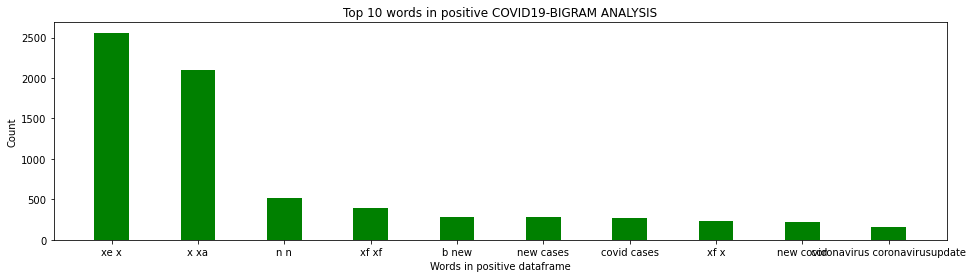

In [83]:
plt.figure(1,figsize=(16,4))

plt.bar(pd1bi,pd2bi, color ='green',width = 0.4)

plt.xlabel("Words in positive dataframe")

plt.ylabel("Count")

plt.title("Top 10 words in positive COVID19-BIGRAM ANALYSIS")

plt.savefig("positive-bigram.png")
plt.show()

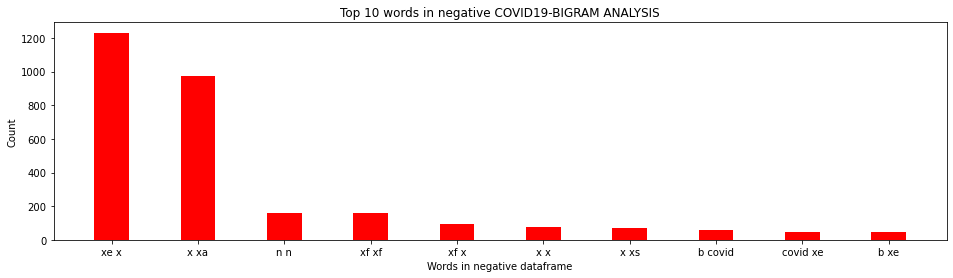

In [84]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative COVID19-BIGRAM ANALYSIS")
plt.savefig("negative-bigram.png")
plt.show()

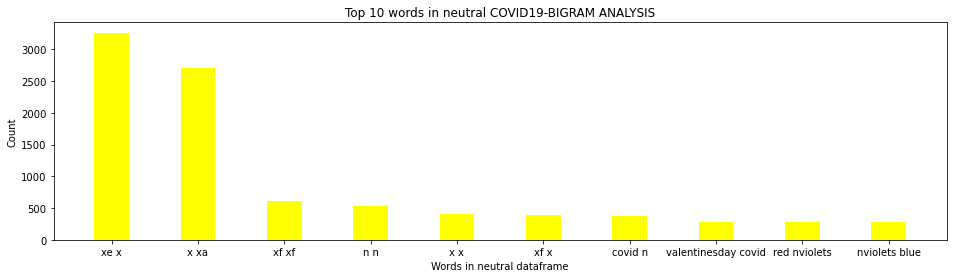

In [85]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1bi,nud2bi, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral COVID19-BIGRAM ANALYSIS")
plt.savefig("neutral-bigram.png")
plt.show()

#top 10 bigram neutral | n-grams


In [86]:
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].text:
  for word in generate_N_grams(text,3):
    positiveValues3[word]+=1

Sentence after removing stopwords: ['b', 'covid', 'gujarat', 'reported', 'new', 'cases', 'deaths', 'last', 'hours', 'active', 'cases', 'n', 'ntotal', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'cases', 'bhutan', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'realdoctormike', 'said', 'many', 'times', 'fever', 'helps', 'amp', 'xe', 'x', 'xt', 'know', 'think', 'chest', 'compressions', 'instead', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'narrative', 'collapsing', 'nlisten', 'someone', 'originally', 'fell', 'hook', 'line', 'sinker', 'n', 'told', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sue', 'keep', 'employees', 'long', 'employees', 'hostage', 'excellent', 'quote', 'anot', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rare', 'cases', 'coronavirus', 'vaccines', 'may', 'cause', 'longcovid', 'xe', 'x', 'xlike', 'symptoms']
Sentence after removing

Sentence after removing stopwords: ['b', 'still', 'know', 'enough', 'covid', 'long', 'term', 'effects', 'probably', 'many', 'years', 'thousands', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'omicron', 'less', 'severe', 'people', 'ending', 'hospital', 'dying', 'true', 'everyone', 'w', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'live', 'bihar', 'reported', 'new', 'cases', 'two', 'deaths', 'last', 'hours', 'active', 'cases', 'state', 'stand', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'numbers', 'game', 'people', 'infected', 'equals', 'people', 'hospitalised', 'mostly', 'people', 'severely', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'slovenia', 'sets', 'new', 'daily', 'record', 'covid', 'infections', 'n', 'n', 'new', 'cases', 'last', 'sunday', 'number', 'n', 'deaths']
Sentence after removing stopwords: ['b', 'vice', 'president', 'venkaiah', 'naidu', 'tests', 'covid', 'positive', 'goes', 'self', 'isolation', 'n', 'mvenkai

Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xanow', 'matter', 'many', 'covid', 'cases', 'xe', 'x', 'xa', 'team', 'wil', 'keep', 'fighting', 'last', 'moment', 'xf', 'xf', 'x', 'xaa', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xb', 'n', 'xf', 'xf', 'xa', 'xbe', 'xe', 'x', 'xd', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'rukometnisavez', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'dr', 'bonnie', 'henry', 'adriandix', 'mark', 'second', 'anniversary', 'first', 'documented', 'case', 'coronavirus', 'f', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'listen', 'bilingual', 'live', 'phone', 'programme', 'covid', 'fm', 'gold', 'channel', 'pm', 'n', 'n', 'xe', 'x', 'xa', 'ask', 'questions', 'expe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'million', 'ontarians', 'received', 'booster', 'dose', 'covid', 'vaccine', 'n', 'nmixing', 'vaccines', 'safe', 'effecti', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'g

Sentence after removing stopwords: ['b', 'think', 'xe', 'x', 'xve', 'run', 'greek', 'letters', 'xe', 'x', 'xre', 'calling', 'new', 'covid', 'variant', 'xe', 'x', 'xcstealth', 'omicon', 'xe', 'x', 'xd', 'n', 'nguess', 'one', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'kityatesmaths', 'stark', 'right', 'wondering', 'borisjohnson', 'sleeps', 'night', 'conscience', 'clearly', 'par', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'huxijingt', 'honestly', 'america', 'accept', 'number', 'deaths', 'long', 'economy', 'keeps', 'going', 'corporations', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'plan', 'safe', 'return', 'schools', 'plan', 'unsafe', 'return', 'schools', 'nsw', 'amp', 'federal', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'getting', 'booster', 'vaccine', 'best', 'way', 'protect', 'loved', 'ones', 'covid', 'n', 'ndon', 'delay', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'much', 'concern', 'covid', 'rely', 'city', 

Sentence after removing stopwords: ['b', 'xe', 'x', 'xs', 'right', 'watch', 'covid', 'disappear', 'let', 'fade', 'psychologically', 'damaged', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'vaccines', 'effective', 'modifying', 'outcome', 'infections', 'amp', 'continue', 'prevent', 'individual', 'fro', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'surgery', 'happened', 'early', 'morning', 'first', 'one', 'factor', 'covid', 'j', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'cases', 'new', 'deaths', 'cura', 'xc', 'xaao', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'large', 'protest', 'vaccine', 'passports', 'central', 'stockholm', 'capital', 'sweden', 'n', 'n', 'protest', 'stockholm', 'sweden', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'corona', 'virus', 'covid', 'nand', 'every', 'time', 'corona', 'covid', 'delta', 'omicron', 'among', 'top

Sentence after removing stopwords: ['b', 'guardiannews', 'chinese', 'people', 'like', 'killing', 'animals', 'sorts', 'creatures', 'civilized', 'society', 'touch', 'whi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bjpindia', 'respected', 'sir', 'covid', 'became', 'virulent', 'amp', 'despite', 'large', 'vaccination', 'program', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'covid', 'data', 'pm', 'est', 'coronavirus', 'covid', 'covid']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xa', 'xaflorida', 'covid', 'per', 'nyt', 'jan', 'n', 'xe', 'xf', 'xbaavg', 'daily', 'new', 'cases', 'xe', 'xac', 'x', 'xef', 'xb', 'xf', 'last', 'days', 'n', 'xe', 'xf', 'xbaavg', 'daily', 'hospitalizations', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'myanmar', 'reports', 'new', 'covid', 'cases', 'death', 'health', 'ministry', 'n', 'myanmar', 'covid']
Sentence after removing stopwords: ['b', 'singlepayersunday', 'residential', 'households', 'u', 'order',

Sentence after removing stopwords: ['b', 'pregnant', 'wait', 'giving', 'birth', 'get', 'covid', 'vaccination', 'xf', 'xf', 'xa', 'xb', 'n', 'nthe', 'vaccine', 'best', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'analysthex', 'sirhgrey', 'forty', 'years', 'ago', 'could', 'started', 'sensible', 'honest', 'amp', 'grown', 'debate', 'global', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'north', 'south', 'cities', 'municipalities', 'schools', 'interested', 'register', 'either', 'active', 'partners', 'int', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'beijing', 'unveils', 'new', 'covid', 'measures', 'ahead', 'olympics', 'china']
Sentence after removing stopwords: ['b', 'pfizer', 'ceo', 'says', 'frequent', 'boosters', 'good', 'scenario', 'yearly', 'covid', 'vaccine', 'preferred', 'optio', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'another', 'new', 'cases', 'omicron', 'six', 'new', 'cases', 'delta', 'detected', 'sri', 'lanka', 'health', 

Sentence after removing stopwords: ['b', 'hit', 'link', 'new', 'vid', 'dropped', 'n', 'n', 'n', 'beauty', 'braids', 'blackhair', 'twist', 'curls', 'hair', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'quarter', 'day', 'coronavirus', 'stats', 'n', 'confirmed', 'n', 'fatalities', 'n', 'recovered', 'n', 'total', 'fatality', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'counties', 'high', 'covid', 'vaccination', 'rate', 'wisconsin', 'ngreen', 'bay', 'must', 'listening', 'n']
Sentence after removing stopwords: ['b', 'wait', 'xe', 'x', 'xt', 'fit', 'narrative', 'xf', 'xf', 'xa', 'x', 'covid', 'vaccine', 'cdc']
Sentence after removing stopwords: ['b', 'tomhunt', 'scale', 'madness', 'n', 'nworldometer', 'new', 'zealand', 'covid', 'deaths', 'n', 'nuk', 'double', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'uttarakhand', 'reports', 'new', 'cases', 'death', 'recoveries', 'today', 'active', 'cases']
Sentence after removing stopwords: ['b', 'social',

Sentence after removing stopwords: ['b', 'piersmorgan', 'xf', 'xf', 'x', 'xa', 'xf', 'xf', 'x', 'xaa', 'xf', 'xf', 'x', 'xa', 'xf', 'xf', 'x', 'xaa', 'xf', 'xf', 'x', 'xa', 'xf', 'xf', 'x', 'xaa', 'xf', 'xf', 'x', 'xa', 'xf', 'xf', 'x', 'xaa', 'xf', 'xf', 'x', 'xa', 'xf', 'xf', 'x', 'xaa', 'xf', 'xf', 'x', 'xa', 'xf', 'xf', 'x', 'xaa', 'xf', 'xf', 'x', 'xa', 'xf', 'xf', 'x', 'xaanew', 'study', 'german', 'prof', 'kuhbandner', 'shows', 'clear', 'correlation', 'vaccination', 'exc', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'living', 'last', 'days', 'nyou', 'good', 'change', 'wicked', 'ways', 'nstadoing', 'bible', 'says', 'n', 'gregabbotttx', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bjpindia', 'respected', 'sir', 'eminent', 'leaders', 'claiming', 'pretending', 'covid', 'perfectly', 'control', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'howard', 'universities', 'colleges', 'dealing', 'high', 'covid', 'case', 'counts', 'campus', 'npr']
Sentenc

Sentence after removing stopwords: ['b', 'love', 'fuck', 'trudeau', 'wannabe', 'stalin', 'n', 'covid', 'covidvariant', 'covidtesting', 'coronavirus', 'corona', 'coronapositive', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'lakhs', 'engineering', 'science', 'amp', 'humanities', 'students', 'pin', 'hopes', 'gateexam', 'many', 'family', 'memb', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ne', 'delhi', 'least', 'new', 'slots', 'available', 'amp', 'n', 'ncovishield', 'ndose', 'ndose', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'teamtoronto', 'partners', 'ready', 'kid', 'friendly', 'activities', 'incl', 'toy', 'giveaways', 'certificate', 'bravery', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'omicron', 'mild', 'comparison', 'delta', 'n', 'n', 'lack', 'compliance', 'n', 'nwhen', 'means', 'flu', 'returns', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wanting', 'check', 'natural', 'immunity', 'covid', 'labs', 'like', 'synla

Sentence after removing stopwords: ['b', 'new', 'cases', 'new', 'deaths', 'belarus', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'hong', 'kong', 'authorities', 'said', 'sunday', 'one', 'hamster', 'surrendered', 'authorities', 'pet', 'owners', 'tested', 'positive', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'cases', 'gibraltar', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'total', 'confirmed', 'covid', 'cases', 'county', 'ar', 'covid', 'insights', 'analytics', 'team', 'usafacts', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'uk', 'jan', 'n', 'xf', 'xf', 'xa', 'xa', 'deaths', 'due', 'covid', 'reported', 'across', 'uk', 'last', 'days', 'high', 'number', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'omicron', 'drives', 'us', 'deaths', 'high', 'fall', 'xe', 'x', 'xs', 'delt

Sentence after removing stopwords: ['b', 'unvaccinated', 'pregnant', 'people', 'get', 'covid', 'much', 'high', 'risk', 'complications', 'disease', 'death', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rapidly', 'spreading', 'contagion', 'far', 'north', 'quebec', 'underscores', 'coronavirus', 'sneak', 'anywher', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bills', 'include', 'covid', 'vaccination', 'requirements', 'mandates', 'vaccination', 'cards', 'natural', 'immunity', 'require', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'leaders', 'committed', 'year', 'end', 'covid', 'promises', 'never', 'saved', 'lives', 'need', 'action', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'x', 'die', 'xe', 'x', 'x', 'nwuhan', 'scientists', 'warn', 'new', 'covid', 'xe', 'x', 'xdneocov', 'xe', 'x', 'xd', 'high', 'death', 'amp', 'infection', 'rate', 'n', 'xe', 'x', 'xcsource', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new',

Sentence after removing stopwords: ['b', 'delhi', 'reports', 'new', 'covid', 'cases', 'recoveries', 'deaths', 'last', 'hours', 'n', 'nactive', 'cases', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vice', 'president', 'venkaiah', 'naidu', 'tested', 'covid', 'positive', 'today']
Sentence after removing stopwords: ['b', 'update', 'n', 'january', 'novel', 'coronavirus', 'cases', 'malta', 'n', 'total', 'cases', 'n', 'new', 'cases', 'n', 'active', 'cases', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'disclosetv', 'mikalche', 'icymi', 'eua', 'submitted', 'children', 'ages', 'using', 'traditional', 'safe', 'non', 'mrna', 'va', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'cases', 'new', 'deaths', 'canada', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'new', 'covid', 'data', 'pm', 'est', 'coronavirus', 'covid', 'covid']
Sentence after removing stopwords: ['b', 'e

Sentence after removing stopwords: ['b', 'cocktail', 'bar', 'chain', 'leads', 'formation', 'bi', 'action', 'group', 'rsagroup', 'qic', 'n', 'n']
Sentence after removing stopwords: ['b', 'india', 'reports', 'fresh', 'covid', 'cases', 'positivity', 'rate', 'drops', 'per', 'cent', 'coronavirus']
Sentence after removing stopwords: ['b', 'research', 'available', 'researchgate', 'pandemic', 'coronavirus', 'sarscov', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sinow', 'kvanvalkenburg', 'cdcgov', 'packers', 'great', 'team', 'feel', 'aaron', 'rodgers', 'ran', 'ground', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'maharashtra', 'reports', 'new', 'covid', 'cases', 'deaths', 'today', 'active', 'cases', 'state', 'rise']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xb', 'justin', 'andhra', 'pradesh', 'reports', 'new', 'covid', 'cases', 'recoveries', 'last', 'hours', 'n', 'nactive', 'cases', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 

Sentence after removing stopwords: ['b', 'new', 'ba', 'covid', 'coronavirus', 'variant', 'times', 'contagious', 'omicron', 'n', 'n', 'sarscov', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bangladesh', 'covid', 'pandemic', 'continued', 'upward', 'trend', 'sample', 'positivity', 'rate', 'touching', 'high', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'brazil', 'reports', 'record', 'high', 'cases', 'coronavirus', 'n', 'n', 'politics', 'brazil', 'brazilianpolitics', 'coronavirus', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'maharashtra', 'reports', 'new', 'coronavirus', 'cases', 'cases', 'today', 'active', 'cases', 'state', 'rise', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'leparisien', 'new', 'light', 'hope', 'awakened', 'horizon', 'world', 'emerges', 'pandemic', 'shelby', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'teachers', 'federation', 'says', 'wished', 'students', 'including', 'primary', 'school', 'wo

Sentence after removing stopwords: ['b', 'us', 'great', 'amp', 'wonderful', 'blah', 'blah', 'nwe', 'leading', 'world', 'covid', 'deaths', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'whitehouse', 'prosumersoft', 'potus', 'xf', 'xf', 'x', 'xba', 'xf', 'xf', 'x', 'xb', 'united', 'states', 'n', 'n', 'xf', 'xf', 'xa', 'x', 'free', 'n', 'n', 'xe', 'xc', 'x', 'st', 'covid', 'vaccine', 'shot', 'n', 'xe', 'xc', 'x', 'nd', 'covid', 'vaccine', 'shot', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'eighthorder', 'momhornsnhalos', 'johnnyjoey', 'dbongino', 'foxnews', 'kenpaxtontx', 'best', 'care', 'ni', 'live', 'larges', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'delhi', 'reports', 'new', 'covid', 'cases', 'recoveries', 'deaths', 'last', 'hours', 'n', 'nactive', 'cases', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tamilnadu', 'logs', 'new', 'covid', 'cases', 'amp', 'deaths', 'today', 'active', 'case', 'tally', 'n', 'corona', 'coronavirus', '

Sentence after removing stopwords: ['b', 'telangana', 'logs', 'new', 'covid', 'infections', 'fatality', 'sunday', 'n']
Sentence after removing stopwords: ['b', 'scotland', 'n', 'ncoronavirus', 'covid', 'daily', 'data', 'scotland', 'january', 'n', 'n', 'new', 'reported', 'death', 'people', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'losing', 'sense', 'taste', 'smell', 'bizarre', 'thing', 'covid']
Sentence after removing stopwords: ['b', 'thought', 'n', 'nhaving', 'consistent', 'relaxing', 'bedtime', 'routine', 'involve', 'alcohol', 'increases', 'chance', 'g', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'alaska', 'seafood', 'industry', 'reporeflects', 'covid', 'impact', 'state', 'fishing', 'economy', 'n']
Sentence after removing stopwords: ['b', 'absolutely', 'relevant', 'quarantine', 'covid', 'isolation']
Sentence after removing stopwords: ['b', 'voting', 'rights', 'american', 'citizens', 'safe', 'n', 'democrats', 'want', 'take', 'power', 'away', 'xe'

Sentence after removing stopwords: ['b', 'zoledini', 'pandemic', 'changed', 'us', 'lot', 'let', 'create', 'new', 'story', 'n', 'elonmusk', 'n', 'joerogan', 'n', 'snoopdogg', 'n', 'n', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'today', 'people', 'tested', 'positive', 'coronavirus', 'n', 'n', 'people', 'hospital', 'yesterday', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'positive', 'cases', 'reported', 'today', 'govt', 'info', 'dept', 'n', 'n', 'lka', 'srilanka', 'covidsl', 'covidlk', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bobcatbob', 'dancrenshawtx', 'argue', 'right', 'choose', 'respect', 'women', 'health', 'issues', 'however', 'advoca', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'apparently', 'covid', 'favorite', 'number', 'xf', 'xf', 'xa', 'x', 'coronavirus', 'coronavirusupdates', 'coronaupdate', 'vaccinemandate', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'anna', 'mae',

Sentence after removing stopwords: ['b', 'wtaf', 'fresh', 'new', 'hell', 'covid', 'send', 'kids', 'school', 'sounds', 'like', 'logistical', 'night', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'india', 'logged', 'new', 'covid', 'cases', 'deaths', 'n', 'n', 'coronavirus', 'coronaupdates', 'n', 'n']
Sentence after removing stopwords: ['b', 'rajasthan', 'covid', 'update', 'total', 'positive', 'amp', 'deaths', 'n', 'n', 'jaipur', 'n', 'jodhpur', 'n', 'udaipur', 'n', 'kota', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'cases', 'new', 'deaths', 'brazil', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'new', 'joinpoint', 'regression', 'determine', 'impact', 'covid', 'mortality', 'europe', 'longitudinal', 'analysis', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'far', 'winner', 'pandemic', 'virus', 'hanoverschools', 'vote', 'tomorrow', 'continuing', 'mask', 'xe', 'x', 

Sentence after removing stopwords: ['b', 'spectator', 'frasernelson', 'simmons', 'great', 'article', 'analysis', 'scientists', 'modellers', 'fallible', 'also', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wuhan', 'scientists', 'warn', 'new', 'coronavirus', 'neocov', 'high', 'death', 'infection', 'rate', 'n', 'neocov', 'wear', 'mask', 'safe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'cases', 'new', 'deaths', 'argentina', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'new', 'podcast', 'drlabos', 'amp', 'interview', 'olivierdrouinmd', 'paediatrician', 'amp', 'researcher', 'covid', 'covidvaccines', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'coronavid', 'coronalockdown', 'u', 'come', 'across', 'large', 'cacophony', 'amp', 'large', 'silence', 'world', 'well', 'thats', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'thanks', 'marching', 'today', 'not

Sentence after removing stopwords: ['b', 'attn', 'americans', 'living', 'disabilities', 'amp', 'chronicillness', 'loved', 'ones', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'ximportant', 'pwd', 'video', 'dialogue', 'ab', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wishing', 'slaveplaybway', 'family', 'happy', 'closing', 'performance', 'today', 'wish', 'could', 'n', 'n', 'broadway', 'covid', 'isolation']
Sentence after removing stopwords: ['b', 'launched', 'covid', 'live', 'reporting', 'bot', 'discord', 'n', 'nit', 'fun', 'project', 'works', 'well', 'according', 'us', 'ninvite', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'chandigarh', 'records', 'new', 'covid', 'cases', 'per', 'cent', 'positivity', 'rate', 'n']
Sentence after removing stopwords: ['b', 'isglobaljobs', 'xf', 'xf', 'xa', 'xd', 'general', 'technical', 'coordinator', 'ecoproject', 'n', 'nthis', 'unitaid', 'funded', 'project', 'aims', 'helping', 'adv', 'xe', 'x', 'xa']
Sentence after removing stopwor

Sentence after removing stopwords: ['b', 'pandemic', 'nplease', 'get', 'vaccinated', 'nwear', 'mask', 'ndon', 'xe', 'x', 'xt', 'spread', 'misinformation', 'nprotect', 'high', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'saturday', 'home', 'good', 'saturday', 'ncovid', 'amp', 'quarantine', 'sucks', 'n', 'n', 'covid', 'coronavirus', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'entertaining', 'see', 'antifa', 'go', 'airborne', 'hit', 'water', 'hoses', 'wish', 'would', 'use', 'often', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'abhishekaitc', 'respected', 'sir', 'one', 'secular', 'state', 'made', 'brilliant', 'invention', 'co', 'morbidities', 'non', 'celebs', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'covid', 'data', 'pm', 'est', 'coronavirus', 'covid', 'covid']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xt', 'delay', 'getting', 'covid', 'vaccinations', 'multiple', 'sites', 'across', 'oldham', 'ready', 'waiting', '

Sentence after removing stopwords: ['b', 'dr', 'apj', 'abdul', 'kalam', 'technical', 'university', 'aktulucknow', 'postpone', 'first', 'second', 'year', 'semester', 'exams', 'march', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'breakingnews', 'clashes', 'erupt', 'near', 'european', 'institutions', 'brussels', 'protests', 'health', 'passes', 'lockdown', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'leaders', 'test', 'positive', 'situations', 'nthen', 'teens', 'nif', 'online', 'meeting', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'hot', 'spots', 'us', 'n', 'nit', 'whole', 'fvcking', 'country', 'n', 'n', 'covid']
Sentence after removing stopwords: ['b', 'contacts', 'tracking', 'important', 'paof', 'fight', 'covid', 'might', 'trust', 'government', 'services', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'cases', 'new', 'deaths', 'india', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic'

Sentence after removing stopwords: ['b', 'breaking', 'pune', 'schools', 'colleges', 'reopened', 'st', 'february', 'despite', 'arrival', 'coronavirus', 'new', 'varian', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rtveplay', 'new', 'light', 'hope', 'awakened', 'horizon', 'world', 'emerges', 'pandemic', 'shelby', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'cases', 'new', 'deaths', 'paraguay', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'wonderful', 'colleague', 'dr', 'yolanda', 'brooks', 'making', 'world', 'little', 'safe', 'covid', 'blackinmicro', 'womeninstem', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'poemsjustyou', 'thanks', 'ray', 'screenplay', 'aneveningwithnevilleheath', 'penned', 'prison', 'without', 'internet', 'libra', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'cases', 'new', 'death', 'sao', 'tome', 'principe', 'n', 'n', '

Sentence after removing stopwords: ['b', 'poll', 'xf', 'xf', 'x', 'xa', 'oridoninnovations', 'xf', 'xf', 'xa', 'xba', 'n', 'nwho', 'top', 'covid', 'doctor', 'xf', 'xf', 'xc', 'xe', 'n', 'n', 'xf', 'xf', 'xa', 'xin', 'medicine', 'scientific', 'advancement', 'duri', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'think', 'need', 'health', 'insurance', 'n', 'n', 'saturdaythoughts', 'poll', 'vital', 'budgetsession', 'healthinsurance', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'shirokazesan', 'happy', 'endorse', 'generalstrike', 'address', 'income', 'inequality', 'climateemergency', 'cause', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ireland', 'ireland', 'covid', 'data', 'hub', 'n', 'nireland', 'reported', 'new', 'confirmed', 'cases', 'coronavirus', 'covid', 'nda', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'little', 'days', 'getting', 'covid', 'back', 'couat', 'full', 'speed', 'thank', 'dr', 'peter', 'mccullough', 'xe', 'x', 'xa']
S

Sentence after removing stopwords: ['b', 'two', 'tier', 'system', 'cvspharmacy', 'cancelling', 'people', 'xe', 'x', 'xs', 'vaccines', 'xe', 'x', 'xt', 'insurance', 'really', 'yet', 'preten', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'total', 'people', 'tested', 'positive', 'virus', 'parliament', 'house', 'complex', 'far', 'people', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'chickengate', 'new', 'beginning', 'saturday', 'january', 'dhs', 'require', 'non', 'u', 'individuals', 'xe', 'x', 'xafseeking', 'enter', 'u', 'v', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'afp', 'china', 'mission', 'accomplished', 'n', 'nfunds', 'transfered', 'covid']
Sentence after removing stopwords: ['b', 'good', 'luck', 'going', 'need', 'lies', 'coronavirus', 'nwo', 'hoax', 'covid', 'lockdown', 'plandemic']
Sentence after removing stopwords: ['b', 'almost', 'made', 'end', 'tested', 'positive', 'covid', 'xe', 'x', 'xb']
Sentence after removing stopwords: ['

Sentence after removing stopwords: ['b', 'countries', 'new', 'coronavirus', 'cases', 'jan', 'pm', 'et', 'n', 'ntop', 'n', 'n', 'usa', 'n', 'france', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xb', 'justin', 'maharashtra', 'reports', 'new', 'covid', 'cases', 'deaths', 'today', 'active', 'cases', 'state', 'rise', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'n', 'nloctite', 'super', 'glue', 'gel', 'control', 'clear', 'fl', 'oz', 'bottle', 'n', 'n', 'dogecoin', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'distribution', 'total', 'confirmed', 'cases', 'state', 'using', 'county', 'data', 'covid', 'insights', 'analytics', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'country', 'facing', 'peak', 'covid', 'rd', 'wave', 'iitkgp', 'eduminofindia', 'dpradhanbjp', 'genuine', 'demand', 'postp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'buzzfeed', 'normal', 'coronavirus', 'vax', 'opinions', 'compared', 'ev

Sentence after removing stopwords: ['b', 'folks', 'think', 'live', 'covid', 'longcovid', 'n', 'nthe', 'idea', 'death', 'rate', 'low', 'misses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'althiaraj', 'public', 'service', 'controlled', 'super', 'centralized', 'telford', 'pmo', 'know', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'odisha', 'records', 'low', 'daily', 'caseload', 'th', 'day', 'wait', 'watch', 'says', 'top', 'health', 'official', 'n', 'n', 'covid', 'odisha', 'n']
Sentence after removing stopwords: ['b', 'may', 'interesting', 'xe', 'x', 'xs', 'complete', 'sounds', 'like', 'damage', 'alveolar', 'pulmonary', 'capillaries', 'way', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tracking', 'covid', 'good', 'news', 'headed', 'weekend', 'numbers', 'decline', 'clark', 'county', 'case', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'joelycett', 'tamsinomond', 'nadinedorries', 'people', 'complied', 'rules', 'thought', 'right', 'thing

Sentence after removing stopwords: ['b', 'vice', 'president', 'india', 'venkaiah', 'naidu', 'tested', 'positive', 'covid', 'n', 'n']
Sentence after removing stopwords: ['b', 'contrary', 'popular', 'myth', 'coronavirus', 'guaranteed', 'transform', 'mild', 'form', 'time', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'today', 'celebrate', 'week', 'covid', 'negativity', 'two', 'positive', 'still', 'n', 'climb', 'stair', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'episode', 'link', 'bio', 'nwhat', 'illnesses', 'let', 'us', 'know', 'n', 'itslive', 'livefromthebeachbungalow', 'illness', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sat', 'jan', 'xe', 'x', 'x', 'patients', 'covid', 'coachellavalley', 'hospitals', 'fri', 'n', 'n', 'confirmed', 'n', 'suspected', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xs', 'deal', 'covid', 'rat', 'primary', 'school', 'kids', 'n', 'nfirst', 'weeks', 'xe', 'x', 'xre', 'tested', 'twice', 

Sentence after removing stopwords: ['b', 'speaker', 'mahinda', 'yapa', 'abeywardena', 'tested', 'positive', 'coronavirus', 'read', 'full', 'story', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'poeticcranes', 'n', 'nwhen', 'head', 'nof', 'large', 'hadron', 'collider', 'ni', 'xe', 'x', 'xll', 'dreams', 'nof', 'universe', 'nwhen', 'ha', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'day', 'hubby', 'positive', 'omicron', 'going', 'rough', 'week', 'please', 'get', 'vaccinated', 'please', 'take', 'seriou', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'aroundgreece', 'new', 'light', 'hope', 'awakened', 'horizon', 'world', 'emerges', 'pandemic', 'shelby', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'joni', 'mitchell', 'wants', 'songs', 'spotify', 'covid', 'row', 'beritaterkini', 'internationalnews', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'icymi', 'eua', 'submitted', 'children', 'ages', 'using', 'traditional', 'safe', 'non'

Sentence after removing stopwords: ['b', 'sebastien', 'poitevin', 'get', 'xe', 'x', 'xac', 'best', 'music', 'sheet', 'sebastienpoitevin', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'todayincovid', 'pmpmagtoday', 'n', 'nsummary', 'covid', 'situation', 'uk', 'jan', 'n', 'xe', 'x', 'xaa', 'new', 'first', 'infections', 'h', 'xf', 'xf', 'xa', 'xa', 'n', 'xe', 'x', 'xaa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'article', 'could', 'mild', 'covid', 'symptoms', 'lead', 'brain', 'damage', 'n']
Sentence after removing stopwords: ['b', 'major', 'activities', 'nicmeity', 'himachalpradesh', 'covid', 'pandemic', 'n', 'n', 'cmofficehp', 'nhmhp', 'ddnewshimachal', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nstworld', 'russia', 'reported', 'new', 'daily', 'high', 'covid', 'cases', 'sunday', 'breaking', 'national', 'record', 'third', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'first', 'reported', 'case', 'post', 'covid

Sentence after removing stopwords: ['b', 'amazing', 'people', 'want', 'hear', 'truth', 'covid', 'contracted', 'spread', 'exactly', 'wheth', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'young', 'covid', 'xf', 'xf', 'x', 'x']
Sentence after removing stopwords: ['b', 'offer', 'professional', 'care', 'comfoof', 'home', 'visit', 'call', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'another', 'covid', 'related', 'deaths', 'january', 'confirmed', 'dg', 'health', 'services', 'increasing', 'total', 'number', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'cases', 'new', 'deaths', 'uganda', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'new', 'covid', 'variant', 'xe', 'x', 'xcomnicron', 'xe', 'x', 'xd', 'discovered', 'south', 'africa', 'njavid', 'said', 'adding', 'variant', 'identified', 'south', 'africa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'breaking

Sentence after removing stopwords: ['b', 'logic', 'us', 'patent', 'pending', 'proves', 'matter', 'coronavirus', 'variant', 'comes', 'architecture', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'first', 'people', 'walked', 'vaxthenorthwest', 'toronto', 'xe', 'x', 'xs', 'northwest', 'come', 'get', 'covid', 'vaccines', 'today', 'wal', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'cases', 'governor', 'said', 'new', 'cases', 'n', 'nwe', 'new', 'infections', 'deaths', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'year', 'old', 'girl', 'named', 'vanessa', 'martins', 'figueiredo', 'died', 'following', 'paralyzed', 'severe', 'effects', 'fr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'total', 'people', 'tested', 'positive', 'virus', 'parliament', 'house', 'complex', 'far', 'people', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bjpbengal', 'respected', 'sir', 'goi', 'bjp', 'busy', 'winning', 'state', 'assembly', 

Sentence after removing stopwords: ['b', 'nothing', 'worry', 'neocov', 'nneocov', 'coronavirus', 'variant', 'everything', 'know', 'far', 'n', 'neocov', 'coronavirus', 'mers', 'sars', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'important', 'thread', 'nhs', 'covid', 'vaccinemandate', 'respected', 'comments', 'also', 'show', 'depth', 'fe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'coronavirus', 'omicron', 'india', 'live', 'updates', 'india', 'reports', 'lakh', 'new', 'covid', 'cases', 'deaths', 'coronavirus', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'complete', 'thought', 'given', 'school', 'reopening', 'decision', 'says', 'maharashtra', 'minister', 'n', 'n', 'covid', 'maharashtra', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'much', 'want', 'septum', 'pierced', 'grateful', 'nose', 'piercings', 'xe', 'x', 'xve', 'gone', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'talkradio', 'ticerichard', 'thatsm

Sentence after removing stopwords: ['b', 'new', 'cases', 'new', 'deaths', 'cuba', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'paxlovid', 'molnupiravir', 'antiviral', 'pills', 'covid', 'taken', 'early', 'help', 'prevent', 'severe', 'disease', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'deepa', 'chowdhury', 'best', 'food', 'diabetes', 'patients', 'shorts', 'health', 'covid', 'trending', 'deepa', 'chowdhury']
Sentence after removing stopwords: ['b', 'surge', 'diamond', 'demand', 'began', 'early', 'covid', 'lockdowns', 'showing', 'sign', 'easing', 'even', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'breaking', 'hawaii', 'records', 'new', 'coronavirus', 'related', 'deaths', 'additional', 'infections', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'protect', 'amp', 'loved', 'ones', 'coronavirus', 'n', 'n', 'covid', 'covid', 'coronavirus', 'stayhomestaysafe', 'x

Sentence after removing stopwords: ['b', 'india', 'reports', 'new', 'covid', 'cases', 'deaths', 'recoveries', 'last', 'hours', 'n', 'nactive', 'case', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bariweiss', 'hits', 'exact', 'feelings', 'us', 'regarding', 'ongoing', 'pandemic', 'lack', 'respon', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'covid', 'data', 'pm', 'est', 'coronavirus', 'covid', 'covid']
Sentence after removing stopwords: ['b', 'tests', 'crucial', 'controlling', 'covid', 'pandemic', 'test', 'result', 'interpretation', 'also', 'important', 'example', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'anyone', 'notice', 'half', 'population', 'thinks', 'research', 'right', 'wing', 'conspiracy', 'theory', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'amazing', 'fast', 'kids', 'brasil', 'learn', 'made', 'pacman', 'game', 'fight', 'covid', 'three', 'weeks', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'large', 

Sentence after removing stopwords: ['b', 'covid', 'illustrated', 'copyright', 'acts', 'barrier', 'accessing', 'educational', 'materials', 'amp', 'demonstrated', 'vul', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'sparks', 'education', 'crisis', 'pupils', 'starting', 'high', 'school', 'reading', 'age', 'six']
Sentence after removing stopwords: ['b', 'delhi', 'covid', 'cases', 'k', 'first', 'time', 'since', 'third', 'wave', 'outbreak', 'n', 'n', 'delhi', 'coronavirus', 'covid', 'corona', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'growing', 'tensions', 'near', 'ukrainian', 'xf', 'xf', 'x', 'xba', 'xf', 'xf', 'x', 'xa', 'border', 'modern', 'arms', 'race', 'yemen', 'xf', 'xf', 'x', 'xbe', 'xf', 'xf', 'x', 'xaa', 'airstrikes', 'relentless', 'omicron', 'st', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'concerns', 'w', 'xe', 'x', 'xa', 'samharrisorg', 'xe', 'x', 'xa', 'years', 'good', 'conversation', 'n', 'n', 'cdnpoli', 'n', 'covid

Sentence after removing stopwords: ['b', 'covid', 'yesterday', 'stay', 'trendy', 'get', 'climate', 'change', 'xe', 'xa', 'xa', 'xef', 'xb', 'xf', 'xf', 'xf', 'xa', 'xac', 'emphysema', 'xf', 'xf', 'xa', 'xadno', 'oda', 'oxygen', 'deficient', 'ai', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'editorji', 'mvenkaiahnaidu', 'vpsecretariat', 'vice', 'president', 'venkaiahnaidu', 'tests', 'covid', 'positive', 'isolated']
Sentence after removing stopwords: ['b', 'important', 'news', 'zoe', 'app', 'cases', 'increasing', 'last', 'two', 'weeks', 'bbcnews', 'covid', 'coronavirus', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'trader', 'joes', 'natural', 'assorted', 'flavors', 'gt', 'food', 'stayathome', 'stayhome', 'treats', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'gujarat', 'hours', 'ending', 'pm', 'sunday', 'added', 'new', 'positive', 'cases', 'taking', 'total', 'lak', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'even', 'governm

Sentence after removing stopwords: ['b', 'want', 'science', 'know', 'right', 'dissolve', 'damn', 'omicron', 'microclots', 'veins', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'warned', 'responsible', 'number', 'people', 'infected', 'coronavirus', 'seeing', 'steady', 'rise', 'n', 'srilanka', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'great', 'piece', 'omalahillary', 'statnews', 'importance', 'community', 'engagement', 'health', 'workers', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'beijing', 'city', 'government', 'sunday', 'introduced', 'new', 'measures', 'contain', 'recent', 'outbreak', 'covid', 'china', 'capit', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'cases', 'new', 'deaths', 'belgium', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'fresh', 'covid', 'cases', 'j', 'amp', 'k', 'n', 'covid', 'coronavirus', 'corona', 'love

Sentence after removing stopwords: ['b', 'days', 'significant', 'number', 'people', 'infected', 'coronavirus', 'received', 'double', 'dose', 'vac', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'repandybiggsaz', 'huh', 'nhow', 'natural', 'immunity', 'fight', 'covid', 'catch', 'covid', 'acquire', 'n', 'nand', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'massachusetts', 'covid', 'cases', 'hospitalized', 'virus', 'test', 'positive', 'getting', 'treatment', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'egypt', 'xe', 'x', 'xs', 'health', 'ministry', 'coronavirus', 'new', 'cases', 'covid', 'fatalities', 'fully', 'recove', 'via', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'indiafightscorona', 'rajasthan', 'nrd', 'jan', 'covid', 'pm', 'bulletin', 'n', 'nplz', 'keep', 'maskup', 'xf', 'xf', 'x', 'xb', 'amp', 'staysafe', 'n', 'n', 'positive', 'case', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'newzealand', 'pmardern', '

Sentence after removing stopwords: ['b', 'january', 'critical', 'care', 'services', 'ontario', 'reporting', 'adult', 'covid', 'related', 'critical', 'illness', 'crci', 'patients', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'india', 'reports', 'new', 'covid', 'cases', 'nactive', 'case', 'ndaily', 'positivity', 'rate', 'n', 'nso', 'possi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'cases', 'eritrea', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'dr', 'apj', 'abdul', 'kalam', 'technical', 'university', 'aktulucknow', 'postpone', 'first', 'second', 'year', 'semester', 'exams', 'march', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get', 'tested', 'last', 'week', 'exposed', 'twice', 'waiting', 'saw', 'thought', 'funny', 'poo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'exacerbated', 'dire', 'need', 'social', 'emotional', 'supports', 'sc

Sentence after removing stopwords: ['b', 'covid', 'attentiondeficit', 'memory', 'oxford', 'study', 'detects', 'cognitive', 'deficits', 'months', 'mild', 'covid']
Sentence after removing stopwords: ['b', 'evolving', 'situation', 'new', 'variants', 'concern', 'xe', 'x', 'xll', 'continue', 'post', 'covid', 'updates', 'website', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'novel', 'xe', 'x', 'xcprime', 'spike', 'xe', 'x', 'xd', 'vaccine', 'strategy', 'leverages', 'existing', 'immunity', 'generated', 'primary', 'covid', 'vaccination', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sneakpeek', 'tomorrows', 'launch', 'n', 'nmint', 'special', 'moment', 'history', 'n', 'nwhere', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rarely', 'like', 'get', 'political', 'xe', 'x', 'xt', 'believe', 'xe', 'x', 'xceducated', 'xe', 'x', 'xd', 'people', 'still', 'think', 'u', 'get', 'vaccinated', 'u', 'xe', 'x', 'xt', 'g', 'xe', 'x', 'xa']
Sentence after removing stopwor

Sentence after removing stopwords: ['b', 'public', 'health', 'officials', 'recommending', 'people', 'upgrade', 'cloth', 'masks', 'high', 'quality', 'medical', 'grad', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'clean', 'safe', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'cleaningquotes', 'quotes', 'cleaningservice', 'home', 'cleaningservices', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'secretary', 'food', 'amp', 'health', 'prof', 'sophiachan', 'urges', 'citizens', 'observe', 'social', 'distancing', 'view', 'fighting', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'adherence', 'covid', 'preventive', 'measures', 'amp', 'associated', 'factors', 'n', 'n', 'xe', 'xe', 'xa', 'xef', 'xb', 'xfwhat', 'kind', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wanted', 'create', 'perfect', 'conditions', 'prolonged', 'post', 'viral', 'fatigue', 'would', 'n', 'n', 'tell', 'patients', 'repeatedly', 'xe', 'x', 'xa']
Sentence after removing stopwords:

Sentence after removing stopwords: ['b', 'covidupdate', 'arunachal', 'pradesh', 'registers', 'new', 'cases', 'tally', 'pushed', 'n', 'n', 'northeasttoday', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'looks', 'like', 'yet', 'another', 'aspect', 'covid', 'reported', 'canceled', 'misinformation', 'turned', 'true']
Sentence after removing stopwords: ['b', 'happening', 'right', 'c', 'doctors', 'coming', 'together', 'tell', 'truth', 'mandates', 'vaccine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'cases', 'sierra', 'leone', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'glad', 'shit', 'xe', 'x', 'xt', 'put', 'hospital', 'xe', 'x', 'xabut', 'shit', 'still', 'ass', 'covid']
Sentence after removing stopwords: ['b', 'cool', 'xf', 'xf', 'x', 'xe', 'v', 'chinook', 'attack', 'helicopter', 'rafluton', 'patrol', 'central', 'london', 'enforcing', 'compulsory', 'fac', 'xe', 'x', 'xa']
S

Sentence after removing stopwords: ['b', 'pregnant', 'new', 'zealand', 'journalist', 'says', 'turned', 'taliban', 'help', 'stranded', 'afghanistan', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'updated', 'online', 'fund', 'raising', 'campaign', 'rolling', 'truck', 'blockades', 'protest', 'vaccine', 'mandates', 'linked', 'right', 'wing', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'maryland', 'covid', 'vaccinations', 'continue', 'rise', 'slowed', 'rate', 'high', 'rates', 'age', 'g', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'offer', 'covid', 'vaccination', 'always', 'available', 'anyone', 'come', 'forward', 'yet', 'n', 'nit', 'never', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'uk', 'n', 'non', 'january', 'new', 'cases', 'deaths', 'days', 'positive', 'test', 'reported', 'uk', 'n', 'nour', 'data', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'whole', 'thread', 'xf', 'xf', 'xe', 'xaf', 'n', 'covid', 'covid', 'omicron'

Sentence after removing stopwords: ['b', 'era', 'remote', 'learning', 'must', 'end', 'xe', 'x', 'x', 'children', 'sacrificed', 'much', 'covid']
Sentence after removing stopwords: ['b', 'daily', 'count', 'new', 'coronavirus', 'cases', 'japan', 'stood', 'friday', 'exceeding', 'first', 'time', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'challenge', 'facing', 'companies', 'paid', 'big', 'olympics', 'fascinating', 'promote', 'games', 'r', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xs', 'uk', 'data', 'showing', 'high', 'hospitalizations', 'covid', 'kids', 'xe', 'x', 'xa', 'see', 'across', 'world', 'utah', 'fo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'omicron', 'mild', 'n', 'nthis', 'huge', 'overreaction', 'n', 'n', 'covid', 'newzealand']
Sentence after removing stopwords: ['b', 'mcteagle', 'last', 'thing', 'kary', 'mullis', 'noble', 'prize', 'biochemist', 'inventor', 'pcr', 'tests', 'used', 'today', 'years', 'xe', 'x', 'xa']
Senten

Sentence after removing stopwords: ['b', 'jpmajor', 'hopemarsmission', 'best', 'paof', 'living', 'mars', 'chance', 'xe', 'x', 'xs', 'catching', 'covid', 'zero', 'xf', 'xf', 'x', 'xbd', 'xf', 'xf', 'xa', 'xa']
Sentence after removing stopwords: ['b', 'new', 'cases', 'sierra', 'leone', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'first', 'things', 'first', 'n', 'n', 'covid', 'gesundheitsminister', 'lauterbach']
Sentence after removing stopwords: ['b', 'kind', 'xe', 'x', 'xccommunity', 'standards', 'xe', 'x', 'xd', 'allows', 'porn', 'prostitution', 'pedos', 'xe', 'x', 'xabut', 'bans', 'people', 'suppotrump', 'que', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'francetv', 'new', 'light', 'hope', 'awakened', 'horizon', 'world', 'emerges', 'pandemic', 'shelby', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'total', 'confirmed', 'covid', 'cases', 'county', 'hi', 'covid', 'insights', 'ana

Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xa', 'xf', 'xf', 'x', 'xahighlight', 'video', 'xf', 'xf', 'x', 'xa', 'xf', 'xf', 'x', 'xa', 'n', 'nplease', 'enjoy', 'footage', 'streams', 'yesterday', 'londonprotest', 'n', 'ni', 'covered', 'entire', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'want', 'obsess', 'something', 'stayinghealthy', 'olympians', 'best', 'xe', 'x', 'x', 'covid', 'challenge', 'xe', 'x', 'xceveryone', 'te', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'remember', 'early', 'tested', 'showed', 'people', 'vaccine', 'aids', 'well', 'guess', 'xe', 'x', 'xa', 'covid', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'impact', 'covid', 'drowning', 'patterns', 'great', 'lakes', 'region', 'north', 'america', 'n', 'n', 'n', 'n', 'sarscovtimeline', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'leadership', 'new', 'zealand', 'xe', 'x', 'xs', 'prime', 'minister', 'cancels', 'wedding', 'amid', 'omicron', 'wave'

Sentence after removing stopwords: ['b', 'fringe', 'group', 'canadians', 'appearing', 'every', 'major', 'city', 'across', 'nation', 'xf', 'xf', 'xa', 'x', 'n', 'n', 'probably', 'coincidence', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'lessonslitery', 'breitbartnews', 'adamschiff', 'global', 'warming', 'xe', 'x', 'xt', 'see', 'thru', 'bs', 'made', 'rich', 'rich', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'agentp', 'nicolasturgeon', 'maryrh', 'nickowentv', 'beccywoodtv', 'bbchughpym', 'nthe', 'ukgov', 'ons', 'reveal', 'via', 'new', 'foi', 'reque', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'absolutely', 'brilliant', 'commentary', 'currently', 'coercive', 'discriminatory', 'covid', 'measures', 'stopvaccinemandates']
Sentence after removing stopwords: ['b', 'good', 'read', 'unless', 'open', 'new', 'information', 'vaccinemandate', 'covid', 'n', 'n']
Sentence after removing stopwords: ['b', 'sweet', 'husband', 'owns', 'record', 'store', 'works',

Sentence after removing stopwords: ['b', 'n', 'nsamsung', 'cu', 'ft', 'extra', 'large', 'capacity', 'smatop', 'load', 'washer', 'super', 'speed', 'wash', 'ivory', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'total', 'confirmed', 'covid', 'cases', 'county', 'ar', 'covid', 'insights', 'analytics', 'team', 'usafacts', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'u', 'test', 'positive', 'covid', 'testing', 'presumptive', 'positive', 'days', 'ago', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'xa', 'xaa', 'nocomment', 'people', 'plz', 'safe']
Sentence after removing stopwords: ['b', 'chinese', 'researchers', 'found', 'new', 'kind', 'coronavirus', 'neocov', 'na', 'team', 'wuhan', 'researchers', 'found', 'xc', 'xanew', 'kind', 'coron', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vice', 'president', 'venkaiah', 'naidu', 'tested', 'covid', 'positive', 'today']
Sentence after removing stopwords: ['b', 'sotexkenton', 'national', 'figure', 'know', 'true', 'much', 'm

Sentence after removing stopwords: ['b', 'newly', 'reported', 'indiana', 'coronavirus', 'deaths', 'last', 'two', 'days', 'six', 'going', 'back', 'death', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'cases', 'new', 'deaths', 'iraq', 'n', 'n', 'gmt', 'coronavirus', 'coronavirusupdate', 'covid', 'coronaviruspandemic']
Sentence after removing stopwords: ['b', 'covidindia', 'omicron', 'live', 'updates', 'xf', 'xf', 'x', 'xb', 'country', 'added', 'xc', 'xa', 'lakh', 'new', 'covid', 'infections', 'deaths', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'dashboard', 'updated', 'n', 'non', 'january', 'new', 'cases', 'deaths', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vpsecretariat', 'vice', 'president', 'venkaiah', 'naidu', 'tested', 'covid', 'positive', 'today', 'n', 'nget', 'well', 'soon', 'sir']
Sentence after removing stopwords: ['b', 'vice', 'president', 'venkaiah', 'naidu', 'tests', 'positive', 'covid', 'hyderabad', 'vicepres

In [87]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].text:
  for word in generate_N_grams(text,3):
    negativeValues3[word]+=1

Sentence after removing stopwords: ['b', 'covid', 'pandemic', 'difficult', 'amp', 'important', 'prioritize', 'wellbeing', 'tips', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wrong', 'people', 'nz', 'oz', 'never', 'appealing', 'jesus', 'chance', 'going', 'god', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nostalgia', 'every', 'glass', 'mailonsunday', 'thinking', 'back', 'past', 'fruit', 'phenol', 'quantification', 'experiments', 'n', 'nmore', 'excuse', 'f', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'neocov', 'variant', 'dangerous', 'coronavirus', 'variant', 'nresearchers', 'wuhan', 'university', 'publis', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'beijing', 'tests', 'million', 'coronavirus', 'winter', 'olympics', 'loom', 'late', 'covid', 'updates', 'n', 'n', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xba', 'russia', 'breaks', 'case', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cloth', 'face', 'masks', 'useless', '

Sentence after removing stopwords: ['b', 'mophqatar', 'announced', 'late', 'covid', 'figures', 'qatar', 'check', 'xf', 'xf', 'x', 'x', 'n', 'iloveqatar', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'little', 'americans', 'get', 'protection', 'covid', 'scottgottliebmd', 'gives', 'us', 'late', 'time', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'latvia', 'prolongs', 'entry', 'rules', 'eu', 'schengen', 'countries', 'due', 'covid', 'n', 'n', 'latvia', 'travel', 'schengen', 'eu', 'covid']
Sentence after removing stopwords: ['b', 'americans', 'relying', 'heavily', 'consumer', 'healthcare', 'products', 'meet', 'families', 'xe', 'x', 'x', 'health', 'needs', 'n', 'nfind', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'homebargains', 'pay', 'staff', 'covid', 'covid', 'unfair', 'bbcnews', 'skynews']
Sentence after removing stopwords: ['b', 'neocov', 'worrisome', 'issue', 'bad', 'coronavirus', 'read', 'opinion', 'experts', 'n', 'coronavirus', 'neocov', 'mers

Sentence after removing stopwords: ['b', 'vusisambo', 'state', 'disaster', 'ended', 'long', 'time', 'ago', 'even', 'britons', 'xe', 'x', 'xccopied', 'amp', 'pasted', 'xe', 'x', 'xd', 'nwe', 'saw', 'covid', 'scam', 'fro', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'vaccines', 'propaganda', 'n', 'nhorowitz', 'concerning', 'data', 'scotland']
Sentence after removing stopwords: ['b', 'alternative', 'update', 'covid', 'negative', 'efficacy', 'footballer', 'cardiovascular', 'deaths', 'doubling', 'ev', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'beingjwood', 'xf', 'xf', 'x', 'xdyep', 'pfizer', 'vaccinated', 'late', 'feb', 'early', 'march', 'boosted', 'sept', 'wearamask', 'n', 'practice', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'really', 'shows', 'corrupt', 'pfizer', 'xf', 'xf', 'x', 'x', 'pfizerwhistleblower', 'pfizer', 'pfizergate', 'covid']
Sentence after removing stopwords: ['b', 'number', 'covid', 'patients', 'occupying', 'hospital'

Sentence after removing stopwords: ['b', 'philadelphia', 'cancel', 'parade', 'pandemic', 'results', 'devastating', 'covid', 'paulmeekperth']
Sentence after removing stopwords: ['b', 'edtubb', 'colleague', 'spouse', 'regional', 'head', 'senior', 'firm', 'career', 'dream', 'working', 'years', 'managing', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'millions', 'anti', 'vaccination', 'mandates', 'march', 'freedom', 'fuck', 'tyrants', 'n', 'n', 'resist', 'liveprotest']
Sentence after removing stopwords: ['b', 'less', 'covid', 'deaths', 'nseparate', 'rhodeisland', 'australia', 'n', 'nit', 'close', 'n', 'n', 'neckandneck', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cdc', 'omicron', 'n', 'covid', 'n', 'nit', 'took', 'long', 'identify', 'apes', 'accolades', 'mr', 'maher', 'n', 'ndaily', 'mail', 'bill', 'maher', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'threadreaderapp', 'ngreat', 'thread', 'covid', 'highly', 'recommend', 'inthebubblepod', 'keep', '

Sentence after removing stopwords: ['b', 'new', 'zealand', 'pm', 'jacindaardern', 'cancelled', 'wedding', 'nation', 'imposes', 'new', 'restrictions', 'slow', 'communit', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'andfreedoms', 'average', 'age', 'person', 'dies', 'country', 'england', 'covid', 'years', 'old', 'n', 'nthe', 'avera', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xt', 'know', 'game', 'gop', 'rep', 'nancy', 'mace', 'playing', 'xe', 'x', 'xve', 'never', 'played', 'seen', 'anyone', 'play', 'hav', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sitting', 'inchicore', 'clondalkin', 'direction', 'masks', 'seem', 'optional', 'past', 'driver', 'dublinbus', 'covid', 'coughcough']
Sentence after removing stopwords: ['b', 'toniabuxton', 'strange', 'trudeau', 'arden', 'months', 'ago', 'held', 'thought', 'model', 'pre', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'genericgranola', 'marygambara', 'tired', 'doomscrolling', '

Sentence after removing stopwords: ['b', 'china', 'holds', 'line', 'xe', 'x', 'xzero', 'covid', 'xe', 'x', 'x', 'wonder', 'long', 'covid', 'covid']
Sentence after removing stopwords: ['b', 'annoying', 'covid', 'effects', 'perpetually', 'upset', 'stomach', 'fatigue', 'completely', 'inexplicable', 'friend', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vilifying', 'parents', 'poor', 'attendance', 'pandemic', 'ridiculous', 'insensitive', 'family', 'members', 'inc', 'k', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bill', 'maher', 'amp', 'new', 'york', 'new', 'jersey', 'bad', 'florida', 'amp', 'florida', 'amp', 'stayed', 'open', 'amp', 'amp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xbfollowing', 'several', 'positive', 'cases', 'covid', 'india', 'failed', 'name', 'required', 'minimum', 'players', 'grou', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'n', 'nwiv', 'series', 'virus', 'databases', 'missing', 'virus', 'ge

Sentence after removing stopwords: ['b', 'note', 'self', 'covid', 'pandemic', 'sucking', 'mental', 'energy', 'know', 'need', 'ask', 'less', 'ourse', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'late', 'coronavirus', 'updates', 'palestine', 'new', 'cases', 'covid', 'fatalities', 'hrs', 'six', 'people', 'die', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'usfda', 'expanded', 'indication', 'veklury', 'remdesivir', 'include', 'outpatient', 'use', 'unfortunately', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'entire', 'office', 'home', 'covid', 'ended', 'cold', 'nowadays', 'go', 'work', 'empty', 'buil', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xd', 'x', 'xd', 'x', 'xd', 'xe', 'xd', 'x', 'xd', 'xa', 'xd', 'xa', 'xd', 'x', 'xd', 'xf', 'nthis', 'kind', 'photo', 'behavior', 'impossible', 'israel', 'people', 'somehow', 'brought', 'tradition', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'letting', 'covid', 'rip', 'hospitals',

Sentence after removing stopwords: ['b', 'corona', 'info', 'usa', 'nnew', 'cases', 'ntoday', 'recovery', 'ntoday', 'deaths', 'ntotal', 'active', 'cases', 'ntota', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sithpostsunday', 'n', 'ntrying', 'avoid', 'covid', 'years', 'late', 'stimulus', 'lockdown', 'tests', 'house', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'condemn', 'police', 'brutally', 'notice', 'belgium', 'belgiumfailedstate', 'covid']
Sentence after removing stopwords: ['b', 'covid', 'coronavirus', 'n', 'months', 'late', 'still', 'seen', 'nso']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xa', 'xaa', 'secondary', 'school', 'college', 'students', 'take', 'rapid', 'test', 'returning', 'classroom', 'n', 'n', 'xe', 'xe', 'xa', 'xef', 'xb', 'xf', 'gu', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hard', 'times', 'create', 'heroes', 'hard', 'times', 'hero', 'within', 'us', 'revealed', 'rob', 'riley', 'xe', 'x', 'xa']
Sentence after r

Sentence after removing stopwords: ['b', 'led', 'usual', 'suspects', 'sole', 'purpose', 'disruption', 'covid']
Sentence after removing stopwords: ['b', 'hey', 'faucifan', 'jaybilas', 'modernatx', 'jnjnews', 'anti', 'vax', 'basketball', 'team', 'lost', 'every', 'game', 'season', 'xe', 'x', 'xa', 'apparentl', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'san', 'francisco', 'marks', 'whopping', 'spike', 'anti', 'asian', 'hate', 'crimes', 'coronavirus', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'restrictions', 'provincial', 'regs', 'queens', 'park', 'toronto', 'wrong', 'cit', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xs', 'vaccine', 'xe', 'x', 'x', 'gt', 'brazil', 'child', 'vaccination', 'suspended', 'year', 'old', 'girl', 'suffers', 'cardiac', 'arrest', 'hours', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'joebiden', 'lays', 'late', 'covid', 'plans']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xt', 'k

Sentence after removing stopwords: ['b', 'daily', 'covid', 'cases', 'odisha', 'dipped', 'sunday', 'test', 'positivity', 'rate', 'tpr', 'slipping', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mental', 'health', 'tips', 'people', 'home', 'isolation', 'n', 'nexpert', 'dr', 'kanan', 'khatau', 'clinical', 'psychologist', 'hypnotherapist', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'adriandix', 'watch', 'numbers', 'sky', 'rocket', 'due', 'morons', 'like', 'covidiots', 'covid', 'antivaxxers', 'wearamask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'gop', 'withholding', 'treatment', 'americans', 'suffered', 'covid', 'nthat', 'evil']
Sentence after removing stopwords: ['b', 'think', 'covid', 'deaths', 'statistic', 'matters', 'read', 'hospitals', 'nearly', 'broken', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'mild', 'protected', 'vulnerable', 'ppl', 'pandemic', 'covidvaccines', 'work', 'n', 'nas', 'members', 'xe', 'x', 'xa']
Se

Sentence after removing stopwords: ['b', 'people', 'obesity', 'covid', 'sick', 'hospital', 'dying', 'covid', 'obesity']
Sentence after removing stopwords: ['b', 'putting', 'covid', 'behind', 'us', 'xe', 'x', 'xt', 'mean', 'pretending', 'gone', 'away', 'next', 'time', 'presumably', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'theaveragestate', 'million', 'residents', 'coronavirus', 'deaths', 'average', 'usa', 'state', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'friday', 'night', 'million', 'coloradans', 'received', 'least', 'one', 'dose', 'covid', 'vaccine', 'n', 'via', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wondering', 'trump', 'electoral', 'fraud', 'brexit', 'covid', 'paof', 'putin', 'long', 'term', 'orlov', 'plan', 'div', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'increasing', 'number', 'cases', 'dibrugarh', 'created', 'tense', 'situation', 'among', 'students', 'fitnortheast', 'health', 'xe', 'x', 'xa']
Sentence after r

Sentence after removing stopwords: ['b', 'ridiculous', 'gop', 'trumpers', 'xe', 'x', 'xwhose', 'agenda', 'estab', 'white', 'christo', 'fascist', 'autocracy', 'xe', 'x', 'xbitch', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'russia', 'reports', 'new', 'coronavirus', 'cases', 'past', 'hours', 'vs', 'cases', 'previous', 'day', 'news', 'forex', 'coronavirus', 'russia']
Sentence after removing stopwords: ['b', 'covid', 'related', 'deaths', 'alberta', 'hospital', 'less', 'icu', 'new', 'cases', 'active', 'cases', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'zealand', 'prime', 'minister', 'jacinda', 'ardern', 'postpones', 'wedding', 'introduces', 'tough', 'covid', 'rules', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'gave', 'gave', 'willingly', 'tired', 'justintrudeau', 'taking', 'things', 'force', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'travel', 'alert', 'armenia', 'tightened', 'covid', 'restrictions', 'jan', 'proof'

Sentence after removing stopwords: ['b', 'people', 'crabbing', 'dr', 'fauci', 'bidding', 'donald', 'trump', 'n', 'nthe', 'wingnut', 'hate', 'dr', 'fauci', 'starts', 'en', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'xa', 'x', 'xef', 'xb', 'xf', 'xf', 'xf', 'xf', 'xab', 'xf', 'xf', 'x', 'xb', 'n', 'nparents', 'fear', 'omicron', 'could', 'mean', 'another', 'lost', 'school', 'year', 'via', 'washingtonpost', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'coronaviruses', 'large', 'family', 'viruses', 'cause', 'diseases', 'ranging', 'common', 'cold', 'severe', 'acute', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'thx', 'niners', 'fttb', 'beating', 'packers', 'amp', 'exposing', 'aaronrodgers', 'fake', 'mvp', 'n', 'nreal', 'mvps', 'joebiden', 'amp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'corona', 'info', 'uk', 'nnew', 'cases', 'ntoday', 'recovery', 'ntoday', 'deaths', 'ntotal', 'active', 'cases', 'ntotal', 'c', 'xe', 'x', 'xa']


Sentence after removing stopwords: ['b', 'coronavirus', 'evolution', 'possibilities', 'future', 'mutations', 'extremely', 'wide', 'ranging', 'within', 'omicron', 'alone', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'website', 'become', 'one', 'happy', 'ape', 'family', 'one', 'insane', 'corona', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'coronavirus', 'covid', 'nhow', 'dangerous', 'neocov', 'humans', 'check', 'experts', 'say', 'nanother', 'covid', 'varian', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xs', 'hard', 'believe', 'people', 'oncologists', 'vulnerable', 'patients', 'irresponsible', 'covid', 'tmprowell']
Sentence after removing stopwords: ['b', 'six', 'nurses', 'recruited', 'away', 'staffing', 'firms', 'days', 'early', 'dozens', 'sick', 'covid', 'still', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bjpbengal', 'respected', 'sir', 'april', 'husband', 'critically', 'ill', 'covid', 'wb', 'govt', 'helplin

Sentence after removing stopwords: ['b', 'kblittlebrat', 'mean', 'flurona', 'used', 'flu', 'big', 'pharma', 'companies', 'figured', 'way', 'make', 'trillions', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'lolamotz', 'mandatory', 'covid', 'test', 'past', 'week', 'tested', 'since', 'august', 'tested', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'symptoms', 'went', 'away', 'day', 'shocked', 'fatigued', 'feel', 'sleeping', 'way', 'normal', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'opinion', 'covid', 'india', 'take', 'away', 'safety', 'net', 'poor', 'school', 'going', 'children', 'kids', 'children', 'india', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'zealand', 'government', 'lost', 'plot', 'jacinta', 'ardern', 'drunk', 'power', 'newzealand', 'covid']
Sentence after removing stopwords: ['b', 'insane', 'see', 'people', 'taking', 'coronavirus', 'seriously', 'tell', 'real', 'unf', 'xe', 'x', 'xa']
Sentence after removing stopwo

Sentence after removing stopwords: ['b', 'people', 'would', 'rather', 'believe', 'question', 'n', 'navoid', 'idiots', 'n', 'n', 'covidiots', 'covid', 'masks', 'trutherbotarmy', 'religions']
Sentence after removing stopwords: ['b', 'disgusting', 'much', 'lied', 'us', 'n', 'covid', 'covid', 'coronavirus', 'corona', 'coronapositive', 'omicron', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pack', 'black', 'dots', 'xf', 'xf', 'x', 'xac', 'xf', 'xf', 'x', 'xa', 'n', 'n', 'xf', 'xf', 'x', 'xb', 'mask', 'works', 'xf', 'xf', 'x', 'xaglasses', 'wearers', 'n', 'n', 'sales', 'covid', 'sundaylockdown', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'paullewismoney', 'skytv', 'stopping', 'woke', 'virulent', 'covid', 'much', 'dangerous', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'billius', 'ugly', 'n', 'nbut', 'thankful', 'charts', 'provided', 'billius', 'respected', 'amp', 'ret', 'statistician', 'amp', 'logi', 'xe', 'x', 'xa']
Sentence after removing

Sentence after removing stopwords: ['b', 'lockdown', 'covid', 'proven', 'government', 'travel', 'waste', 'taxpayers', 'money', 'n', 'n', 'cdnpoli', 'canada', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'maryland', 'covid', 'zip', 'totals', 'bad', 'silver', 'spring', 'germantown', 'gaithersburg', 'rockville', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'selfish', 'irresponsible', 'behavior', 'rest', 'us', 'minimize', 'exposure', 'try', 'protect', 'vulnerable', 'amo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'incapability', 'processing', 'grief', 'death', 'loved', 'ones', 'covid', 'showcased', 'need', 'addres', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'late', 'coronavirus', 'figures', 'scotland', 'xf', 'xf', 'x', 'xb', 'n', 'nmore', 'xe', 'xe', 'xa', 'xef', 'xb', 'xf']
Sentence after removing stopwords: ['b', 'anyone', 'wants', 'say', 'teachers', 'risk', 'covid', 'mad', 'twice', 'almost', 'certainly', 'caught', 

Sentence after removing stopwords: ['b', 'sarscov', 'covid', 'n', 'n', 'immunesystem', 'nnaive', 'b', 'amp', 'tcells', 'know', 'little', 'learn', 'n', 'trained', 'antibody', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'theofleury', 'sad', 'folks', 'ignoring', 'covid', 'actually', 'real', 'resulted', 'illness', 'death', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'long', 'covid', 'hidden', 'lung', 'damage', 'spotted', 'scans', 'covid', 'longcovid', 'covid', 'coronavirus']
Sentence after removing stopwords: ['b', 'misinformation', 'outright', 'false', 'statements', 'blatant', 'lies', 'conservatives', 'stock', 'trade', 'facilitated', 'shill', 'med', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'n', 'nhyper', 'tough', 'drawer', 'rolling', 'tool', 'chest', 'amp', 'cabinet', 'combo', 'riser', 'n', 'n']
Sentence after removing stopwords: ['b', 'treason', 'trial', 'cambodian', 'opposition', 'leader', 'resumes', 'two', 'year', 'delay', 'due', 'covid', 'p

Sentence after removing stopwords: ['b', 'virus', 'links', 'coronavirus', 'coronavirus', 'covid', 'pandemic', 'unnecessary', 'deaths', 'vaccination', 'cdcchanges', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'news', 'hours', 'ago', 'says', 'wuhan', 'scientists', 'flagged', 'deadly', 'coronavirus', 'mutation', 'fro', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'disgusting', 'paof', 'smug', 'condescension', 'people', 'supporting', 'lockdowns', 'calling', 'us', 'murderers', 'w', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'already', 'crazy', 'enough', 'borisjohnson', 'would', 'declare', 'covid', 'crisis', 'would', 'magically', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bring', 'every', 'single', 'gun', 'loaded', 'n', 'nvirginia', 'woman', 'school', 'board', 'meeting', 'threatens', 'bring', 'every', 'single', 'g', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'gibraltar', 'covid', 'cases', 'year', 'old', 'residents', 'pa

Sentence after removing stopwords: ['b', 'late', 'evening', 'national', 'coronavirus', 'death', 'toll', 'exceeded', 'population', 'columbus', 'oh', 'seco', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'n', 'nmuscle', 'rack', 'black', 'w', 'x', 'x', 'h', 'shelf', 'steel', 'shelving', 'couplers', 'included', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'newzealand', 'prime', 'minister', 'jacindaardern', 'said', 'late', 'saturday', 'self', 'isolating', 'coming', 'close', 'contact', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hope', 'herd', 'immunity', 'ticket', 'back', 'normal', 'life', 'fading', 'omicron', 'variant', 'clearly', 'changed', 'game', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'fake', 'news', 'driving', 'pandemic', 'narrative', 'costing', 'lives', 'even', 'omicron', 'led', 'third', 'wave', 'n', 'nhere', 'xe', 'x', 'xs', 'xe', 'x', 'xv', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'james', 'mean', 'people', 

Sentence after removing stopwords: ['b', 'round', 'covid', 'vaccinations', 'tool', 'hammer', 'everything', 'looks', 'like', 'nail', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'seriously', 'folks', 'covid', 'nonsense']
Sentence after removing stopwords: ['b', 'peezy', 'common', 'wealth', 'official', 'video', 'via', 'vjshadowz', 'day', 'playlistz', 'covid', 'alerts', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bmalmet', 'xe', 'x', 'xs', 'gon', 'na', 'take', 'something', 'x', 'bad', 'covid', 'n', 'nsomething', 'kills', 'million', 'plus']
Sentence after removing stopwords: ['b', 'meanwhile', 'canada', 'think', 'scamdemic', 'propaganda', 'trying', 'tune', 'unvaccinatedlivesmatter', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'wallace', 'amp', 'gromit', 'chicken', 'run', 'movies', 'coming', 'netflix']
Sentence after removing stopwords: ['b', 'tested', 'n', 'covid', 'negative', 'today', 'xe', 'xc', 'x', 'n', 'ncould', 'forget', 'people', 'wis

In [88]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].text:
  for word in generate_N_grams(text,3):
    neutralValues3[word]+=1#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

Sentence after removing stopwords: ['b', 'water', 'cannon', 'tear', 'gas', 'used', 'covid', 'protests', 'brussels']
Sentence after removing stopwords: ['b', 'theweek', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'n', 'nan', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'news', 'sad', 'n', 'n', 'ixbuzztv', 'ixbuzz', 'city', 'tnews', 'n', 'n', 'news', 'covid', 'india', 'instagram', 'love', 'follow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'coronavirus', 'vaccine', 'created', 'back', 'vaccines']
Sentence after removing stopwords: ['b', 'shares', 'everyone', 'like', 'retweet', 'amp', 'follow', 'time', 'take', 'back', 'country', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 

Sentence after removing stopwords: ['b', 'raghuramrajan', 'said', 'government', 'needs', 'prevent', 'k', 'shaped', 'recovery', 'economy', 'hit', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'fact', 'antibiotics', 'work', 'viruses', 'bacteria', 'coronavirus', 'moronavirus', 'covidiots', 'covid']
Sentence after removing stopwords: ['b', 'covid', 'uk', 'health', 'security', 'agency', 'double', 'vax', 'kills', 'immunity', 'future', 'covid', 'variants', 'types', 'v', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'senwhitehouse', 'iampoliticsgirl', 'forget', 'add', 'inadequate', 'workplace', 'protections', 'covid', 'folk', 'wi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'say', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'x', 'xa', 'xf', 'xf', 'x', 'xba', 'auspol', 'australia', 'scottmorrisonmp', 'greghuntmp', 'domperrottet', 'danielandrewsmp', 'annastaciamp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'n', 'nsnow', 'joe', 'meltesb', 'calcium', 

Sentence after removing stopwords: ['b', 'alarmed', 'borisjohnson', 'premature', 'plans', 'scrap', 'covid', 'isolation', 'rules', 'march', 'n', 'nthe', 'expesaid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xcany', 'minimum', 'duration', 'isolation', 'pose', 'risk', 'allowing', 'virus', 'shedding', 'continue', 'albeit', 'progress', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pidgeonholes', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pomona', 'unified', 'schools', 'stavoluntary', 'coronavirus', 'testing', 'students', 'xe', 'x', 'x', 'daily', 'bulletin', 'coronavirus', 'kids', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dems', 'machine', 'winds', 'covid', 'share', 'happens', 'hope', 'werent', 'contaminated', 'watchful', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'paof', 'group', 'communitypartner

Sentence after removing stopwords: ['b', 'covid', 'terms', 'boost', 'muddy', 'understanding', 'pandemic', 'data', 'nubouve', 'experts', 'share', 'terminology', 'gu', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bopinion', 'covid', 'amp', 'supplybottleneck', 'answer']
Sentence after removing stopwords: ['b', 'waynedaltoniv', 'see', 'muffin', 'provaxx', 'vaccines', 'antivaxx', 'covid', 'vaccines', 'help', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'zazulazman', 'sg', 'impoplenty', 'food', 'also', 'diversify', 'covid', 'hit', 'back', 'mid', 'n', 'n']
Sentence after removing stopwords: ['b', 'listen', 'hi', 'white', 'privileged', 'white', 'also', 'got', 'suffocated', 'police', 'officers', 'grandpa', 'jim', 'xe', 'xa', 'x', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'feversurvey', 'conducted', 'telanganagovernment', 'ghmconline', 'limits', 'revealed', 'people', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'xc', 'xmedications', '

Sentence after removing stopwords: ['b', 'million', 'ontarians', 'received', 'booster', 'dose', 'covid', 'vaccine', 'n', 'n', 'vaughanwoodbridge', 'give', 'e', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'chrisk', 'iaindale', 'jacindaardern', 'robbiehawkins', 'shelaghfogarty', 'lucyebacon', 'covid', 'coronavirus', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sudarsansand', 'ji', 'wishing', 'speedy', 'recovery', 'covid', 'omicronvariant']
Sentence after removing stopwords: ['b', 'cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncompleted', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'aiff', 'president', 'prafulpatel', 'described', 'india', 'inability', 'put', 'minimum', 'required', 'players', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'naturemedicine', 'online', 'encounters', 'coronavirus', 'infection', 'vaccine', 'mount', 'protective', 'immunity', 'xf', 'xf', 'x', 'xf', 'two', 'xe', 'x', 'xa']
Sentence after removing stopwo

Sentence after removing stopwords: ['b', 'covid', 'pandemic', 'may', 'turn', 'watershed', 'revealing', 'extent', 'vision', 'india', 'compet', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'enisamium', 'inhibits', 'sarscov', 'rna', 'synthesis', 'nread', 'following', 'link']
Sentence after removing stopwords: ['b', 'potus', 'xe', 'x', 'xt', 'seem', 'like', 'hypocrite', 'even', 'delayed', 'wedding', 'newzealand', 'pm', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'therealhoarse', 'evidence', 'basis', 'rogers', 'covid', 'choke', 'another', 'example', 'vaccinated', 'outperform', 'unvaccinated']
Sentence after removing stopwords: ['b', 'dictaturesanitaire', 'dictatuur', 'dictadurasanitaria', 'brussel', 'bruxelles', 'covid', 'freebelgium']
Sentence after removing stopwords: ['b', 'srilanka', 'reports', 'covid', 'cases', 'deaths', 'amp', 'discharged', 'hospital', 'last', 'hours', 'n', 'ntotal', 'cases', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'breakin

Sentence after removing stopwords: ['b', 'jason', 'teampelosi', 'potus', 'joebiden', 'vp', 'kamalaharris', 'speakerpelosi', 'housedemocrats', 'senschumer', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hi', 'xe', 'x', 'xm', 'delta', 'variant', 'xe', 'x', 'xa', 'xe', 'x', 'xm', 'omicron', 'variant', 'sars', 'cov', 'virus', 'approve', 'whiny', 'overly', 'p', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'watching', 'bunch', 'mps', 'call', 'unsecured', 'open', 'borders', 'spending', 'months', 'demanding', 'literal', 'opposite', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'newrule', 'everyone', 'must', 'stop', 'pretending', 'covid', 'harm', 'kill', 'covid', 'kills', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'transitbks', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xb', 'tackling', 'covid', 'n', 'xf

Sentence after removing stopwords: ['b', 'dadra', 'nagar', 'haveli', 'n', 'covid', 'update', 'n', 'dnhcoronaupdate', 'n', 'dnhfightscorona', 'n', 'washhands', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'important', 'thread', 'amp', 'reminder', 'always', 'need', 'include', 'historical', 'analysis', 'every', 'aspect', 'pandemic', 'thin', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'fpmjournal', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'paulgarnerwoof', 'doctor', 'professor', 'became', 'face', 'longcovid', 'using', 'experience', 'recov', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xs', 'choice', 'whether', 'choose', 'vaccinated', 'xe', 'x', 'xt', 'believe', 'anyone', 'dictate', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'millions', 'missed', 'routine', 'vaccinations', 'covid', 'pandemic', 'n', 'n'

Sentence after removing stopwords: ['b', 'today', 'remember', 'elizabeth', 'ann', 'aton', 'hoagland', 'lost', 'life', 'covid', 'pneumonia', 'sister', 'wife', 'mom', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wuhan', 'nthis', 'risky', 'af', 'nstill', 'want', 'open', 'universities', 'amp', 'colleges', 'students', 'self', 'suicide', 'ni', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'britain', 'xe', 'x', 'xs', 'welfare', 'system', 'xe', 'x', 'xunfit', 'purpose', 'xe', 'x', 'x', 'millions', 'struggling', 'experts', 'warn', 'xe', 'x', 'xve', 'known', 'lo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pocketbooks', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nepalese', 'man', 'reacts', 'health', 'worker', 'collects', 'swab', 'sample', 'covid', 'antigen', 'test', 'dakshinkali', 'munic', 'xe', 'x', 'xa']
Sentence after removing st

Sentence after removing stopwords: ['b', 'covid', 'deaths', 'hit', 'k', 'sanders', 'says', 'medicare', 'needed', 'end', 'vulgarity', 'us', 'health', 'system', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rwjf', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'n', 'nand', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'economicpolicy', 'coronavirus', 'uk', 'government', 'lost', 'xc', 'xa', 'bn', 'covid', 'loan', 'fraud', 'race', 'fund', 'lockdown', 'e', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'give', 'line', 'deceit', 'ntime', 'speak', 'truth', 'reveal', 'actual', 'facts', 'data', 'coronavirus']
Sentence after removing stopwords: ['b', 'police', 'charge', 'protesters', 'gathered', 'triumphal', 'arch', 'n', 'n', 'brussel', 'bruxelles', 'eu', 'europe', 'europeanunion', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'water', 'cannon', 'tear', 'gas', 'covid', 'protests', 'brusse

Sentence after removing stopwords: ['b', 'revised', 'notification', 'issued', 'today', 'sindh', 'home', 'department', 'ban', 'indoor', 'dining', 'weddings', 'karachi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xno', 'vax', 'ride', 'xe', 'x', 'x', 'ncr', 'determined', 'next', 'alelevel', 'n', 'n']
Sentence after removing stopwords: ['b', 'watching', 'happening', 'livestream', 'history', 'making', 'covid', 'vaccine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'university', 'life', 'happens', 'campus', 'let', 'pcr', 'dx', 'bring', 'site', 'rapid', 'testing', 'xe', 'x', 'xafto', 'campus', 'today', 'xe', 'x', 'xaf', 'pcrdx', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'friend', 'back', 'surgery', 'scheduled', 'exposed', 'covid', 'got', 'rescheduled', 'doc', 'e', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'omicron', 'community', 'transmission', 'stage', 'india', 'insacog', 'n', 'n', 'omicron', 'omicronvariant', 'covid', 

Sentence after removing stopwords: ['b', 'austria', 'covid', 'vax', 'administered', 'current', 'rate', 'kvax', 'day', 'pace', 'enough', 'doses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tfw', 'pfizer', 'royalty', 'cheque', 'hits', 'numbered', 'swiss', 'bank', 'account', 'cdnpoli', 'covid', 'trudeau', 'blackfacecastro', 'n']
Sentence after removing stopwords: ['b', 'omicron', 'variant', 'covid', 'hang', 'around', 'die', 'delta', 'variant', 'way', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'side', 'n', 'djokovic', 'covid', 'atp', 'ausopen']
Sentence after removing stopwords: ['b', 'also', 'pedestrians', 'hwy', 'ramp', 'meanwhile', 'two', 'ambulance', 'calls', 'last', 'minutes', 'seniors', 'fall', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'helped', 'xe', 'x', 'xall', 'get', 'covid', 'covid', 'covid', 'quarantine']
Sentence after removing stopwords: ['b', 'looking', 'forward', 'taking', 'pain', 'event', 'n', 'stlifegroup', 'stella', 'da', 's

Sentence after removing stopwords: ['b', 'police', 'charging', 'park', 'order', 'force', 'demonstrators', 'away', 'area', 'surrounding', 'european', 'h', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mumbai', 'ncovid', 'update', 'n', 'cases', 'last', 'hours', 'nrecovered', 'ntests', 'nactive', 'cases', 'n', 'covid', 'coronaupdate']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xcour', 'enemy', 'vaccine', 'covid', 'xe', 'x', 'xd', 'coronavirus', 'flutrucksklan', 'flutruxklan', 'clownvoy']
Sentence after removing stopwords: ['b', 'modrnhealthcr', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'since', 'staof', 'pandemic', 'americans', 'died', 'covid', 'deaths', 'worldwide', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccines', 'alone', 'working', 'may', 'need', 'vaccine', 'n', 'fauci', 'n', 'covid']
Sentence after removing stopwords: [

Sentence after removing stopwords: ['b', 'covid', 'coronavirus', 'marketing', 'leader', 'business', 'hiring', 'j', 'digitalmarketing', 'n', 'kudos', 'innovation', 'cybersecurity', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'going', 'checking', 'book', 'n', 'n', 'covid', 'hiv', 'dengue', 'hepatitis', 'b', 'c', 'viral', 'pathogens', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'stephenathome', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'itvnews', 'want', 'politicians', 'houseofcommons', 'worldwide', 'journalists', 'msm', 'bigpharma', 'socialmedia', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bitcoin', 'covid', 'listen', 'doctors', 'tell', 'going', 'eyes']
Sentence after removing stopwords: ['b', 'eduardo', 'zua', 'xc', 'xadn', 'argentina', 'xe', 'x', 'xs', 'ambassador', 'russia', 'anniversary', 'sputnik', 'vaccination', 'cam

Sentence after removing stopwords: ['b', 'saudiarabia', 'covid', 'vax', 'administered', 'current', 'rate', 'kvax', 'day', 'pace', 'enough', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'total', 'deaths', 'covid', 'much', 'low', 'reported', 'youtube']
Sentence after removing stopwords: ['b', 'icymi', 'nstudy', 'finds', 'cannabis', 'compounds', 'prevent', 'infection', 'covid', 'virus', 'via', 'forbes', 'cannabis', 'msogang', 'covid']
Sentence after removing stopwords: ['b', 'eu', 'countries', 'lifted', 'coronavirus', 'mandates', 'restrictions', 'n', 'n', 'uk', 'n', 'denmark', 'n', 'finland', 'n', 'nfollowing', 'soon', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'finished', 'orders', 'days', 'nknock', 'logodesign', 'flyers', 'socialmediamarketing', 'businesscards', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'newdirections', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']


Sentence after removing stopwords: ['b', 'aflw', 'unliveable', 'wage', 'forces', 'pursue', 'outside', 'work', 'careers', 'increases', 'exposure', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'study', 'shows', 'cbd', 'may', 'prevent', 'covid', 'infection', 'n', 'nresearchers', 'calling', 'trials', 'determine', 'cbd', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'realtimers', 'billmaher', 'although', 'bariweiss', 'amp', 'billmaher', 'may', 'done', 'covid', 'done', 'us', 'discuss', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'teen', 'passes', 'covid', 'isolation', 'revise', 'n', 'gcsescience', 'n', 'noexcusenottostudy', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'type', 'coronavirus', 'neocov', 'spreads', 'among', 'bats', 'south', 'africa', 'may', 'pose', 'threat', 'humans', 'future', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wait', 'till', 'covid', 'antivaxx', 'conspiracytheoriest', 'shut', 'move', 'next', 'subjec', 

Sentence after removing stopwords: ['b', 'file', 'lawsuit', 'totally', 'bogus', 'covid', 'modeling', 'govpritzker', 'relied', 'lockdown', 'people', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'lvaughanjones', 'lewis', 'make', 'cochlear', 'implants', 'understandable', 'educate', 'us', 'share', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'duzabeardigest', 'jan', 'thamendment', 'constitution', 'otd', 'pie', 'measureyourfeet', 'handwriting', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'overcapacity', 'amp', 'enough', 'private', 'rooms', 'led', 'putting', 'hospitalized', 'covid', 'amp', 'patients', 'together', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mambisa', 'cigbcuba', 'st', 'protein', 'vaccine', 'candidate', 'nasal', 'use', 'covid', 'world', 'stac', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pfizer', 'ceo', 'albertbourla', 'tells', 'israel', 'ch', 'annual', 'shot', 'similar', 'flu', 'vaccine', 'xe', 'x', 'xcfrom

Sentence after removing stopwords: ['b', 'people', 'catch', 'covid', 'vaccinated']
Sentence after removing stopwords: ['b', 'unvaccinated', 'covid', 'patient', 'whose', 'wife', 'sued', 'minnesota', 'hospital', 'stop', 'turning', 'ventilator', 'dies', 'af', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'encouragement', 'miniature', 'signs', 'quarantine', 'pandemic', 'encouragement', 'miniaturesign', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'health', 'links', 'handling', 'diabetes', 'bloodsugar', 'diabetes', 'coronavirus', 'covid', 'pandemic', 'curingdiabetes', 'n']
Sentence after removing stopwords: ['b', 'must', 'covid', 'symptoms', 'appointment', 'pick', 'poct', 'kits', 'hub', 'mobile', 'locations', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xve', 'joined', 'oneintheuk', 'xef', 'xb', 'xf', 'xe', 'x', 'xa', 'xef', 'xb', 'xf', 'xe', 'x', 'xa', 'xef', 'xb', 'xf', 'xe', 'x', 'xa', 'xef', 'xb', 'xf', 'xe', 'x', 'xa', 'xef', 'xb', 'xf'

Sentence after removing stopwords: ['b', 'stefouz', 'course', 'finished', 'yet', 'see', 'numbers', 'asia', 'covid']
Sentence after removing stopwords: ['b', 'want', 'politicians', 'houseofcommons', 'worldwide', 'journalists', 'msm', 'bigpharma', 'socialmedia', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mosen', 'antivaxxers', 'missouri', 'covid', 'day', 'case', 'doubling', 'please', 'take', 'care', 'yesterday', 'mis', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bookcase', 'oasis', 'jessicaleemcm', 'poetry', 'hinged', 'books', 'covid', 'covid', 'covid']
Sentence after removing stopwords: ['b', 'xe', 'x', 'x', 'xe', 'x', 'x', 'n', 'nit', 'xe', 'x', 'xs', 'people', 'like', 'across', 'nation', 'get', 'rid', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xve', 'collectively', 'learned', 'importance', 'proper', 'medical', 'research', 'armchair', 'evaluations', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'case', 'stil

Sentence after removing stopwords: ['b', 'must', 'read', 'omicroninindia', 'covid', 'omicron']
Sentence after removing stopwords: ['b', 'neocov', 'catch', 'moniker', 'viral', 'variant', 'associated', 'mers', 'cov', 'mers', 'cov', 'member', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'morningedition', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'yo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'kazakhstan', 'covid', 'vax', 'administered', 'current', 'rate', 'kvax', 'day', 'pace', 'enough', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rucndprk', 'japan', 'joins', 'aukus', 'china', 'russia', 'north', 'korea', 'n', 'asiapacific', 'n', 'sanctions', 'n', 'koreanpeninsula', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'lenza', 'ethicalskeptic', 'b', 'c', 'intend', 'deceive', 'rather', 'reality', 'xe', 'x', 'xs', 'politically', 'risky', 'xe', 'x', 'xa']
Sentence after removing

Sentence after removing stopwords: ['b', 'printing', 'ink', 'wip', 'covid', 'corvid', 'crows', 'finea', 'linocut', 'almost', 'intended', 'quantit', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'verified', 'leads', 'rtpcr', 'test', 'covid', 'pune', 'n', 'n', 'covid', 'covid', 'covidindia', 'covidtest', 'covidtesting', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'qau', 'students', 'demand', 'take', 'online', 'papers', 'dr', 'raja', 'qaiser', 'ahmed', 'response', 'students', 'statement', 'nfull', 'read', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'thousands', 'protesting', 'covid', 'vaccine', 'mandates', 'national', 'mall', 'today', 'lincoln', 'memorial', 'xe', 'x', 'x', 'g', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xcit', 'xe', 'x', 'xs', 'virus', 'xe', 'x', 'xs', 'control', 'xe', 'x', 'xd', 'brussel', 'covid']
Sentence after removing stopwords: ['b', 'covid', 'vaccine', 'alert', 'xe', 'xd', 'x', 'miss', 'covid', 'vac

Sentence after removing stopwords: ['b', 'cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncomplete', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ba', 'taking', 'covid', 'variants']
Sentence after removing stopwords: ['b', 'nhs', 'england', 'hospital', 'data', 'th', 'january', 'n', 'nadmissions', 'xe', 'xac', 'x', 'xef', 'xb', 'xf', 'ninpatients', 'xe', 'xac', 'x', 'xef', 'xb', 'xf', 'nmechanical', 'ventilation', 'xe', 'xac', 'x', 'xef', 'xb', 'xf', 'n', 'n', 'coronavirus', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'quickchek', 'even', 'bother', 'hand', 'sanitizer', 'pumps', 'standing', 'stores', 'years', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'newvariant', 'neocov', 'wuhan', 'n', 'coronavirus', 'n', 'nneo', 'joined']
Sentence after removing stopwords: ['b', 'recently', 'caught', 'covid', 'xe', 'x', 'xcamazing', 'thailand', 'xe', 'x', 'xd', 'found', 'asian', 'hotel', 'california', 'xe', 'x', 'xa', 'aka', 'state', 'mandated', 'q', 

Sentence after removing stopwords: ['b', 'one', 'death', 'covid', 'cases', 'qatar', 'jan', 'n']
Sentence after removing stopwords: ['b', 'pcmc', 'covid', 'updates', 'date', 'till', 'pm']
Sentence after removing stopwords: ['b', 'daily', 'repoof', 'coronavirus', 'saudiarabia', 'n', 'n', 'cases', 'n', 'recoveries', 'n', 'deaths', 'n', 'n', 'saudimoh', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'evidence', 'n', 'nthat', 'vaccines', 'actually', 'vaccines', 'harmful', 'beneficial', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'indiafightscorona', 'ramban', 'district', 'jammuandkashmir', 'continues', 'fight', 'covid', 'coronapositive', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'brazil', 'breaks', 'record', 'cases', 'rd', 'day', 'row', 'records', 'almost', 'deaths', 'covid', 'n', 'n', 'politics', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'drmikesevilla', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni',

Sentence after removing stopwords: ['b', 'cyberattacks', 'healthcare', 'facilities', 'increased', 'since', 'beginning', 'pandemic', 'n', 'nwatch', 'francibosco', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'harpersbazaarus', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'xac', 'xf', 'xf', 'x', 'xaboris', 'proving', 'clown', 'covid', 'brexit']
Sentence after removing stopwords: ['b', 'govrondesantis', 'federal', 'moeny', 'govrondesantis', 'infrastructure', 'republican', 'senategop', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'omicron', 'countries', 'soon', 'replace', 'delta', 'globally', 'n', 'n', 'omicron', 'delta', 'omicronvariant', 'deltavariant', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'zerpent', 'according', 'people', 'pissed', 'tweet', 'time', 'accept', 'covid', 'stay', 'xe', 'x

Sentence after removing stopwords: ['b', 'global', 'covid', 'caseload', 'tops', 'million', 'n', 'n', 'covid', 'coronavirus', 'n']
Sentence after removing stopwords: ['b', 'think', 'protected', 'fully', 'vaccinated', 'think', 'covidvaccine', 'covid']
Sentence after removing stopwords: ['b', 'hope', 'vaccines', 'amp', 'prior', 'infection', 'could', 'generate', 'herd', 'immunity', 'covid', 'disappeared', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'despite', 'change', 'regulations', 'government', 'would', 'urge', 'everyone', 'continue', 'wear', 'face', 'covering', 'obs', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'eat', 'bon', 'app', 'xc', 'xatit', 'n', 'xe', 'x', 'xeis', 'progress', 'cannibal', 'uses', 'knife', 'fork', 'xe', 'x', 'xc', 'ns', 'j', 'lec', 'n', 'n', 'nft', 'collection', 'cookshoe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'think', 'get', 'covid', 'bit', 'likely', 'take', 'school', 'mandates', 'like', 'ones', 'rate', 'whi', 'xe',

Sentence after removing stopwords: ['b', 'stressed', 'hospitals', 'asking', 'workers', 'covid', 'return', 'xe', 'x', 'x', 'even', 'may', 'infectious', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'season', 'fraud', 'continues']
Sentence after removing stopwords: ['b', 'difficulty', 'tracking', 'verifying', 'employee', 'covid', 'vaccination', 'status', 'verification', 'system', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'happens', 'one', 'gets', 'covid', 'abc', 'news', 'explainer', 'video', 'paof', 'xe', 'x', 'xvideo', 'lab', 'xe', 'x', 'x', 'series', 'gives', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xcwe', 'still', 'need', 'test', 'still', 'need', 'vaccinate', 'combat', 'misinformation', 'need', 'encourage', 'people', 'wear', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'union', 'health', 'minister', 'mansukhmandaviya', 'review', 'ongoing', 'covid', 'situation', 'five', 'states', 'pm', 'today', 'n', 'nr', 'x

Sentence after removing stopwords: ['b', 'charts', 'help', 'understand', 'southcarolina', 'xe', 'x', 'xs', 'omicron', 'surge', 'covid', 'pandemic', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'massive', 'covid', 'outbreak', 'within', 'india', 'squad', 'afcwomensasiancup', 'match', 'chinesetaipei', 'cancelled', 'n', 'n']
Sentence after removing stopwords: ['b', 'rapid', 'vigilance', 'episodic', 'memory', 'decrements', 'covid', 'survivors']
Sentence after removing stopwords: ['b', 'huffpost', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'n', 'na', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'times']
Sentence after removing stopwords: ['b', 'newswide', 'randyhillier', 'maximebernier', 'self', 'proclaimed', 'compassionate', 'people', 'want', 'people', 'get', 'vaccinated', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'time', 'play', 'politics', 'act', 'like', 'soof', 'martyr', 'c

Sentence after removing stopwords: ['b', 'verified', 'leads', 'rtpcr', 'test', 'covid', 'varanasi', 'n', 'n', 'covid', 'covid', 'covidindia', 'covidtest', 'covidtesting', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wishlist', 'n', 'n', 'xe', 'xc', 'xa', 'wish', 'south', 'africa', 'n', 'nfor', 'pharma', 'share', 'covid', 'vaccine', 'recipes', 'xe', 'x', 'xs', 'tech', 'tran', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covidvaccine', 'covid', 'transmitted', 'contact', 'giving', 'shots', 'philippines', 'u', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'biorxivpreprint', 'studying', 'effect', 'covid', 'mrna', 'vaccine', 'human', 'lung', 'carcinoma', 'epithelial', 'cells', 'using', 'raman', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'qicms', 'handle', 'permanent', 'residency', 'investment', 'canada', 'start', 'visa', 'program', 'quebec', 'entre', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'croatia', 'coronavirus', 'upd

Sentence after removing stopwords: ['b', 'london', 'covid', 'coronavirusuk', 'coronavirus', 'london', 'dailycovidupdate']
Sentence after removing stopwords: ['b', 'panama', 'covid', 'vax', 'administered', 'current', 'rate', 'kvax', 'day', 'pace', 'enough', 'doses', 'f', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'want', 'thought', 'police', 'want', 'fact', 'police', 'n', 'nwe', 'need', 'royal', 'commission', 'policing', 'n', 'npolicing', 'must', 'evolve', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'want', 'know', 'cdcgov', 'stopped', 'testing', 'influenza', 'initial', 'covid', 'outbreak', 'delta', 'vari', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'since', 'speak', 'hcw', 'yesterday', 'including', 'tried', 'going', 'st', 'vincent', 'covidtesting', 'site', 'ask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'emmabest', 'mpiainds', 'iamafzalakram', 'selinathinks', 'joelherga', 'mitchellgoldie', 'johnjcmoss', 'mollyleport', 'xe', '

Sentence after removing stopwords: ['b', 'europeans', 'covid', 'fascism', 'tyranny', 'sweden', 'protest', 'covid', 'agaonstfacsism']
Sentence after removing stopwords: ['b', 'insurance', 'salesperson', 'gon', 'na', 'recommend', 'get', 'life', 'coverage', 'check', 'existing', 'policies', 'ensu', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'homebound', 'people', 'excluded', 'xe', 'x', 'xcno', 'vaccine', 'ride', 'xe', 'x', 'xd', 'regulation', 'dotr', 'n', 'n']
Sentence after removing stopwords: ['b', 'verhofstadtq', 'thecarolemalone', 'identity', 'credibility', 'crisis', 'covid', 'novaccinenopandemic']
Sentence after removing stopwords: ['b', 'covid', 'kill', 'people', 'kills', 'economy', 'tax', 'dollars', 'pay', 'ins', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bluesfoundation', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'option', 'wheth

Sentence after removing stopwords: ['b', 'trump', 'dropped', 'big', 'clue', 'election', 'dave', 'rubin', 'reac', 'n', 'via', 'rumblevideo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'calgenecord', 'pattylehner', 'potus', 'thejusticedept', 'usaodc', 'richsignorelli', 'xe', 'x', 'xs', 'time', 'folks', 'xe', 'x', 'xs', 'lock', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'iran', 'coronavirus', 'death', 'toll', 'exceeds', 'n', 'iran', 'covid', 'vaccinequity']
Sentence after removing stopwords: ['b', 'protects', 'covid']
Sentence after removing stopwords: ['b', 'global', 'health', 'coronavirus', 'covid', 'xe', 'x', 'x', 'gt', 'covid', 'hits', 'one', 'last', 'uninfected', 'places', 'planet', 'abc', 'news']
Sentence after removing stopwords: ['b', 'wear', 'bin', 'n', 'wearitbin', 'stop', 'pollution', 'coronavirus', 'omicron', 'covid', 'protect', 'animals', 'protectearth']
Sentence after removing stopwords: ['b', 'something', 'piss', 'libtards', 'nthose', 'brain', 

Sentence after removing stopwords: ['b', 'looking', 'ways', 'occupy', 'coronavirus', 'quarantine', 'consider', 'home', 'improvement', 'projects', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bustmagazine', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bookriot', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'n', 'na', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'two', 'years', 'covid', 'still', 'raging']
Sentence after removing stopwords: ['b', 'covid', 'xe', 'xa', 'xa', 'xef', 'xb', 'xfpro', 'vaccinepropaganda', 'n', 'nwhen', 'xe', 'x', 'xd', 'xf', 'xf', 'xf', 'xbecannot', 'discern', 'viral', 'attenuation', 'amp', 'booster', 'efficacy', 'pro', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'huguay', 'means', 'vaxx', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'covid'

Sentence after removing stopwords: ['b', 'mexico', 'covid', 'vax', 'administered', 'current', 'rate', 'kvax', 'day', 'pace', 'enough', 'dose', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'belarus', 'lukashenko', 'address', 'nation', 'n', 'coronavirus', 'controlled', 'process', 'ordered', 'sta', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'scientists', 'war', 'whether', 'war', 'xe', 'x', 'xs', 'last', 'drop', 'broke', 'camel', 'xe', 'x', 'xs', 'back', 'scientists', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'nlagos', 'announces', 'end', 'covid', 'fourth', 'wave']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'uk', 'covid', 'vaccine', 'stats', 'th', 'january', 'n', 'n', 'xef', 'xb', 'xf', 'xe', 'x', 'xa', 'total', 'st', 'vaccines', 'received', 'population', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'saint', 'lucia', 'records', 'cases', 'covid', 'ministry', 'health', 'saturday', 'january', 'received'

Sentence after removing stopwords: ['b', 'sovereign', 'tours', 'ntour', 'travelling', 'ncheck', 'exclusive', 'packages', 'n', 'trip', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'video', 'day', 'youtube', 'channel', 'spirituality', 'etc', 'jesus', 'covid', 'hope', 'faith', 'n']
Sentence after removing stopwords: ['b', 'bangkok', 'restaurants', 'serve', 'alcohol', 'pm', 'monday', 'thailand', 'bangkok', 'phuket', 'samui', 'pattaya', 'ayutthaya', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'follow', 'updates', 'xf', 'xf', 'x', 'xf', 'n', 'zubanishayarki', 'shayari', 'shayarilove', 'gulzar', 'gulzarsahab', 'poetry', 'hindipoetry', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'unitedstates', 'covid', 'vax', 'administered', 'current', 'rate', 'kvax', 'day', 'pace', 'enoug', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'austria', 'deaths', 'unvaccinated', 'fully', 'vaccinated', 'fully', 'vaccinated', 'boostered', 'n', 'covid', 'xe', 'x', '

Sentence after removing stopwords: ['b', 'sinovac', 'chinese', 'manufactured', 'inactive', 'vaccine', 'used', 'countries', 'covid', 'transmission', 'show', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sundaymorning', 'covidiots', 'covidtesting', 'covid', 'depth', 'analysis', 'joe', 'rogan', 'robemalone', 'episode', 'let', 'xe', 'x', 'xs', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccine', 'doses', 'covid', 'administered', 'yesterday', 'n', 'sinopharm', 'st', 'dose', 'n', 'sinopharm', 'nd', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'water', 'cannon', 'tear', 'gas', 'covid', 'protests', 'brussels', 'n', 'n']
Sentence after removing stopwords: ['b', 'nagpurale', 'persons', 'tested', 'city', 'nagpur', 'today', 'day', 'dheerajfartode', 'total', 'cases', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'today', 'xe', 'x', 'xs', 'covid', 'dashboard', 'update', 'adds', 'cases', 'deaths', 'please', 'reserve', 'hospital', 'ers', 'emergenci

Sentence after removing stopwords: ['b', 'sars', 'cov', 'non', 'structural', 'protein', 'triggers', 'nlrp', 'dependent', 'pyroptosis', 'targeting', 'atpap', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'translation', 'editing', 'proofing', 'job', 'n', 'marketing', 'market', 'research', 'nenglish', 'arabic', 'nfeb', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'poetrysociety', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccine', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mask', 'n', 'nthank', 'nnphiorg', 'creating', 'informative', 'helpful', 'graph', 'let', 'stop', 'spread', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'article', 'studies', 'media', 'behavior', 'covid', 'health', 'crisis', 'using', 'quantitative', 'content', 'analysis', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xf', 'going', 'xf', 'xf', 'xf', 'xab', 'xf', 'xf', 'x', 'x',

Sentence after removing stopwords: ['b', 'business', 'scenario', 'surveillance', 'industry', 'could', 'thermalcameras', 'need', 'installed', 'prevent', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'whether', 'virus', 'transmitted', 'breast', 'milk', 'getting', 'covid', 'vaccine', 'nursing', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ulrikeprotzer', 'friedemann', 'massvaccination', 'smartvaccination', 'targeted', 'vaccination', 'speed', 'sars', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'compulsory', 'vaccination', 'policy', 'hr', 'lady', 'coronavirus', 'rh', 'rrhh', 'compliance']
Sentence after removing stopwords: ['b', 'covid', 'coronavirus', 'details', 'n', 'ncases', 'ndeaths', 'nrecoveries', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'icc', 'u', 'world', 'cup', 'aaradhya', 'yadav', 'added', 'indian', 'squad', 'vasu', 'vats', 'sustained', 'hamstring', 'injury', 'nbits', 'news', 'india', 'xe', 'x', 'xa']
Sentence after removin

Sentence after removing stopwords: ['b', 'breakingnews', 'antifa', 'clashes', 'police', 'brussels', 'protests', 'health', 'passes', 'lockdown', 'turned', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'leeanne', 'ctvnews', 'yeah', 'like', 'flu', 'xe', 'x', 'xa', 'covid', 'become', 'endemic', 'n', 'nit', 'xe', 'x', 'xs', 'big', 'word', 'likely', 'xe', 'x', 'x', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'global', 'covid', 'caseload', 'tops', 'million', 'globalcovid', 'cases', 'coronavirus', 'johnshopkinsuniversity', 'csse']
Sentence after removing stopwords: ['b', 'massive', 'widespread', 'murder', 'innocents', 'organs', 'within', 'china', 'established', 'several', 'independ', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mtc', 'buses', 'operated', 'sunday', 'lockdown', 'chennaicorp', 'sanitary', 'workers', 'routes', 'includes', 'pick', 'dr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'starnews', 'nfor', 'valentinesday', 'covid', 'n'

Sentence after removing stopwords: ['b', 'merlot', 'n', 'na', 'mask', 'works', 'xf', 'xf', 'x', 'xaglasses', 'wearers', 'n', 'n', 'sales', 'covid', 'sundaylockdown', 'covid', 'giveaways', 'ukgiftam', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'couto', 'hear', 'virginia', 'school', 'boards', 'challenge', 'youngkin', 'mask', 'optional', 'order', 'coronavirus', 'covid']
Sentence after removing stopwords: ['b', 'big', 'covid', 'xf', 'xf', 'xa', 'xa', 'threat', 'british', 'public', 'always', 'johnsonvariant', 'non', 'government', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'buy', 'phone', 'verified', 'gmail', 'accounts', 'n', 'datascience', 'python', 'ai', 'daysofcode', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'reminder', 'nrespect', 'protect', 'infect', 'nwear', 'mask', 'n', 'covid', 'omicronvarient']
Sentence after removing stopwords: ['b', 'status', 'covid', 'cases', 'madurai', 'corporation', 'areas', 'n', 'covid', 'maskup', 'maduraicity']
Se

Sentence after removing stopwords: ['b', 'cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncomplete', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'xc', 'xaperfect', 'xe', 'xc', 'xa', 'nmust', 'watch', 'xf', 'xf', 'x', 'xespecially', 'anyone', 'xe', 'x', 'xt', 'vaccinated', 'please', 'share', 'n', 'n', 'getboosted', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'omicron', 'n', 'mtosterholm', 'covidwatch', 'drericding', 'erictopol', 'n', 'scottgottliebmd', 'covidcanada', 'n', 'cdcgov', 'nytimes', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'everything', 'people', 'two', 'brain', 'cells', 'rub', 'together', 'saying', 'months', 'turning', 'truth', 'covid']
Sentence after removing stopwords: ['b', 'clashes', 'tens', 'thousands', 'protest', 'covid', 'rules', 'belgium', 'n', 'sharjah']
Sentence after removing stopwords: ['b', 'study', 'countries', 'observed', 'covid', 'outbreaks', 'occur', 'worldwide', 'recur', 'cycles', 'v

Sentence after removing stopwords: ['b', 'covid', 'tearing', 'families', 'apart', 'xe', 'x', 'xt', 'remember', 'time', 'xe', 'x', 'xt', 'look', 'someone', 'xe', 'x', 'xt', 'wearing', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'enough']
Sentence after removing stopwords: ['b', 'vintage', 'metal', 'folding', 'wine', 'bottle', 'opener', 'cork', 'screw', 'wine', 'bar', 'cork', 'opener', 'pocket', 'corkscrew', 'wine', 'bottle', 'opener', 'col', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'n', 'uoswabi', 'officialncoc', 'ptioswabi', 'swabinamanews', 'health', 'swabiuniversity', 'n', 'health', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xa', 'xf', 'xf', 'x', 'xa', 'xe', 'xa', 'x', 'xef', 'xb', 'xf', 'xf', 'xf', 'xa', 'xa', 'n', 'ncanada', 'omicron', 'brings', 'hopeful', 'signs', 'pandemic', 'xe', 'x', 'xs', 'end', 'plenty', 'caveats', 'via', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'verified', 'leads', 'rtp

Sentence after removing stopwords: ['b', 'usatoday', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'n', 'na', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nrphase', 'day', 'n', 'nsigns', 'bygone', 'era', 'n', 'n', 'covid', 'signboard', 'signage', 'service', 'photostudio', 'fax', 'faks', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'uva', 'covid', 'modeling', 'weekly', 'update', 'coronavirus', 'virginia', 'department', 'health', 'health', 'healthcare', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'gbnews', 'want', 'politicians', 'houseofcommons', 'worldwide', 'journalists', 'msm', 'bigpharma', 'socialmedia', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncompleted', 'cas', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'maharashtra', 'health', 'minister', 'rajeshtope', 'says', 'peak', 'third', 'corona

Sentence after removing stopwords: ['b', 'xf', 'xf', 'xa', 'xb', 'coronavirus', 'news', 'week', 'n', 'n', 'nchflorida', 'reports', 'positivity', 'rate', 'collier', 'county', 'approxima', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hon', 'xe', 'x', 'xble', 'health', 'minister', 'maharashtra', 'shri', 'rajeshtope', 'ji', 'visited', 'bjs', 'office', 'today', 'jan', 'reviewed', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'usa', 'global', 'covid', 'coronavirus', 'pandemic', 'bnodesk', 'reports', 'known', 'coronavirus', 'deaths', 'reported', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ambulances', 'uk', 'already', 'prioritizing', 'heaattack', 'stroke', 'patients', 'covid', 'lea', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'euronews', 'clashes', 'brussels', 'thousands', 'protest', 'covid', 'health', 'pass', 'restrictions', 'sunday', 'march', 'follow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'homecaremag', 'nfor

Sentence after removing stopwords: ['b', 'kff', 'review', 'private', 'payor', 'insurance', 'reimbursement', 'processes', 'home', 'covid', 'tests', 'n', 'n', 'covidtest']
Sentence after removing stopwords: ['b', 'coronavirus', 'covid', 'impacted', 'countries', 'total', 'cases', 'n', 'n', 'nmore', 'insights', 'n']
Sentence after removing stopwords: ['b', 'another', 'global', 'health', 'crisis', 'unfolding', 'shadow', 'coronavirus', 'pandemic', 'antimicrobialresistance', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'body', 'choice', 'consequences', 'day', 'n', 'nimagine', 'making', 'conspiracy', 'theories', 'covid', 'instead', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'erin', 'livvidd', 'xe', 'xd', 'xa', 'xef', 'xb', 'xfyour', 'post', 'b', 'c', 'xe', 'x', 'xs', 'truth', 'fiction', 'truckersforpaychecks', 'cdnpoli', 'covid']
Sentence after removing stopwords: ['b', 'perversemag', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', '

Sentence after removing stopwords: ['b', 'oh', 'christ', 'sake', 'calicojack', 'remember', 'realdonaldtrump', 'said', 'aspirational', 'number', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ahmedabad', 'police', 'keeping', 'eye', 'covid', 'norms', 'violators', 'gujarat', 'tvnews']
Sentence after removing stopwords: ['b', 'value', 'maximizing', 'qaly', 'job', 'quality', 'adjusted', 'life', 'years', 'sum', 'lifespan', 'left', 'weighted', 'perso', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'agenda', 'creaters', 'bit', 'pickle', 'athletes', 'keep', 'dropping', 'hide', 'would', 'need', 'shut', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pandemic', 'affect', 'young', 'people', 'mental', 'health', 'n', 'nthe', 'pandemic', 'worsened', 'young', 'people', 'xe', 'x', 'xs', 'mental', 'health', 'cris', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'despite', 'covid', 'cases', 'star', 'hero', 'gets', 'back', 'shoot', 'n', 'n', 'telugu', 'megasta

Sentence after removing stopwords: ['b', 'tell', 'xe', 'x', 'xre', 'without', 'telling', 'xe', 'x', 'xre', 'covid']
Sentence after removing stopwords: ['b', 'arab', 'league', 'delays', 'annual', 'summit', 'amid', 'surge', 'covid', 'cases', 'al', 'jazeera', 'covid', 'coronavirus', 'n', 'n']
Sentence after removing stopwords: ['b', 'anti', 'vaccination', 'activist', 'decided', 'show', 'pornographic', 'images', 'knesset', 'law', 'constitution', 'committee', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'us', 'health', 'system', 'forces', 'patients', 'manage', 'health', 'care', 'xe', 'x', 'xapay', 'lot', 'medical', 'care', 'xe', 'x', 'xaassure', 'specific', 'doctor', 'c', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bangladesh', 'covid', 'vax', 'administered', 'current', 'rate', 'mvax', 'day', 'pace', 'enough', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hong', 'kong', 'leader', 'defends', 'hamster', 'cull', 'covid']
Sentence after removing stopword

Sentence after removing stopwords: ['b', 'check', 'newborns', 'covid', 'immune', 'since', 'mama', 'vax', 'studies']
Sentence after removing stopwords: ['b', 'finally', 'cracked', 'code', 'sinus', 'amp', 'exhaustion', 'comes', 'lack', 'oxygen']
Sentence after removing stopwords: ['b', 'smdailyjournal', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'yo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'depressive', 'covid']
Sentence after removing stopwords: ['b', 'matter', 'patients', 'admitted', 'hospital', 'specifically', 'treatment', 'covid', 'admitted', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'uranium', 'crashing', 'point', 'gun', 'barrel', 'crashing', 'point', 'siliconed', 'micro', 'tritium', 'ball', 'explosion', 'nuke', 'test', 'n', 'n', 'coronavirus', 'destroyer']
Sentence after removing stopwords: ['b', 'york', 'governor', 'hochul', 'discusses', 'winter', 'storm', 'n', 'njan', 'n', 'ncovid'

Sentence after removing stopwords: ['b', 'uk', 'summary', 'n', 'nlast', 'updated', 'xc', 'xasunday', 'january', 'pm', 'n', 'ncoronavirus', 'covid', 'uk', 'n', 'ndeaths', 'within', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dentalcarecenteroffersbiggestdiscount', 'ncontact', 'us', 'detail', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'health', 'links', 'coronavirus', 'battlingcoronavirus', 'bidenadministration', 'coronavirus', 'sickness', 'covid', 'illness', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'school', 'investigation', 'repodetails', 'days', 'surrounding', 'suffolk', 'girl', 'xe', 'x', 'xs', 'covid', 'related', 'death', 'coronavirus', 'kids', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'libertarianjedi', 'roadtoserfdom', 'criminals', 'fearless', 'dont', 'expect', 'survivors', 'covid', 'gates', 'fauci', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'thedoctors', 'nfor', 'valentinesday', 'covid', 'n', 'ros

Sentence after removing stopwords: ['b', 'using', 'extra', 'time', 'polish', 'giant', 'horse', 'teeth', 'n', 'ardern', 'jacindaarden', 'nzpoli', 'covidiot', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'teachertwitter', 'midterm', 'exams', 'school', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'car', 'crash', 'interview', 'sajidjavid', 'covid', 'basically', 'flu', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'researchers', 'find', 'evidence', 'covid', 'virus', 'transmission', 'breastfeeding', 'n']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xc', 'pfizer', 'merck', 'xe', 'x', 'xa', 'said', 'xe', 'x', 'xt', 'see', 'resistance', 'develop', 'clinical', 'trials', 'evaluating', 'pills', 'xe', 'x', 'xa', 'xc', 'xathe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'omicron', 'leave', 'us', 'immune', 'necessarily']
Sentence after removing stopwords: ['b', 'covid', 'lessons', 'portugal', 'compared', 'de

Sentence after removing stopwords: ['b', 'increasing', 'spread', 'coronavirus', 'among', 'prisoners', 'reflects', 'medical', 'neglect', 'nand', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nih', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'n', 'nand', 'f', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'never', 'mind', 'xc', 'xahe', 'xe', 'x', 'xt', 'federal', 'prison', 'xc', 'xaat', 'nleonard', 'peltier', 'native', 'american', 'rights', 'activist', 'wh', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'westbengal', 'reports', 'covid', 'cases', 'recoveries', 'deaths', 'last', 'hours', 'n', 'nactive', 'cases', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ameribluesscene', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xwe', 'see', 'xe', 'x', 'x', 

Sentence after removing stopwords: ['b', 'covid', 'gt', 'nconf', 'ndeaths', 'n', 'died', 'v', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'kuifjesdream', 'woops', 'xe', 'x', 'xawho', 'xe', 'x', 'xs', 'blame', 'xf', 'xf', 'xa', 'xad', 'n', 'n', 'dagvers', 'actua', 'vaccin', 'kindervaccin', 'covid', 'schrijversvaninsta', 'sifun', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'coronavirus', 'marketing', 'leadership', 'realestate', 'business', 'hiring', 'jobs', 'digitalmarketing', 'n', 'kudos', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'people', 'risk', 'others', 'getting', 'covid', 'n', 'ntesting', 'twice', 'weekly', 'using', 'rapid', 'lateral', 'flow', 'test', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'current', 'location', 'police', 'lines', 'separating', 'protests', 'park', 'european', 'authority', 'buildings', 'n', 'brussel', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'indiafightscorona', 'ramban', 'dist

Sentence after removing stopwords: ['b', 'narrative', 'crumbling', 'reached', 'target', 'infected', 'enough', 'people', 'aids', 'virus', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pandemic', 'app', 'democracy', 'nscuffles', 'covid', 'demo', 'n', 'germany', 'magdeburg']
Sentence after removing stopwords: ['b', 'usnewshealth', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jamaica', 'saturday', 'recorded', 'covid', 'cases', 'deaths', 'deaths', 'occurred', 'sept', 'jan', 'n', 'ntotal', 'ca', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'icymi', 'utah', 'state', 'legislature', 'terminated', 'mask', 'mandates', 'paused', 'xe', 'x', 'xctest', 'stay', 'xe', 'x', 'xd', 'schools', 'covid', 'cas', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'anti', 'vaxxer', 'almost', 'died', 'covid', 'celebrates', 'homecoming', 'jab']
Sentence after r

Sentence after removing stopwords: ['b', 'finally', 'leaving', 'quarantine', 'belize', 'one', 'week', 'ghost', 'test', 'sister', 'stay', 'another', 'week', 'covidtesting', 'covid', 'covid']
Sentence after removing stopwords: ['b', 'almost', 'one', 'trusts', 'government', 'politicians', 'think', 'liars', 'etc', 'pe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sebgorka', 'done', 'covid', 'profiteers', 'jared', 'kushner', 'startups', 'n', 'noscar', 'health', 'nkushner', 'companies', 'ncadre']
Sentence after removing stopwords: ['b', 'n', 'n', 'kfc', 'herbs', 'spices', 'firelog', 'enviro', 'log', 'n', 'n', 'dogecoin', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'countries', 'accept', 'serological', 'tests', 'covid']
Sentence after removing stopwords: ['b', 'please', 'tell', 'ppl', 'xe', 'x', 'xt', 'tweeting', 'healthcare', 'saves', 'ppls', 'lives', 'donotcomply', 'willingness', 'spread', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hcnowradio', '

Sentence after removing stopwords: ['b', 'flatironbooks', 'nfor', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sunburntterrace', 'aiff', 'debacle', 'afc', 'women', 'asian', 'cup', 'blame', 'question', 'foresight', 'r', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid']
Sentence after removing stopwords: ['b', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'n', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'n', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe',

Sentence after removing stopwords: ['b', 'covid', 'infections', 'rise', 'bagerhat', 'n', 'bagerhat', 'covid']
Sentence after removing stopwords: ['b', 'bjpindia', 'respected', 'sir', 'bjp', 'goi', 'eager', 'change', 'history', 'make', 'possible', 'remove', 'historical', 'docum', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'variants', 'spreading', 'around', 'world']
Sentence after removing stopwords: ['b', 'mapping', 'antigenic', 'diversification', 'coronavirus', 'antigenic', 'cartography', 'revealed', 'vo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mybodymychoice', 'edition', 'covid', 'embroidery', 'pattern', 'via', 'etsy', 'covid', 'freedom']
Sentence after removing stopwords: ['b', 'omicron', 'community', 'transmission', 'stage', 'india', 'confirms', 'govt', 'body', 'n', 'n', 'tvnews', 'covid']
Sentence after removing stopwords: ['b', 'brick', 'castle', 'covid', 'coronavirus', 'uk', 'world', 'news', 'update', 'th', 'th', 'th', 'january', 'xe', 

Sentence after removing stopwords: ['b', 'cowina', 'designed', 'customized', 'lock', 'devices', 'stabilize', 'seismic', 'pendulum', 'bearings', 'la', 'th', 'street', 'bridg', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cases', 'ndeaths', 'nrecovered', 'nactive', 'cases', 'ncompleted', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hpepublichealth', 'home', 'hardware', 'belleville', 'seems', 'clue', 'covid', 'precautions', 'staff', 'masked', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'omicron', 'variant', 'covid', 'hang', 'around', 'die', 'delta', 'variant', 'wa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'care', 'home', 'ngeneral', 'pest', 'control', 'management', 'service', 'controls', 'types', 'pest', 'ncall', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'people', 'recovered', 'corona', 'today', 'total', 'corona', 'virus', 'recoveries', 'n', 'n', 'source', 'situation', 'reports', 'n', 'covid', 'coronavirus', 'stay

Sentence after removing stopwords: ['b', 'lifting', 'xe', 'x', 'xmitigations', 'xe', 'x', 'x', 'covid', 'saving', 'prime', 'minister', 'xe', 'x', 'xs', 'backside', 'weeks', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'omicron', 'sub', 'variants', 'spreading', 'sl', 'n', 'ndetails', 'srilanka', 'omicron', 'variants', 'slnews', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hoarding', 'helping', 'buy', 'one', 'two', 'extra', 'non', 'perishable', 'items', 'leave', 'others', 'xf', 'xf', 'xa', 'xbb', 'n', 'n', 'covid', 'sarscov', 'ncov', 'hcov']
Sentence after removing stopwords: ['b', 'today', 'show', 'mnsecofstate', 'mnstevesimon', 'democratoftheday', 'biden', 'rules', 'mn', 'coronavirus', 'update', 'amb', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'time', 'nspread', 'covid', 'n', 'covidiots', 'xf', 'xf', 'xa', 'xa']
Sentence after removing stopwords: ['b', 'coronavirus', 'update', 'rhode', 'island', 'jan', 'n', 'n', 'boosters', 'covid', 'rhodeisla

Sentence after removing stopwords: ['b', 'bangladesh', 'covid', 'positivity', 'rate', 'percent', 'n', 'dhakaprasar', 'nread']
Sentence after removing stopwords: ['b', 'get', 'started', 'vp', 'freaking', 'hematologist', 'oncologist', 'people', 'b', 'cell', 'lymphoma', 'even', 'ones', 'ful', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'chahe', 'koi', 'khuch', 'bhi', 'kahe', 'everyone', 'knows', 'ki', 'current', 'restrictions', 'delhi', 'st', 'jan', 'takk', 'chelgi', 'uske', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'everyone', 'knows', 'end', 'liars', 'never', 'prosper', 'aaronrogers', 'learned', 'lesson', 'yesterday', 'trump', 'learn', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'another', 'pointer', 'covid', 'oralhealth', 'xe', 'x', 'xs', 'paper']
Sentence after removing stopwords: ['b', 'please', 'take', 'time', 'send', 'email', 'behalf', 'truckerconvoy', 'truckersforfreedom', 'n', 'nsupport', 'gofundme', 'com', 'xe', 'x', 'xa']
Sentence aft

Sentence after removing stopwords: ['b', 'scientists', 'wuhan', 'also', 'disclose', 'source', 'coronavirus', 'nthey', 'accept', 'truth']
Sentence after removing stopwords: ['b', 'khorgas', 'pocity', 'nw', 'china', 'xinjiang', 'borders', 'kazakhstan', 'reported', 'two', 'covid', 'asymptomatic', 'cases', 'su', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xa', 'xf', 'xf', 'x', 'xaa', 'belgium', 'scenes', 'today', 'protests', 'covid', 'restrictions', 'amp', 'vaccinepassports', 'never', 'c', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'fauci', 'slammed', 'attempts', 'quash', 'covid', 'lab', 'leak', 'origin', 'theory']
Sentence after removing stopwords: ['b', 'judge', 'stopping', 'health', 'care', 'workers', 'leaving', 'job', 'theyoungturks', 'n', 'america', 'usa', 'hospital', 'nurse', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pack', 'leopard', 'xf', 'xf', 'x', 'xac', 'xf', 'xf', 'x', 'xa', 'n', 'n', 'xf', 'xf', 'x', 'xb', 'mask',

Sentence after removing stopwords: ['b', 'wkarve', 'quite', 'possible', 'found', 'son', 'scrolling', 'amazonin', 'cartful', 'toy', 'cars', 'days', 'back', 'n', 'nthanks', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dr', 'ashley', 'miller', 'points', 'effects', 'covid', 'youth', 'mentalhealth', 'growing', 'concern', 'xe', 'x', 'xa', 'doctorsofbc', 'xe', 'x', 'xa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'car', 'infections', 'determinants', 'covid', 'vaccine', 'responses', 'well', 'n', 'nthanks', 'sally', 'chuang', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'coronavirus', 'covid', 'covid', 'sarscov', 'covidworld', 'ndocuments', 'nthis', 'page', 'lists', 'documents', 'produced', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'god', 'send', 'coronavirus', 'biblical', 'reasons', 'believing', 'god', 'sent', 'punishment', 'click', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'breakingnews', 'infected', 'covid', 'last

In [89]:
df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))

In [90]:
df_positive3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19_trigram_positive.csv",mode='w',index=False,header=False)
df_negative3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19_trigram_negative.csv",mode='w',index=False,header=False)
df_neutral3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19_trigram_neutral.csv",mode='w',index=False,header=False)

In [91]:
df_positive3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19_trigram_combine.csv",mode='a',index=False,header=False)
df_negative3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19_trigram_combine.csv",mode='a',index=False,header=False)
df_neutral3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19_trigram_combine.csv",mode='a',index=False,header=False)

In [92]:
df5=pd.read_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid results\COVID19_trigram_combine.csv",header=None,names=["trigram","repetation"])
#np.random.seed(0))
#df5.head(20)
df5.shape

(256105, 2)

In [93]:
pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]

In [94]:
ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]

In [95]:
nud1tri=df_neutral3[0][:10]
nud2tri=df_neutral3[1][:10]

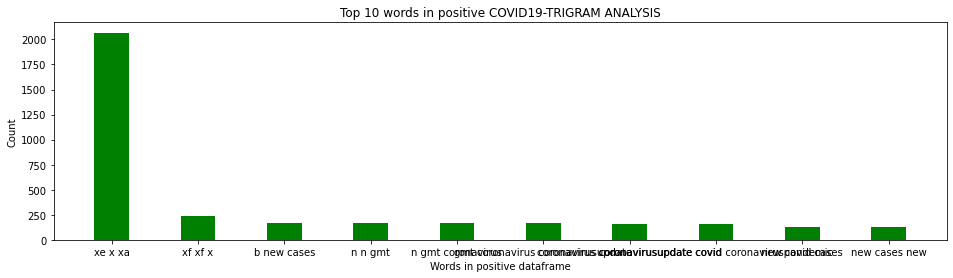

In [96]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive COVID19-TRIGRAM ANALYSIS")
plt.savefig("positive-trigram.png")

plt.show()

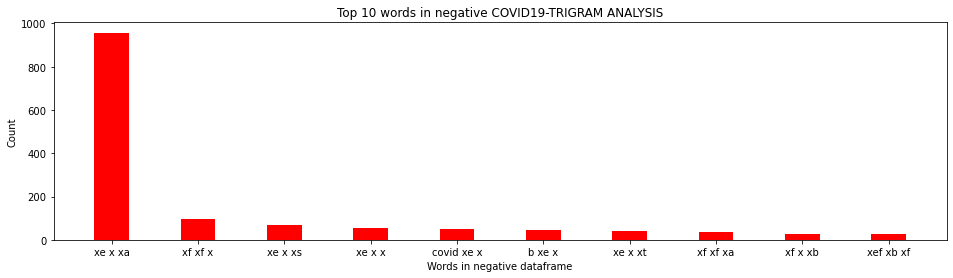

In [97]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1tri,ned2tri, color ='red',
        width = 0.4) 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative COVID19-TRIGRAM ANALYSIS")
plt.savefig("negative-trigram.png")
plt.show()

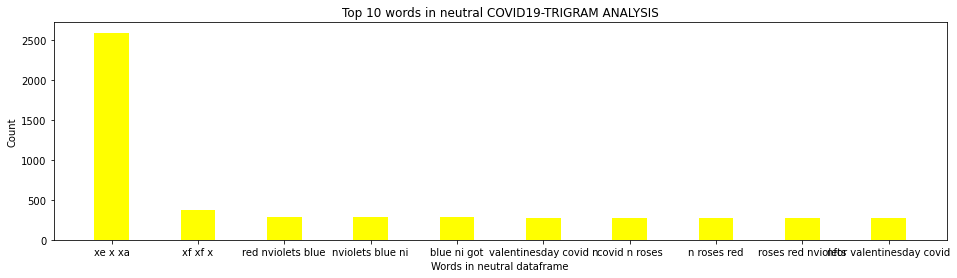

In [98]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1tri,nud2tri, color ='yellow',
        width = 0.4) 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral COVID19-TRIGRAM ANALYSIS")
plt.savefig("neutral-trigram.png")
plt.show()